In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
#################
### Todo
### 2. think about evolution in slope (changes in offsets, z values?)
####           a) Need to create upstream and downstream offsets, adjust
####              these in slope adjustment and fix flow depth calcs
####              to account for offsets.
####           B) tried approach of offset adjustment. this seemed unstable
####              if instead we adjust z_arr to bed and calc slope from z_arr, this seems to work
####              Had to adjust flow calculation because of this. z_arr-->z_arr-xc.ymin
### 3. create test cases
###########3
### 4. brainstorm model scenarios to run (do this next, then plan appropriate test cases)
###     A) Thinking about short time scales - how do seasonal patterns
###        reflect in average erosion rates. 
###          1. different scenarios with different length scales of exchange and dissolution 
#####        2. seasonal sinusoidal temp curve (ignore diurnal cycles?)
###     B) Single conduit evolution
###        1. how does long-term evolution differ with w/o CO2 exchange
###        2. what impact does slope-dependent exchange have?
###        3. shear-stress dependent production (based on grain size)
###        4. How do phreatic loops evolve
###        5. What happens during periods of base level fall, stasis, or aggradation?
#################################

### 5. how to deal with loss of point density (different resampling scheme?)

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#%%pixie_debugger
from CO2_sim_1D import CO2_1D

n=50
x = linspace(0,5000,n)
z = linspace(1,10,n)
np.random.seed(7)
r = 0.5*ones(n-1)# + 0.1*np.random.rand(n-1)
#r[5] = 0.5
sim = CO2_1D(x,z, init_radii=r, 
             Q_w=0.5, 
             T_outside=20., 
             D_a=35., D_w=35.,
             adv_disp_stabil_factor=0.5,
             reduction_factor=0.01,
            dt_erode=1.,
            xc_n=1500)
ntimes = 2500
fd_old=0.
for t in arange(ntimes):
    print('t=',t, '**********************')
    sim.calc_flow_depths()
    fd_new = sim.fd_mids[0]
#    if t>0 and np.abs((fd_new-fd_old)/fd_old)>0.05:
#        print(asdf)
    fd_old = fd_new
    sim.calc_air_flow()
    #if sim.A_a.min()==0:
    #    print(asdf)
    sim.calc_steady_state_transport()
    sim.erode_xcs()
    sim.z_arr[0] -= 0.0025
    #if t==160:
    #    print(asdf)
    if t % 10 == 0:
        timestep_str = '%04d' % (t,)
        print("Plotting timestep: ",t)
        figure()
        plot(sim.xcs[0].x ,sim.xcs[0].y)
        wl = sim.fd_mids[0]+ sim.xcs[0].y.min()
        plot([-.5,.5], [wl,wl])
        plot(sim.xcs[int(ceil(n/2))].x ,sim.xcs[int(ceil(n/2))].y)
        plot(sim.xcs[-1].x ,sim.xcs[-1].y)
        savefig('./XC-'+timestep_str+'.png')
        figure()
        xmid = (x[1:] + x[:-1])/2.
        plot(x, sim.h)
        plot(x,z)
        plot(x,sim.CO2_w)
        plot(x,sim.CO2_a)
        plot(x,sim.Ca)
        legend(['h','z','w','a','Ca'])
        savefig('./Profile-'+timestep_str+'.png')
        figure()
        xmid = (x[1:] + x[:-1])/2.
        plot(xmid,sim.slopes)
        plot(xmid, abs(sim.dz))
        yscale('log')
        tight_layout()
        savefig('./Slope-'+timestep_str+'.png')
        #figure()
        #loglog(sim.slopes, abs(sim.dz), 'o')
        #ylabel('dz')
        #xlabel('slope')
        #tight_layout()
        #savefig('./Slope_vs_erosion-'+timestep_str+'.png')
        close('all')

t= 0
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 0
norm_fd= -1   maxdepth= 0.9999994516877171
full
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 1
norm_fd= -1   maxdepth= 0.9999994516877171
full
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 2
norm_fd= -1   maxdepth= 0.9999994516877171
full
setting fd
done with this xc
zero or neg flow depth
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc points= 1498  maxdpeth= 0.9999994516877171   max_interp= 0.9999994516877171
xc= 3
norm_fd= -1   ma

CFL= 0.006390304589411216
Plotting timestep:  0
t= 1
xc points= 1498  maxdpeth= 1.002346910513048   max_interp= 1.002346910513048
xc points= 1498  maxdpeth= 1.002346910513048   max_interp= 1.002346910513048
xc= 0
norm_fd= -1   maxdepth= 1.002346910513048
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.002346910513048   max_interp= 1.002346910513048
xc points= 1498  maxdpeth= 1.002346910513048   max_interp= 1.002346910513048
xc= 1
norm_fd= -1   maxdepth= 1.002346910513048
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.002346910513048   max_interp= 1.002346910513048
xc points= 1498  maxdpeth= 1.002346910513048   max_interp= 1.002346910513048
xc= 2
norm_fd= -1   maxdepth= 1.002346910513048
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.002346910513048   max_interp= 1.002346910513048
xc points= 1498  maxdpeth= 1.002346910513048   max_interp= 1.002346910513048
xc= 3
norm_fd= -1   maxdepth= 1.002346910513048
full
setting fd
done with this xc
xc 

full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0023469105130483   max_interp= 1.0023469105130483
xc points= 1498  maxdpeth= 1.0023469105130483   max_interp= 1.0023469105130483
xc= 42
norm_fd= -1   maxdepth= 1.0023469105130483
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0023469105130483   max_interp= 1.0023469105130483
xc points= 1498  maxdpeth= 1.0023469105130483   max_interp= 1.0023469105130483
xc= 43
norm_fd= -1   maxdepth= 1.0023469105130483
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0023469105130483   max_interp= 1.0023469105130483
xc points= 1498  maxdpeth= 1.0023469105130483   max_interp= 1.0023469105130483
xc= 44
norm_fd= -1   maxdepth= 1.0023469105130483
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0023469105130483   max_interp= 1.0023469105130483
xc points= 1498  maxdpeth= 1.0023469105130483   max_interp= 1.0023469105130483
xc= 45
norm_fd= -1   maxdepth= 1.0023469105130483
full
setting fd
done with this x

CFL= 0.006325416558870388
t= 3
xc points= 1498  maxdpeth= 1.0070090016149833   max_interp= 1.0070090016149833
xc points= 1498  maxdpeth= 1.0070090016149833   max_interp= 1.0070090016149833
xc= 0
norm_fd= -1   maxdepth= 1.0070090016149833
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0070090016149833   max_interp= 1.0070090016149833
xc points= 1498  maxdpeth= 1.0070090016149833   max_interp= 1.0070090016149833
xc= 1
norm_fd= -1   maxdepth= 1.0070090016149833
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0070090016149833   max_interp= 1.0070090016149833
xc points= 1498  maxdpeth= 1.0070090016149833   max_interp= 1.0070090016149833
xc= 2
norm_fd= -1   maxdepth= 1.0070090016149833
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0070090016149833   max_interp= 1.0070090016149833
xc points= 1498  maxdpeth= 1.0070090016149833   max_interp= 1.0070090016149833
xc= 3
norm_fd= -1   maxdepth= 1.0070090016149833
full
setting fd
done with this xc
xc po

CFL= 0.006250765999759605
t= 4
xc points= 1498  maxdpeth= 1.0093238915933889   max_interp= 1.0093238915933889
xc points= 1498  maxdpeth= 1.0093238915933889   max_interp= 1.0093238915933889
xc= 0
norm_fd= -1   maxdepth= 1.0093238915933889
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0093238915933889   max_interp= 1.0093238915933889
xc points= 1498  maxdpeth= 1.0093238915933889   max_interp= 1.0093238915933889
xc= 1
norm_fd= -1   maxdepth= 1.0093238915933889
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0093238915933886   max_interp= 1.0093238915933886
xc points= 1498  maxdpeth= 1.0093238915933886   max_interp= 1.0093238915933886
xc= 2
norm_fd= -1   maxdepth= 1.0093238915933886
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0093238915933889   max_interp= 1.0093238915933889
xc points= 1498  maxdpeth= 1.0093238915933889   max_interp= 1.0093238915933889
xc= 3
norm_fd= -1   maxdepth= 1.0093238915933889
full
setting fd
done with this xc
xc po

CFL= 0.006177338120693253
t= 5
xc points= 1498  maxdpeth= 1.011628175312556   max_interp= 1.011628175312556
xc points= 1498  maxdpeth= 1.011628175312556   max_interp= 1.011628175312556
xc= 0
norm_fd= -1   maxdepth= 1.011628175312556
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.011628175312556   max_interp= 1.011628175312556
xc points= 1498  maxdpeth= 1.011628175312556   max_interp= 1.011628175312556
xc= 1
norm_fd= -1   maxdepth= 1.011628175312556
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.011628175312556   max_interp= 1.011628175312556
xc points= 1498  maxdpeth= 1.011628175312556   max_interp= 1.011628175312556
xc= 2
norm_fd= -1   maxdepth= 1.011628175312556
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0116281753125562   max_interp= 1.0116281753125562
xc points= 1498  maxdpeth= 1.0116281753125562   max_interp= 1.0116281753125562
xc= 3
norm_fd= -1   maxdepth= 1.0116281753125562
full
setting fd
done with this xc
xc points= 1498  max

CFL= 0.00610510903223397
t= 6
xc points= 1498  maxdpeth= 1.0139219735960094   max_interp= 1.0139219735960094
xc points= 1498  maxdpeth= 1.0139219735960094   max_interp= 1.0139219735960094
xc= 0
norm_fd= -1   maxdepth= 1.0139219735960094
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0139219735960094   max_interp= 1.0139219735960094
xc points= 1498  maxdpeth= 1.0139219735960094   max_interp= 1.0139219735960094
xc= 1
norm_fd= -1   maxdepth= 1.0139219735960094
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0139219735960094   max_interp= 1.0139219735960094
xc points= 1498  maxdpeth= 1.0139219735960094   max_interp= 1.0139219735960094
xc= 2
norm_fd= -1   maxdepth= 1.0139219735960094
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0139219735960094   max_interp= 1.0139219735960094
xc points= 1498  maxdpeth= 1.0139219735960094   max_interp= 1.0139219735960094
xc= 3
norm_fd= -1   maxdepth= 1.0139219735960094
full
setting fd
done with this xc
xc poi

CFL= 0.00603405533048307
t= 7
xc points= 1498  maxdpeth= 1.0162054050781546   max_interp= 1.0162054050781546
xc points= 1498  maxdpeth= 1.0162054050781546   max_interp= 1.0162054050781546
xc= 0
norm_fd= -1   maxdepth= 1.0162054050781546
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0162054050781546   max_interp= 1.0162054050781546
xc points= 1498  maxdpeth= 1.0162054050781546   max_interp= 1.0162054050781546
xc= 1
norm_fd= -1   maxdepth= 1.0162054050781546
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0162054050781544   max_interp= 1.0162054050781544
xc points= 1498  maxdpeth= 1.0162054050781544   max_interp= 1.0162054050781544
xc= 2
norm_fd= -1   maxdepth= 1.0162054050781544
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0162054050781548   max_interp= 1.0162054050781548
xc points= 1498  maxdpeth= 1.0162054050781548   max_interp= 1.0162054050781548
xc= 3
norm_fd= -1   maxdepth= 1.0162054050781548
full
setting fd
done with this xc
xc poi

CFL= 0.00596415409802617
t= 8
xc points= 1498  maxdpeth= 1.01847858625848   max_interp= 1.01847858625848
xc points= 1498  maxdpeth= 1.01847858625848   max_interp= 1.01847858625848
xc= 0
norm_fd= -1   maxdepth= 1.01847858625848
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.01847858625848   max_interp= 1.01847858625848
xc points= 1498  maxdpeth= 1.01847858625848   max_interp= 1.01847858625848
xc= 1
norm_fd= -1   maxdepth= 1.01847858625848
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.01847858625848   max_interp= 1.01847858625848
xc points= 1498  maxdpeth= 1.01847858625848   max_interp= 1.01847858625848
xc= 2
norm_fd= -1   maxdepth= 1.01847858625848
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.01847858625848   max_interp= 1.01847858625848
xc points= 1498  maxdpeth= 1.01847858625848   max_interp= 1.01847858625848
xc= 3
norm_fd= -1   maxdepth= 1.01847858625848
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.01847858625848   

CFL= 0.0058953828950501505
t= 9
xc points= 1498  maxdpeth= 1.0207416315540603   max_interp= 1.0207416315540603
xc points= 1498  maxdpeth= 1.0207416315540603   max_interp= 1.0207416315540603
xc= 0
Q residual for 1.0193413239499676  = 7.788929194951777e-07
norm_fd= 1.0193413239499676   maxdepth= 1.0207416315540603
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0207416315540603   max_interp= 1.0207416315540603
xc points= 1498  maxdpeth= 1.0207416315540603   max_interp= 1.0207416315540603
xc= 1
norm_fd= -1   maxdepth= 1.0207416315540603
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0207416315540603   max_interp= 1.0207416315540603
xc points= 1498  maxdpeth= 1.0207416315540603   max_interp= 1.0207416315540603
xc= 2
norm_fd= -1   maxdepth= 1.0207416315540603
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0207416315540605   max_interp= 1.0207416315540605
xc points= 1498  maxdpeth= 1.0207416315540605   max_interp= 1.0207416

CFL= 0.00587172466889752
t= 10
xc points= 1498  maxdpeth= 1.0218766498553875   max_interp= 1.0218766498553875
xc points= 1498  maxdpeth= 1.0218766498553875   max_interp= 1.0218766498553875
xc= 0
Q residual for 1.01868746427863  = 6.398366556581436e-07
norm_fd= 1.01868746427863   maxdepth= 1.0218766498553875
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0229946533504297   max_interp= 1.0229946533504297
xc points= 1498  maxdpeth= 1.0229946533504297   max_interp= 1.0229946533504297
xc= 1
norm_fd= -1   maxdepth= 1.0229946533504297
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0229946533504295   max_interp= 1.0229946533504295
xc points= 1498  maxdpeth= 1.0229946533504295   max_interp= 1.0229946533504295
xc= 2
norm_fd= -1   maxdepth= 1.0229946533504295
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0229946533504297   max_interp= 1.0229946533504297
xc points= 1498  maxdpeth= 1.0229946533504297   max_interp= 1.022994653350

CFL= 0.005857690551023093
Plotting timestep:  10
t= 11
xc points= 1498  maxdpeth= 1.0230169509688507   max_interp= 1.0230169509688507
xc points= 1498  maxdpeth= 1.0230169509688507   max_interp= 1.0230169509688507
xc= 0
Q residual for 1.018083757711022  = 6.659323688040786e-07
norm_fd= 1.018083757711022   maxdepth= 1.0230169509688507
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0252377620508784   max_interp= 1.0252377620508784
xc points= 1498  maxdpeth= 1.0252377620508784   max_interp= 1.0252377620508784
xc= 1
norm_fd= -1   maxdepth= 1.0252377620508784
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0252377620508781   max_interp= 1.0252377620508781
xc points= 1498  maxdpeth= 1.0252377620508781   max_interp= 1.0252377620508781
xc= 2
norm_fd= -1   maxdepth= 1.0252377620508781
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0252377620508784   max_interp= 1.0252377620508784
xc points= 1498  maxdpeth= 1.0252377620508784   

xc= 39
norm_fd= -1   maxdepth= 1.0252377620508781
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0252377620508781   max_interp= 1.0252377620508781
xc points= 1498  maxdpeth= 1.0252377620508781   max_interp= 1.0252377620508781
xc= 40
norm_fd= -1   maxdepth= 1.0252377620508781
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0252377620508786   max_interp= 1.0252377620508786
xc points= 1498  maxdpeth= 1.0252377620508786   max_interp= 1.0252377620508786
xc= 41
norm_fd= -1   maxdepth= 1.0252377620508786
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0252377620508784   max_interp= 1.0252377620508784
xc points= 1498  maxdpeth= 1.0252377620508784   max_interp= 1.0252377620508784
xc= 42
norm_fd= -1   maxdepth= 1.0252377620508784
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0252377620508786   max_interp= 1.0252377620508786
xc points= 1498  maxdpeth= 1.0252377620508786   max_interp= 1.0252377620508786
xc= 43
norm_fd= -1   maxdepth= 1

CFL= 0.005830530493188545
t= 13
xc points= 1498  maxdpeth= 1.0253133651089943   max_interp= 1.0253133651089943
xc points= 1498  maxdpeth= 1.0253133651089943   max_interp= 1.0253133651089943
xc= 0
Q residual for 1.0168483217812587  = 1.77865016737222e-06
norm_fd= 1.0168483217812587   maxdepth= 1.0253133651089943
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0296946721512232   max_interp= 1.0296946721512232
xc points= 1498  maxdpeth= 1.0296946721512232   max_interp= 1.0296946721512232
xc= 1
Q residual for 1.0289976779296237  = 2.162826304830112e-06
norm_fd= 1.0289976779296237   maxdepth= 1.0296946721512232
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0296946721512232   max_interp= 1.0296946721512232
xc points= 1498  maxdpeth= 1.0296946721512232   max_interp= 1.0296946721512232
xc= 2
Q residual for 1.0480122244407868  = 0.0015732795966978408
norm_fd= -1   maxdepth= 1.0296946721512232
full
setting fd
done with t

Q residual for 1.0480122244407921  = 0.0015732795966949542
norm_fd= -1   maxdepth= 1.0296946721512232
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0296946721512232   max_interp= 1.0296946721512232
xc points= 1498  maxdpeth= 1.0296946721512232   max_interp= 1.0296946721512232
xc= 32
Q residual for 1.0480122244407843  = 0.001573279596698618
norm_fd= -1   maxdepth= 1.0296946721512232
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0296946721512237   max_interp= 1.0296946721512237
xc points= 1498  maxdpeth= 1.0296946721512237   max_interp= 1.0296946721512237
xc= 33
Q residual for 1.0480122244407901  = 0.0015732795966963975
norm_fd= -1   maxdepth= 1.0296946721512237
full
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0296946721512232   max_interp= 1.0296946721512232
xc points= 1498  maxdpeth= 1.0296946721512232   max_interp= 1.0296946721512232
xc= 34
Q residual for 1.0480122244407848  = 0.001573279596698729
norm_fd= -1   maxdepth= 1.02969467215122

xc= 30
Q residual for 1.030146374502865  = 1.1408918036970306e-06
norm_fd= 1.030146374502865   maxdepth= 1.0319086848693297
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0319086848693297   max_interp= 1.0319086848693297
xc points= 1498  maxdpeth= 1.0319086848693297   max_interp= 1.0319086848693297
xc= 31
Q residual for 1.0301463745028658  = 1.140891803863564e-06
norm_fd= 1.0301463745028658   maxdepth= 1.0319086848693297
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.03190868486933   max_interp= 1.03190868486933
xc points= 1498  maxdpeth= 1.03190868486933   max_interp= 1.03190868486933
xc= 32
Q residual for 1.0301463745028656  = 1.1408918039745863e-06
norm_fd= 1.0301463745028656   maxdepth= 1.03190868486933
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0319086848693302   max_interp= 1.0319086848693302
xc points= 1498  maxdpeth= 1.0319086848693302   max_interp= 1.0319086848

xc= 32
Q residual for 1.0302261605245788  = 6.394733949033338e-07
norm_fd= 1.0302261605245788   maxdepth= 1.0330211085118544
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0330211085118544   max_interp= 1.0330211085118544
xc points= 1498  maxdpeth= 1.0330211085118544   max_interp= 1.0330211085118544
xc= 33
Q residual for 1.0302261605245788  = 6.394733945147557e-07
norm_fd= 1.0302261605245788   maxdepth= 1.0330211085118544
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0330211085118541   max_interp= 1.0330211085118541
xc points= 1498  maxdpeth= 1.0330211085118541   max_interp= 1.0330211085118541
xc= 34
Q residual for 1.0302261605245782  = 6.394733947923115e-07
norm_fd= 1.0302261605245782   maxdepth= 1.0330211085118541
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0330211085118544   max_interp= 1.0330211085118544
xc points= 1498  maxdpeth= 1.0330211085118544   max_interp= 1.

Q residual for 1.0303487562083542  = 1.4716770333489393e-06
norm_fd= 1.0303487562083542   maxdepth= 1.0341347456538625
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.034134745653863   max_interp= 1.034134745653863
xc points= 1498  maxdpeth= 1.034134745653863   max_interp= 1.034134745653863
xc= 32
Q residual for 1.0303487562083542  = 1.4716770330158724e-06
norm_fd= 1.0303487562083542   maxdepth= 1.034134745653863
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0341347456538628   max_interp= 1.0341347456538628
xc points= 1498  maxdpeth= 1.0341347456538628   max_interp= 1.0341347456538628
xc= 33
Q residual for 1.0303487562083538  = 1.4716770334599616e-06
norm_fd= 1.0303487562083538   maxdepth= 1.0341347456538628
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0341347456538625   max_interp= 1.0341347456538625
xc points= 1498  maxdpeth= 1.0341347456538625   max_interp= 1.034134745

xc points= 1498  maxdpeth= 1.0352496030755107   max_interp= 1.0352496030755107
xc= 33
Q residual for 1.0304680835278068  = 3.625346718882927e-06
norm_fd= 1.0304680835278068   maxdepth= 1.0352496030755107
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0352496030755103   max_interp= 1.0352496030755103
xc points= 1498  maxdpeth= 1.0352496030755103   max_interp= 1.0352496030755103
xc= 34
Q residual for 1.0304680835278057  = 3.6253467194380384e-06
norm_fd= 1.0304680835278057   maxdepth= 1.0352496030755103
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0352496030755105   max_interp= 1.0352496030755105
xc points= 1498  maxdpeth= 1.0352496030755105   max_interp= 1.0352496030755105
xc= 35
Q residual for 1.0304680835278073  = 3.6253467182723043e-06
norm_fd= 1.0304680835278073   maxdepth= 1.0352496030755105
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0352496030755105   max_interp= 

Q residual for 1.0306513177666736  = 2.661807522397197e-06
norm_fd= 1.0306513177666736   maxdepth= 1.0363656856303327
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0363656856303325   max_interp= 1.0363656856303325
xc points= 1498  maxdpeth= 1.0363656856303325   max_interp= 1.0363656856303325
xc= 33
Q residual for 1.030651317766673  = 2.661807522397197e-06
norm_fd= 1.030651317766673   maxdepth= 1.0363656856303325
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.036365685630332   max_interp= 1.036365685630332
xc points= 1498  maxdpeth= 1.036365685630332   max_interp= 1.036365685630332
xc= 34
Q residual for 1.0306513177666714  = 2.6618075222861748e-06
norm_fd= 1.0306513177666714   maxdepth= 1.036365685630332
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0363656856303325   max_interp= 1.0363656856303325
xc points= 1498  maxdpeth= 1.0363656856303325   max_interp= 1.0363656856303

Q residual for 1.0308379363003022  = 3.9500820970816974e-06
norm_fd= 1.0308379363003022   maxdepth= 1.037482996786552
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0374829967865518   max_interp= 1.0374829967865518
xc points= 1498  maxdpeth= 1.0374829967865518   max_interp= 1.0374829967865518
xc= 34
Q residual for 1.0308379363003008  = 3.950082096970675e-06
norm_fd= 1.0308379363003008   maxdepth= 1.0374829967865518
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0374829967865518   max_interp= 1.0374829967865518
xc points= 1498  maxdpeth= 1.0374829967865518   max_interp= 1.0374829967865518
xc= 35
Q residual for 1.030837936300303  = 3.950082097636809e-06
norm_fd= 1.030837936300303   maxdepth= 1.0374829967865518
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0374829967865518   max_interp= 1.0374829967865518
xc points= 1498  maxdpeth= 1.0374829967865518   max_interp= 1.037482996

Q residual for 1.0309803331585183  = 4.344256218258291e-06
norm_fd= 1.0309803331585183   maxdepth= 1.0386015431040956
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0386015431040958   max_interp= 1.0386015431040958
xc points= 1498  maxdpeth= 1.0386015431040958   max_interp= 1.0386015431040958
xc= 32
Q residual for 1.0309803331585186  = 4.344256217980735e-06
norm_fd= 1.0309803331585186   maxdepth= 1.0386015431040958
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0386015431040958   max_interp= 1.0386015431040958
xc points= 1498  maxdpeth= 1.0386015431040958   max_interp= 1.0386015431040958
xc= 33
Q residual for 1.030980333158518  = 4.344256218091758e-06
norm_fd= 1.030980333158518   maxdepth= 1.0386015431040958
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0386015431040954   max_interp= 1.0386015431040954
xc points= 1498  maxdpeth= 1.0386015431040954   max_interp= 1.038601543

Q residual for 1.031166421024211  = 3.3217185607670174e-07
norm_fd= 1.031166421024211   maxdepth= 1.0397213258304934
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0397213258304938   max_interp= 1.0397213258304938
xc points= 1498  maxdpeth= 1.0397213258304938   max_interp= 1.0397213258304938
xc= 26
Q residual for 1.0311664210242113  = 3.321718563542575e-07
norm_fd= 1.0311664210242113   maxdepth= 1.0397213258304938
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0397213258304934   max_interp= 1.0397213258304934
xc points= 1498  maxdpeth= 1.0397213258304934   max_interp= 1.0397213258304934
xc= 27
Q residual for 1.031166421024211  = 3.3217185607670174e-07
norm_fd= 1.031166421024211   maxdepth= 1.0397213258304934
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0397213258304938   max_interp= 1.0397213258304938
xc points= 1498  maxdpeth= 1.0397213258304938   max_interp= 1.039721325

Q residual for 1.031306406560117  = 2.3732052739644516e-06
norm_fd= 1.031306406560117   maxdepth= 1.0408423466300933
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0408423466300931   max_interp= 1.0408423466300931
xc points= 1498  maxdpeth= 1.0408423466300931   max_interp= 1.0408423466300931
xc= 31
Q residual for 1.0313064065601176  = 2.3732052736313847e-06
norm_fd= 1.0313064065601176   maxdepth= 1.0408423466300931
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0408423466300931   max_interp= 1.0408423466300931
xc points= 1498  maxdpeth= 1.0408423466300931   max_interp= 1.0408423466300931
xc= 32
Q residual for 1.0313064065601178  = 2.373205274186496e-06
norm_fd= 1.0313064065601178   maxdepth= 1.0408423466300931
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0408423466300933   max_interp= 1.0408423466300933
xc points= 1498  maxdpeth= 1.0408423466300933   max_interp= 1.0408423

Q residual for 1.0315579165053357  = 2.7737461861243595e-06
norm_fd= 1.0315579165053357   maxdepth= 1.041964605506428
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0419646055064276   max_interp= 1.0419646055064276
xc points= 1498  maxdpeth= 1.0419646055064276   max_interp= 1.0419646055064276
xc= 34
Q residual for 1.0315579165053324  = 2.7737461875121383e-06
norm_fd= 1.0315579165053324   maxdepth= 1.0419646055064276
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0419646055064276   max_interp= 1.0419646055064276
xc points= 1498  maxdpeth= 1.0419646055064276   max_interp= 1.0419646055064276
xc= 35
Q residual for 1.031557916505338  = 2.7737461812948894e-06
norm_fd= 1.031557916505338   maxdepth= 1.0419646055064276
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0419646055064278   max_interp= 1.0419646055064278
xc points= 1498  maxdpeth= 1.0419646055064278   max_interp= 1.0419646

xc points= 1498  maxdpeth= 1.0430881061466941   max_interp= 1.0430881061466941
xc= 33
Q residual for 1.031797350737174  = 3.7206323175720257e-06
norm_fd= 1.031797350737174   maxdepth= 1.0430881061466941
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0430881061466937   max_interp= 1.0430881061466937
xc points= 1498  maxdpeth= 1.0430881061466937   max_interp= 1.0430881061466937
xc= 34
Q residual for 1.0317973507371707  = 3.720632316128736e-06
norm_fd= 1.0317973507371707   maxdepth= 1.0430881061466937
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0430881061466937   max_interp= 1.0430881061466937
xc points= 1498  maxdpeth= 1.0430881061466937   max_interp= 1.0430881061466937
xc= 35
Q residual for 1.031797350737175  = 3.7206323196814495e-06
norm_fd= 1.031797350737175   maxdepth= 1.0430881061466937
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0430881061466937   max_interp= 1.04

xc points= 1498  maxdpeth= 1.0442128503423627   max_interp= 1.0442128503423627
xc points= 1498  maxdpeth= 1.0442128503423627   max_interp= 1.0442128503423627
xc= 25
Q residual for 1.0319482935192026  = 1.8147223057596307e-07
norm_fd= 1.0319482935192026   maxdepth= 1.0442128503423627
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0442128503423629   max_interp= 1.0442128503423629
xc points= 1498  maxdpeth= 1.0442128503423629   max_interp= 1.0442128503423629
xc= 26
Q residual for 1.031948293519203  = 1.8147223046494076e-07
norm_fd= 1.031948293519203   maxdepth= 1.0442128503423629
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0442128503423627   max_interp= 1.0442128503423627
xc points= 1498  maxdpeth= 1.0442128503423627   max_interp= 1.0442128503423627
xc= 27
Q residual for 1.0319482935192026  = 1.8147223057596307e-07
norm_fd= 1.0319482935192026   maxdepth= 1.0442128503423627
norm
getting width
got L,R
setting fd


xc= 31
Q residual for 1.0321680251301024  = 4.67324518582668e-07
norm_fd= 1.0321680251301024   maxdepth= 1.0453388389341107
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.045338838934111   max_interp= 1.045338838934111
xc points= 1498  maxdpeth= 1.045338838934111   max_interp= 1.045338838934111
xc= 32
Q residual for 1.0321680251301026  = 4.6732451841613454e-07
norm_fd= 1.0321680251301026   maxdepth= 1.045338838934111
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0453388389341112   max_interp= 1.0453388389341112
xc points= 1498  maxdpeth= 1.0453388389341112   max_interp= 1.0453388389341112
xc= 33
Q residual for 1.0321680251301026  = 4.6732451863817914e-07
norm_fd= 1.0321680251301026   maxdepth= 1.0453388389341112
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.045338838934111   max_interp= 1.045338838934111
xc points= 1498  maxdpeth= 1.045338838934111   max_interp= 1.0453388

Q residual for 1.032321185733645  = 1.8698087896895643e-06
norm_fd= 1.032321185733645   maxdepth= 1.0464660735693778
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.046466073569378   max_interp= 1.046466073569378
xc points= 1498  maxdpeth= 1.046466073569378   max_interp= 1.046466073569378
xc= 33
Q residual for 1.032321185733645  = 1.8698087894675197e-06
norm_fd= 1.032321185733645   maxdepth= 1.046466073569378
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0464660735693778   max_interp= 1.0464660735693778
xc points= 1498  maxdpeth= 1.0464660735693778   max_interp= 1.0464660735693778
xc= 34
Q residual for 1.0323211857336425  = 1.8698087896895643e-06
norm_fd= 1.0323211857336425   maxdepth= 1.0464660735693778
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0464660735693778   max_interp= 1.0464660735693778
xc points= 1498  maxdpeth= 1.0464660735693778   max_interp= 1.0464660735693

Q residual for 1.032541147050465  = 1.0620866160437892e-06
norm_fd= 1.032541147050465   maxdepth= 1.0475945592018012
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0475945592018014   max_interp= 1.0475945592018014
xc points= 1498  maxdpeth= 1.0475945592018014   max_interp= 1.0475945592018014
xc= 33
Q residual for 1.032541147050465  = 1.0620866165433895e-06
norm_fd= 1.032541147050465   maxdepth= 1.0475945592018014
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0475945592018012   max_interp= 1.0475945592018012
xc points= 1498  maxdpeth= 1.0475945592018012   max_interp= 1.0475945592018012
xc= 34
Q residual for 1.0325411470504626  = 1.062086615988278e-06
norm_fd= 1.0325411470504626   maxdepth= 1.0475945592018012
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.047594559201801   max_interp= 1.047594559201801
xc points= 1498  maxdpeth= 1.047594559201801   max_interp= 1.047594559201

Q residual for 1.032760739634424  = 9.297222499649038e-07
norm_fd= 1.032760739634424   maxdepth= 1.0487242946237876
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0487242946237876   max_interp= 1.0487242946237876
xc points= 1498  maxdpeth= 1.0487242946237876   max_interp= 1.0487242946237876
xc= 34
Q residual for 1.0327607396344223  = 9.297222488546808e-07
norm_fd= 1.0327607396344223   maxdepth= 1.0487242946237876
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0487242946237874   max_interp= 1.0487242946237874
xc points= 1498  maxdpeth= 1.0487242946237874   max_interp= 1.0487242946237874
xc= 35
Q residual for 1.0327607396344245  = 9.297222498538815e-07
norm_fd= 1.0327607396344245   maxdepth= 1.0487242946237874
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0487242946237876   max_interp= 1.0487242946237876
xc points= 1498  maxdpeth= 1.0487242946237876   max_interp= 1.048724294

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0498552635569447   max_interp= 1.0498552635569447
xc points= 1498  maxdpeth= 1.0498552635569447   max_interp= 1.0498552635569447
xc= 37
Q residual for 1.032930392704643  = 2.7430793619886984e-06
norm_fd= 1.032930392704643   maxdepth= 1.0498552635569447
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0498552635569447   max_interp= 1.0498552635569447
xc points= 1498  maxdpeth= 1.0498552635569447   max_interp= 1.0498552635569447
xc= 38
Q residual for 1.032930392704643  = 2.7430793619886984e-06
norm_fd= 1.032930392704643   maxdepth= 1.0498552635569447
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0498552635569447   max_interp= 1.0498552635569447
xc points= 1498  maxdpeth= 1.0498552635569447   max_interp= 1.0498552635569447
xc= 39
Q residual for 1.0329303927046436  = 2.7430793620442095e-06
norm_fd= 1.0329303927046436   maxdepth= 1.0

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0509874894954456   max_interp= 1.0509874894954456
xc points= 1498  maxdpeth= 1.0509874894954456   max_interp= 1.0509874894954456
xc= 28
Q residual for 1.0331451630296697  = 1.6521654066514735e-06
norm_fd= 1.0331451630296697   maxdepth= 1.0509874894954456
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0509874894954452   max_interp= 1.0509874894954452
xc points= 1498  maxdpeth= 1.0509874894954452   max_interp= 1.0509874894954452
xc= 29
Q residual for 1.0331451630296686  = 1.652165407595163e-06
norm_fd= 1.0331451630296686   maxdepth= 1.0509874894954452
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.050987489495446   max_interp= 1.050987489495446
xc points= 1498  maxdpeth= 1.050987489495446   max_interp= 1.050987489495446
xc= 30
Q residual for 1.033145163029669  = 1.6521654072620962e-06
norm_fd= 1.033145163029669   maxdepth= 1.0509

xc= 35
Q residual for 1.033275698151826  = 1.547278691282905e-06
norm_fd= 1.033275698151826   maxdepth= 1.0521209706716443
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0521209706716443   max_interp= 1.0521209706716443
xc points= 1498  maxdpeth= 1.0521209706716443   max_interp= 1.0521209706716443
xc= 36
Q residual for 1.0332756981518247  = 1.547278691615972e-06
norm_fd= 1.0332756981518247   maxdepth= 1.0521209706716443
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0521209706716443   max_interp= 1.0521209706716443
xc points= 1498  maxdpeth= 1.0521209706716443   max_interp= 1.0521209706716443
xc= 37
Q residual for 1.0332756981518247  = 1.547278691615972e-06
norm_fd= 1.0332756981518247   maxdepth= 1.0521209706716443
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0521209706716443   max_interp= 1.0521209706716443
xc points= 1498  maxdpeth= 1.0521209706716443   max_interp= 1.05

Q residual for 1.0332754903224397  = 1.9493064095099655e-06
norm_fd= 1.0332754903224397   maxdepth= 1.0532557098624835
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0532557098624835   max_interp= 1.0532557098624835
xc points= 1498  maxdpeth= 1.0532557098624835   max_interp= 1.0532557098624835
xc= 38
Q residual for 1.0332754903224397  = 1.9493064095099655e-06
norm_fd= 1.0332754903224397   maxdepth= 1.0532557098624835
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0532557098624835   max_interp= 1.0532557098624835
xc points= 1498  maxdpeth= 1.0532557098624835   max_interp= 1.0532557098624835
xc= 39
Q residual for 1.0332754903224401  = 1.94930640973201e-06
norm_fd= 1.0332754903224401   maxdepth= 1.0532557098624835
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0532557098624833   max_interp= 1.0532557098624833
xc points= 1498  maxdpeth= 1.0532557098624833   max_interp= 1.053255

xc= 38
Q residual for 1.0334589536376102  = 2.861260800512966e-07
norm_fd= 1.0334589536376102   maxdepth= 1.054391712046173
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.054391712046173   max_interp= 1.054391712046173
xc points= 1498  maxdpeth= 1.054391712046173   max_interp= 1.054391712046173
xc= 39
Q residual for 1.0334589536376106  = 2.8612607999578543e-07
norm_fd= 1.0334589536376106   maxdepth= 1.054391712046173
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.054391712046173   max_interp= 1.054391712046173
xc points= 1498  maxdpeth= 1.054391712046173   max_interp= 1.054391712046173
xc= 40
Q residual for 1.0334589536376115  = 2.861260799402743e-07
norm_fd= 1.0334589536376115   maxdepth= 1.054391712046173
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0543917120461734   max_interp= 1.0543917120461734
xc points= 1498  maxdpeth= 1.0543917120461734   max_interp= 1.0543917120

Q residual for 1.0335493576444286  = 1.31922084101177e-06
norm_fd= 1.0335493576444286   maxdepth= 1.0555289672191686
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0555289672191692   max_interp= 1.0555289672191692
xc points= 1498  maxdpeth= 1.0555289672191692   max_interp= 1.0555289672191692
xc= 41
Q residual for 1.0335493576444272  = 1.3192208414558593e-06
norm_fd= 1.0335493576444272   maxdepth= 1.0555289672191692
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0555289672191688   max_interp= 1.0555289672191688
xc points= 1498  maxdpeth= 1.0555289672191688   max_interp= 1.0555289672191688
xc= 42
Q residual for 1.0335493576444261  = 1.3192208411227924e-06
norm_fd= 1.0335493576444261   maxdepth= 1.0555289672191688
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.055528967219169   max_interp= 1.055528967219169
xc points= 1498  maxdpeth= 1.055528967219169   max_interp= 1.055528967

Q residual for 1.0338853640979206  = 3.0873253882290896e-06
norm_fd= 1.0338853640979206   maxdepth= 1.0569411001307438
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.056941100130744   max_interp= 1.056941100130744
xc points= 1498  maxdpeth= 1.056941100130744   max_interp= 1.056941100130744
xc= 26
Q residual for 1.0338853640979209  = 3.0873253882290896e-06
norm_fd= 1.0338853640979209   maxdepth= 1.056941100130744
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0569411001307438   max_interp= 1.0569411001307438
xc points= 1498  maxdpeth= 1.0569411001307438   max_interp= 1.0569411001307438
xc= 27
Q residual for 1.0338853640979206  = 3.0873253882290896e-06
norm_fd= 1.0338853640979206   maxdepth= 1.0569411001307438
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.056941100130744   max_interp= 1.056941100130744
xc points= 1498  maxdpeth= 1.056941100130744   max_interp= 1.056941100130

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0583507603775315   max_interp= 1.0583507603775315
xc points= 1498  maxdpeth= 1.0583507603775315   max_interp= 1.0583507603775315
xc= 29
Q residual for 1.0340573471329793  = 1.8084573549792538e-07
norm_fd= 1.0340573471329793   maxdepth= 1.0583507603775315
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.058350760377532   max_interp= 1.058350760377532
xc points= 1498  maxdpeth= 1.058350760377532   max_interp= 1.058350760377532
xc= 30
Q residual for 1.0340573471329761  = 1.80845732056234e-07
norm_fd= 1.0340573471329761   maxdepth= 1.058350760377532
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0583507603775313   max_interp= 1.0583507603775313
xc points= 1498  maxdpeth= 1.0583507603775313   max_interp= 1.0583507603775313
xc= 31
Q residual for 1.0340573471329821  = 1.8084573882859445e-07
norm_fd= 1.0340573471329821   maxdepth= 1.0583

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0597595172503773   max_interp= 1.0597595172503773
xc points= 1498  maxdpeth= 1.0597595172503773   max_interp= 1.0597595172503773
xc= 30
Q residual for 1.0342230055568677  = 1.1607201604313389e-06
norm_fd= 1.0342230055568677   maxdepth= 1.0597595172503773
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0597595172503769   max_interp= 1.0597595172503769
xc points= 1498  maxdpeth= 1.0597595172503769   max_interp= 1.0597595172503769
xc= 31
Q residual for 1.0342230055568706  = 1.160720161208495e-06
norm_fd= 1.0342230055568706   maxdepth= 1.0597595172503769
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.059759517250377   max_interp= 1.059759517250377
xc points= 1498  maxdpeth= 1.059759517250377   max_interp= 1.059759517250377
xc= 32
Q residual for 1.0342230055568695  = 1.1607201609864504e-06
norm_fd= 1.0342230055568695   maxdepth= 1.05

Q residual for 1.0343759103343702  = 1.2297626237889325e-06
norm_fd= 1.0343759103343702   maxdepth= 1.061165849714102
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.061165849714102   max_interp= 1.061165849714102
xc points= 1498  maxdpeth= 1.061165849714102   max_interp= 1.061165849714102
xc= 34
Q residual for 1.0343759103343664  = 1.2297626238999548e-06
norm_fd= 1.0343759103343664   maxdepth= 1.061165849714102
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0611658497141017   max_interp= 1.0611658497141017
xc points= 1498  maxdpeth= 1.0611658497141017   max_interp= 1.0611658497141017
xc= 35
Q residual for 1.0343759103343706  = 1.2297626237334214e-06
norm_fd= 1.0343759103343706   maxdepth= 1.0611658497141017
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0611658497141017   max_interp= 1.0611658497141017
xc points= 1498  maxdpeth= 1.0611658497141017   max_interp= 1.0611658497

xc= 32
Q residual for 1.0344359735236675  = 1.6081823416835839e-06
norm_fd= 1.0344359735236675   maxdepth= 1.0625701241573051
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0625701241573053   max_interp= 1.0625701241573053
xc points= 1498  maxdpeth= 1.0625701241573053   max_interp= 1.0625701241573053
xc= 33
Q residual for 1.034435973523668  = 1.6081823414615393e-06
norm_fd= 1.034435973523668   maxdepth= 1.0625701241573053
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0625701241573053   max_interp= 1.0625701241573053
xc points= 1498  maxdpeth= 1.0625701241573053   max_interp= 1.0625701241573053
xc= 34
Q residual for 1.0344359735236643  = 1.6081823419611396e-06
norm_fd= 1.0344359735236643   maxdepth= 1.0625701241573053
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.062570124157305   max_interp= 1.062570124157305
xc points= 1498  maxdpeth= 1.062570124157305   max_interp= 1.06

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0639719529088714   max_interp= 1.0639719529088714
xc points= 1498  maxdpeth= 1.0639719529088714   max_interp= 1.0639719529088714
xc= 25
Q residual for 1.034418167574762  = 1.9251791325558543e-06
norm_fd= 1.034418167574762   maxdepth= 1.0639719529088714
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0639719529088716   max_interp= 1.0639719529088716
xc points= 1498  maxdpeth= 1.0639719529088716   max_interp= 1.0639719529088716
xc= 26
Q residual for 1.034418167574764  = 1.925179132888921e-06
norm_fd= 1.034418167574764   maxdepth= 1.0639719529088716
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0639719529088714   max_interp= 1.0639719529088714
xc points= 1498  maxdpeth= 1.0639719529088714   max_interp= 1.0639719529088714
xc= 27
Q residual for 1.034418167574762  = 1.9251791325558543e-06
norm_fd= 1.034418167574762   maxdepth= 1.0639

CFL= 0.006256013920109377
t= 42
xc points= 1498  maxdpeth= 1.0659456037959765   max_interp= 1.0659456037959765
xc points= 1498  maxdpeth= 1.0659456037959765   max_interp= 1.0659456037959765
xc= 0
Q residual for 0.9408983567416158  = 2.860748801736257e-07
norm_fd= 0.9408983567416158   maxdepth= 1.0659456037959765
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0656087139583428   max_interp= 1.0656087139583428
xc points= 1498  maxdpeth= 1.0656087139583428   max_interp= 1.0656087139583428
xc= 1
Q residual for 1.028362181971531  = 1.2918504509462636e-06
norm_fd= 1.028362181971531   maxdepth= 1.0656087139583428
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0656692961535268   max_interp= 1.0656692961535268
xc points= 1498  maxdpeth= 1.0656692961535268   max_interp= 1.0656692961535268
xc= 2
Q residual for 1.0336570586845208  = 1.0700114031481078e-06
norm_fd= 1.0336570586845208   maxdepth= 1.0656692961535268
norm
getti

xc= 31
Q residual for 1.034402988232452  = 1.012449055370901e-06
norm_fd= 1.034402988232452   maxdepth= 1.0653714055638783
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0653714055638788   max_interp= 1.0653714055638788
xc points= 1498  maxdpeth= 1.0653714055638788   max_interp= 1.0653714055638788
xc= 32
Q residual for 1.0344029882324526  = 1.0124490552598786e-06
norm_fd= 1.0344029882324526   maxdepth= 1.0653714055638788
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0653714055638792   max_interp= 1.0653714055638792
xc points= 1498  maxdpeth= 1.0653714055638792   max_interp= 1.0653714055638792
xc= 33
Q residual for 1.0344029882324526  = 1.0124490551488563e-06
norm_fd= 1.0344029882324526   maxdepth= 1.0653714055638792
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0653714055638792   max_interp= 1.0653714055638792
xc points= 1498  maxdpeth= 1.0653714055638792   max_interp= 1.

Q residual for 1.0342442233313143  = 1.7442138372514293e-06
norm_fd= 1.0342442233313143   maxdepth= 1.0667684677835663
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0667684677835656   max_interp= 1.0667684677835656
xc points= 1498  maxdpeth= 1.0667684677835656   max_interp= 1.0667684677835656
xc= 35
Q residual for 1.0342442233313183  = 1.7442138370848959e-06
norm_fd= 1.0342442233313183   maxdepth= 1.0667684677835656
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0667684677835654   max_interp= 1.0667684677835654
xc points= 1498  maxdpeth= 1.0667684677835654   max_interp= 1.0667684677835654
xc= 36
Q residual for 1.0342442233313176  = 1.744213837140407e-06
norm_fd= 1.0342442233313176   maxdepth= 1.0667684677835654
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0667684677835658   max_interp= 1.0667684677835658
xc points= 1498  maxdpeth= 1.0667684677835658   max_interp= 1.06676

Q residual for 1.0336956401833703  = 2.590861479800921e-07
norm_fd= 1.0336956401833703   maxdepth= 1.0681631202605928
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0681631202605932   max_interp= 1.0681631202605932
xc points= 1498  maxdpeth= 1.0681631202605932   max_interp= 1.0681631202605932
xc= 30
Q residual for 1.0336956401833708  = 2.59086148313159e-07
norm_fd= 1.0336956401833708   maxdepth= 1.0681631202605932
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0681631202605923   max_interp= 1.0681631202605923
xc points= 1498  maxdpeth= 1.0681631202605923   max_interp= 1.0681631202605923
xc= 31
Q residual for 1.0336956401833721  = 2.590861480911144e-07
norm_fd= 1.0336956401833721   maxdepth= 1.0681631202605923
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0681631202605928   max_interp= 1.0681631202605928
xc points= 1498  maxdpeth= 1.0681631202605928   max_interp= 1.06816312

Q residual for 1.0333702109548286  = 4.4089382106315966e-07
norm_fd= 1.0333702109548286   maxdepth= 1.0695553662821966
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0695553662821964   max_interp= 1.0695553662821964
xc points= 1498  maxdpeth= 1.0695553662821964   max_interp= 1.0695553662821964
xc= 27
Q residual for 1.033370210954828  = 4.408938211186708e-07
norm_fd= 1.033370210954828   maxdepth= 1.0695553662821964
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0695553662821966   max_interp= 1.0695553662821966
xc points= 1498  maxdpeth= 1.0695553662821966   max_interp= 1.0695553662821966
xc= 28
Q residual for 1.0333702109548286  = 4.4089382106315966e-07
norm_fd= 1.0333702109548286   maxdepth= 1.0695553662821966
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0695553662821964   max_interp= 1.0695553662821964
xc points= 1498  maxdpeth= 1.0695553662821964   max_interp= 1.0695553

Q residual for 1.032907864442634  = 1.5115514314101297e-06
norm_fd= 1.032907864442634   maxdepth= 1.0709452087133564
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0709452087133564   max_interp= 1.0709452087133564
xc points= 1498  maxdpeth= 1.0709452087133564   max_interp= 1.0709452087133564
xc= 29
Q residual for 1.0329078644426337  = 1.5115514313546186e-06
norm_fd= 1.0329078644426337   maxdepth= 1.0709452087133564
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0709452087133569   max_interp= 1.0709452087133569
xc points= 1498  maxdpeth= 1.0709452087133569   max_interp= 1.0709452087133569
xc= 30
Q residual for 1.0329078644426333  = 1.511551431132574e-06
norm_fd= 1.0329078644426333   maxdepth= 1.0709452087133569
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.070945208713356   max_interp= 1.070945208713356
xc points= 1498  maxdpeth= 1.070945208713356   max_interp= 1.0709452087

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0723326509007283   max_interp= 1.0723326509007283
xc points= 1498  maxdpeth= 1.0723326509007283   max_interp= 1.0723326509007283
xc= 29
Q residual for 1.032008857357337  = 1.0604600765296013e-06
norm_fd= 1.032008857357337   maxdepth= 1.0723326509007283
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0723326509007287   max_interp= 1.0723326509007287
xc points= 1498  maxdpeth= 1.0723326509007287   max_interp= 1.0723326509007287
xc= 30
Q residual for 1.0320088573573372  = 1.0604600763075567e-06
norm_fd= 1.0320088573573372   maxdepth= 1.0723326509007287
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0723326509007278   max_interp= 1.0723326509007278
xc points= 1498  maxdpeth= 1.0723326509007278   max_interp= 1.0723326509007278
xc= 31
Q residual for 1.0320088573573392  = 1.0604600761965344e-06
norm_fd= 1.0320088573573392   maxdepth= 1

Q residual for 1.0309569232180265  = 9.354501686043015e-07
norm_fd= 1.0309569232180265   maxdepth= 1.0737174292206149
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.073717429220615   max_interp= 1.073717429220615
xc points= 1498  maxdpeth= 1.073717429220615   max_interp= 1.073717429220615
xc= 36
Q residual for 1.0309569232180287  = 9.354501683822569e-07
norm_fd= 1.0309569232180287   maxdepth= 1.073717429220615
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0737174292206153   max_interp= 1.0737174292206153
xc points= 1498  maxdpeth= 1.0737174292206153   max_interp= 1.0737174292206153
xc= 37
Q residual for 1.030956923218026  = 9.354501687153238e-07
norm_fd= 1.030956923218026   maxdepth= 1.0737174292206153
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0737174292206153   max_interp= 1.0737174292206153
xc points= 1498  maxdpeth= 1.0737174292206153   max_interp= 1.07371742922061

Q residual for 1.0295437257824196  = 1.2567983549427453e-06
norm_fd= 1.0295437257824196   maxdepth= 1.0750982778277984
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0750982778277987   max_interp= 1.0750982778277987
xc points= 1498  maxdpeth= 1.0750982778277987   max_interp= 1.0750982778277987
xc= 28
Q residual for 1.0295437257824225  = 1.2567983550537676e-06
norm_fd= 1.0295437257824225   maxdepth= 1.0750982778277987
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0750982778277984   max_interp= 1.0750982778277984
xc points= 1498  maxdpeth= 1.0750982778277984   max_interp= 1.0750982778277984
xc= 29
Q residual for 1.0295437257824196  = 1.2567983549427453e-06
norm_fd= 1.0295437257824196   maxdepth= 1.0750982778277984
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.075098277827799   max_interp= 1.075098277827799
xc points= 1498  maxdpeth= 1.075098277827799   max_interp= 1.0750982

Q residual for 1.027712721180325  = 3.392567216042863e-08
norm_fd= 1.027712721180325   maxdepth= 1.076474946988776
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.076474946988776   max_interp= 1.076474946988776
xc points= 1498  maxdpeth= 1.076474946988776   max_interp= 1.076474946988776
xc= 28
Q residual for 1.0277127211803276  = 3.392567199389518e-08
norm_fd= 1.0277127211803276   maxdepth= 1.076474946988776
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.076474946988776   max_interp= 1.076474946988776
xc points= 1498  maxdpeth= 1.076474946988776   max_interp= 1.076474946988776
xc= 29
Q residual for 1.027712721180325  = 3.392567216042863e-08
norm_fd= 1.027712721180325   maxdepth= 1.076474946988776
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0764749469887764   max_interp= 1.0764749469887764
xc points= 1498  maxdpeth= 1.0764749469887764   max_interp= 1.0764749469887764
xc= 3

xc points= 1498  maxdpeth= 1.0778474676147618   max_interp= 1.0778474676147618
xc points= 1498  maxdpeth= 1.0778474676147618   max_interp= 1.0778474676147618
xc= 27
Q residual for 1.0259584232120675  = 4.938296477297044e-07
norm_fd= 1.0259584232120675   maxdepth= 1.0778474676147618
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.077847467614762   max_interp= 1.077847467614762
xc points= 1498  maxdpeth= 1.077847467614762   max_interp= 1.077847467614762
xc= 28
Q residual for 1.0259584232120704  = 4.938296475076598e-07
norm_fd= 1.0259584232120704   maxdepth= 1.077847467614762
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0778474676147618   max_interp= 1.0778474676147618
xc points= 1498  maxdpeth= 1.0778474676147618   max_interp= 1.0778474676147618
xc= 29
Q residual for 1.0259584232120675  = 4.938296477297044e-07
norm_fd= 1.0259584232120675   maxdepth= 1.0778474676147618
norm
getting width
got L,R
setting fd
done w

xc= 35
Q residual for 1.0235731546648574  = 1.735146094583584e-06
norm_fd= 1.0235731546648574   maxdepth= 1.079215854135859
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.079215854135859   max_interp= 1.079215854135859
xc points= 1498  maxdpeth= 1.079215854135859   max_interp= 1.079215854135859
xc= 36
Q residual for 1.0235731546648608  = 1.7351460946946062e-06
norm_fd= 1.0235731546648608   maxdepth= 1.079215854135859
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0792158541358594   max_interp= 1.0792158541358594
xc points= 1498  maxdpeth= 1.0792158541358594   max_interp= 1.0792158541358594
xc= 37
Q residual for 1.023573154664857  = 1.7351460948056285e-06
norm_fd= 1.023573154664857   maxdepth= 1.0792158541358594
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0792158541358594   max_interp= 1.0792158541358594
xc points= 1498  maxdpeth= 1.0792158541358594   max_interp= 1.079215

Q residual for 1.0213547580858333  = 3.130546666341161e-07
norm_fd= 1.0213547580858333   maxdepth= 1.0805801349000714
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0805801349000712   max_interp= 1.0805801349000712
xc points= 1498  maxdpeth= 1.0805801349000712   max_interp= 1.0805801349000712
xc= 36
Q residual for 1.0213547580858364  = 3.1305466641207147e-07
norm_fd= 1.0213547580858364   maxdepth= 1.0805801349000712
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0805801349000717   max_interp= 1.0805801349000717
xc points= 1498  maxdpeth= 1.0805801349000717   max_interp= 1.0805801349000717
xc= 37
Q residual for 1.021354758085833  = 3.130546666896272e-07
norm_fd= 1.021354758085833   maxdepth= 1.0805801349000717
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0805801349000714   max_interp= 1.0805801349000714
xc points= 1498  maxdpeth= 1.0805801349000714   max_interp= 1.08058013

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0819401163385833   max_interp= 1.0819401163385833
xc points= 1498  maxdpeth= 1.0819401163385833   max_interp= 1.0819401163385833
xc= 34
Q residual for 1.0186496098625288  = 6.970925953697638e-07
norm_fd= 1.0186496098625288   maxdepth= 1.0819401163385833
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0819401163385827   max_interp= 1.0819401163385827
xc points= 1498  maxdpeth= 1.0819401163385827   max_interp= 1.0819401163385827
xc= 35
Q residual for 1.018649609862537  = 6.970925954252749e-07
norm_fd= 1.018649609862537   maxdepth= 1.0819401163385827
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0819401163385827   max_interp= 1.0819401163385827
xc points= 1498  maxdpeth= 1.0819401163385827   max_interp= 1.0819401163385827
xc= 36
Q residual for 1.018649609862541  = 6.970925954252749e-07
norm_fd= 1.018649609862541   maxdepth= 1.0819

xc points= 1498  maxdpeth= 1.0832960570919352   max_interp= 1.0832960570919352
xc= 33
Q residual for 1.0154747193745979  = 1.2974749880045877e-06
norm_fd= 1.0154747193745979   maxdepth= 1.0832960570919352
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.083296057091935   max_interp= 1.083296057091935
xc points= 1498  maxdpeth= 1.083296057091935   max_interp= 1.083296057091935
xc= 34
Q residual for 1.0154747193745872  = 1.297474988448677e-06
norm_fd= 1.0154747193745872   maxdepth= 1.083296057091935
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0832960570919345   max_interp= 1.0832960570919345
xc points= 1498  maxdpeth= 1.0832960570919345   max_interp= 1.0832960570919345
xc= 35
Q residual for 1.015474719374597  = 1.297474988448677e-06
norm_fd= 1.015474719374597   maxdepth= 1.0832960570919345
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0832960570919343   max_interp= 1.083296

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0846462863633368   max_interp= 1.0846462863633368
xc points= 1498  maxdpeth= 1.0846462863633368   max_interp= 1.0846462863633368
xc= 34
Q residual for 1.012830959657258  = 4.920871007341177e-07
norm_fd= 1.012830959657258   maxdepth= 1.0846462863633368
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0846462863633362   max_interp= 1.0846462863633362
xc points= 1498  maxdpeth= 1.0846462863633362   max_interp= 1.0846462863633362
xc= 35
Q residual for 1.0128309596572669  = 4.920871009561623e-07
norm_fd= 1.0128309596572669   maxdepth= 1.0846462863633362
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.084646286363336   max_interp= 1.084646286363336
xc points= 1498  maxdpeth= 1.084646286363336   max_interp= 1.084646286363336
xc= 36
Q residual for 1.0128309596572718  = 4.920871011782069e-07
norm_fd= 1.0128309596572718   maxdepth= 1.084646

xc points= 1498  maxdpeth= 1.0859925603061908   max_interp= 1.0859925603061908
xc= 34
Q residual for 1.0103140358609197  = 1.0403787865653769e-06
norm_fd= 1.0103140358609197   maxdepth= 1.0859925603061908
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0859925603061904   max_interp= 1.0859925603061904
xc points= 1498  maxdpeth= 1.0859925603061904   max_interp= 1.0859925603061904
xc= 35
Q residual for 1.0103140358609266  = 1.040378786620888e-06
norm_fd= 1.0103140358609266   maxdepth= 1.0859925603061904
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0859925603061902   max_interp= 1.0859925603061902
xc points= 1498  maxdpeth= 1.0859925603061902   max_interp= 1.0859925603061902
xc= 36
Q residual for 1.0103140358609308  = 1.0403787867319103e-06
norm_fd= 1.0103140358609308   maxdepth= 1.0859925603061902
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0859925603061906   max_interp= 

Q residual for 1.0072905352780432  = 4.3881352440600097e-07
norm_fd= 1.0072905352780432   maxdepth= 1.0873349195884514
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.087334919588452   max_interp= 1.087334919588452
xc points= 1498  maxdpeth= 1.087334919588452   max_interp= 1.087334919588452
xc= 33
Q residual for 1.007290535278045  = 4.3881352385088945e-07
norm_fd= 1.007290535278045   maxdepth= 1.087334919588452
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0873349195884519   max_interp= 1.0873349195884519
xc points= 1498  maxdpeth= 1.0873349195884519   max_interp= 1.0873349195884519
xc= 34
Q residual for 1.0072905352780337  = 4.3881352407293406e-07
norm_fd= 1.0072905352780337   maxdepth= 1.0873349195884519
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0873349195884512   max_interp= 1.0873349195884512
xc points= 1498  maxdpeth= 1.0873349195884512   max_interp= 1.08733491958

xc points= 1498  maxdpeth= 1.0886719393855184   max_interp= 1.0886719393855184
xc points= 1498  maxdpeth= 1.0886719393855184   max_interp= 1.0886719393855184
xc= 31
Q residual for 1.0043033513989579  = 3.2063331301124265e-07
norm_fd= 1.0043033513989579   maxdepth= 1.0886719393855184
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0886719393855189   max_interp= 1.0886719393855189
xc points= 1498  maxdpeth= 1.0886719393855189   max_interp= 1.0886719393855189
xc= 32
Q residual for 1.0043033513989577  = 3.2063331323328725e-07
norm_fd= 1.0043033513989577   maxdepth= 1.0886719393855189
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0886719393855195   max_interp= 1.0886719393855195
xc points= 1498  maxdpeth= 1.0886719393855195   max_interp= 1.0886719393855195
xc= 33
Q residual for 1.0043033513989585  = 3.2063331334430956e-07
norm_fd= 1.0043033513989585   maxdepth= 1.0886719393855195
norm
getting width
got L,R
setting f

xc= 34
Q residual for 1.0011164305520233  = 1.9776715354247187e-07
norm_fd= 1.0011164305520233   maxdepth= 1.0900051403992375
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0900051403992368   max_interp= 1.0900051403992368
xc points= 1498  maxdpeth= 1.0900051403992368   max_interp= 1.0900051403992368
xc= 35
Q residual for 1.0011164305520301  = 1.9776715315389382e-07
norm_fd= 1.0011164305520301   maxdepth= 1.0900051403992368
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0900051403992366   max_interp= 1.0900051403992366
xc points= 1498  maxdpeth= 1.0900051403992366   max_interp= 1.0900051403992366
xc= 36
Q residual for 1.0011164305520348  = 1.9776715348696072e-07
norm_fd= 1.0011164305520348   maxdepth= 1.0900051403992366
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0900051403992372   max_interp= 1.0900051403992372
xc points= 1498  maxdpeth= 1.0900051403992372   max_interp=

xc points= 1498  maxdpeth= 1.0913344018632447   max_interp= 1.0913344018632447
xc= 28
Q residual for 0.9987496287912251  = 2.1916010273237418e-07
norm_fd= 0.9987496287912251   maxdepth= 1.0913344018632447
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0913344018632447   max_interp= 1.0913344018632447
xc points= 1498  maxdpeth= 1.0913344018632447   max_interp= 1.0913344018632447
xc= 29
Q residual for 0.9987496287912194  = 2.1916010251032958e-07
norm_fd= 0.9987496287912194   maxdepth= 1.0913344018632447
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0913344018632452   max_interp= 1.0913344018632452
xc points= 1498  maxdpeth= 1.0913344018632452   max_interp= 1.0913344018632452
xc= 30
Q residual for 0.9987496287912188  = 2.1916010273237418e-07
norm_fd= 0.9987496287912188   maxdepth= 1.0913344018632452
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0913344018632443   max_interp=

Q residual for 0.9957169393924988  = 2.789747050591096e-07
norm_fd= 0.9957169393924988   maxdepth= 1.0926601083155885
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0926601083155891   max_interp= 1.0926601083155891
xc points= 1498  maxdpeth= 1.0926601083155891   max_interp= 1.0926601083155891
xc= 33
Q residual for 0.995716939392501  = 2.789747049480873e-07
norm_fd= 0.995716939392501   maxdepth= 1.0926601083155891
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.092660108315589   max_interp= 1.092660108315589
xc points= 1498  maxdpeth= 1.092660108315589   max_interp= 1.092660108315589
xc= 34
Q residual for 0.9957169393924875  = 2.789747053921765e-07
norm_fd= 0.9957169393924875   maxdepth= 1.092660108315589
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.092660108315588   max_interp= 1.092660108315588
xc points= 1498  maxdpeth= 1.092660108315588   max_interp= 1.092660108315588
x

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.093982140204875   max_interp= 1.093982140204875
xc points= 1498  maxdpeth= 1.093982140204875   max_interp= 1.093982140204875
xc= 33
Q residual for 0.9935377344806705  = 1.0427615009245272e-06
norm_fd= 0.9935377344806705   maxdepth= 1.093982140204875
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0939821402048748   max_interp= 1.0939821402048748
xc points= 1498  maxdpeth= 1.0939821402048748   max_interp= 1.0939821402048748
xc= 34
Q residual for 0.9935377344806589  = 1.0427615011465718e-06
norm_fd= 0.9935377344806589   maxdepth= 1.0939821402048748
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.093982140204874   max_interp= 1.093982140204874
xc points= 1498  maxdpeth= 1.093982140204874   max_interp= 1.093982140204874
xc= 35
Q residual for 0.9935377344806634  = 1.0427615009245272e-06
norm_fd= 0.9935377344806634   maxdepth= 1.093982

Q residual for 0.9909806329944169  = 6.917412363471875e-07
norm_fd= 0.9909806329944169   maxdepth= 1.095301950146331
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.095301950146331   max_interp= 1.095301950146331
xc points= 1498  maxdpeth= 1.095301950146331   max_interp= 1.095301950146331
xc= 34
Q residual for 0.9909806329944065  = 6.917412362361652e-07
norm_fd= 0.9909806329944065   maxdepth= 1.095301950146331
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0953019501463301   max_interp= 1.0953019501463301
xc points= 1498  maxdpeth= 1.0953019501463301   max_interp= 1.0953019501463301
xc= 35
Q residual for 0.9909806329944117  = 6.917412367357656e-07
norm_fd= 0.9909806329944117   maxdepth= 1.0953019501463301
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0953019501463301   max_interp= 1.0953019501463301
xc points= 1498  maxdpeth= 1.0953019501463301   max_interp= 1.0953019501463

got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0966183254801138   max_interp= 1.0966183254801138
xc points= 1498  maxdpeth= 1.0966183254801138   max_interp= 1.0966183254801138
xc= 35
Q residual for 0.988951947131324  = 5.027869806606411e-07
norm_fd= 0.988951947131324   maxdepth= 1.0966183254801138
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0966183254801138   max_interp= 1.0966183254801138
xc points= 1498  maxdpeth= 1.0966183254801138   max_interp= 1.0966183254801138
xc= 36
Q residual for 0.9889519471313333  = 5.027869807716634e-07
norm_fd= 0.9889519471313333   maxdepth= 1.0966183254801138
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0966183254801143   max_interp= 1.0966183254801143
xc points= 1498  maxdpeth= 1.0966183254801143   max_interp= 1.0966183254801143
xc= 37
Q residual for 0.988951947131324  = 5.027869804941076e-07
norm_fd= 0.988951947131324   maxdepth= 1.0966183254801143
norm
g

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0979325582940906   max_interp= 1.0979325582940906
xc points= 1498  maxdpeth= 1.0979325582940906   max_interp= 1.0979325582940906
xc= 35
Q residual for 0.9861100938962387  = 1.939049065757814e-08
norm_fd= 0.9861100938962387   maxdepth= 1.0979325582940906
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0979325582940902   max_interp= 1.0979325582940902
xc points= 1498  maxdpeth= 1.0979325582940902   max_interp= 1.0979325582940902
xc= 36
Q residual for 0.9861100938962475  = 1.9390490324511234e-08
norm_fd= 0.9861100938962475   maxdepth= 1.0979325582940902
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.0979325582940909   max_interp= 1.0979325582940909
xc points= 1498  maxdpeth= 1.0979325582940909   max_interp= 1.0979325582940909
xc= 37
Q residual for 0.9861100938962386  = 1.9390490768600444e-08
norm_fd= 0.9861100938962386   maxdepth= 

xc points= 1498  maxdpeth= 1.0992434526948978   max_interp= 1.0992434526948978
xc points= 1498  maxdpeth= 1.0992434526948978   max_interp= 1.0992434526948978
xc= 33
Q residual for 0.9840070694471961  = 5.048426524600913e-07
norm_fd= 0.9840070694471961   maxdepth= 1.0992434526948978
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.099243452694898   max_interp= 1.099243452694898
xc points= 1498  maxdpeth= 1.099243452694898   max_interp= 1.099243452694898
xc= 34
Q residual for 0.9840070694471851  = 5.048426527931582e-07
norm_fd= 0.9840070694471851   maxdepth= 1.099243452694898
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.099243452694897   max_interp= 1.099243452694897
xc points= 1498  maxdpeth= 1.099243452694897   max_interp= 1.099243452694897
xc= 35
Q residual for 0.9840070694471895  = 5.048426527931582e-07
norm_fd= 0.9840070694471895   maxdepth= 1.099243452694897
norm
getting width
got L,R
setting fd
done with t

xc= 32
Q residual for 0.9805321800113611  = 1.2615749156452694e-07
norm_fd= 0.9805321800113611   maxdepth= 1.1005522761032986
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1005522761032993   max_interp= 1.1005522761032993
xc points= 1498  maxdpeth= 1.1005522761032993   max_interp= 1.1005522761032993
xc= 33
Q residual for 0.9805321800113607  = 1.2615749156452694e-07
norm_fd= 0.9805321800113607   maxdepth= 1.1005522761032993
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1005522761032995   max_interp= 1.1005522761032995
xc points= 1498  maxdpeth= 1.1005522761032995   max_interp= 1.1005522761032995
xc= 34
Q residual for 0.9805321800113493  = 1.2615749156452694e-07
norm_fd= 0.9805321800113493   maxdepth= 1.1005522761032995
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1005522761032984   max_interp= 1.1005522761032984
xc points= 1498  maxdpeth= 1.1005522761032984   max_interp=

Q residual for 0.9775684196196459  = 6.935425832521602e-07
norm_fd= 0.9775684196196459   maxdepth= 1.1018577349977243
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1018577349977234   max_interp= 1.1018577349977234
xc points= 1498  maxdpeth= 1.1018577349977234   max_interp= 1.1018577349977234
xc= 35
Q residual for 0.9775684196196526  = 6.935425832521602e-07
norm_fd= 0.9775684196196526   maxdepth= 1.1018577349977234
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.101857734997723   max_interp= 1.101857734997723
xc points= 1498  maxdpeth= 1.101857734997723   max_interp= 1.101857734997723
xc= 36
Q residual for 0.9775684196196595  = 6.935425832521602e-07
norm_fd= 0.9775684196196595   maxdepth= 1.101857734997723
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1018577349977239   max_interp= 1.1018577349977239
xc points= 1498  maxdpeth= 1.1018577349977239   max_interp= 1.101857734997

Q residual for 0.974664822135739  = 1.661569169475463e-07
norm_fd= 0.974664822135739   maxdepth= 1.1031599903817502
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.10315999038175   max_interp= 1.10315999038175
xc points= 1498  maxdpeth= 1.10315999038175   max_interp= 1.10315999038175
xc= 36
Q residual for 0.974664822135748  = 1.66156916836524e-07
norm_fd= 0.974664822135748   maxdepth= 1.10315999038175
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1031599903817506   max_interp= 1.1031599903817506
xc points= 1498  maxdpeth= 1.1031599903817506   max_interp= 1.1031599903817506
xc= 37
Q residual for 0.97466482213574  = 1.6615691689203516e-07
norm_fd= 0.97466482213574   maxdepth= 1.1031599903817506
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1031599903817506   max_interp= 1.1031599903817506
xc points= 1498  maxdpeth= 1.1031599903817506   max_interp= 1.1031599903817506
xc= 38
Q

xc points= 1498  maxdpeth= 1.104460300949795   max_interp= 1.104460300949795
xc= 27
Q residual for 0.9709401436692934  = 8.972677134622131e-08
norm_fd= 0.9709401436692934   maxdepth= 1.104460300949795
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1044603009497949   max_interp= 1.1044603009497949
xc points= 1498  maxdpeth= 1.1044603009497949   max_interp= 1.1044603009497949
xc= 28
Q residual for 0.9709401436692982  = 8.972677112417671e-08
norm_fd= 0.9709401436692982   maxdepth= 1.1044603009497949
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.104460300949795   max_interp= 1.104460300949795
xc points= 1498  maxdpeth= 1.104460300949795   max_interp= 1.104460300949795
xc= 29
Q residual for 0.9709401436692934  = 8.972677134622131e-08
norm_fd= 0.9709401436692934   maxdepth= 1.104460300949795
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1044603009497955   max_interp= 1.10446030

Q residual for 0.9677261906619989  = 5.699312786155986e-07
norm_fd= 0.9677261906619989   maxdepth= 1.1057574032813882
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.105757403281387   max_interp= 1.105757403281387
xc points= 1498  maxdpeth= 1.105757403281387   max_interp= 1.105757403281387
xc= 35
Q residual for 0.9677261906620068  = 5.699312782825317e-07
norm_fd= 0.9677261906620068   maxdepth= 1.105757403281387
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.105757403281387   max_interp= 1.105757403281387
xc points= 1498  maxdpeth= 1.105757403281387   max_interp= 1.105757403281387
xc= 36
Q residual for 0.9677261906620154  = 5.699312785045763e-07
norm_fd= 0.9677261906620154   maxdepth= 1.105757403281387
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.105757403281388   max_interp= 1.105757403281388
xc points= 1498  maxdpeth= 1.105757403281388   max_interp= 1.105757403281388
xc= 

xc points= 1498  maxdpeth= 1.107051465162475   max_interp= 1.107051465162475
xc= 35
Q residual for 0.9647333382319946  = 1.5842853828829107e-07
norm_fd= 0.9647333382319946   maxdepth= 1.107051465162475
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1070514651624748   max_interp= 1.1070514651624748
xc points= 1498  maxdpeth= 1.1070514651624748   max_interp= 1.1070514651624748
xc= 36
Q residual for 0.9647333382320032  = 1.5842853823277991e-07
norm_fd= 0.9647333382320032   maxdepth= 1.1070514651624748
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1070514651624757   max_interp= 1.1070514651624757
xc points= 1498  maxdpeth= 1.1070514651624757   max_interp= 1.1070514651624757
xc= 37
Q residual for 0.9647333382319954  = 1.5842853817726876e-07
norm_fd= 0.9647333382319954   maxdepth= 1.1070514651624757
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1070514651624754   max_interp= 1.

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1083437074829756   max_interp= 1.1083437074829756
xc points= 1498  maxdpeth= 1.1083437074829756   max_interp= 1.1083437074829756
xc= 34
Q residual for 0.961478010283626  = 6.550982852848719e-07
norm_fd= 0.961478010283626   maxdepth= 1.1083437074829756
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1083437074829745   max_interp= 1.1083437074829745
xc points= 1498  maxdpeth= 1.1083437074829745   max_interp= 1.1083437074829745
xc= 35
Q residual for 0.9614780102836339  = 6.550982852848719e-07
norm_fd= 0.9614780102836339   maxdepth= 1.1083437074829745
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1083437074829745   max_interp= 1.1083437074829745
xc points= 1498  maxdpeth= 1.1083437074829745   max_interp= 1.1083437074829745
xc= 36
Q residual for 0.9614780102836465  = 6.550982852848719e-07
norm_fd= 0.9614780102836465   maxdepth= 1.10

Q residual for 0.9589276269440946  = 2.797982120994469e-07
norm_fd= 0.9589276269440946   maxdepth= 1.1096329176009414
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1096329176009403   max_interp= 1.1096329176009403
xc points= 1498  maxdpeth= 1.1096329176009403   max_interp= 1.1096329176009403
xc= 35
Q residual for 0.9589276269441033  = 2.7979821098922386e-07
norm_fd= 0.9589276269441033   maxdepth= 1.1096329176009403
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.10963291760094   max_interp= 1.10963291760094
xc points= 1498  maxdpeth= 1.10963291760094   max_interp= 1.10963291760094
xc= 36
Q residual for 0.9589276269441108  = 2.797982129876253e-07
norm_fd= 0.9589276269441108   maxdepth= 1.10963291760094
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.109632917600941   max_interp= 1.109632917600941
xc points= 1498  maxdpeth= 1.109632917600941   max_interp= 1.109632917600941
xc=

got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1109204828500112   max_interp= 1.1109204828500112
xc points= 1498  maxdpeth= 1.1109204828500112   max_interp= 1.1109204828500112
xc= 31
Q residual for 0.9554924862926663  = 3.265978072986009e-07
norm_fd= 0.9554924862926663   maxdepth= 1.1109204828500112
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1109204828500117   max_interp= 1.1109204828500117
xc points= 1498  maxdpeth= 1.1109204828500117   max_interp= 1.1109204828500117
xc= 32
Q residual for 0.9554924862926637  = 3.265978072986009e-07
norm_fd= 0.9554924862926637   maxdepth= 1.1109204828500117
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1109204828500125   max_interp= 1.1109204828500125
xc points= 1498  maxdpeth= 1.1109204828500125   max_interp= 1.1109204828500125
xc= 33
Q residual for 0.9554924862926597  = 3.2659780735411204e-07
norm_fd= 0.9554924862926597   maxdepth= 1.1109204828500125
n

xc points= 1498  maxdpeth= 1.1122052226611778   max_interp= 1.1122052226611778
xc= 36
Q residual for 0.9513634967331179  = 2.938867196822237e-07
norm_fd= 0.9513634967331179   maxdepth= 1.1122052226611778
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1122052226611787   max_interp= 1.1122052226611787
xc points= 1498  maxdpeth= 1.1122052226611787   max_interp= 1.1122052226611787
xc= 37
Q residual for 0.9513634967331037  = 2.938867200152906e-07
norm_fd= 0.9513634967331037   maxdepth= 1.1122052226611787
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1122052226611785   max_interp= 1.1122052226611785
xc points= 1498  maxdpeth= 1.1122052226611785   max_interp= 1.1122052226611785
xc= 38
Q residual for 0.951363496733113  = 2.9388672007080174e-07
norm_fd= 0.951363496733113   maxdepth= 1.1122052226611785
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1122052226611787   max_interp= 1.1

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1134871205767687   max_interp= 1.1134871205767687
xc points= 1498  maxdpeth= 1.1134871205767687   max_interp= 1.1134871205767687
xc= 39
Q residual for 0.9478834080306207  = 4.7464682351172627e-07
norm_fd= 0.9478834080306207   maxdepth= 1.1134871205767687
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1134871205767674   max_interp= 1.1134871205767674
xc points= 1498  maxdpeth= 1.1134871205767674   max_interp= 1.1134871205767674
xc= 40
Q residual for 0.9478834080306298  = 4.746468240668378e-07
norm_fd= 0.9478834080306298   maxdepth= 1.1134871205767674
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1134871205767702   max_interp= 1.1134871205767702
xc points= 1498  maxdpeth= 1.1134871205767702   max_interp= 1.1134871205767702
xc= 41
Q residual for 0.9478834080306003  = 4.7464682373377087e-07
norm_fd= 0.9478834080306003   maxdepth= 

xc points= 1498  maxdpeth= 1.1147674107873116   max_interp= 1.1147674107873116
xc= 40
Q residual for 0.9449043201198727  = 3.946055237014079e-07
norm_fd= 0.9449043201198727   maxdepth= 1.1147674107873116
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1147674107873145   max_interp= 1.1147674107873145
xc points= 1498  maxdpeth= 1.1147674107873145   max_interp= 1.1147674107873145
xc= 41
Q residual for 0.9449043201198475  = 3.946055235903856e-07
norm_fd= 0.9449043201198475   maxdepth= 1.1147674107873145
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.114767410787313   max_interp= 1.114767410787313
xc points= 1498  maxdpeth= 1.114767410787313   max_interp= 1.114767410787313
xc= 42
Q residual for 0.9449043201198614  = 3.946055235903856e-07
norm_fd= 0.9449043201198614   maxdepth= 1.114767410787313
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.114767410787313   max_interp= 1.114767

Q residual for 0.9409243987499493  = 2.4561463918271187e-07
norm_fd= 0.9409243987499493   maxdepth= 1.1160450517805751
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1160450517805751   max_interp= 1.1160450517805751
xc points= 1498  maxdpeth= 1.1160450517805751   max_interp= 1.1160450517805751
xc= 43
Q residual for 0.9409243987499497  = 2.456146406260018e-07
norm_fd= 0.9409243987499497   maxdepth= 1.1160450517805751
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.116045051780574   max_interp= 1.116045051780574
xc points= 1498  maxdpeth= 1.116045051780574   max_interp= 1.116045051780574
xc= 44
Q residual for 0.9409243987499506  = 2.4561463884964496e-07
norm_fd= 0.9409243987499506   maxdepth= 1.116045051780574
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1160450517805756   max_interp= 1.1160450517805756
xc points= 1498  maxdpeth= 1.1160450517805756   max_interp= 1.1160450517

Q residual for 0.9373112803279128  = 1.606036790224863e-07
norm_fd= 0.9373112803279128   maxdepth= 1.1173200510032975
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1173200510032977   max_interp= 1.1173200510032977
xc points= 1498  maxdpeth= 1.1173200510032977   max_interp= 1.1173200510032977
xc= 29
Q residual for 0.9373112803279067  = 1.606036791335086e-07
norm_fd= 0.9373112803279067   maxdepth= 1.1173200510032977
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1173200510032983   max_interp= 1.1173200510032983
xc points= 1498  maxdpeth= 1.1173200510032983   max_interp= 1.1173200510032983
xc= 30
Q residual for 0.9373112803278995  = 1.606036790224863e-07
norm_fd= 0.9373112803278995   maxdepth= 1.1173200510032983
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1173200510032966   max_interp= 1.1173200510032966
xc points= 1498  maxdpeth= 1.1173200510032966   max_interp= 1.1173200

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1185936032166666   max_interp= 1.1185936032166666
xc points= 1498  maxdpeth= 1.1185936032166666   max_interp= 1.1185936032166666
xc= 34
Q residual for 0.934711213005124  = 5.320500899852476e-07
norm_fd= 0.934711213005124   maxdepth= 1.1185936032166666
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1185936032166655   max_interp= 1.1185936032166655
xc points= 1498  maxdpeth= 1.1185936032166655   max_interp= 1.1185936032166655
xc= 35
Q residual for 0.9347112130051328  = 5.32050089763203e-07
norm_fd= 0.9347112130051328   maxdepth= 1.1185936032166655
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1185936032166648   max_interp= 1.1185936032166648
xc points= 1498  maxdpeth= 1.1185936032166648   max_interp= 1.1185936032166648
xc= 36
Q residual for 0.9347112130051459  = 5.320500899852476e-07
norm_fd= 0.9347112130051459   maxdepth= 1.118

xc= 35
Q residual for 0.9310572552700637  = 1.9819849927937838e-07
norm_fd= 0.9310572552700637   maxdepth= 1.1198657991040433
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1198657991040424   max_interp= 1.1198657991040424
xc points= 1498  maxdpeth= 1.1198657991040424   max_interp= 1.1198657991040424
xc= 36
Q residual for 0.9310572552700761  = 1.9819849927937838e-07
norm_fd= 0.9310572552700761   maxdepth= 1.1198657991040424
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1198657991040437   max_interp= 1.1198657991040437
xc points= 1498  maxdpeth= 1.1198657991040437   max_interp= 1.1198657991040437
xc= 37
Q residual for 0.9310572552700612  = 1.9819849916835608e-07
norm_fd= 0.9310572552700612   maxdepth= 1.1198657991040437
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.119865799104043   max_interp= 1.119865799104043
xc points= 1498  maxdpeth= 1.119865799104043   max_interp= 1.

Q residual for 0.927481455766251  = 1.9021312580580485e-07
norm_fd= 0.927481455766251   maxdepth= 1.121135579614911
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1211355796149123   max_interp= 1.1211355796149123
xc points= 1498  maxdpeth= 1.1211355796149123   max_interp= 1.1211355796149123
xc= 37
Q residual for 0.927481455766238  = 1.90213125861316e-07
norm_fd= 0.927481455766238   maxdepth= 1.1211355796149123
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1211355796149114   max_interp= 1.1211355796149114
xc points= 1498  maxdpeth= 1.1211355796149114   max_interp= 1.1211355796149114
xc= 38
Q residual for 0.9274814557662437  = 1.9021312558376025e-07
norm_fd= 0.9274814557662437   maxdepth= 1.1211355796149114
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1211355796149118   max_interp= 1.1211355796149118
xc points= 1498  maxdpeth= 1.1211355796149118   max_interp= 1.12113557961

Q residual for 0.9240385481285811  = 2.4585681568378703e-07
norm_fd= 0.9240385481285811   maxdepth= 1.1224040934287252
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1224040934287267   max_interp= 1.1224040934287267
xc points= 1498  maxdpeth= 1.1224040934287267   max_interp= 1.1224040934287267
xc= 37
Q residual for 0.924038548128567  = 2.458568153507201e-07
norm_fd= 0.924038548128567   maxdepth= 1.1224040934287267
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1224040934287258   max_interp= 1.1224040934287258
xc points= 1498  maxdpeth= 1.1224040934287258   max_interp= 1.1224040934287258
xc= 38
Q residual for 0.9240385481285724  = 2.458568151286755e-07
norm_fd= 0.9240385481285724   maxdepth= 1.1224040934287258
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.122404093428726   max_interp= 1.122404093428726
xc points= 1498  maxdpeth= 1.122404093428726   max_interp= 1.12240409342

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.123671323415801   max_interp= 1.123671323415801
xc points= 1498  maxdpeth= 1.123671323415801   max_interp= 1.123671323415801
xc= 36
Q residual for 0.9205919166527273  = 4.4826544920439915e-07
norm_fd= 0.9205919166527273   maxdepth= 1.123671323415801
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1236713234158024   max_interp= 1.1236713234158024
xc points= 1498  maxdpeth= 1.1236713234158024   max_interp= 1.1236713234158024
xc= 37
Q residual for 0.920591916652714  = 4.4826544887133224e-07
norm_fd= 0.920591916652714   maxdepth= 1.1236713234158024
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1236713234158016   max_interp= 1.1236713234158016
xc points= 1498  maxdpeth= 1.1236713234158016   max_interp= 1.1236713234158016
xc= 38
Q residual for 0.9205919166527207  = 4.4826544898235454e-07
norm_fd= 0.9205919166527207   maxdepth= 1.1236

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.124936322721437   max_interp= 1.124936322721437
xc points= 1498  maxdpeth= 1.124936322721437   max_interp= 1.124936322721437
xc= 35
Q residual for 0.9161051999978819  = 6.917251984539519e-07
norm_fd= 0.9161051999978819   maxdepth= 1.124936322721437
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1249363227214362   max_interp= 1.1249363227214362
xc points= 1498  maxdpeth= 1.1249363227214362   max_interp= 1.1249363227214362
xc= 36
Q residual for 0.9161051999978963  = 6.917251983984407e-07
norm_fd= 0.9161051999978963   maxdepth= 1.1249363227214362
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.124936322721438   max_interp= 1.124936322721438
xc points= 1498  maxdpeth= 1.124936322721438   max_interp= 1.124936322721438
xc= 37
Q residual for 0.9161051999978834  = 6.917251984539519e-07
norm_fd= 0.9161051999978834   maxdepth= 1.124936322

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1262001429312847   max_interp= 1.1262001429312847
xc points= 1498  maxdpeth= 1.1262001429312847   max_interp= 1.1262001429312847
xc= 37
Q residual for 0.9125179146705301  = 5.087786463242594e-07
norm_fd= 0.9125179146705301   maxdepth= 1.1262001429312847
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1262001429312836   max_interp= 1.1262001429312836
xc points= 1498  maxdpeth= 1.1262001429312836   max_interp= 1.1262001429312836
xc= 38
Q residual for 0.9125179146705344  = 5.087786453250587e-07
norm_fd= 0.9125179146705344   maxdepth= 1.1262001429312836
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.126200142931284   max_interp= 1.126200142931284
xc points= 1498  maxdpeth= 1.126200142931284   max_interp= 1.126200142931284
xc= 39
Q residual for 0.9125179146705349  = 5.08778645436081e-07
norm_fd= 0.9125179146705349   maxdepth= 1.12620

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1274618688327323   max_interp= 1.1274618688327323
xc points= 1498  maxdpeth= 1.1274618688327323   max_interp= 1.1274618688327323
xc= 38
Q residual for 0.9083188161198522  = 7.269441644197627e-07
norm_fd= 0.9083188161198522   maxdepth= 1.1274618688327323
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1274618688327323   max_interp= 1.1274618688327323
xc points= 1498  maxdpeth= 1.1274618688327323   max_interp= 1.1274618688327323
xc= 39
Q residual for 0.9083188161198533  = 7.269441646418073e-07
norm_fd= 0.9083188161198533   maxdepth= 1.1274618688327323
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.127461868832731   max_interp= 1.127461868832731
xc points= 1498  maxdpeth= 1.127461868832731   max_interp= 1.127461868832731
xc= 40
Q residual for 0.9083188161198585  = 7.269441646418073e-07
norm_fd= 0.9083188161198585   maxdepth= 1.1274

Q residual for 0.9046039486767293  = 1.0150033411537862e-06
norm_fd= 0.9046039486767293   maxdepth= 1.1287225119029192
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1287225119029225   max_interp= 1.1287225119029225
xc points= 1498  maxdpeth= 1.1287225119029225   max_interp= 1.1287225119029225
xc= 41
Q residual for 0.9046039486766968  = 1.0150033412648085e-06
norm_fd= 0.9046039486766968   maxdepth= 1.1287225119029225
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.128722511902921   max_interp= 1.128722511902921
xc points= 1498  maxdpeth= 1.128722511902921   max_interp= 1.128722511902921
xc= 42
Q residual for 0.9046039486767204  = 1.0150033412648085e-06
norm_fd= 0.9046039486767204   maxdepth= 1.128722511902921
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.128722511902921   max_interp= 1.128722511902921
xc points= 1498  maxdpeth= 1.128722511902921   max_interp= 1.128722511902

Q residual for 0.9018786528380895  = 2.4735712134127397e-07
norm_fd= 0.9018786528380895   maxdepth= 1.1299811862175264
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1299811862175253   max_interp= 1.1299811862175253
xc points= 1498  maxdpeth= 1.1299811862175253   max_interp= 1.1299811862175253
xc= 28
Q residual for 0.9018786528381026  = 2.473571217853632e-07
norm_fd= 0.9018786528381026   maxdepth= 1.1299811862175253
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1299811862175264   max_interp= 1.1299811862175264
xc points= 1498  maxdpeth= 1.1299811862175264   max_interp= 1.1299811862175264
xc= 29
Q residual for 0.9018786528380895  = 2.4735712134127397e-07
norm_fd= 0.9018786528380895   maxdepth= 1.1299811862175264
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1498  maxdpeth= 1.1299811862175266   max_interp= 1.1299811862175266
xc points= 1498  maxdpeth= 1.1299811862175266   max_interp= 1.12998

Q residual for 0.8981125180771548  = 2.2884223949137805e-07
norm_fd= 0.8981125180771548   maxdepth= 1.131239845684608
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1429  maxdpeth= 1.1312398456846071   max_interp= 1.1273483160476288
xc points= 1429  maxdpeth= 1.1312398456846071   max_interp= 1.1273483160476288
xc= 36
Q residual for 0.8981125180771727  = 2.2884224037955647e-07
norm_fd= 0.8981125180771727   maxdepth= 1.1312398456846071
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1429  maxdpeth= 1.1312398456846087   max_interp= 1.1273483160476128
xc points= 1429  maxdpeth= 1.1312398456846087   max_interp= 1.1273483160476128
xc= 37
Q residual for 0.8981125180771418  = 2.2884223893626654e-07
norm_fd= 0.8981125180771418   maxdepth= 1.1312398456846087
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1429  maxdpeth= 1.1312398456846076   max_interp= 1.1273483160476228
xc points= 1429  maxdpeth= 1.1312398456846076   max_interp= 1.12734

Q residual for 0.8937958199854599  = 3.037777268621866e-07
norm_fd= 0.8937958199854599   maxdepth= 1.1324966209371579
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1381  maxdpeth= 1.132496620937157   max_interp= 1.1226406475964492
xc points= 1381  maxdpeth= 1.132496620937157   max_interp= 1.1226406475964492
xc= 38
Q residual for 0.8937958199854873  = 3.03777726640142e-07
norm_fd= 0.8937958199854873   maxdepth= 1.132496620937157
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1381  maxdpeth= 1.1324966209371572   max_interp= 1.1226406475964539
xc points= 1381  maxdpeth= 1.1324966209371572   max_interp= 1.1226406475964539
xc= 39
Q residual for 0.893795819985496  = 3.0377772647360857e-07
norm_fd= 0.893795819985496   maxdepth= 1.1324966209371572
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1381  maxdpeth= 1.132496620937156   max_interp= 1.1226406475964597
xc points= 1381  maxdpeth= 1.132496620937156   max_interp= 1.12264064759645

Q residual for 0.8899376295497847  = 1.6369403255112047e-07
norm_fd= 0.8899376295497847   maxdepth= 1.1337525579526824
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1344  maxdpeth= 1.133752557952681   max_interp= 1.1172447749818417
xc points= 1344  maxdpeth= 1.133752557952681   max_interp= 1.1172447749818417
xc= 42
Q residual for 0.8899376295498805  = 1.6369403255112047e-07
norm_fd= 0.8899376295498805   maxdepth= 1.133752557952681
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1344  maxdpeth= 1.1337525579526808   max_interp= 1.1172447749818222
xc points= 1344  maxdpeth= 1.1337525579526808   max_interp= 1.1172447749818222
xc= 43
Q residual for 0.8899376295498614  = 1.6369403277316508e-07
norm_fd= 0.8899376295498614   maxdepth= 1.1337525579526808
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1344  maxdpeth= 1.13375255795268   max_interp= 1.1172447749818524
xc points= 1344  maxdpeth= 1.13375255795268   max_interp= 1.11724477498

Q residual for 0.8866351859857993  = 6.791256890181785e-09
norm_fd= 0.8866351859857993   maxdepth= 1.1350067300027913
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1320  maxdpeth= 1.1350067300027908   max_interp= 1.1124220369373268
xc points= 1320  maxdpeth= 1.1350067300027908   max_interp= 1.1124220369373268
xc= 43
Q residual for 0.8866351859857765  = 6.791256501603726e-09
norm_fd= 0.8866351859857765   maxdepth= 1.1350067300027908
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1320  maxdpeth= 1.13500673000279   max_interp= 1.1124220369373636
xc points= 1320  maxdpeth= 1.13500673000279   max_interp= 1.1124220369373636
xc= 44
Q residual for 0.8866351859858101  = 6.791256834670634e-09
norm_fd= 0.8866351859858101   maxdepth= 1.13500673000279
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1320  maxdpeth= 1.1350067300027913   max_interp= 1.1124220369373856
xc points= 1320  maxdpeth= 1.1350067300027913   max_interp= 1.1124220369373

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1304  maxdpeth= 1.1362601609723104   max_interp= 1.1082939824822546
xc points= 1304  maxdpeth= 1.1362601609723104   max_interp= 1.1082939824822546
xc= 47
Q residual for 0.8829171291586471  = 4.2652367493456467e-07
norm_fd= 0.8829171291586471   maxdepth= 1.1362601609723104
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1304  maxdpeth= 1.1362601609723093   max_interp= 1.108293982482265
xc points= 1304  maxdpeth= 1.1362601609723093   max_interp= 1.108293982482265
xc= 48
Q residual for 0.8829171291586583  = 4.265236754896762e-07
norm_fd= 0.8829171291586583   maxdepth= 1.1362601609723093
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.0929342398920428  m^3/s
CFL= 0.005366570379980277
t= 97
xc points= 889  maxdpeth= 1.1456997354549534   max_interp= 0.7442494267889578
xc points= 889  maxdpeth= 1.1456997354549534   max_interp= 0.7442494267889578
xc= 0
Q residual for 0.589108730431

got L,R
setting fd
done with this xc
Air discharge =  -0.0941176613411488  m^3/s
CFL= 0.005368140885453678
t= 98
xc points= 882  maxdpeth= 1.147247608105141   max_interp= 0.7363859130398134
xc points= 882  maxdpeth= 1.147247608105141   max_interp= 0.7363859130398134
xc= 0
Q residual for 0.5827522351459146  = 2.3212963418117738e-07
norm_fd= 0.5827522351459146   maxdepth= 1.147247608105141
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1192  maxdpeth= 1.1395910700700544   max_interp= 1.0462897162928717
xc points= 1192  maxdpeth= 1.1395910700700544   max_interp= 1.0462897162928717
xc= 1
Q residual for 0.8324011037382457  = 8.784128914252065e-07
norm_fd= 0.8324011037382457   maxdepth= 1.1395910700700544
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1265  maxdpeth= 1.1391365651089205   max_interp= 1.0928105653019164
xc points= 1265  maxdpeth= 1.1391365651089205   max_interp= 1.0928105653019164
xc= 2
Q residual for 0.8697306179891007  = 3.479667727290

CFL= 0.005371890333886832
t= 99
xc points= 875  maxdpeth= 1.1488016766109967   max_interp= 0.7284402939323932
xc points= 875  maxdpeth= 1.1488016766109967   max_interp= 0.7284402939323932
xc= 0
Q residual for 0.5775973335322689  = 8.42695097647006e-07
norm_fd= 0.5775973335322689   maxdepth= 1.1488016766109967
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1182  maxdpeth= 1.140870939438917   max_interp= 1.040501379672807
xc points= 1182  maxdpeth= 1.140870939438917   max_interp= 1.040501379672807
xc= 1
Q residual for 0.8278328080598057  = 9.87423284248834e-08
norm_fd= 0.8278328080598057   maxdepth= 1.140870939438917
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1253  maxdpeth= 1.1403899455515671   max_interp= 1.0871632724863758
xc points= 1253  maxdpeth= 1.1403899455515671   max_interp= 1.0871632724863758
xc= 2
Q residual for 0.8657845567307297  = 3.182598751205745e-07
norm_fd= 0.8657845567307297   maxdepth= 1.1403899455515671
norm
getting width


norm
getting width
got L,R
setting fd
done with this xc
xc points= 1262  maxdpeth= 1.1400153168983422   max_interp= 1.0928572941217165
xc points= 1262  maxdpeth= 1.1400153168983422   max_interp= 1.0928572941217165
xc= 37
Q residual for 0.8705003649608016  = 1.2907375990245384e-07
norm_fd= 0.8705003649608016   maxdepth= 1.1400153168983422
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1262  maxdpeth= 1.140015316898341   max_interp= 1.0928572941218488
xc points= 1262  maxdpeth= 1.140015316898341   max_interp= 1.0928572941218488
xc= 38
Q residual for 0.8705003649609284  = 1.2907376123472147e-07
norm_fd= 0.8705003649609284   maxdepth= 1.140015316898341
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1262  maxdpeth= 1.1400153168983418   max_interp= 1.0928572941218457
xc points= 1262  maxdpeth= 1.1400153168983418   max_interp= 1.0928572941218457
xc= 39
Q residual for 0.8705003649609259  = 1.2907376145676608e-07
norm_fd= 0.8705003649609259   maxdepth= 1.

Q residual for 0.8674904721910758  = 1.9251621341531688e-07
norm_fd= 0.8674904721910758   maxdepth= 1.1412652417929308
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1252  maxdpeth= 1.1412652417929334   max_interp= 1.0881254562008278
xc points= 1252  maxdpeth= 1.1412652417929334   max_interp= 1.0881254562008278
xc= 41
Q residual for 0.8674904721907614  = 1.9251621469207336e-07
norm_fd= 0.8674904721907614   maxdepth= 1.1412652417929334
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1252  maxdpeth= 1.141265241792932   max_interp= 1.0881254562010831
xc points= 1252  maxdpeth= 1.141265241792932   max_interp= 1.0881254562010831
xc= 42
Q residual for 0.8674904721909829  = 1.9251621402593955e-07
norm_fd= 0.8674904721909829   maxdepth= 1.141265241792932
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1252  maxdpeth= 1.1412652417929317   max_interp= 1.0881254562010294
xc points= 1252  maxdpeth= 1.1412652417929317   max_interp= 1.0881254

Q residual for 0.8630195383426529  = 1.949800820799652e-08
norm_fd= 0.8630195383426529   maxdepth= 1.1425146107445472
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1243  maxdpeth= 1.142514610744548   max_interp= 1.0843630902386767
xc points= 1243  maxdpeth= 1.142514610744548   max_interp= 1.0843630902386767
xc= 29
Q residual for 0.8630195383425308  = 1.949800781941846e-08
norm_fd= 0.8630195383425308   maxdepth= 1.142514610744548
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1243  maxdpeth= 1.1425146107445487   max_interp= 1.084363090238616
xc points= 1243  maxdpeth= 1.1425146107445487   max_interp= 1.084363090238616
xc= 30
Q residual for 0.8630195383424787  = 1.949800781941846e-08
norm_fd= 0.8630195383424787   maxdepth= 1.1425146107445487
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1243  maxdpeth= 1.1425146107445459   max_interp= 1.084363090238872
xc points= 1243  maxdpeth= 1.1425146107445459   max_interp= 1.0843630902388

xc= 33
Q residual for 0.8593794554621016  = 5.957092590325175e-07
norm_fd= 0.8593794554621016   maxdepth= 1.1437634696985222
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1233  maxdpeth= 1.1437634696985226   max_interp= 1.0787744229280887
xc points= 1233  maxdpeth= 1.1437634696985226   max_interp= 1.0787744229280887
xc= 34
Q residual for 0.8593794554619651  = 5.957092571451383e-07
norm_fd= 0.8593794554619651   maxdepth= 1.1437634696985226
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1233  maxdpeth= 1.1437634696985217   max_interp= 1.0787744229282195
xc points= 1233  maxdpeth= 1.1437634696985217   max_interp= 1.0787744229282195
xc= 35
Q residual for 0.8593794554620664  = 5.957092567010491e-07
norm_fd= 0.8593794554620664   maxdepth= 1.1437634696985217
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1233  maxdpeth= 1.143763469698521   max_interp= 1.0787744229284106
xc points= 1233  maxdpeth= 1.143763469698521   max_interp= 1.07

Q residual for 0.8554790160965899  = 5.735774730175613e-07
norm_fd= 0.8554790160965899   maxdepth= 1.1450118709706898
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1223  maxdpeth= 1.1450118709706891   max_interp= 1.0742243193278271
xc points= 1223  maxdpeth= 1.1450118709706891   max_interp= 1.0742243193278271
xc= 36
Q residual for 0.8554790160968099  = 5.735774715742714e-07
norm_fd= 0.8554790160968099   maxdepth= 1.1450118709706891
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1223  maxdpeth= 1.1450118709706905   max_interp= 1.074224319327466
xc points= 1223  maxdpeth= 1.1450118709706905   max_interp= 1.074224319327466
xc= 37
Q residual for 0.855479016096493  = 5.73577473628184e-07
norm_fd= 0.855479016096493   maxdepth= 1.1450118709706905
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1223  maxdpeth= 1.1450118709706891   max_interp= 1.0742243193277026
xc points= 1223  maxdpeth= 1.1450118709706891   max_interp= 1.074224319327

Q residual for 0.8513060515060416  = 6.29826741649353e-07
norm_fd= 0.8513060515060416   maxdepth= 1.1462598522965384
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1214  maxdpeth= 1.146259852296537   max_interp= 1.0693487701208766
xc points= 1214  maxdpeth= 1.146259852296537   max_interp= 1.0693487701208766
xc= 38
Q residual for 0.8513060515062673  = 6.298267423154869e-07
norm_fd= 0.8513060515062673   maxdepth= 1.146259852296537
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1214  maxdpeth= 1.1462598522965375   max_interp= 1.0693487701208684
xc points= 1214  maxdpeth= 1.1462598522965375   max_interp= 1.0693487701208684
xc= 39
Q residual for 0.8513060515062575  = 6.298267419824199e-07
norm_fd= 0.8513060515062575   maxdepth= 1.1462598522965375
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1214  maxdpeth= 1.1462598522965362   max_interp= 1.0693487701209061
xc points= 1214  maxdpeth= 1.1462598522965362   max_interp= 1.06934877012

Q residual for 0.8469488715128084  = 2.2384842007783234e-07
norm_fd= 0.8469488715128084   maxdepth= 1.147507457820051
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1205  maxdpeth= 1.1475074578200497   max_interp= 1.0641325643828645
xc points= 1205  maxdpeth= 1.1475074578200497   max_interp= 1.0641325643828645
xc= 40
Q residual for 0.8469488715128429  = 2.2384842018885465e-07
norm_fd= 0.8469488715128429   maxdepth= 1.1475074578200497
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1205  maxdpeth= 1.1475074578200526   max_interp= 1.0641325643823503
xc points= 1205  maxdpeth= 1.1475074578200526   max_interp= 1.0641325643823503
xc= 41
Q residual for 0.8469488715124126  = 2.2384842157663343e-07
norm_fd= 0.8469488715124126   maxdepth= 1.1475074578200526
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1205  maxdpeth= 1.1475074578200515   max_interp= 1.0641325643827024
xc points= 1205  maxdpeth= 1.1475074578200515   max_interp= 1.06413

Q residual for 0.8435804272897252  = 8.386948971983443e-07
norm_fd= 0.8435804272897252   maxdepth= 1.1487540583152538
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1195  maxdpeth= 1.1487540583152525   max_interp= 1.0586860893908832
xc points= 1195  maxdpeth= 1.1487540583152525   max_interp= 1.0586860893908832
xc= 42
Q residual for 0.8435804272900377  = 8.386948995298127e-07
norm_fd= 0.8435804272900377   maxdepth= 1.1487540583152525
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1195  maxdpeth= 1.148754058315252   max_interp= 1.058686089390796
xc points= 1195  maxdpeth= 1.148754058315252   max_interp= 1.058686089390796
xc= 43
Q residual for 0.8435804272899625  = 8.386948988636789e-07
norm_fd= 0.8435804272899625   maxdepth= 1.148754058315252
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1195  maxdpeth= 1.1487540583152513   max_interp= 1.058686089390943
xc points= 1195  maxdpeth= 1.1487540583152513   max_interp= 1.0586860893909

Q residual for 0.8388964983077551  = 4.6955157040340367e-07
norm_fd= 0.8388964983077551   maxdepth= 1.150000394727941
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1188  maxdpeth= 1.1500003947279405   max_interp= 1.0544755341124532
xc points= 1188  maxdpeth= 1.1500003947279405   max_interp= 1.0544755341124532
xc= 43
Q residual for 0.8388964983076749  = 4.695515707364706e-07
norm_fd= 0.8388964983076749   maxdepth= 1.1500003947279405
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1188  maxdpeth= 1.1500003947279398   max_interp= 1.0544755341126115
xc points= 1188  maxdpeth= 1.1500003947279398   max_interp= 1.0544755341126115
xc= 44
Q residual for 0.83889649830781  = 4.695515701258479e-07
norm_fd= 0.83889649830781   maxdepth= 1.1500003947279398
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1188  maxdpeth= 1.1500003947279411   max_interp= 1.0544755341127015
xc points= 1188  maxdpeth= 1.1500003947279411   max_interp= 1.05447553411

Q residual for 0.835358954254278  = 3.46774772785885e-08
norm_fd= 0.835358954254278   maxdepth= 1.1512464902010835
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1178  maxdpeth= 1.1512464902010842   max_interp= 1.0486206228847328
xc points= 1178  maxdpeth= 1.1512464902010842   max_interp= 1.0486206228847328
xc= 47
Q residual for 0.8353589542542872  = 3.4677477167566195e-08
norm_fd= 0.8353589542542872   maxdepth= 1.1512464902010842
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1178  maxdpeth= 1.1512464902010824   max_interp= 1.0486206228847612
xc points= 1178  maxdpeth= 1.1512464902010824   max_interp= 1.0486206228847612
xc= 48
Q residual for 0.8353589542543106  = 3.4677477223077346e-08
norm_fd= 0.8353589542543106   maxdepth= 1.1512464902010824
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.10587889240824105  m^3/s
CFL= 0.00542489665383141
t= 109
xc points= 1023  maxdpeth= 1.1646880072075794   max_interp= 0.6582514792

Q residual for 0.8316960779260417  = 2.2341584604568254e-07
norm_fd= 0.8316960779260417   maxdepth= 1.1524924110566777
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1171  maxdpeth= 1.152492411056678   max_interp= 1.044198692817859
xc points= 1171  maxdpeth= 1.152492411056678   max_interp= 1.044198692817859
xc= 47
Q residual for 0.8316960779260524  = 2.2341584571261563e-07
norm_fd= 0.8316960779260524   maxdepth= 1.152492411056678
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1171  maxdpeth= 1.1524924110566763   max_interp= 1.0441986928178884
xc points= 1171  maxdpeth= 1.1524924110566763   max_interp= 1.0441986928178884
xc= 48
Q residual for 0.8316960779260788  = 2.2341584560159333e-07
norm_fd= 0.8316960779260788   maxdepth= 1.1524924110566763
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.10689812159679844  m^3/s
CFL= 0.005430611977429977
t= 110
xc points= 1030  maxdpeth= 1.1663136934623204   max_interp= 0.6511128657

xc= 47
Q residual for 0.8279883183027591  = 5.983530754205546e-07
norm_fd= 0.8279883183027591   maxdepth= 1.1537382059327173
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.1537382059327155   max_interp= 1.0396200974075984
xc points= 1163  maxdpeth= 1.1537382059327155   max_interp= 1.0396200974075984
xc= 48
Q residual for 0.8279883183027864  = 5.983530753095323e-07
norm_fd= 0.8279883183027864   maxdepth= 1.1537382059327155
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.10792322105975596  m^3/s
CFL= 0.005439755903538499
Plotting timestep:  110
t= 111
xc points= 1035  maxdpeth= 1.167946873059522   max_interp= 0.6439039214229423
xc points= 1035  maxdpeth= 1.167946873059522   max_interp= 0.6439039214229423
xc= 0
Q residual for 0.5103623160686178  = 6.536049856897819e-07
norm_fd= 0.5103623160686178   maxdepth= 1.167946873059522
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1076  maxdpeth= 1.15628116447335

Q residual for 0.8230547198786602  = 2.665217624375771e-07
norm_fd= 0.8230547198786602   maxdepth= 1.1549839138090747
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.1549839138090758   max_interp= 1.0349853978783248
xc points= 1156  maxdpeth= 1.1549839138090758   max_interp= 1.0349853978783248
xc= 27
Q residual for 0.8230547198784636  = 2.665217631037109e-07
norm_fd= 0.8230547198784636   maxdepth= 1.1549839138090758
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.1549839138090747   max_interp= 1.0349853978785601
xc points= 1156  maxdpeth= 1.1549839138090747   max_interp= 1.0349853978785601
xc= 28
Q residual for 0.823054719878658  = 2.665217626596217e-07
norm_fd= 0.823054719878658   maxdepth= 1.1549839138090747
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.1549839138090758   max_interp= 1.0349853978783248
xc points= 1156  maxdpeth= 1.1549839138090758   max_interp= 1.034985397

Q residual for 0.819340905981941  = 1.88140209966825e-07
norm_fd= 0.819340905981941   maxdepth= 1.1562295788611716
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1147  maxdpeth= 1.1562295788611725   max_interp= 1.0288183998480795
xc points= 1147  maxdpeth= 1.1562295788611725   max_interp= 1.0288183998480795
xc= 29
Q residual for 0.8193409059817403  = 1.8814021007784731e-07
norm_fd= 0.8193409059817403   maxdepth= 1.1562295788611725
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1147  maxdpeth= 1.1562295788611732   max_interp= 1.0288183998479743
xc points= 1147  maxdpeth= 1.1562295788611732   max_interp= 1.0288183998479743
xc= 30
Q residual for 0.8193409059816525  = 1.881402098558027e-07
norm_fd= 0.8193409059816525   maxdepth= 1.1562295788611732
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1147  maxdpeth= 1.1562295788611703   max_interp= 1.0288183998483333
xc points= 1147  maxdpeth= 1.1562295788611703   max_interp= 1.028818399

xc= 29
Q residual for 0.8155973855333952  = 5.672895452280002e-07
norm_fd= 0.8155973855333952   maxdepth= 1.1574752473227163
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1140  maxdpeth= 1.1574752473227168   max_interp= 1.0241761324770657
xc points= 1140  maxdpeth= 1.1574752473227168   max_interp= 1.0241761324770657
xc= 30
Q residual for 0.8155973855333084  = 5.672895456165783e-07
norm_fd= 0.8155973855333084   maxdepth= 1.1574752473227168
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1140  maxdpeth= 1.157475247322714   max_interp= 1.024176132477431
xc points= 1140  maxdpeth= 1.157475247322714   max_interp= 1.024176132477431
xc= 31
Q residual for 0.8155973855336023  = 5.672895457276006e-07
norm_fd= 0.8155973855336023   maxdepth= 1.157475247322714
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1140  maxdpeth= 1.1574752473227141   max_interp= 1.0241761324776335
xc points= 1140  maxdpeth= 1.1574752473227141   max_interp= 1.02417

Q residual for 0.8107802607118357  = 1.0997507426946385e-07
norm_fd= 0.8107802607118357   maxdepth= 1.1587209656846236
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1133  maxdpeth= 1.1587209656846242   max_interp= 1.019496731916744
xc points= 1133  maxdpeth= 1.1587209656846242   max_interp= 1.019496731916744
xc= 29
Q residual for 0.810780260711618  = 1.0997507438048615e-07
norm_fd= 0.810780260711618   maxdepth= 1.1587209656846242
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1133  maxdpeth= 1.158720965684625   max_interp= 1.0194967319166355
xc points= 1133  maxdpeth= 1.158720965684625   max_interp= 1.0194967319166355
xc= 30
Q residual for 0.8107802607115331  = 1.0997507426946385e-07
norm_fd= 0.8107802607115331   maxdepth= 1.158720965684625
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1133  maxdpeth= 1.1587209656846218   max_interp= 1.0194967319170027
xc points= 1133  maxdpeth= 1.1587209656846218   max_interp= 1.01949673191

Q residual for 0.8072749472193632  = 6.489599219117181e-07
norm_fd= 0.8072749472193632   maxdepth= 1.1599667912178546
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1125  maxdpeth= 1.159966791217855   max_interp= 1.0134753258894165
xc points= 1125  maxdpeth= 1.159966791217855   max_interp= 1.0134753258894165
xc= 30
Q residual for 0.807274947219279  = 6.489599220782516e-07
norm_fd= 0.807274947219279   maxdepth= 1.159966791217855
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1125  maxdpeth= 1.1599667912178522   max_interp= 1.0134753258897888
xc points= 1125  maxdpeth= 1.1599667912178522   max_interp= 1.0134753258897888
xc= 31
Q residual for 0.8072749472195804  = 6.489599216896735e-07
norm_fd= 0.8072749472195804   maxdepth= 1.1599667912178522
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1125  maxdpeth= 1.1599667912178522   max_interp= 1.0134753258900215
xc points= 1125  maxdpeth= 1.1599667912178522   max_interp= 1.013475325890

xc points= 1118  maxdpeth= 1.1612127499971054   max_interp= 1.0090936840243354
xc= 33
Q residual for 0.8038533830619213  = 1.4798771341695272e-07
norm_fd= 0.8038533830619213   maxdepth= 1.1612127499971054
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1118  maxdpeth= 1.161212749997106   max_interp= 1.009093684024093
xc points= 1118  maxdpeth= 1.161212749997106   max_interp= 1.009093684024093
xc= 34
Q residual for 0.8038533830617217  = 1.4798771347246387e-07
norm_fd= 0.8038533830617217   maxdepth= 1.161212749997106
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1118  maxdpeth= 1.1612127499971057   max_interp= 1.0090936840241815
xc points= 1118  maxdpeth= 1.1612127499971057   max_interp= 1.0090936840241815
xc= 35
Q residual for 0.803853383061791  = 1.479877133059304e-07
norm_fd= 0.803853383061791   maxdepth= 1.1612127499971057
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1118  maxdpeth= 1.1612127499971039   max_interp= 1.00909

Q residual for 0.7993430860187448  = 5.49031862417948e-07
norm_fd= 0.7993430860187448   maxdepth= 1.1624588014879849
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1112  maxdpeth= 1.162458801487983   max_interp= 1.0048167288278855
xc points= 1112  maxdpeth= 1.162458801487983   max_interp= 1.0048167288278855
xc= 36
Q residual for 0.7993430860192814  = 5.490318638057268e-07
norm_fd= 0.7993430860192814   maxdepth= 1.162458801487983
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1112  maxdpeth= 1.1624588014879853   max_interp= 1.0048167288270329
xc points= 1112  maxdpeth= 1.1624588014879853   max_interp= 1.0048167288270329
xc= 37
Q residual for 0.7993430860185766  = 5.490318619738588e-07
norm_fd= 0.7993430860185766   maxdepth= 1.1624588014879853
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1112  maxdpeth= 1.162458801487984   max_interp= 1.0048167288276164
xc points= 1112  maxdpeth= 1.162458801487984   max_interp= 1.0048167288276

Q residual for 0.7950965647828292  = 7.999164077787668e-07
norm_fd= 0.7950965647828292   maxdepth= 1.1637051835473473
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1105  maxdpeth= 1.163705183547345   max_interp= 0.9991788575241017
xc points= 1105  maxdpeth= 1.163705183547345   max_interp= 0.9991788575241017
xc= 36
Q residual for 0.7950965647833845  = 7.999164067795661e-07
norm_fd= 0.7950965647833845   maxdepth= 1.163705183547345
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1105  maxdpeth= 1.1637051835473473   max_interp= 0.9991788575232208
xc points= 1105  maxdpeth= 1.1637051835473473   max_interp= 0.9991788575232208
xc= 37
Q residual for 0.7950965647826538  = 7.999164085559229e-07
norm_fd= 0.7950965647826538   maxdepth= 1.1637051835473473
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1105  maxdpeth= 1.163705183547346   max_interp= 0.9991788575238225
xc points= 1105  maxdpeth= 1.163705183547346   max_interp= 0.999178857523

xc points= 1098  maxdpeth= 1.1649518453824603   max_interp= 0.9938707059789389
xc points= 1098  maxdpeth= 1.1649518453824603   max_interp= 0.9938707059789389
xc= 38
Q residual for 0.7910383065884083  = 8.683019182553764e-07
norm_fd= 0.7910383065884083   maxdepth= 1.1649518453824603
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1098  maxdpeth= 1.164951845382461   max_interp= 0.9938707059789096
xc points= 1098  maxdpeth= 1.164951845382461   max_interp= 0.9938707059789096
xc= 39
Q residual for 0.7910383065883915  = 8.683019182553764e-07
norm_fd= 0.7910383065883915   maxdepth= 1.164951845382461
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1098  maxdpeth= 1.1649518453824594   max_interp= 0.9938707059789563
xc points= 1098  maxdpeth= 1.1649518453824594   max_interp= 0.9938707059789563
xc= 40
Q residual for 0.7910383065884239  = 8.683019182553764e-07
norm_fd= 0.7910383065884239   maxdepth= 1.1649518453824594
norm
getting width
got L,R
setting fd
done

xc= 41
Q residual for 0.7872535240830107  = 6.234595549825528e-07
norm_fd= 0.7872535240830107   maxdepth= 1.1661988484012915
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1091  maxdpeth= 1.1661988484012897   max_interp= 0.9887978832352444
xc points= 1091  maxdpeth= 1.1661988484012897   max_interp= 0.9887978832352444
xc= 42
Q residual for 0.7872535240836102  = 6.234595542053967e-07
norm_fd= 0.7872535240836102   maxdepth= 1.1661988484012897
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1091  maxdpeth= 1.1661988484012893   max_interp= 0.9887978832350818
xc points= 1091  maxdpeth= 1.1661988484012893   max_interp= 0.9887978832350818
xc= 43
Q residual for 0.7872535240834726  = 6.234595545384636e-07
norm_fd= 0.7872535240834726   maxdepth= 1.1661988484012893
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1091  maxdpeth= 1.1661988484012888   max_interp= 0.9887978832353489
xc points= 1091  maxdpeth= 1.1661988484012888   max_interp= 0.

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1085  maxdpeth= 1.1674462381968111   max_interp= 0.9840669051044099
xc points= 1085  maxdpeth= 1.1674462381968111   max_interp= 0.9840669051044099
xc= 29
Q residual for 0.7837951738132775  = 7.445517219428766e-07
norm_fd= 0.7837951738132775   maxdepth= 1.1674462381968111
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1085  maxdpeth= 1.167446238196812   max_interp= 0.984066905104293
xc points= 1085  maxdpeth= 1.167446238196812   max_interp= 0.984066905104293
xc= 30
Q residual for 0.7837951738131884  = 7.445517252735456e-07
norm_fd= 0.7837951738131884   maxdepth= 1.167446238196812
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1085  maxdpeth= 1.167446238196809   max_interp= 0.9840669051046842
xc points= 1085  maxdpeth= 1.167446238196809   max_interp= 0.9840669051046842
xc= 31
Q residual for 0.7837951738134844  = 7.445517158366499e-07
norm_fd= 0.7837951738134844   maxdepth= 1.1674462

xc= 34
Q residual for 0.7794050258642868  = 9.78947474084002e-07
norm_fd= 0.7794050258642868   maxdepth= 1.168694403717664
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1080  maxdpeth= 1.1686944037176632   max_interp= 0.9797439672665591
xc points= 1080  maxdpeth= 1.1686944037176632   max_interp= 0.9797439672665591
xc= 35
Q residual for 0.7794050258643443  = 9.789474739174686e-07
norm_fd= 0.7794050258643443   maxdepth= 1.1686944037176632
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1080  maxdpeth= 1.168694403717661   max_interp= 0.9797439672672293
xc points= 1080  maxdpeth= 1.168694403717661   max_interp= 0.9797439672672293
xc= 36
Q residual for 0.779405025864897  = 9.78947474084002e-07
norm_fd= 0.779405025864897   maxdepth= 1.168694403717661
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1080  maxdpeth= 1.1686944037176634   max_interp= 0.9797439672663455
xc points= 1080  maxdpeth= 1.1686944037176634   max_interp= 0.97974396

xc= 35
Q residual for 0.7753271487256386  = 1.8503914145373557e-07
norm_fd= 0.7753271487256386   maxdepth= 1.1699429824308765
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1073  maxdpeth= 1.1699429824308742   max_interp= 0.9742562823311213
xc points= 1073  maxdpeth= 1.1699429824308742   max_interp= 0.9742562823311213
xc= 36
Q residual for 0.7753271487262059  = 1.8503914023249024e-07
norm_fd= 0.7753271487262059   maxdepth= 1.1699429824308742
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1073  maxdpeth= 1.169942982430877   max_interp= 0.9742562823302123
xc points= 1073  maxdpeth= 1.169942982430877   max_interp= 0.9742562823302123
xc= 37
Q residual for 0.7753271487254654  = 1.8503914112066866e-07
norm_fd= 0.7753271487254654   maxdepth= 1.169942982430877
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1073  maxdpeth= 1.1699429824308756   max_interp= 0.9742562823308303
xc points= 1073  maxdpeth= 1.1699429824308756   max_interp= 0.

xc= 29
Q residual for 0.7716375491424632  = 4.1346540513576e-07
norm_fd= 0.7716375491424632   maxdepth= 1.1711921261935518
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1067  maxdpeth= 1.1711921261935525   max_interp= 0.9691589359069802
xc points= 1067  maxdpeth= 1.1711921261935525   max_interp= 0.9691589359069802
xc= 30
Q residual for 0.7716375491423672  = 4.1346540546882693e-07
norm_fd= 0.7716375491423672   maxdepth= 1.1711921261935525
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1067  maxdpeth= 1.1711921261935494   max_interp= 0.9691589359073631
xc points= 1067  maxdpeth= 1.1711921261935494   max_interp= 0.9691589359073631
xc= 31
Q residual for 0.7716375491426745  = 4.134654044696262e-07
norm_fd= 0.7716375491426745   maxdepth= 1.1711921261935494
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1067  maxdpeth= 1.1711921261935492   max_interp= 0.9691589359076838
xc points= 1067  maxdpeth= 1.1711921261935492   max_interp= 0.9

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1061  maxdpeth= 1.1724418017740588   max_interp= 0.964546936427959
xc points= 1061  maxdpeth= 1.1724418017740588   max_interp= 0.964546936427959
xc= 30
Q residual for 0.7671677259510501  = 4.3676574024154036e-09
norm_fd= 0.7671677259510501   maxdepth= 1.1724418017740588
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1061  maxdpeth= 1.1724418017740559   max_interp= 0.9645469364283431
xc points= 1061  maxdpeth= 1.1724418017740559   max_interp= 0.9645469364283431
xc= 31
Q residual for 0.7671677259513602  = 4.367657568948857e-09
norm_fd= 0.7671677259513602   maxdepth= 1.1724418017740559
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1061  maxdpeth= 1.1724418017740557   max_interp= 0.9645469364286781
xc points= 1061  maxdpeth= 1.1724418017740557   max_interp= 0.9645469364286781
xc= 32
Q residual for 0.7671677259516436  = 4.3676576244600085e-09
norm_fd= 0.7671677259516436   maxdepth= 1.

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1055  maxdpeth= 1.1736919697113262   max_interp= 0.9589596574390677
xc points= 1055  maxdpeth= 1.1736919697113262   max_interp= 0.9589596574390677
xc= 33
Q residual for 0.7631104873431596  = 3.714031985846411e-07
norm_fd= 0.7631104873431596   maxdepth= 1.1736919697113262
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1055  maxdpeth= 1.173691969711327   max_interp= 0.9589596574388064
xc points= 1055  maxdpeth= 1.173691969711327   max_interp= 0.9589596574388064
xc= 34
Q residual for 0.7631104873429492  = 3.714031986956634e-07
norm_fd= 0.7631104873429492   maxdepth= 1.173691969711327
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1055  maxdpeth= 1.1736919697113262   max_interp= 0.9589596574388743
xc points= 1055  maxdpeth= 1.1736919697113262   max_interp= 0.9589596574388743
xc= 35
Q residual for 0.7631104873429992  = 3.7140319830708535e-07
norm_fd= 0.7631104873429992   maxdepth= 1.17

xc points= 1049  maxdpeth= 1.1749429182001832   max_interp= 0.9538881091786865
xc= 34
Q residual for 0.759461226139705  = 2.5931538794043973e-07
norm_fd= 0.759461226139705   maxdepth= 1.1749429182001832
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1049  maxdpeth= 1.1749429182001827   max_interp= 0.953888109178749
xc points= 1049  maxdpeth= 1.1749429182001827   max_interp= 0.953888109178749
xc= 35
Q residual for 0.7594612261397513  = 2.593153874963505e-07
norm_fd= 0.7594612261397513   maxdepth= 1.1749429182001827
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1049  maxdpeth= 1.1749429182001803   max_interp= 0.9538881091795108
xc points= 1049  maxdpeth= 1.1749429182001803   max_interp= 0.9538881091795108
xc= 36
Q residual for 0.7594612261403777  = 2.5931538794043973e-07
norm_fd= 0.7594612261403777   maxdepth= 1.1749429182001803
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1049  maxdpeth= 1.174942918200183   max_interp= 0.953

xc= 34
Q residual for 0.7551221557097803  = 7.171061967570225e-07
norm_fd= 0.7551221557097803   maxdepth= 1.176194578369678
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1043  maxdpeth= 1.1761945783696772   max_interp= 0.9493265326746891
xc points= 1043  maxdpeth= 1.1761945783696772   max_interp= 0.9493265326746891
xc= 35
Q residual for 0.7551221557098226  = 7.171061968680448e-07
norm_fd= 0.7551221557098226   maxdepth= 1.1761945783696772
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1043  maxdpeth= 1.176194578369675   max_interp= 0.9493265326754721
xc points= 1043  maxdpeth= 1.176194578369675   max_interp= 0.9493265326754721
xc= 36
Q residual for 0.7551221557104664  = 7.171061969790671e-07
norm_fd= 0.7551221557104664   maxdepth= 1.176194578369675
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1043  maxdpeth= 1.1761945783696777   max_interp= 0.949326532674465
xc points= 1043  maxdpeth= 1.1761945783696777   max_interp= 0.94932

xc= 36
Q residual for 0.7513803560056874  = 1.5520136464886036e-07
norm_fd= 0.7513803560056874   maxdepth= 1.1774472042020858
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1037  maxdpeth= 1.1774472042020885   max_interp= 0.9439026946370549
xc points= 1037  maxdpeth= 1.1774472042020885   max_interp= 0.9439026946370549
xc= 37
Q residual for 0.7513803560048494  = 1.552013640382377e-07
norm_fd= 0.7513803560048494   maxdepth= 1.1774472042020885
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1037  maxdpeth= 1.1774472042020871   max_interp= 0.9439026946377658
xc points= 1037  maxdpeth= 1.1774472042020871   max_interp= 0.9439026946377658
xc= 38
Q residual for 0.751380356005429  = 1.552013644823269e-07
norm_fd= 0.751380356005429   maxdepth= 1.1774472042020871
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1037  maxdpeth= 1.1774472042020876   max_interp= 0.9439026946377058
xc points= 1037  maxdpeth= 1.1774472042020876   max_interp= 0.9

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1032  maxdpeth= 1.178700573357727   max_interp= 0.9392254450067211
xc points= 1032  maxdpeth= 1.178700573357727   max_interp= 0.9392254450067211
xc= 39
Q residual for 0.7468640255519291  = 5.943272187725057e-07
norm_fd= 0.7468640255519291   maxdepth= 1.178700573357727
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1032  maxdpeth= 1.1787005733577258   max_interp= 0.9392254450068649
xc points= 1032  maxdpeth= 1.1787005733577258   max_interp= 0.9392254450068649
xc= 40
Q residual for 0.7468640255520591  = 5.943272192165949e-07
norm_fd= 0.7468640255520591   maxdepth= 1.1787005733577258
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1032  maxdpeth= 1.1787005733577292   max_interp= 0.9392254450055475
xc points= 1032  maxdpeth= 1.1787005733577292   max_interp= 0.9392254450055475
xc= 41
Q residual for 0.7468640255509577  = 5.943272179953496e-07
norm_fd= 0.7468640255509577   maxdepth= 1.178

xc points= 1026  maxdpeth= 1.1799548355505454   max_interp= 0.9335800319398952
xc= 28
Q residual for 0.7430066731018368  = 6.312945071695886e-07
norm_fd= 0.7430066731018368   maxdepth= 1.1799548355505454
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1026  maxdpeth= 1.1799548355505463   max_interp= 0.9335800319395516
xc points= 1026  maxdpeth= 1.1799548355505463   max_interp= 0.9335800319395516
xc= 29
Q residual for 0.7430066731015553  = 6.312945070585663e-07
norm_fd= 0.7430066731015553   maxdepth= 1.1799548355505463
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1026  maxdpeth= 1.179954835550547   max_interp= 0.933580031939431
xc points= 1026  maxdpeth= 1.179954835550547   max_interp= 0.933580031939431
xc= 30
Q residual for 0.743006673101458  = 6.31294506947544e-07
norm_fd= 0.743006673101458   maxdepth= 1.179954835550547
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1026  maxdpeth= 1.1799548355505443   max_interp= 0.93358003

Q residual for 0.739740090437877  = 1.069883227566848e-07
norm_fd= 0.739740090437877   maxdepth= 1.1812099610000657
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1020  maxdpeth= 1.1812099610000648   max_interp= 0.9287583413768505
xc points= 1020  maxdpeth= 1.1812099610000648   max_interp= 0.9287583413768505
xc= 35
Q residual for 0.7397400904379051  = 1.0698832253464019e-07
norm_fd= 0.7397400904379051   maxdepth= 1.1812099610000648
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1020  maxdpeth= 1.1812099610000626   max_interp= 0.9287583413777228
xc points= 1020  maxdpeth= 1.1812099610000626   max_interp= 0.9287583413777228
xc= 36
Q residual for 0.7397400904386224  = 1.0698832242361789e-07
norm_fd= 0.7397400904386224   maxdepth= 1.1812099610000626
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1020  maxdpeth= 1.1812099610000653   max_interp= 0.9287583413766287
xc points= 1020  maxdpeth= 1.1812099610000653   max_interp= 0.9287583

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1016  maxdpeth= 1.1824660457331726   max_interp= 0.9246751130471618
xc points= 1016  maxdpeth= 1.1824660457331726   max_interp= 0.9246751130471618
xc= 37
Q residual for 0.7357942561784443  = 5.064268349119772e-07
norm_fd= 0.7357942561784443   maxdepth= 1.1824660457331726
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1016  maxdpeth= 1.1824660457331715   max_interp= 0.9246751130479351
xc points= 1016  maxdpeth= 1.1824660457331715   max_interp= 0.9246751130479351
xc= 38
Q residual for 0.7357942561790843  = 5.06426837798557e-07
norm_fd= 0.7357942561790843   maxdepth= 1.1824660457331715
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1016  maxdpeth= 1.1824660457331717   max_interp= 0.9246751130478501
xc points= 1016  maxdpeth= 1.1824660457331717   max_interp= 0.9246751130478501
xc= 39
Q residual for 0.73579425617901  = 5.064268374654901e-07
norm_fd= 0.73579425617901   maxdepth= 1.18246

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1010  maxdpeth= 1.1837231807130437   max_interp= 0.919742820224194
xc points= 1010  maxdpeth= 1.1837231807130437   max_interp= 0.919742820224194
xc= 32
Q residual for 0.7312737302420321  = 3.4103982149424894e-07
norm_fd= 0.7312737302420321   maxdepth= 1.1837231807130437
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1010  maxdpeth= 1.1837231807130457   max_interp= 0.9197428202235356
xc points= 1010  maxdpeth= 1.1837231807130457   max_interp= 0.9197428202235356
xc= 33
Q residual for 0.7312737302414923  = 3.4103982055055937e-07
norm_fd= 0.7312737302414923   maxdepth= 1.1837231807130457
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1010  maxdpeth= 1.1837231807130464   max_interp= 0.9197428202232478
xc points= 1010  maxdpeth= 1.1837231807130464   max_interp= 0.9197428202232478
xc= 34
Q residual for 0.7312737302412581  = 3.4103982105015973e-07
norm_fd= 0.7312737302412581   maxdepth= 1

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1004  maxdpeth= 1.1849813817758448   max_interp= 0.9140921628025401
xc points= 1004  maxdpeth= 1.1849813817758448   max_interp= 0.9140921628025401
xc= 32
Q residual for 0.7274543984884316  = 2.8997451634316107e-07
norm_fd= 0.7274543984884316   maxdepth= 1.1849813817758448
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1004  maxdpeth= 1.184981381775847   max_interp= 0.9140921628018654
xc points= 1004  maxdpeth= 1.184981381775847   max_interp= 0.9140921628018654
xc= 33
Q residual for 0.7274543984878787  = 2.899745153994715e-07
norm_fd= 0.7274543984878787   maxdepth= 1.184981381775847
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1004  maxdpeth= 1.1849813817758479   max_interp= 0.9140921628015726
xc points= 1004  maxdpeth= 1.1849813817758479   max_interp= 0.9140921628015726
xc= 34
Q residual for 0.7274543984876404  = 2.8997451534396035e-07
norm_fd= 0.7274543984876404   maxdepth= 1.1

xc points= 999  maxdpeth= 1.186240645102727   max_interp= 0.9093179981099901
xc= 31
Q residual for 0.7230798662560906  = 1.193542122246427e-06
norm_fd= 0.7230798662560906   maxdepth= 1.186240645102727
norm
getting width
got L,R
setting fd
done with this xc
xc points= 999  maxdpeth= 1.1862406451027259   max_interp= 0.9093179981105395
xc points= 999  maxdpeth= 1.1862406451027259   max_interp= 0.9093179981105395
xc= 32
Q residual for 0.7230798662565469  = 1.1935421213027375e-06
norm_fd= 0.7230798662565469   maxdepth= 1.1862406451027259
norm
getting width
got L,R
setting fd
done with this xc
xc points= 999  maxdpeth= 1.1862406451027279   max_interp= 0.9093179981098485
xc points= 999  maxdpeth= 1.1862406451027279   max_interp= 0.9093179981098485
xc= 33
Q residual for 0.7230798662559794  = 1.1935421220243825e-06
norm_fd= 0.7230798662559794   maxdepth= 1.1862406451027279
norm
getting width
got L,R
setting fd
done with this xc
xc points= 999  maxdpeth= 1.1862406451027288   max_interp= 0.909317

Q residual for 0.7195184554262601  = 2.5781758117293663e-07
norm_fd= 0.7195184554262601   maxdepth= 1.1875009241332188
norm
getting width
got L,R
setting fd
done with this xc
xc points= 993  maxdpeth= 1.1875009241332184   max_interp= 0.9038498328196869
xc points= 993  maxdpeth= 1.1875009241332184   max_interp= 0.9038498328196869
xc= 35
Q residual for 0.7195184554262731  = 2.57817580950892e-07
norm_fd= 0.7195184554262731   maxdepth= 1.1875009241332184
norm
getting width
got L,R
setting fd
done with this xc
xc points= 993  maxdpeth= 1.1875009241332157   max_interp= 0.9038498328206694
xc points= 993  maxdpeth= 1.1875009241332157   max_interp= 0.9038498328206694
xc= 36
Q residual for 0.7195184554270723  = 2.5781758117293663e-07
norm_fd= 0.7195184554270723   maxdepth= 1.1875009241332157
norm
getting width
got L,R
setting fd
done with this xc
xc points= 993  maxdpeth= 1.1875009241332186   max_interp= 0.9038498328194726
xc points= 993  maxdpeth= 1.1875009241332186   max_interp= 0.903849832819

Q residual for 0.715438863815946  = 4.893162641739224e-07
norm_fd= 0.715438863815946   maxdepth= 1.1887625356642286
norm
getting width
got L,R
setting fd
done with this xc
xc points= 989  maxdpeth= 1.1887625356642257   max_interp= 0.8993980692832741
xc points= 989  maxdpeth= 1.1887625356642257   max_interp= 0.8993980692832741
xc= 31
Q residual for 0.7154388638162895  = 4.89316264395967e-07
norm_fd= 0.7154388638162895   maxdepth= 1.1887625356642257
norm
getting width
got L,R
setting fd
done with this xc
xc points= 989  maxdpeth= 1.1887625356642249   max_interp= 0.8993980692838652
xc points= 989  maxdpeth= 1.1887625356642249   max_interp= 0.8993980692838652
xc= 32
Q residual for 0.715438863816777  = 4.893162640629001e-07
norm_fd= 0.715438863816777   maxdepth= 1.1887625356642249
norm
getting width
got L,R
setting fd
done with this xc
xc points= 989  maxdpeth= 1.1887625356642268   max_interp= 0.8993980692831329
xc points= 989  maxdpeth= 1.1887625356642268   max_interp= 0.8993980692831329
x

xc= 36
Q residual for 0.7122250630972813  = 4.3126275317550977e-07
norm_fd= 0.7122250630972813   maxdepth= 1.190025307857891
norm
getting width
got L,R
setting fd
done with this xc
xc points= 984  maxdpeth= 1.190025307857894   max_interp= 0.8942985797697133
xc points= 984  maxdpeth= 1.190025307857894   max_interp= 0.8942985797697133
xc= 37
Q residual for 0.7122250630962937  = 4.31262751787731e-07
norm_fd= 0.7122250630962937   maxdepth= 1.190025307857894
norm
getting width
got L,R
setting fd
done with this xc
xc points= 984  maxdpeth= 1.1900253078578926   max_interp= 0.8942985797705854
xc points= 984  maxdpeth= 1.1900253078578926   max_interp= 0.8942985797705854
xc= 38
Q residual for 0.7122250630969986  = 4.31262752897954e-07
norm_fd= 0.7122250630969986   maxdepth= 1.1900253078578926
norm
getting width
got L,R
setting fd
done with this xc
xc points= 984  maxdpeth= 1.190025307857893   max_interp= 0.894298579770455
xc points= 984  maxdpeth= 1.190025307857893   max_interp= 0.89429857977045

norm
getting width
got L,R
setting fd
done with this xc
xc points= 979  maxdpeth= 1.191289387257397   max_interp= 0.8902813288714145
xc points= 979  maxdpeth= 1.191289387257397   max_interp= 0.8902813288714145
xc= 40
Q residual for 0.7072371829842863  = 2.9885867636192387e-07
norm_fd= 0.7072371829842863   maxdepth= 1.191289387257397
norm
getting width
got L,R
setting fd
done with this xc
xc points= 979  maxdpeth= 1.1912893872574009   max_interp= 0.8902813288695357
xc points= 979  maxdpeth= 1.1912893872574009   max_interp= 0.8902813288695357
xc= 41
Q residual for 0.707237182982734  = 2.9885867558476775e-07
norm_fd= 0.707237182982734   maxdepth= 1.1912893872574009
norm
getting width
got L,R
setting fd
done with this xc
xc points= 979  maxdpeth= 1.1912893872573984   max_interp= 0.890281328870758
xc points= 979  maxdpeth= 1.1912893872573984   max_interp= 0.890281328870758
xc= 42
Q residual for 0.7072371829837424  = 2.9885867602885696e-07
norm_fd= 0.7072371829837424   maxdepth= 1.1912893872

Q residual for 0.7043850482828653  = 6.946927896267496e-07
norm_fd= 0.7043850482828653   maxdepth= 1.1925546607458881
norm
getting width
got L,R
setting fd
done with this xc
xc points= 973  maxdpeth= 1.1925546607458872   max_interp= 0.8840464787300489
xc points= 973  maxdpeth= 1.1925546607458872   max_interp= 0.8840464787300489
xc= 28
Q residual for 0.7043850482829873  = 6.946927896267496e-07
norm_fd= 0.7043850482829873   maxdepth= 1.1925546607458872
norm
getting width
got L,R
setting fd
done with this xc
xc points= 973  maxdpeth= 1.1925546607458886   max_interp= 0.884046478729654
xc points= 973  maxdpeth= 1.1925546607458886   max_interp= 0.884046478729654
xc= 29
Q residual for 0.704385048282669  = 6.946927891826604e-07
norm_fd= 0.704385048282669   maxdepth= 1.1925546607458886
norm
getting width
got L,R
setting fd
done with this xc
xc points= 973  maxdpeth= 1.1925546607458894   max_interp= 0.8840464787295109
xc points= 973  maxdpeth= 1.1925546607458894   max_interp= 0.8840464787295109


Q residual for 0.6999230922995745  = 6.169453548032777e-07
norm_fd= 0.6999230922995745   maxdepth= 1.1938213561968378
norm
getting width
got L,R
setting fd
done with this xc
xc points= 970  maxdpeth= 1.193821356196837   max_interp= 0.880481310354288
xc points= 970  maxdpeth= 1.193821356196837   max_interp= 0.880481310354288
xc= 32
Q residual for 0.6999230923001204  = 6.169453546922554e-07
norm_fd= 0.6999230923001204   maxdepth= 1.193821356196837
norm
getting width
got L,R
setting fd
done with this xc
xc points= 970  maxdpeth= 1.193821356196839   max_interp= 0.8804813103534836
xc points= 970  maxdpeth= 1.193821356196839   max_interp= 0.8804813103534836
xc= 33
Q residual for 0.6999230922994627  = 6.169453551363446e-07
norm_fd= 0.6999230922994627   maxdepth= 1.193821356196839
norm
getting width
got L,R
setting fd
done with this xc
xc points= 970  maxdpeth= 1.1938213561968396   max_interp= 0.8804813103531607
xc points= 970  maxdpeth= 1.1938213561968396   max_interp= 0.8804813103531607
xc= 

xc points= 964  maxdpeth= 1.1950894742069536   max_interp= 0.8749038653743284
xc= 33
Q residual for 0.6963544399396903  = 5.406050394007877e-07
norm_fd= 0.6963544399396903   maxdepth= 1.1950894742069536
norm
getting width
got L,R
setting fd
done with this xc
xc points= 964  maxdpeth= 1.1950894742069544   max_interp= 0.874903865374002
xc points= 964  maxdpeth= 1.1950894742069544   max_interp= 0.874903865374002
xc= 34
Q residual for 0.696354439939428  = 5.406050394007877e-07
norm_fd= 0.696354439939428   maxdepth= 1.1950894742069544
norm
getting width
got L,R
setting fd
done with this xc
xc points= 964  maxdpeth= 1.1950894742069538   max_interp= 0.874903865374002
xc points= 964  maxdpeth= 1.1950894742069538   max_interp= 0.874903865374002
xc= 35
Q residual for 0.6963544399394236  = 5.406050394007877e-07
norm_fd= 0.6963544399394236   maxdepth= 1.1950894742069538
norm
getting width
got L,R
setting fd
done with this xc
xc points= 964  maxdpeth= 1.195089474206951   max_interp= 0.8749038653750

norm
getting width
got L,R
setting fd
done with this xc
xc points= 960  maxdpeth= 1.1963589485952348   max_interp= 0.870443049924285
xc points= 960  maxdpeth= 1.1963589485952348   max_interp= 0.870443049924285
xc= 34
Q residual for 0.6924503222976274  = 6.614157989082159e-07
norm_fd= 0.6924503222976274   maxdepth= 1.1963589485952348
norm
getting width
got L,R
setting fd
done with this xc
xc points= 960  maxdpeth= 1.1963589485952344   max_interp= 0.8704430499242795
xc points= 960  maxdpeth= 1.1963589485952344   max_interp= 0.8704430499242795
xc= 35
Q residual for 0.6924503222976199  = 6.614157987971936e-07
norm_fd= 0.6924503222976199   maxdepth= 1.1963589485952344
norm
getting width
got L,R
setting fd
done with this xc
xc points= 960  maxdpeth= 1.1963589485952317   max_interp= 0.8704430499253786
xc points= 960  maxdpeth= 1.1963589485952317   max_interp= 0.8704430499253786
xc= 36
Q residual for 0.6924503222985118  = 6.614157986861713e-07
norm_fd= 0.6924503222985118   maxdepth= 1.19635894

Q residual for 0.6882449450149606  = 7.457726953763455e-07
norm_fd= 0.6882449450149606   maxdepth= 1.1976298618095549
norm
getting width
got L,R
setting fd
done with this xc
xc points= 955  maxdpeth= 1.1976298618095544   max_interp= 0.8655629028726209
xc points= 955  maxdpeth= 1.1976298618095544   max_interp= 0.8655629028726209
xc= 28
Q residual for 0.6882449450150474  = 7.457726953208343e-07
norm_fd= 0.6882449450150474   maxdepth= 1.1976298618095544
norm
getting width
got L,R
setting fd
done with this xc
xc points= 955  maxdpeth= 1.1976298618095556   max_interp= 0.8655629028722257
xc points= 955  maxdpeth= 1.1976298618095556   max_interp= 0.8655629028722257
xc= 29
Q residual for 0.6882449450147327  = 7.457726949322563e-07
norm_fd= 0.6882449450147327   maxdepth= 1.1976298618095556
norm
getting width
got L,R
setting fd
done with this xc
xc points= 955  maxdpeth= 1.1976298618095562   max_interp= 0.8655629028720652
xc points= 955  maxdpeth= 1.1976298618095562   max_interp= 0.8655629028720

xc points= 950  maxdpeth= 1.198902262365909   max_interp= 0.8603061812682198
xc= 34
Q residual for 0.6850412523315023  = 7.708797455929783e-07
norm_fd= 0.6850412523315023   maxdepth= 1.198902262365909
norm
getting width
got L,R
setting fd
done with this xc
xc points= 950  maxdpeth= 1.1989022623659082   max_interp= 0.860306181268205
xc points= 950  maxdpeth= 1.1989022623659082   max_interp= 0.860306181268205
xc= 35
Q residual for 0.6850412523314889  = 7.708797457040006e-07
norm_fd= 0.6850412523314889   maxdepth= 1.1989022623659082
norm
getting width
got L,R
setting fd
done with this xc
xc points= 950  maxdpeth= 1.1989022623659054   max_interp= 0.8603061812693357
xc points= 950  maxdpeth= 1.1989022623659054   max_interp= 0.8603061812693357
xc= 36
Q residual for 0.6850412523324055  = 7.708797452599114e-07
norm_fd= 0.6850412523324055   maxdepth= 1.1989022623659054
norm
getting width
got L,R
setting fd
done with this xc
xc points= 950  maxdpeth= 1.1989022623659085   max_interp= 0.8603061812

Q residual for 0.681553190473119  = 4.316509313317951e-07
norm_fd= 0.681553190473119   maxdepth= 1.2001762043825694
norm
getting width
got L,R
setting fd
done with this xc
xc points= 946  maxdpeth= 1.2001762043825726   max_interp= 0.8563015654141725
xc points= 946  maxdpeth= 1.2001762043825726   max_interp= 0.8563015654141725
xc= 37
Q residual for 0.6815531904720371  = 4.316509299995275e-07
norm_fd= 0.6815531904720371   maxdepth= 1.2001762043825726
norm
getting width
got L,R
setting fd
done with this xc
xc points= 946  maxdpeth= 1.2001762043825712   max_interp= 0.8563015654151422
xc points= 946  maxdpeth= 1.2001762043825712   max_interp= 0.8563015654151422
xc= 38
Q residual for 0.6815531904728269  = 4.316509309987282e-07
norm_fd= 0.6815531904728269   maxdepth= 1.2001762043825712
norm
getting width
got L,R
setting fd
done with this xc
xc points= 946  maxdpeth= 1.2001762043825717   max_interp= 0.8563015654149719
xc points= 946  maxdpeth= 1.2001762043825717   max_interp= 0.856301565414971

Q residual for 0.6765414136074112  = 4.741096279459178e-07
norm_fd= 0.6765414136074112   maxdepth= 1.201451743649344
norm
getting width
got L,R
setting fd
done with this xc
xc points= 942  maxdpeth= 1.2014517436493424   max_interp= 0.8519414880910336
xc points= 942  maxdpeth= 1.2014517436493424   max_interp= 0.8519414880910336
xc= 38
Q residual for 0.6765414136082099  = 4.7410962861205164e-07
norm_fd= 0.6765414136082099   maxdepth= 1.2014517436493424
norm
getting width
got L,R
setting fd
done with this xc
xc points= 942  maxdpeth= 1.2014517436493428   max_interp= 0.8519414880908559
xc points= 942  maxdpeth= 1.2014517436493428   max_interp= 0.8519414880908559
xc= 39
Q residual for 0.676541413608062  = 4.7410962850102933e-07
norm_fd= 0.676541413608062   maxdepth= 1.2014517436493428
norm
getting width
got L,R
setting fd
done with this xc
xc points= 942  maxdpeth= 1.2014517436493417   max_interp= 0.8519414880912712
xc points= 942  maxdpeth= 1.2014517436493417   max_interp= 0.85194148809127

Q residual for 0.672693824550708  = 6.574527980918177e-07
norm_fd= 0.672693824550708   maxdepth= 1.2027289196451552
norm
getting width
got L,R
setting fd
done with this xc
xc points= 936  maxdpeth= 1.202728919645159   max_interp= 0.8456767670080851
xc points= 936  maxdpeth= 1.202728919645159   max_interp= 0.8456767670080851
xc= 41
Q residual for 0.6726938245487216  = 6.574527969815946e-07
norm_fd= 0.6726938245487216   maxdepth= 1.202728919645159
norm
getting width
got L,R
setting fd
done with this xc
xc points= 936  maxdpeth= 1.2027289196451567   max_interp= 0.8456767670096492
xc points= 936  maxdpeth= 1.2027289196451567   max_interp= 0.8456767670096492
xc= 42
Q residual for 0.6726938245500068  = 6.574527977587508e-07
norm_fd= 0.6726938245500068   maxdepth= 1.2027289196451567
norm
getting width
got L,R
setting fd
done with this xc
xc points= 936  maxdpeth= 1.202728919645156   max_interp= 0.8456767670094949
xc points= 936  maxdpeth= 1.202728919645156   max_interp= 0.8456767670094949
xc=

got L,R
setting fd
done with this xc
xc points= 931  maxdpeth= 1.2040077163674103   max_interp= 0.8408672806877147
xc points= 931  maxdpeth= 1.2040077163674103   max_interp= 0.8408672806877147
xc= 46
Q residual for 0.669906205465621  = 1.9500935299898714e-07
norm_fd= 0.669906205465621   maxdepth= 1.2040077163674103
norm
getting width
got L,R
setting fd
done with this xc
xc points= 931  maxdpeth= 1.2040077163674106   max_interp= 0.8408672806877554
xc points= 931  maxdpeth= 1.2040077163674106   max_interp= 0.8408672806877554
xc= 47
Q residual for 0.6699062054656564  = 1.9500935299898714e-07
norm_fd= 0.6699062054656564   maxdepth= 1.2040077163674106
norm
getting width
got L,R
setting fd
done with this xc
xc points= 931  maxdpeth= 1.2040077163674092   max_interp= 0.840867280687867
xc points= 931  maxdpeth= 1.2040077163674092   max_interp= 0.840867280687867
xc= 48
Q residual for 0.6699062054657524  = 1.9500935344307635e-07
norm_fd= 0.6699062054657524   maxdepth= 1.2040077163674092
norm
gett

Q residual for 0.6656796268508113  = 6.497457530896256e-07
norm_fd= 0.6656796268508113   maxdepth= 1.2052880011985718
norm
getting width
got L,R
setting fd
done with this xc
xc points= 928  maxdpeth= 1.2052880011985718   max_interp= 0.8373827568321525
xc points= 928  maxdpeth= 1.2052880011985718   max_interp= 0.8373827568321525
xc= 23
Q residual for 0.6656796268506054  = 6.497457532006479e-07
norm_fd= 0.6656796268506054   maxdepth= 1.2052880011985718
norm
getting width
got L,R
setting fd
done with this xc
xc points= 928  maxdpeth= 1.2052880011985714   max_interp= 0.8373827568323435
xc points= 928  maxdpeth= 1.2052880011985714   max_interp= 0.8373827568323435
xc= 24
Q residual for 0.6656796268507554  = 6.497457535337148e-07
norm_fd= 0.6656796268507554   maxdepth= 1.2052880011985714
norm
getting width
got L,R
setting fd
done with this xc
xc points= 928  maxdpeth= 1.2052880011985727   max_interp= 0.8373827568318394
xc points= 928  maxdpeth= 1.2052880011985727   max_interp= 0.8373827568318

CFL= 0.005996542206149954
t= 152
xc points= 1138  maxdpeth= 1.241804113269874   max_interp= 0.4268170393593485
xc points= 1138  maxdpeth= 1.241804113269874   max_interp= 0.4268170393593485
xc= 0
Q residual for 0.3387606436990268  = 3.558513027024368e-07
norm_fd= 0.3387606436990268   maxdepth= 1.241804113269874
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1009  maxdpeth= 1.2115165490564623   max_interp= 0.7039448682909686
xc points= 1009  maxdpeth= 1.2115165490564623   max_interp= 0.7039448682909686
xc= 1
Q residual for 0.557678319700049  = 1.5718068943626484e-06
norm_fd= 0.557678319700049   maxdepth= 1.2115165490564623
norm
getting width
got L,R
setting fd
done with this xc
xc points= 907  maxdpeth= 1.2074208834382274   max_interp= 0.8119024368975126
xc points= 907  maxdpeth= 1.2074208834382274   max_interp= 0.8119024368975126
xc= 2
Q residual for 0.6456431349479272  = 1.0354429078596183e-06
norm_fd= 0.6456431349479272   maxdepth= 1.2074208834382274
norm
getting w

Q residual for 0.6625957793404462  = 9.853698641482111e-07
norm_fd= 0.6625957793404462   maxdepth= 1.2065701528398154
norm
getting width
got L,R
setting fd
done with this xc
xc points= 923  maxdpeth= 1.2065701528398125   max_interp= 0.8320995335639282
xc points= 923  maxdpeth= 1.2065701528398125   max_interp= 0.8320995335639282
xc= 36
Q residual for 0.6625957793414473  = 9.853698641482111e-07
norm_fd= 0.6625957793414473   maxdepth= 1.2065701528398125
norm
getting width
got L,R
setting fd
done with this xc
xc points= 923  maxdpeth= 1.2065701528398156   max_interp= 0.8320995335625179
xc points= 923  maxdpeth= 1.2065701528398156   max_interp= 0.8320995335625179
xc= 37
Q residual for 0.6625957793403061  = 9.853698642592335e-07
norm_fd= 0.6625957793403061   maxdepth= 1.2065701528398156
norm
getting width
got L,R
setting fd
done with this xc
xc points= 923  maxdpeth= 1.2065701528398143   max_interp= 0.8320995335635548
xc points= 923  maxdpeth= 1.2065701528398143   max_interp= 0.8320995335635

Q residual for 0.6580549143454604  = 4.479928851219839e-07
norm_fd= 0.6580549143454604   maxdepth= 1.2078541778588787
norm
getting width
got L,R
setting fd
done with this xc
xc points= 919  maxdpeth= 1.207854177858879   max_interp= 0.8282447241762269
xc points= 919  maxdpeth= 1.207854177858879   max_interp= 0.8282447241762269
xc= 39
Q residual for 0.6580549143452896  = 4.4799288562158424e-07
norm_fd= 0.6580549143452896   maxdepth= 1.207854177858879
norm
getting width
got L,R
setting fd
done with this xc
xc points= 919  maxdpeth= 1.2078541778588778   max_interp= 0.8282447241767159
xc points= 919  maxdpeth= 1.2078541778588778   max_interp= 0.8282447241767159
xc= 40
Q residual for 0.6580549143456935  = 4.479928850664727e-07
norm_fd= 0.6580549143456935   maxdepth= 1.2078541778588778
norm
getting width
got L,R
setting fd
done with this xc
xc points= 919  maxdpeth= 1.2078541778588818   max_interp= 0.8282447241740474
xc points= 919  maxdpeth= 1.2078541778588818   max_interp= 0.828244724174047

Q residual for 0.6548052287641172  = 1.010939037648928e-06
norm_fd= 0.6548052287641172   maxdepth= 1.2091397093485825
norm
getting width
got L,R
setting fd
done with this xc
xc points= 914  maxdpeth= 1.2091397093485803   max_interp= 0.8225686429311501
xc points= 914  maxdpeth= 1.2091397093485803   max_interp= 0.8225686429311501
xc= 42
Q residual for 0.6548052287655514  = 1.0109390370938165e-06
norm_fd= 0.6548052287655514   maxdepth= 1.2091397093485803
norm
getting width
got L,R
setting fd
done with this xc
xc points= 914  maxdpeth= 1.2091397093485794   max_interp= 0.822568642930997
xc points= 914  maxdpeth= 1.2091397093485794   max_interp= 0.822568642930997
xc= 43
Q residual for 0.6548052287654298  = 1.010939037315861e-06
norm_fd= 0.6548052287654298   maxdepth= 1.2091397093485794
norm
getting width
got L,R
setting fd
done with this xc
xc points= 914  maxdpeth= 1.209139709348579   max_interp= 0.8225686429315207
xc points= 914  maxdpeth= 1.209139709348579   max_interp= 0.8225686429315207

got L,R
setting fd
done with this xc
xc points= 910  maxdpeth= 1.2104272792722908   max_interp= 0.8185065359573186
xc points= 910  maxdpeth= 1.2104272792722908   max_interp= 0.8185065359573186
xc= 44
Q residual for 0.6501230604407133  = 7.299289822570998e-07
norm_fd= 0.6501230604407133   maxdepth= 1.2104272792722908
norm
getting width
got L,R
setting fd
done with this xc
xc points= 910  maxdpeth= 1.2104272792722917   max_interp= 0.8185065359576056
xc points= 910  maxdpeth= 1.2104272792722917   max_interp= 0.8185065359576056
xc= 45
Q residual for 0.6501230604409467  = 7.299289824791444e-07
norm_fd= 0.6501230604409467   maxdepth= 1.2104272792722917
norm
getting width
got L,R
setting fd
done with this xc
xc points= 910  maxdpeth= 1.2104272792722917   max_interp= 0.8185065359571791
xc points= 910  maxdpeth= 1.2104272792722917   max_interp= 0.8185065359571791
xc= 46
Q residual for 0.6501230604406022  = 7.299289823681221e-07
norm_fd= 0.6501230604406022   maxdepth= 1.2104272792722917
norm
get

xc points= 905  maxdpeth= 1.211716818026289   max_interp= 0.8126538255511834
xc= 45
Q residual for 0.646803709778136  = 4.289846813332332e-07
norm_fd= 0.646803709778136   maxdepth= 1.211716818026289
norm
getting width
got L,R
setting fd
done with this xc
xc points= 905  maxdpeth= 1.2117168180262892   max_interp= 0.8126538255507527
xc points= 905  maxdpeth= 1.2117168180262892   max_interp= 0.8126538255507527
xc= 46
Q residual for 0.6468037097777872  = 4.289846817773224e-07
norm_fd= 0.6468037097777872   maxdepth= 1.2117168180262892
norm
getting width
got L,R
setting fd
done with this xc
xc points= 905  maxdpeth= 1.2117168180262892   max_interp= 0.8126538255507942
xc points= 905  maxdpeth= 1.2117168180262892   max_interp= 0.8126538255507942
xc= 47
Q residual for 0.64680370977782  = 4.289846814442555e-07
norm_fd= 0.64680370977782   maxdepth= 1.2117168180262892
norm
getting width
got L,R
setting fd
done with this xc
xc points= 905  maxdpeth= 1.211716818026288   max_interp= 0.812653825550952

xc points= 901  maxdpeth= 1.2130081479167862   max_interp= 0.808504637222234
xc= 46
Q residual for 0.6434726426258418  = 1.6859146645398226e-07
norm_fd= 0.6434726426258418   maxdepth= 1.2130081479167862
norm
getting width
got L,R
setting fd
done with this xc
xc points= 901  maxdpeth= 1.2130081479167862   max_interp= 0.808504637222275
xc points= 901  maxdpeth= 1.2130081479167862   max_interp= 0.808504637222275
xc= 47
Q residual for 0.643472642625875  = 1.6859146656500457e-07
norm_fd= 0.643472642625875   maxdepth= 1.2130081479167862
norm
getting width
got L,R
setting fd
done with this xc
xc points= 901  maxdpeth= 1.2130081479167851   max_interp= 0.8085046372224409
xc points= 901  maxdpeth= 1.2130081479167851   max_interp= 0.8085046372224409
xc= 48
Q residual for 0.6434726426260147  = 1.6859146667602687e-07
norm_fd= 0.6434726426260147   maxdepth= 1.2130081479167851
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.1375683469955248  m^3/s
CFL= 0.006099320878041781

got L,R
setting fd
done with this xc
Air discharge =  -0.13685356844370203  m^3/s
CFL= 0.006122898035057856
t= 159
xc points= 1145  maxdpeth= 1.2558700038527086   max_interp= 0.4005107587918887
xc points= 1145  maxdpeth= 1.2558700038527086   max_interp= 0.4005107587918887
xc= 0
Q residual for 0.31772245122829323  = 5.088519298146466e-07
norm_fd= 0.31772245122829323   maxdepth= 1.2558700038527086
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1046  maxdpeth= 1.2216464361862371   max_interp= 0.6617841550625958
xc points= 1046  maxdpeth= 1.2216464361862371   max_interp= 0.6617841550625958
xc= 1
Q residual for 0.524410311622528  = 5.255633002132498e-07
norm_fd= 0.524410311622528   maxdepth= 1.2216464361862371
norm
getting width
got L,R
setting fd
done with this xc
xc points= 875  maxdpeth= 1.2166017333281016   max_interp= 0.7770306587585538
xc points= 875  maxdpeth= 1.2166017333281016   max_interp= 0.7770306587585538
xc= 2
Q residual for 0.6176685255754257  = 1.87056449

CFL= 0.006139447604409522
t= 160
xc points= 1146  maxdpeth= 1.2579155081619016   max_interp= 0.39715306403536654
xc points= 1146  maxdpeth= 1.2579155081619016   max_interp= 0.39715306403536654
xc= 0
Q residual for 0.31520797191914457  = 3.082592227587888e-07
norm_fd= 0.31520797191914457   maxdepth= 1.2579155081619016
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1051  maxdpeth= 1.2231157415535883   max_interp= 0.6555128895281601
xc points= 1051  maxdpeth= 1.2231157415535883   max_interp= 0.6555128895281601
xc= 1
Q residual for 0.5199434806310523  = 1.7205432967237755e-08
norm_fd= 0.5199434806310523   maxdepth= 1.2231157415535883
norm
getting width
got L,R
setting fd
done with this xc
xc points= 871  maxdpeth= 1.2179238299642545   max_interp= 0.7720856569692822
xc points= 871  maxdpeth= 1.2179238299642545   max_interp= 0.7720856569692822
xc= 2
Q residual for 0.6134643441399931  = 9.261401479054854e-08
norm_fd= 0.6134643441399931   maxdepth= 1.2179238299642545
norm
g

Q residual for 0.6320171989114342  = 5.329708643309061e-07
norm_fd= 0.6320171989114342   maxdepth= 1.2168937174930412
norm
getting width
got L,R
setting fd
done with this xc
xc points= 889  maxdpeth= 1.2168937174930434   max_interp= 0.7941912338919728
xc points= 889  maxdpeth= 1.2168937174930434   max_interp= 0.7941912338919728
xc= 33
Q residual for 0.632017198910512  = 5.329708645529507e-07
norm_fd= 0.632017198910512   maxdepth= 1.2168937174930434
norm
getting width
got L,R
setting fd
done with this xc
xc points= 889  maxdpeth= 1.2168937174930443   max_interp= 0.794191233891594
xc points= 889  maxdpeth= 1.2168937174930443   max_interp= 0.794191233891594
xc= 34
Q residual for 0.6320171989101998  = 5.329708643309061e-07
norm_fd= 0.6320171989101998   maxdepth= 1.2168937174930443
norm
getting width
got L,R
setting fd
done with this xc
xc points= 889  maxdpeth= 1.2168937174930439   max_interp= 0.7941912338915492
xc points= 889  maxdpeth= 1.2168937174930439   max_interp= 0.7941912338915492


Q residual for 0.628812348662981  = 7.013778247078051e-08
norm_fd= 0.628812348662981   maxdepth= 1.2181929508585703
norm
getting width
got L,R
setting fd
done with this xc
xc points= 885  maxdpeth= 1.2181929508585694   max_interp= 0.790021498637959
xc points= 885  maxdpeth= 1.2181929508585694   max_interp= 0.790021498637959
xc= 26
Q residual for 0.6288123486629731  = 7.01377822487359e-08
norm_fd= 0.6288123486629731   maxdepth= 1.2181929508585694
norm
getting width
got L,R
setting fd
done with this xc
xc points= 885  maxdpeth= 1.2181929508585698   max_interp= 0.7900214986384678
xc points= 885  maxdpeth= 1.2181929508585698   max_interp= 0.7900214986384678
xc= 27
Q residual for 0.6288123486634023  = 7.013778180464669e-08
norm_fd= 0.6288123486634023   maxdepth= 1.2181929508585698
norm
getting width
got L,R
setting fd
done with this xc
xc points= 885  maxdpeth= 1.2181929508585694   max_interp= 0.7900214986384259
xc points= 885  maxdpeth= 1.2181929508585694   max_interp= 0.7900214986384259
x

Q residual for 0.6256994390615334  = 6.792009219491746e-07
norm_fd= 0.6256994390615334   maxdepth= 1.219493964114046
norm
getting width
got L,R
setting fd
done with this xc
xc points= 881  maxdpeth= 1.2194939641140459   max_interp= 0.7860154358284667
xc points= 881  maxdpeth= 1.2194939641140459   max_interp= 0.7860154358284667
xc= 35
Q residual for 0.625699439061495  = 6.792009217826411e-07
norm_fd= 0.625699439061495   maxdepth= 1.2194939641140459
norm
getting width
got L,R
setting fd
done with this xc
xc points= 881  maxdpeth= 1.2194939641140428   max_interp= 0.7860154358298145
xc points= 881  maxdpeth= 1.2194939641140428   max_interp= 0.7860154358298145
xc= 36
Q residual for 0.6256994390625826  = 6.792009224487749e-07
norm_fd= 0.6256994390625826   maxdepth= 1.2194939641140428
norm
getting width
got L,R
setting fd
done with this xc
xc points= 881  maxdpeth= 1.219493964114046   max_interp= 0.7860154358283009
xc points= 881  maxdpeth= 1.219493964114046   max_interp= 0.7860154358283009
x

Q residual for 0.6213493769240068  = 9.144249307202479e-07
norm_fd= 0.6213493769240068   maxdepth= 1.220797375264124
norm
getting width
got L,R
setting fd
done with this xc
xc points= 877  maxdpeth= 1.2207973752641221   max_interp= 0.7821242988278799
xc points= 877  maxdpeth= 1.2207973752641221   max_interp= 0.7821242988278799
xc= 38
Q residual for 0.6213493769249611  = 9.144249305537144e-07
norm_fd= 0.6213493769249611   maxdepth= 1.2207973752641221
norm
getting width
got L,R
setting fd
done with this xc
xc points= 877  maxdpeth= 1.2207973752641226   max_interp= 0.7821242988276138
xc points= 877  maxdpeth= 1.2207973752641226   max_interp= 0.7821242988276138
xc= 39
Q residual for 0.6213493769247482  = 9.144249305537144e-07
norm_fd= 0.6213493769247482   maxdepth= 1.2207973752641226
norm
getting width
got L,R
setting fd
done with this xc
xc points= 877  maxdpeth= 1.2207973752641217   max_interp= 0.7821242988282302
xc points= 877  maxdpeth= 1.2207973752641217   max_interp= 0.78212429882823

Q residual for 0.6184350338213145  = 7.008908764483124e-07
norm_fd= 0.6184350338213145   maxdepth= 1.2221025451594851
norm
getting width
got L,R
setting fd
done with this xc
xc points= 873  maxdpeth= 1.2221025451594851   max_interp= 0.7766867211559353
xc points= 873  maxdpeth= 1.2221025451594851   max_interp= 0.7766867211559353
xc= 39
Q residual for 0.6184350338210973  = 7.008908765038235e-07
norm_fd= 0.6184350338210973   maxdepth= 1.2221025451594851
norm
getting width
got L,R
setting fd
done with this xc
xc points= 873  maxdpeth= 1.2221025451594842   max_interp= 0.7766867211565569
xc points= 873  maxdpeth= 1.2221025451594842   max_interp= 0.7766867211565569
xc= 40
Q residual for 0.6184350338216028  = 7.008908764483124e-07
norm_fd= 0.6184350338216028   maxdepth= 1.2221025451594842
norm
getting width
got L,R
setting fd
done with this xc
xc points= 873  maxdpeth= 1.222102545159489   max_interp= 0.776686721153324
xc points= 873  maxdpeth= 1.222102545159489   max_interp= 0.776686721153324


Q residual for 0.6143816301986077  = 1.850459727670284e-07
norm_fd= 0.6143816301986077   maxdepth= 1.2234102432417537
norm
getting width
got L,R
setting fd
done with this xc
xc points= 869  maxdpeth= 1.2234102432417573   max_interp= 0.7730437922754361
xc points= 869  maxdpeth= 1.2234102432417573   max_interp= 0.7730437922754361
xc= 37
Q residual for 0.614381630197355  = 1.8504597254498378e-07
norm_fd= 0.614381630197355   maxdepth= 1.2234102432417573
norm
getting width
got L,R
setting fd
done with this xc
xc points= 869  maxdpeth= 1.2234102432417557   max_interp= 0.7730437922766431
xc points= 869  maxdpeth= 1.2234102432417557   max_interp= 0.7730437922766431
xc= 38
Q residual for 0.6143816301983305  = 1.850459731000953e-07
norm_fd= 0.6143816301983305   maxdepth= 1.2234102432417557
norm
getting width
got L,R
setting fd
done with this xc
xc points= 869  maxdpeth= 1.223410243241756   max_interp= 0.7730437922763717
xc points= 869  maxdpeth= 1.223410243241756   max_interp= 0.7730437922763717

norm
getting width
got L,R
setting fd
done with this xc
xc points= 865  maxdpeth= 1.2247197892693493   max_interp= 0.7679770377473534
xc points= 865  maxdpeth= 1.2247197892693493   max_interp= 0.7679770377473534
xc= 33
Q residual for 0.6105169863624895  = 6.428727967189296e-07
norm_fd= 0.6105169863624895   maxdepth= 1.2247197892693493
norm
getting width
got L,R
setting fd
done with this xc
xc points= 865  maxdpeth= 1.2247197892693498   max_interp= 0.7679770377469192
xc points= 865  maxdpeth= 1.2247197892693498   max_interp= 0.7679770377469192
xc= 34
Q residual for 0.6105169863621346  = 6.428727968854631e-07
norm_fd= 0.6105169863621346   maxdepth= 1.2247197892693498
norm
getting width
got L,R
setting fd
done with this xc
xc points= 865  maxdpeth= 1.2247197892693498   max_interp= 0.767977037746871
xc points= 865  maxdpeth= 1.2247197892693498   max_interp= 0.767977037746871
xc= 35
Q residual for 0.6105169863620952  = 6.4287279721853e-07
norm_fd= 0.6105169863620952   maxdepth= 1.2247197892

Q residual for 0.6075329508570844  = 3.001417049341981e-07
norm_fd= 0.6075329508570844   maxdepth= 1.226031962284713
norm
getting width
got L,R
setting fd
done with this xc
xc points= 906  maxdpeth= 1.2260319622847153   max_interp= 0.7631462329531119
xc points= 906  maxdpeth= 1.2260319622847153   max_interp= 0.7631462329531119
xc= 33
Q residual for 0.607532950856132  = 3.001417048231758e-07
norm_fd= 0.607532950856132   maxdepth= 1.2260319622847153
norm
getting width
got L,R
setting fd
done with this xc
xc points= 906  maxdpeth= 1.2260319622847158   max_interp= 0.7631462329526683
xc points= 906  maxdpeth= 1.2260319622847158   max_interp= 0.7631462329526683
xc= 34
Q residual for 0.6075329508557691  = 3.001417046011312e-07
norm_fd= 0.6075329508557691   maxdepth= 1.2260319622847158
norm
getting width
got L,R
setting fd
done with this xc
xc points= 906  maxdpeth= 1.2260319622847156   max_interp= 0.763146232952619
xc points= 906  maxdpeth= 1.2260319622847156   max_interp= 0.763146232952619
x

norm
getting width
got L,R
setting fd
done with this xc
xc points= 933  maxdpeth= 1.2273462366990626   max_interp= 0.7594161885696639
xc points= 933  maxdpeth= 1.2273462366990626   max_interp= 0.7594161885696639
xc= 35
Q residual for 0.6041393238211059  = 1.2970101348486196e-07
norm_fd= 0.6041393238211059   maxdepth= 1.2273462366990626
norm
getting width
got L,R
setting fd
done with this xc
xc points= 933  maxdpeth= 1.2273462366990595   max_interp= 0.7594161885710717
xc points= 933  maxdpeth= 1.2273462366990595   max_interp= 0.7594161885710717
xc= 36
Q residual for 0.604139323822239  = 1.2970101348486196e-07
norm_fd= 0.604139323822239   maxdepth= 1.2273462366990595
norm
getting width
got L,R
setting fd
done with this xc
xc points= 933  maxdpeth= 1.227346236699063   max_interp= 0.7594161885694777
xc points= 933  maxdpeth= 1.227346236699063   max_interp= 0.7594161885694777
xc= 37
Q residual for 0.6041393238209549  = 1.2970101365139541e-07
norm_fd= 0.6041393238209549   maxdepth= 1.2273462

Q residual for 0.599773657161884  = 5.98489759306986e-07
norm_fd= 0.599773657161884   maxdepth= 1.2286614291799522
norm
getting width
got L,R
setting fd
done with this xc
xc points= 954  maxdpeth= 1.2286614291799554   max_interp= 0.7551741547761937
xc points= 954  maxdpeth= 1.2286614291799554   max_interp= 0.7551741547761937
xc= 37
Q residual for 0.599773657160591  = 5.984897594180083e-07
norm_fd= 0.599773657160591   maxdepth= 1.2286614291799554
norm
getting width
got L,R
setting fd
done with this xc
xc points= 954  maxdpeth= 1.2286614291799531   max_interp= 0.7551741547774562
xc points= 954  maxdpeth= 1.2286614291799531   max_interp= 0.7551741547774562
xc= 38
Q residual for 0.5997736571616116  = 5.984897596400529e-07
norm_fd= 0.5997736571616116   maxdepth= 1.2286614291799531
norm
getting width
got L,R
setting fd
done with this xc
xc points= 954  maxdpeth= 1.2286614291799536   max_interp= 0.7551741547771796
xc points= 954  maxdpeth= 1.2286614291799536   max_interp= 0.7551741547771796
x

xc= 39
Q residual for 0.5972998704881589  = 6.308320668058087e-07
norm_fd= 0.5972998704881589   maxdepth= 1.229980623507519
norm
getting width
got L,R
setting fd
done with this xc
xc points= 968  maxdpeth= 1.2299806235075184   max_interp= 0.7497170714524064
xc points= 968  maxdpeth= 1.2299806235075184   max_interp= 0.7497170714524064
xc= 40
Q residual for 0.597299870488705  = 6.308320668058087e-07
norm_fd= 0.597299870488705   maxdepth= 1.2299806235075184
norm
getting width
got L,R
setting fd
done with this xc
xc points= 968  maxdpeth= 1.2299806235075232   max_interp= 0.7497170714488549
xc points= 968  maxdpeth= 1.2299806235075232   max_interp= 0.7497170714488549
xc= 41
Q residual for 0.5972998704858148  = 6.308320673054091e-07
norm_fd= 0.5972998704858148   maxdepth= 1.2299806235075232
norm
getting width
got L,R
setting fd
done with this xc
xc points= 968  maxdpeth= 1.2299806235075206   max_interp= 0.7497170714511258
xc points= 968  maxdpeth= 1.2299806235075206   max_interp= 0.749717071

xc= 25
Q residual for 0.5931500213365709  = 8.058017009204832e-08
norm_fd= 0.5931500213365709   maxdepth= 1.2313011897739687
norm
getting width
got L,R
setting fd
done with this xc
xc points= 975  maxdpeth= 1.2313011897739674   max_interp= 0.746624838109607
xc points= 975  maxdpeth= 1.2313011897739674   max_interp= 0.746624838109607
xc= 26
Q residual for 0.5931500213365707  = 8.058017009204832e-08
norm_fd= 0.5931500213365707   maxdepth= 1.2313011897739674
norm
getting width
got L,R
setting fd
done with this xc
xc points= 975  maxdpeth= 1.2313011897739676   max_interp= 0.7466248381103542
xc points= 975  maxdpeth= 1.2313011897739676   max_interp= 0.7466248381103542
xc= 27
Q residual for 0.5931500213371851  = 8.058017064715983e-08
norm_fd= 0.5931500213371851   maxdepth= 1.2313011897739676
norm
getting width
got L,R
setting fd
done with this xc
xc points= 975  maxdpeth= 1.2313011897739674   max_interp= 0.7466248381101663
xc points= 975  maxdpeth= 1.2313011897739674   max_interp= 0.74662483

got L,R
setting fd
done with this xc
xc points= 984  maxdpeth= 1.2326240569298808   max_interp= 0.7414375266710228
xc points= 984  maxdpeth= 1.2326240569298808   max_interp= 0.7414375266710228
xc= 33
Q residual for 0.5896877305178162  = 9.486231183908345e-07
norm_fd= 0.5896877305178162   maxdepth= 1.2326240569298808
norm
getting width
got L,R
setting fd
done with this xc
xc points= 984  maxdpeth= 1.232624056929882   max_interp= 0.741437526670556
xc points= 984  maxdpeth= 1.232624056929882   max_interp= 0.741437526670556
xc= 34
Q residual for 0.5896877305174445  = 9.486231185573679e-07
norm_fd= 0.5896877305174445   maxdepth= 1.232624056929882
norm
getting width
got L,R
setting fd
done with this xc
xc points= 984  maxdpeth= 1.2326240569298819   max_interp= 0.7414375266704843
xc points= 984  maxdpeth= 1.2326240569298819   max_interp= 0.7414375266704843
xc= 35
Q residual for 0.589687730517376  = 9.486231188904348e-07
norm_fd= 0.589687730517376   maxdepth= 1.2326240569298819
norm
getting wi

Q residual for 0.5858828543919801  = 2.6042903317202715e-07
norm_fd= 0.5858828543919801   maxdepth= 1.2339499402148206
norm
getting width
got L,R
setting fd
done with this xc
xc points= 990  maxdpeth= 1.2339499402148202   max_interp= 0.73710966314672
xc points= 990  maxdpeth= 1.2339499402148202   max_interp= 0.73710966314672
xc= 35
Q residual for 0.5858828543919056  = 2.6042903328304945e-07
norm_fd= 0.5858828543919056   maxdepth= 1.2339499402148202
norm
getting width
got L,R
setting fd
done with this xc
xc points= 990  maxdpeth= 1.2339499402148175   max_interp= 0.7371096631481848
xc points= 990  maxdpeth= 1.2339499402148175   max_interp= 0.7371096631481848
xc= 36
Q residual for 0.5858828543930844  = 2.6042903361611636e-07
norm_fd= 0.5858828543930844   maxdepth= 1.2339499402148175
norm
getting width
got L,R
setting fd
done with this xc
xc points= 990  maxdpeth= 1.233949940214821   max_interp= 0.7371096631465146
xc points= 990  maxdpeth= 1.233949940214821   max_interp= 0.7371096631465146

got L,R
setting fd
done with this xc
xc points= 996  maxdpeth= 1.235276881165265   max_interp= 0.732353567990503
xc points= 996  maxdpeth= 1.235276881165265   max_interp= 0.732353567990503
xc= 31
Q residual for 0.5824953527672052  = 4.269558027125697e-07
norm_fd= 0.5824953527672052   maxdepth= 1.235276881165265
norm
getting width
got L,R
setting fd
done with this xc
xc points= 996  maxdpeth= 1.2352768811652637   max_interp= 0.732353567991681
xc points= 996  maxdpeth= 1.2352768811652637   max_interp= 0.732353567991681
xc= 32
Q residual for 0.5824953527681687  = 4.2695580315665893e-07
norm_fd= 0.5824953527681687   maxdepth= 1.2352768811652637
norm
getting width
got L,R
setting fd
done with this xc
xc points= 996  maxdpeth= 1.2352768811652655   max_interp= 0.7323535679904368
xc points= 996  maxdpeth= 1.2352768811652655   max_interp= 0.7323535679904368
xc= 33
Q residual for 0.5824953527671581  = 4.269558026015474e-07
norm_fd= 0.5824953527671581   maxdepth= 1.2352768811652655
norm
getting w

xc= 27
Q residual for 0.5787600419776754  = 1.7889468062470826e-07
norm_fd= 0.5787600419776754   maxdepth= 1.236607965912726
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1001  maxdpeth= 1.236607965912726   max_interp= 0.7281191909592164
xc points= 1001  maxdpeth= 1.236607965912726   max_interp= 0.7281191909592164
xc= 28
Q residual for 0.5787600419774727  = 1.7889468040266365e-07
norm_fd= 0.5787600419774727   maxdepth= 1.236607965912726
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1001  maxdpeth= 1.236607965912727   max_interp= 0.7281191909587768
xc points= 1001  maxdpeth= 1.236607965912727   max_interp= 0.7281191909587768
xc= 29
Q residual for 0.5787600419771092  = 1.7889468006959675e-07
norm_fd= 0.5787600419771092   maxdepth= 1.236607965912727
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1001  maxdpeth= 1.2366079659127274   max_interp= 0.7281191909585617
xc points= 1001  maxdpeth= 1.2366079659127274   max_interp= 0.7281

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1007  maxdpeth= 1.2379410271129436   max_interp= 0.7234500524709981
xc points= 1007  maxdpeth= 1.2379410271129436   max_interp= 0.7234500524709981
xc= 35
Q residual for 0.5754878044699403  = 1.0544273086887657e-06
norm_fd= 0.5754878044699403   maxdepth= 1.2379410271129436
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1007  maxdpeth= 1.237941027112941   max_interp= 0.7234500524724974
xc points= 1007  maxdpeth= 1.237941027112941   max_interp= 0.7234500524724974
xc= 36
Q residual for 0.5754878044711518  = 1.054427308799788e-06
norm_fd= 0.5754878044711518   maxdepth= 1.237941027112941
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1007  maxdpeth= 1.2379410271129445   max_interp= 0.7234500524707921
xc points= 1007  maxdpeth= 1.2379410271129445   max_interp= 0.7234500524707921
xc= 37
Q residual for 0.5754878044697771  = 1.054427308466721e-06
norm_fd= 0.5754878044697771   maxdepth= 1.23

xc points= 1011  maxdpeth= 1.239275701409373   max_interp= 0.7193597555876939
xc= 26
Q residual for 0.5724113012023595  = 8.305640908368161e-08
norm_fd= 0.5724113012023595   maxdepth= 1.239275701409373
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1011  maxdpeth= 1.239275701409373   max_interp= 0.7193597555885461
xc points= 1011  maxdpeth= 1.239275701409373   max_interp= 0.7193597555885461
xc= 27
Q residual for 0.5724113012030546  = 8.305640897265931e-08
norm_fd= 0.5724113012030546   maxdepth= 1.239275701409373
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1011  maxdpeth= 1.239275701409373   max_interp= 0.7193597555882819
xc points= 1011  maxdpeth= 1.239275701409373   max_interp= 0.7193597555882819
xc= 28
Q residual for 0.572411301202834  = 8.305640919470392e-08
norm_fd= 0.572411301202834   maxdepth= 1.239275701409373
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1011  maxdpeth= 1.2392757014093738   max_interp= 0.7193597555

xc= 32
Q residual for 0.5694281308187474  = 4.2769021102451177e-07
norm_fd= 0.5694281308187474   maxdepth= 1.240613668488733
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1015  maxdpeth= 1.2406136684887348   max_interp= 0.715514126503256
xc points= 1015  maxdpeth= 1.2406136684887348   max_interp= 0.715514126503256
xc= 33
Q residual for 0.5694281308176841  = 4.276902118016679e-07
norm_fd= 0.5694281308176841   maxdepth= 1.2406136684887348
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1015  maxdpeth= 1.240613668488736   max_interp= 0.7155141265028092
xc points= 1015  maxdpeth= 1.240613668488736   max_interp= 0.7155141265028092
xc= 34
Q residual for 0.5694281308173303  = 4.276902118016679e-07
norm_fd= 0.5694281308173303   maxdepth= 1.240613668488736
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1015  maxdpeth= 1.2406136684887357   max_interp= 0.7155141265026742
xc points= 1015  maxdpeth= 1.2406136684887357   max_interp= 0.71551

Q residual for 0.5659703657505788  = 8.01477142486906e-07
norm_fd= 0.5659703657505788   maxdepth= 1.2419546113968984
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1019  maxdpeth= 1.2419546113968996   max_interp= 0.711785163521663
xc points= 1019  maxdpeth= 1.2419546113968996   max_interp= 0.711785163521663
xc= 34
Q residual for 0.5659703657502266  = 8.01477142486906e-07
norm_fd= 0.5659703657502266   maxdepth= 1.2419546113968996
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1019  maxdpeth= 1.241954611396899   max_interp= 0.7117851635215168
xc points= 1019  maxdpeth= 1.241954611396899   max_interp= 0.7117851635215168
xc= 35
Q residual for 0.5659703657500984  = 8.014771429309953e-07
norm_fd= 0.5659703657500984   maxdepth= 1.241954611396899
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1019  maxdpeth= 1.2419546113968967   max_interp= 0.7117851635230557
xc points= 1019  maxdpeth= 1.2419546113968967   max_interp= 0.71178516352305

Q residual for 0.562663291898748  = 7.07706971581068e-07
norm_fd= 0.562663291898748   maxdepth= 1.2432969743348599
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1024  maxdpeth= 1.2432969743348576   max_interp= 0.7074629571888498
xc points= 1024  maxdpeth= 1.2432969743348576   max_interp= 0.7074629571888498
xc= 38
Q residual for 0.5626632918999106  = 7.077069716920903e-07
norm_fd= 0.5626632918999106   maxdepth= 1.2432969743348576
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1024  maxdpeth= 1.2432969743348576   max_interp= 0.7074629571885337
xc points= 1024  maxdpeth= 1.2432969743348576   max_interp= 0.7074629571885337
xc= 39
Q residual for 0.562663291899648  = 7.077069716920903e-07
norm_fd= 0.562663291899648   maxdepth= 1.2432969743348576
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1024  maxdpeth= 1.2432969743348568   max_interp= 0.7074629571893404
xc points= 1024  maxdpeth= 1.2432969743348568   max_interp= 0.707462957189

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1027  maxdpeth= 1.2446433921616191   max_interp= 0.7033291148736199
xc points= 1027  maxdpeth= 1.2446433921616191   max_interp= 0.7033291148736199
xc= 21
Q residual for 0.5589514137170851  = 5.076005929471883e-07
norm_fd= 0.5589514137170851   maxdepth= 1.2446433921616191
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1027  maxdpeth= 1.2446433921616191   max_interp= 0.7033291148747366
xc points= 1027  maxdpeth= 1.2446433921616191   max_interp= 0.7033291148747366
xc= 22
Q residual for 0.5589514137179855  = 5.076005928916771e-07
norm_fd= 0.5589514137179855   maxdepth= 1.2446433921616191
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1027  maxdpeth= 1.2446433921616182   max_interp= 0.7033291148747195
xc points= 1027  maxdpeth= 1.2446433921616182   max_interp= 0.7033291148747195
xc= 23
Q residual for 0.5589514137179774  = 5.07600592836166e-07
norm_fd= 0.5589514137179774   maxdepth= 1.2

CFL= 0.006537796044264494
t= 182
xc points= 1161  maxdpeth= 1.3050739403038334   max_interp= 0.33303475763284635
xc points= 1161  maxdpeth= 1.3050739403038334   max_interp= 0.33303475763284635
xc= 0
Q residual for 0.2648055669136364  = 3.3189744508277386e-08
norm_fd= 0.2648055669136364   maxdepth= 1.3050739403038334
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1110  maxdpeth= 1.2570256346147963   max_interp= 0.5374189526717341
xc points= 1110  maxdpeth= 1.2570256346147963   max_interp= 0.5374189526717341
xc= 1
Q residual for 0.42619651532237496  = 1.8970687287733767e-07
norm_fd= 0.42619651532237496   maxdepth= 1.2570256346147963
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1054  maxdpeth= 1.2478130550349005   max_interp= 0.6640833131315192
xc points= 1054  maxdpeth= 1.2478130550349005   max_interp= 0.6640833131315192
xc= 2
Q residual for 0.5271953809894951  = 6.665333598387946e-07
norm_fd= 0.5271953809894951   maxdepth= 1.2478130550349005
nor

Q residual for 0.5554214401740646  = 8.300392717597305e-08
norm_fd= 0.5554214401740646   maxdepth= 1.2459916345658746
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1031  maxdpeth= 1.2459916345658764   max_interp= 0.698689267147002
xc points= 1031  maxdpeth= 1.2459916345658764   max_interp= 0.698689267147002
xc= 33
Q residual for 0.5554214401729721  = 8.300392739801765e-08
norm_fd= 0.5554214401729721   maxdepth= 1.2459916345658764
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1031  maxdpeth= 1.2459916345658777   max_interp= 0.6986892671465588
xc points= 1031  maxdpeth= 1.2459916345658777   max_interp= 0.6986892671465588
xc= 34
Q residual for 0.5554214401726197  = 8.300392739801765e-08
norm_fd= 0.5554214401726197   maxdepth= 1.2459916345658777
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1031  maxdpeth= 1.2459916345658772   max_interp= 0.6986892671463711
xc points= 1031  maxdpeth= 1.2459916345658772   max_interp= 0.698689267

Q residual for 0.5532629589919351  = 4.046545717395489e-07
norm_fd= 0.5532629589919351   maxdepth= 1.2473419023741092
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1035  maxdpeth= 1.2473419023741075   max_interp= 0.6942768002175808
xc points= 1035  maxdpeth= 1.2473419023741075   max_interp= 0.6942768002175808
xc= 32
Q residual for 0.553262958993032  = 4.04654571406482e-07
norm_fd= 0.553262958993032   maxdepth= 1.2473419023741075
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1035  maxdpeth= 1.2473419023741092   max_interp= 0.6942768002162152
xc points= 1035  maxdpeth= 1.2473419023741092   max_interp= 0.6942768002162152
xc= 33
Q residual for 0.5532629589919299  = 4.046545715175043e-07
norm_fd= 0.5532629589919299   maxdepth= 1.2473419023741092
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1035  maxdpeth= 1.2473419023741101   max_interp= 0.6942768002157746
xc points= 1035  maxdpeth= 1.2473419023741101   max_interp= 0.6942768002

Q residual for 0.5491734423078843  = 4.327085134647746e-09
norm_fd= 0.5491734423078843   maxdepth= 1.248695573431406
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1037  maxdpeth= 1.2486955734314076   max_interp= 0.6915786987399124
xc points= 1037  maxdpeth= 1.2486955734314076   max_interp= 0.6915786987399124
xc= 33
Q residual for 0.5491734423067762  = 4.327084912603141e-09
norm_fd= 0.5491734423067762   maxdepth= 1.2486955734314076
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1037  maxdpeth= 1.2486955734314087   max_interp= 0.6915786987394716
xc points= 1037  maxdpeth= 1.2486955734314087   max_interp= 0.6915786987394716
xc= 34
Q residual for 0.5491734423064255  = 4.327084801580838e-09
norm_fd= 0.5491734423064255   maxdepth= 1.2486955734314087
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1037  maxdpeth= 1.2486955734314087   max_interp= 0.6915786987392587
xc points= 1037  maxdpeth= 1.2486955734314087   max_interp= 0.69157869

Q residual for 0.5460361361685052  = 7.669568734547383e-07
norm_fd= 0.5460361361685052   maxdepth= 1.250052439964829
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1041  maxdpeth= 1.2500524399648296   max_interp= 0.6864668028832104
xc points= 1041  maxdpeth= 1.2500524399648296   max_interp= 0.6864668028832104
xc= 29
Q residual for 0.5460361361680577  = 7.669568731216714e-07
norm_fd= 0.5460361361680577   maxdepth= 1.2500524399648296
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1041  maxdpeth= 1.25005243996483   max_interp= 0.6864668028831055
xc points= 1041  maxdpeth= 1.25005243996483   max_interp= 0.6864668028831055
xc= 30
Q residual for 0.5460361361679812  = 7.669568730106491e-07
norm_fd= 0.5460361361679812   maxdepth= 1.25005243996483
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1041  maxdpeth= 1.2500524399648285   max_interp= 0.6864668028834706
xc points= 1041  maxdpeth= 1.2500524399648285   max_interp= 0.68646680288347

Q residual for 0.5429988815418181  = 2.1724716514626152e-07
norm_fd= 0.5429988815418181   maxdepth= 1.2514117237456905
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1045  maxdpeth= 1.2514117237456914   max_interp= 0.682545170209904
xc points= 1045  maxdpeth= 1.2514117237456914   max_interp= 0.682545170209904
xc= 34
Q residual for 0.5429988815414682  = 2.1724716514626152e-07
norm_fd= 0.5429988815414682   maxdepth= 1.2514117237456914
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1045  maxdpeth= 1.2514117237456914   max_interp= 0.6825451702096668
xc points= 1045  maxdpeth= 1.2514117237456914   max_interp= 0.6825451702096668
xc= 35
Q residual for 0.5429988815412674  = 2.1724716536830613e-07
norm_fd= 0.5429988815412674   maxdepth= 1.2514117237456914
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1045  maxdpeth= 1.2514117237456888   max_interp= 0.6825451702113203
xc points= 1045  maxdpeth= 1.2514117237456888   max_interp= 0.682545

Q residual for 0.5393903318131743  = 8.993228839404566e-08
norm_fd= 0.5393903318131743   maxdepth= 1.2527736557581133
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1047  maxdpeth= 1.2527736557581148   max_interp= 0.6787486019272726
xc points= 1047  maxdpeth= 1.2527736557581148   max_interp= 0.6787486019272726
xc= 33
Q residual for 0.5393903318120509  = 8.993228828302335e-08
norm_fd= 0.5393903318120509   maxdepth= 1.2527736557581148
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1047  maxdpeth= 1.252773655758116   max_interp= 0.6787486019268353
xc points= 1047  maxdpeth= 1.252773655758116   max_interp= 0.6787486019268353
xc= 34
Q residual for 0.5393903318117039  = 8.993228828302335e-08
norm_fd= 0.5393903318117039   maxdepth= 1.252773655758116
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1047  maxdpeth= 1.252773655758116   max_interp= 0.6787486019265843
xc points= 1047  maxdpeth= 1.252773655758116   max_interp= 0.678748601926

Q residual for 0.5365298270380493  = 5.554154609566098e-07
norm_fd= 0.5365298270380493   maxdepth= 1.254138521312294
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1050  maxdpeth= 1.2541385213122949   max_interp= 0.6742379147646299
xc points= 1050  maxdpeth= 1.2541385213122949   max_interp= 0.6742379147646299
xc= 34
Q residual for 0.5365298270377027  = 5.554154609566098e-07
norm_fd= 0.5365298270377027   maxdepth= 1.2541385213122949
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1050  maxdpeth= 1.2541385213122949   max_interp= 0.6742379147643636
xc points= 1050  maxdpeth= 1.2541385213122949   max_interp= 0.6742379147643636
xc= 35
Q residual for 0.5365298270374783  = 5.554154606235429e-07
norm_fd= 0.5365298270374783   maxdepth= 1.2541385213122949
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1050  maxdpeth= 1.254138521312292   max_interp= 0.6742379147660489
xc points= 1050  maxdpeth= 1.254138521312292   max_interp= 0.6742379147

Q residual for 0.533019444165367  = 2.987768028539506e-07
norm_fd= 0.533019444165367   maxdepth= 1.255506111562822
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1053  maxdpeth= 1.2555061115628192   max_interp= 0.6706622837985523
xc points= 1053  maxdpeth= 1.2555061115628192   max_interp= 0.6706622837985523
xc= 36
Q residual for 0.5330194441667466  = 2.98776803742129e-07
norm_fd= 0.5330194441667466   maxdepth= 1.2555061115628192
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1053  maxdpeth= 1.255506111562823   max_interp= 0.6706622837966374
xc points= 1053  maxdpeth= 1.255506111562823   max_interp= 0.6706622837966374
xc= 37
Q residual for 0.5330194441651994  = 2.987768029649729e-07
norm_fd= 0.5330194441651994   maxdepth= 1.255506111562823
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1053  maxdpeth= 1.2555061115628208   max_interp= 0.6706622837982472
xc points= 1053  maxdpeth= 1.2555061115628208   max_interp= 0.67066228379824

xc points= 1056  maxdpeth= 1.2568757295373034   max_interp= 0.6662743052086838
xc= 40
Q residual for 0.5297302860600873  = 2.913832564122032e-07
norm_fd= 0.5297302860600873   maxdepth= 1.2568757295373034
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1056  maxdpeth= 1.2568757295373096   max_interp= 0.6662743052041022
xc points= 1056  maxdpeth= 1.2568757295373096   max_interp= 0.6662743052041022
xc= 41
Q residual for 0.529730286056378  = 2.913832531925564e-07
norm_fd= 0.529730286056378   maxdepth= 1.2568757295373096
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1056  maxdpeth= 1.2568757295373068   max_interp= 0.6662743052067477
xc points= 1056  maxdpeth= 1.2568757295373068   max_interp= 0.6662743052067477
xc= 42
Q residual for 0.5297302860585098  = 2.9138325463584636e-07
norm_fd= 0.5297302860585098   maxdepth= 1.2568757295373068
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1056  maxdpeth= 1.2568757295373056   max_interp= 0.6

Q residual for 0.5265549194574312  = 7.291865530834052e-07
norm_fd= 0.5265549194574312   maxdepth= 1.258248672743945
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1058  maxdpeth= 1.258248672743945   max_interp= 0.6621628575741396
xc points= 1058  maxdpeth= 1.258248672743945   max_interp= 0.6621628575741396
xc= 28
Q residual for 0.526554919457049  = 7.291865529168717e-07
norm_fd= 0.526554919457049   maxdepth= 1.258248672743945
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1058  maxdpeth= 1.2582486727439457   max_interp= 0.6621628575735292
xc points= 1058  maxdpeth= 1.2582486727439457   max_interp= 0.6621628575735292
xc= 29
Q residual for 0.5265549194565539  = 7.291865528613606e-07
norm_fd= 0.5265549194565539   maxdepth= 1.2582486727439457
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1058  maxdpeth= 1.2582486727439464   max_interp= 0.6621628575734901
xc points= 1058  maxdpeth= 1.2582486727439464   max_interp= 0.6621628575734

Q residual for 0.5238256684131437  = 1.7067436730577867e-07
norm_fd= 0.5238256684131437   maxdepth= 1.2596251080534817
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1061  maxdpeth= 1.2596251080534837   max_interp= 0.6581936493210234
xc points= 1061  maxdpeth= 1.2596251080534837   max_interp= 0.6581936493210234
xc= 33
Q residual for 0.5238256684119973  = 1.7067436752782328e-07
norm_fd= 0.5238256684119973   maxdepth= 1.2596251080534837
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1061  maxdpeth= 1.2596251080534848   max_interp= 0.6581936493206069
xc points= 1061  maxdpeth= 1.2596251080534848   max_interp= 0.6581936493206069
xc= 34
Q residual for 0.5238256684116653  = 1.7067436730577867e-07
norm_fd= 0.5238256684116653   maxdepth= 1.2596251080534848
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1061  maxdpeth= 1.2596251080534846   max_interp= 0.6581936493202628
xc points= 1061  maxdpeth= 1.2596251080534846   max_interp= 0.6581

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1063  maxdpeth= 1.2610047157488498   max_interp= 0.6547820855145816
xc points= 1063  maxdpeth= 1.2610047157488498   max_interp= 0.6547820855145816
xc= 34
Q residual for 0.520624996783132  = 7.194072562111131e-07
norm_fd= 0.520624996783132   maxdepth= 1.2610047157488498
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1063  maxdpeth= 1.2610047157488493   max_interp= 0.6547820855142207
xc points= 1063  maxdpeth= 1.2610047157488493   max_interp= 0.6547820855142207
xc= 35
Q residual for 0.5206249967828308  = 7.194072566552023e-07
norm_fd= 0.5206249967828308   maxdepth= 1.2610047157488493
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1063  maxdpeth= 1.2610047157488466   max_interp= 0.6547820855160111
xc points= 1063  maxdpeth= 1.2610047157488466   max_interp= 0.6547820855160111
xc= 36
Q residual for 0.5206249967842739  = 7.194072559890685e-07
norm_fd= 0.5206249967842739   maxdepth= 1.26

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1066  maxdpeth= 1.2623873780171353   max_interp= 0.6507812459789636
xc points= 1066  maxdpeth= 1.2623873780171353   max_interp= 0.6507812459789636
xc= 30
Q residual for 0.5179498381934644  = 2.3151669870102864e-07
norm_fd= 0.5179498381934644   maxdepth= 1.2623873780171353
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1066  maxdpeth= 1.2623873780171335   max_interp= 0.6507812459793163
xc points= 1066  maxdpeth= 1.2623873780171335   max_interp= 0.6507812459793163
xc= 31
Q residual for 0.5179498381937496  = 2.3151669903409555e-07
norm_fd= 0.5179498381937496   maxdepth= 1.2623873780171335
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1066  maxdpeth= 1.2623873780171317   max_interp= 0.6507812459807621
xc points= 1066  maxdpeth= 1.2623873780171317   max_interp= 0.6507812459807621
xc= 32
Q residual for 0.5179498381949067  = 2.315166994226736e-07
norm_fd= 0.5179498381949067   maxdepth= 

Q residual for 0.5145099269850287  = 1.394555063982672e-06
norm_fd= 0.5145099269850287   maxdepth= 1.2637724257461054
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1067  maxdpeth= 1.2637724257461036   max_interp= 0.6474372977436333
xc points= 1067  maxdpeth= 1.2637724257461036   max_interp= 0.6474372977436333
xc= 32
Q residual for 0.5145099269861864  = 1.394555063594094e-06
norm_fd= 0.5145099269861864   maxdepth= 1.2637724257461036
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1067  maxdpeth= 1.2637724257461054   max_interp= 0.6474372977422018
xc points= 1067  maxdpeth= 1.2637724257461054   max_interp= 0.6474372977422018
xc= 33
Q residual for 0.514509926985042  = 1.3945550637606274e-06
norm_fd= 0.514509926985042   maxdepth= 1.2637724257461054
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1067  maxdpeth= 1.2637724257461067   max_interp= 0.6474372977417884
xc points= 1067  maxdpeth= 1.2637724257461067   max_interp= 0.64743729

xc points= 1070  maxdpeth= 1.2651602282394663   max_interp= 0.6431374087308903
xc= 34
Q residual for 0.5122072405686235  = 8.903144506633431e-07
norm_fd= 0.5122072405686235   maxdepth= 1.2651602282394663
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1070  maxdpeth= 1.2651602282394663   max_interp= 0.6431374087304732
xc points= 1070  maxdpeth= 1.2651602282394663   max_interp= 0.6431374087304732
xc= 35
Q residual for 0.5122072405682758  = 8.903144504412985e-07
norm_fd= 0.5122072405682758   maxdepth= 1.2651602282394663
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1070  maxdpeth= 1.2651602282394636   max_interp= 0.6431374087323177
xc points= 1070  maxdpeth= 1.2651602282394636   max_interp= 0.6431374087323177
xc= 36
Q residual for 0.5122072405697676  = 8.903144509408989e-07
norm_fd= 0.5122072405697676   maxdepth= 1.2651602282394636
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1070  maxdpeth= 1.2651602282394672   max_interp= 0.

Q residual for 0.5091655438435799  = 7.995200606569774e-07
norm_fd= 0.5091655438435799   maxdepth= 1.266550913509981
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1072  maxdpeth= 1.2665509135099828   max_interp= 0.6402590507111926
xc points= 1072  maxdpeth= 1.2665509135099828   max_interp= 0.6402590507111926
xc= 33
Q residual for 0.509165543842434  = 7.995200608790221e-07
norm_fd= 0.509165543842434   maxdepth= 1.2665509135099828
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1072  maxdpeth= 1.266550913509984   max_interp= 0.6402590507107795
xc points= 1072  maxdpeth= 1.266550913509984   max_interp= 0.6402590507107795
xc= 34
Q residual for 0.5091655438421049  = 7.995200608790221e-07
norm_fd= 0.5091655438421049   maxdepth= 1.266550913509984
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1072  maxdpeth= 1.2665509135099842   max_interp= 0.6402590507103447
xc points= 1072  maxdpeth= 1.2665509135099842   max_interp= 0.6402590507103

xc points= 1074  maxdpeth= 1.2679452663001904   max_interp= 0.6364569298044749
xc points= 1074  maxdpeth= 1.2679452663001904   max_interp= 0.6364569298044749
xc= 32
Q residual for 0.5055481076529196  = 5.410291974428105e-07
norm_fd= 0.5055481076529196   maxdepth= 1.2679452663001904
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1074  maxdpeth= 1.2679452663001922   max_interp= 0.6364569298030425
xc points= 1074  maxdpeth= 1.2679452663001922   max_interp= 0.6364569298030425
xc= 33
Q residual for 0.5055481076517762  = 5.410291974428105e-07
norm_fd= 0.5055481076517762   maxdepth= 1.2679452663001922
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1074  maxdpeth= 1.2679452663001936   max_interp= 0.6364569298026311
xc points= 1074  maxdpeth= 1.2679452663001936   max_interp= 0.6364569298026311
xc= 34
Q residual for 0.5055481076514502  = 5.410291973317882e-07
norm_fd= 0.5055481076514502   maxdepth= 1.2679452663001936
norm
getting width
got L,R
setting fd
d

Q residual for 0.5031885069590957  = 1.8951919461551725e-07
norm_fd= 0.5031885069590957   maxdepth= 1.2693423211214963
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1077  maxdpeth= 1.2693423211214956   max_interp= 0.6319351345655928
xc points= 1077  maxdpeth= 1.2693423211214956   max_interp= 0.6319351345655928
xc= 27
Q residual for 0.5031885069602257  = 1.8951919350529423e-07
norm_fd= 0.5031885069602257   maxdepth= 1.2693423211214956
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1077  maxdpeth= 1.2693423211214963   max_interp= 0.6319351345649793
xc points= 1077  maxdpeth= 1.2693423211214963   max_interp= 0.6319351345649793
xc= 28
Q residual for 0.503188506959718  = 1.895191942269392e-07
norm_fd= 0.503188506959718   maxdepth= 1.2693423211214963
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1077  maxdpeth= 1.269342321121497   max_interp= 0.6319351345643044
xc points= 1077  maxdpeth= 1.269342321121497   max_interp= 0.631935134

xc points= 1078  maxdpeth= 1.2707430265655009   max_interp= 0.628985633698797
xc= 25
Q residual for 0.5001289092686488  = 1.1620230611075755e-08
norm_fd= 0.5001289092686488   maxdepth= 1.2707430265655009
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1078  maxdpeth= 1.2707430265654995   max_interp= 0.6289856336988696
xc points= 1078  maxdpeth= 1.2707430265654995   max_interp= 0.6289856336988696
xc= 26
Q residual for 0.5001289092687063  = 1.1620230444542301e-08
norm_fd= 0.5001289092687063   maxdepth= 1.2707430265654995
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1078  maxdpeth= 1.2707430265654989   max_interp= 0.628985633700282
xc points= 1078  maxdpeth= 1.2707430265654989   max_interp= 0.628985633700282
xc= 27
Q residual for 0.5001289092698658  = 1.1620228890230067e-08
norm_fd= 0.5001289092698658   maxdepth= 1.2707430265654989
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1078  maxdpeth= 1.2707430265654995   max_interp= 0.

xc points= 1080  maxdpeth= 1.272145733890477   max_interp= 0.6251611365858829
xc= 26
Q residual for 0.4968583434838193  = 3.0511657467258146e-07
norm_fd= 0.4968583434838193   maxdepth= 1.272145733890477
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1080  maxdpeth= 1.2721457338904762   max_interp= 0.6251611365873322
xc points= 1080  maxdpeth= 1.2721457338904762   max_interp= 0.6251611365873322
xc= 27
Q residual for 0.4968583434849999  = 3.0511657467258146e-07
norm_fd= 0.4968583434849999   maxdepth= 1.2721457338904762
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1080  maxdpeth= 1.2721457338904765   max_interp= 0.6251611365866795
xc points= 1080  maxdpeth= 1.2721457338904765   max_interp= 0.6251611365866795
xc= 28
Q residual for 0.49685834348446745  = 3.0511657467258146e-07
norm_fd= 0.49685834348446745   maxdepth= 1.2721457338904765
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1080  maxdpeth= 1.2721457338904778   max_interp=

xc= 36
Q residual for 0.4942075831234521  = 5.76358441362057e-07
norm_fd= 0.4942075831234521   maxdepth= 1.273552736700284
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1082  maxdpeth= 1.2735527367002875   max_interp= 0.6210729293542157
xc points= 1082  maxdpeth= 1.2735527367002875   max_interp= 0.6210729293542157
xc= 37
Q residual for 0.4942075831217537  = 5.763584426943247e-07
norm_fd= 0.4942075831217537   maxdepth= 1.2735527367002875
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1082  maxdpeth= 1.2735527367002852   max_interp= 0.6210729293560663
xc points= 1082  maxdpeth= 1.2735527367002852   max_interp= 0.6210729293560663
xc= 38
Q residual for 0.4942075831232473  = 5.763584410845013e-07
norm_fd= 0.4942075831232473   maxdepth= 1.2735527367002852
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1082  maxdpeth= 1.2735527367002857   max_interp= 0.621072929355536
xc points= 1082  maxdpeth= 1.2735527367002857   max_interp= 0.621

Q residual for 0.49055076737170367  = 1.0100919473066128e-07
norm_fd= 0.49055076737170367   maxdepth= 1.2749616436898514
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1084  maxdpeth= 1.2749616436898514   max_interp= 0.6177594789023665
xc points= 1084  maxdpeth= 1.2749616436898514   max_interp= 0.6177594789023665
xc= 35
Q residual for 0.4905507673712377  = 1.0100919467515013e-07
norm_fd= 0.4905507673712377   maxdepth= 1.2749616436898514
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1084  maxdpeth= 1.2749616436898483   max_interp= 0.6177594789043152
xc points= 1084  maxdpeth= 1.2749616436898483   max_interp= 0.6177594789043152
xc= 36
Q residual for 0.49055076737280484  = 1.0100919467515013e-07
norm_fd= 0.49055076737280484   maxdepth= 1.2749616436898483
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1084  maxdpeth= 1.2749616436898519   max_interp= 0.6177594789021922
xc points= 1084  maxdpeth= 1.2749616436898519   max_interp= 0.

xc points= 1086  maxdpeth= 1.2763738829256472   max_interp= 0.6131884592140471
xc= 35
Q residual for 0.48798164934780747  = 7.420199471530609e-08
norm_fd= 0.48798164934780747   maxdepth= 1.2763738829256472
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1086  maxdpeth= 1.2763738829256446   max_interp= 0.6131884592160061
xc points= 1086  maxdpeth= 1.2763738829256446   max_interp= 0.6131884592160061
xc= 36
Q residual for 0.4879816493493967  = 7.420198744334527e-08
norm_fd= 0.4879816493493967   maxdepth= 1.2763738829256446
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1086  maxdpeth= 1.2763738829256477   max_interp= 0.6131884592138824
xc points= 1086  maxdpeth= 1.2763738829256477   max_interp= 0.6131884592138824
xc= 37
Q residual for 0.48798164934768096  = 7.420199377161651e-08
norm_fd= 0.48798164934768096   maxdepth= 1.2763738829256477
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1086  maxdpeth= 1.2763738829256455   max_interp

Q residual for 0.48480945945379134  = 7.174792396869023e-07
norm_fd= 0.48480945945379134   maxdepth= 1.2777901716311852
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1088  maxdpeth= 1.2777901716311821   max_interp= 0.6099770616867459
xc points= 1088  maxdpeth= 1.2777901716311821   max_interp= 0.6099770616867459
xc= 36
Q residual for 0.4848094594553906  = 7.174792397979246e-07
norm_fd= 0.4848094594553906   maxdepth= 1.2777901716311821
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1088  maxdpeth= 1.2777901716311855   max_interp= 0.6099770616846012
xc points= 1088  maxdpeth= 1.2777901716311855   max_interp= 0.6099770616846012
xc= 37
Q residual for 0.48480945945367176  = 7.1747923957588e-07
norm_fd= 0.48480945945367176   maxdepth= 1.2777901716311855
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1088  maxdpeth= 1.2777901716311832   max_interp= 0.6099770616865049
xc points= 1088  maxdpeth= 1.2777901716311832   max_interp= 0.60997

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1090  maxdpeth= 1.2792092744645402   max_interp= 0.6060118243189997
xc points= 1090  maxdpeth= 1.2792092744645402   max_interp= 0.6060118243189997
xc= 38
Q residual for 0.4820539826318957  = 1.1169583646886139e-07
norm_fd= 0.4820539826318957   maxdepth= 1.2792092744645402
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1090  maxdpeth= 1.2792092744645407   max_interp= 0.6060118243184254
xc points= 1090  maxdpeth= 1.2792092744645407   max_interp= 0.6060118243184254
xc= 39
Q residual for 0.48205398263143007  = 1.1169583591374987e-07
norm_fd= 0.48205398263143007   maxdepth= 1.2792092744645407
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1090  maxdpeth= 1.2792092744645394   max_interp= 0.6060118243196745
xc points= 1090  maxdpeth= 1.2792092744645394   max_interp= 0.6060118243196745
xc= 40
Q residual for 0.4820539826324404  = 1.116958372460175e-07
norm_fd= 0.4820539826324404   maxdepth

Q residual for 0.479634274037056  = 5.123950926888554e-07
norm_fd= 0.479634274037056   maxdepth= 1.2806317931097322
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1091  maxdpeth= 1.280631793109739   max_interp= 0.6025674782850631
xc points= 1091  maxdpeth= 1.280631793109739   max_interp= 0.6025674782850631
xc= 41
Q residual for 0.4796342740326331  = 5.123950959085022e-07
norm_fd= 0.4796342740326331   maxdepth= 1.280631793109739
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1091  maxdpeth= 1.2806317931097357   max_interp= 0.6025674782881986
xc points= 1091  maxdpeth= 1.2806317931097357   max_interp= 0.6025674782881986
xc= 42
Q residual for 0.47963427403516357  = 5.123950941321453e-07
norm_fd= 0.47963427403516357   maxdepth= 1.2806317931097357
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1091  maxdpeth= 1.2806317931097344   max_interp= 0.602567478288331
xc points= 1091  maxdpeth= 1.2806317931097344   max_interp= 0.60256747828

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1092  maxdpeth= 1.2820572706388897   max_interp= 0.5995428425439544
xc points= 1092  maxdpeth= 1.2820572706388897   max_interp= 0.5995428425439544
xc= 42
Q residual for 0.4764920980961721  = 4.266255491658377e-07
norm_fd= 0.4764920980961721   maxdepth= 1.2820572706388897
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1092  maxdpeth= 1.2820572706388886   max_interp= 0.5995428425440821
xc points= 1092  maxdpeth= 1.2820572706388886   max_interp= 0.5995428425440821
xc= 43
Q residual for 0.47649209809627135  = 4.2662554899930427e-07
norm_fd= 0.47649209809627135   maxdepth= 1.2820572706388886
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1092  maxdpeth= 1.2820572706388869   max_interp= 0.599542842545264
xc points= 1092  maxdpeth= 1.2820572706388869   max_interp= 0.599542842545264
xc= 44
Q residual for 0.47649209809723336  = 4.2662554833317046e-07
norm_fd= 0.47649209809723336   maxdepth

Q residual for 0.473814390706333  = 1.2080040745487963e-07
norm_fd= 0.473814390706333   maxdepth= 1.2834866542345826
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1095  maxdpeth= 1.283486654234579   max_interp= 0.5956151226202151
xc points= 1095  maxdpeth= 1.283486654234579   max_interp= 0.5956151226202151
xc= 42
Q residual for 0.4738143907089038  = 1.2080040456829977e-07
norm_fd= 0.4738143907089038   maxdepth= 1.283486654234579
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1095  maxdpeth= 1.283486654234578   max_interp= 0.5956151226203392
xc points= 1095  maxdpeth= 1.283486654234578   max_interp= 0.5956151226203392
xc= 43
Q residual for 0.47381439070899767  = 1.2080040501238898e-07
norm_fd= 0.47381439070899767   maxdepth= 1.283486654234578
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1095  maxdpeth= 1.2834866542345762   max_interp= 0.5956151226215417
xc points= 1095  maxdpeth= 1.2834866542345762   max_interp= 0.5956151226

Q residual for 0.4715614902956642  = 1.2640734008417809e-06
norm_fd= 0.4715614902956642   maxdepth= 1.2849184833285336
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1096  maxdpeth= 1.2849184833285299   max_interp= 0.5922679883861297
xc points= 1096  maxdpeth= 1.2849184833285299   max_interp= 0.5922679883861297
xc= 42
Q residual for 0.47156149029826666  = 1.2640733988433794e-06
norm_fd= 0.47156149029826666   maxdepth= 1.2849184833285299
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1096  maxdpeth= 1.2849184833285285   max_interp= 0.5922679883862471
xc points= 1096  maxdpeth= 1.2849184833285285   max_interp= 0.5922679883862471
xc= 43
Q residual for 0.4715614902983543  = 1.2640733992874686e-06
norm_fd= 0.4715614902983543   maxdepth= 1.2849184833285285
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1096  maxdpeth= 1.2849184833285268   max_interp= 0.5922679883874619
xc points= 1096  maxdpeth= 1.2849184833285268   max_interp= 0.59

Q residual for 0.4679935247856571  = 9.948267248871545e-08
norm_fd= 0.4679935247856571   maxdepth= 1.2863528361220413
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1097  maxdpeth= 1.28635283612204   max_interp= 0.5894518628748551
xc points= 1097  maxdpeth= 1.28635283612204   max_interp= 0.5894518628748551
xc= 27
Q residual for 0.4679935247871064  = 9.948267226667085e-08
norm_fd= 0.4679935247871064   maxdepth= 1.28635283612204
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1097  maxdpeth= 1.2863528361220409   max_interp= 0.5894518628740288
xc points= 1097  maxdpeth= 1.2863528361220409   max_interp= 0.5894518628740288
xc= 28
Q residual for 0.46799352478643913  = 9.948267271076006e-08
norm_fd= 0.46799352478643913   maxdepth= 1.2863528361220409
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1097  maxdpeth= 1.2863528361220415   max_interp= 0.5894518628731983
xc points= 1097  maxdpeth= 1.2863528361220415   max_interp= 0.58945186287

xc points= 1099  maxdpeth= 1.287790964847352   max_interp= 0.5849919059824255
xc= 34
Q residual for 0.46552894202570555  = 3.6295849648038114e-07
norm_fd= 0.46552894202570555   maxdepth= 1.287790964847352
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1099  maxdpeth= 1.2877909648473522   max_interp= 0.5849919059817057
xc points= 1099  maxdpeth= 1.2877909648473522   max_interp= 0.5849919059817057
xc= 35
Q residual for 0.46552894202511985  = 3.629584966469146e-07
norm_fd= 0.46552894202511985   maxdepth= 1.2877909648473522
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1099  maxdpeth= 1.2877909648473491   max_interp= 0.5849919059837732
xc points= 1099  maxdpeth= 1.2877909648473491   max_interp= 0.5849919059837732
xc= 36
Q residual for 0.4655289420267829  = 3.6295849648038114e-07
norm_fd= 0.4655289420267829   maxdepth= 1.2877909648473491
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1099  maxdpeth= 1.2877909648473524   max_interp

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1100  maxdpeth= 1.2892333391010666   max_interp= 0.5819111775320192
xc points= 1100  maxdpeth= 1.2892333391010666   max_interp= 0.5819111775320192
xc= 30
Q residual for 0.46257215487310355  = 2.9019165115329315e-07
norm_fd= 0.46257215487310355   maxdepth= 1.2892333391010666
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1100  maxdpeth= 1.2892333391010653   max_interp= 0.5819111775325012
xc points= 1100  maxdpeth= 1.2892333391010653   max_interp= 0.5819111775325012
xc= 31
Q residual for 0.46257215487349757  = 2.9019165104227085e-07
norm_fd= 0.46257215487349757   maxdepth= 1.2892333391010653
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1100  maxdpeth= 1.289233339101063   max_interp= 0.5819111775339078
xc points= 1100  maxdpeth= 1.289233339101063   max_interp= 0.5819111775339078
xc= 32
Q residual for 0.4625721548746148  = 2.9019165148636006e-07
norm_fd= 0.4625721548746148   maxdept

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1102  maxdpeth= 1.290678243682863   max_interp= 0.5782151935932685
xc points= 1102  maxdpeth= 1.290678243682863   max_interp= 0.5782151935932685
xc= 32
Q residual for 0.460354872041578  = 6.936755875264211e-07
norm_fd= 0.460354872041578   maxdepth= 1.290678243682863
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1102  maxdpeth= 1.2906782436828652   max_interp= 0.5782151935919059
xc points= 1102  maxdpeth= 1.2906782436828652   max_interp= 0.5782151935919059
xc= 33
Q residual for 0.46035487204049674  = 6.936755873043765e-07
norm_fd= 0.46035487204049674   maxdepth= 1.2906782436828652
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1102  maxdpeth= 1.2906782436828663   max_interp= 0.5782151935914964
xc points= 1102  maxdpeth= 1.2906782436828663   max_interp= 0.5782151935914964
xc= 34
Q residual for 0.46035487204016035  = 6.936755881370438e-07
norm_fd= 0.46035487204016035   maxdepth= 1.2

Q residual for 0.4578459755486348  = 1.1453711470932326e-06
norm_fd= 0.4578459755486348   maxdepth= 1.2921267541012251
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1103  maxdpeth= 1.2921267541012238   max_interp= 0.5754435900505815
xc points= 1103  maxdpeth= 1.2921267541012238   max_interp= 0.5754435900505815
xc= 31
Q residual for 0.45784597554903755  = 1.1453711476483441e-06
norm_fd= 0.45784597554903755   maxdepth= 1.2921267541012238
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1103  maxdpeth= 1.2921267541012216   max_interp= 0.5754435900519725
xc points= 1103  maxdpeth= 1.2921267541012216   max_interp= 0.5754435900519725
xc= 32
Q residual for 0.4578459755501477  = 1.145371147981411e-06
norm_fd= 0.4578459755501477   maxdepth= 1.2921267541012216
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1103  maxdpeth= 1.2921267541012238   max_interp= 0.575443590050621
xc points= 1103  maxdpeth= 1.2921267541012238   max_interp= 0.5754

xc= 31
Q residual for 0.4547055448584402  = 5.081018840669138e-07
norm_fd= 0.4547055448584402   maxdepth= 1.2935791696612067
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1104  maxdpeth= 1.2935791696612045   max_interp= 0.5723074694376846
xc points= 1104  maxdpeth= 1.2935791696612045   max_interp= 0.5723074694376846
xc= 32
Q residual for 0.45470554485954773  = 5.081018837338469e-07
norm_fd= 0.45470554485954773   maxdepth= 1.2935791696612045
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1104  maxdpeth= 1.2935791696612067   max_interp= 0.5723074694363424
xc points= 1104  maxdpeth= 1.2935791696612067   max_interp= 0.5723074694363424
xc= 33
Q residual for 0.4547055448584829  = 5.081018838448692e-07
norm_fd= 0.4547055448584829   maxdepth= 1.2935791696612067
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1104  maxdpeth= 1.2935791696612078   max_interp= 0.5723074694359169
xc points= 1104  maxdpeth= 1.2935791696612078   max_interp= 

Q residual for 0.4520583857304902  = 3.9226292702920773e-07
norm_fd= 0.4520583857304902   maxdepth= 1.295034523824675
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1106  maxdpeth= 1.295034523824675   max_interp= 0.5683819310718953
xc points= 1106  maxdpeth= 1.295034523824675   max_interp= 0.5683819310718953
xc= 35
Q residual for 0.4520583857298563  = 3.922629250308063e-07
norm_fd= 0.4520583857298563   maxdepth= 1.295034523824675
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1106  maxdpeth= 1.2950345238246723   max_interp= 0.5683819310740081
xc points= 1106  maxdpeth= 1.2950345238246723   max_interp= 0.5683819310740081
xc= 36
Q residual for 0.45205838573156076  = 3.9226292802840845e-07
norm_fd= 0.45205838573156076   maxdepth= 1.2950345238246723
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1106  maxdpeth= 1.2950345238246759   max_interp= 0.568381931071836
xc points= 1106  maxdpeth= 1.2950345238246759   max_interp= 0.56838193

xc= 32
Q residual for 0.44982103928111944  = 7.407982063889484e-07
norm_fd= 0.44982103928111944   maxdepth= 1.2964936483518041
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1108  maxdpeth= 1.296493648351806   max_interp= 0.5650729821635535
xc points= 1108  maxdpeth= 1.296493648351806   max_interp= 0.5650729821635535
xc= 33
Q residual for 0.44982103928006745  = 7.40798206610993e-07
norm_fd= 0.44982103928006745   maxdepth= 1.296493648351806
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1108  maxdpeth= 1.2964936483518072   max_interp= 0.5650729821631127
xc points= 1108  maxdpeth= 1.2964936483518072   max_interp= 0.5650729821631127
xc= 34
Q residual for 0.4498210392797114  = 7.407982058338369e-07
norm_fd= 0.4498210392797114   maxdepth= 1.2964936483518072
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1108  maxdpeth= 1.2964936483518075   max_interp= 0.5650729821623204
xc points= 1108  maxdpeth= 1.2964936483518075   max_interp= 0.

Q residual for 0.44720207910097093  = 8.28685714826527e-07
norm_fd= 0.44720207910097093   maxdepth= 1.2979554430455504
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1109  maxdpeth= 1.2979554430455482   max_interp= 0.5622762991013993
xc points= 1109  maxdpeth= 1.2979554430455482   max_interp= 0.5622762991013993
xc= 32
Q residual for 0.44720207910207  = 8.28685714826527e-07
norm_fd= 0.44720207910207   maxdepth= 1.2979554430455482
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1109  maxdpeth= 1.29795544304555   max_interp= 0.5622762991000843
xc points= 1109  maxdpeth= 1.29795544304555   max_interp= 0.5622762991000843
xc= 33
Q residual for 0.4472020791010256  = 8.286857150485716e-07
norm_fd= 0.4472020791010256   maxdepth= 1.29795544304555
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1109  maxdpeth= 1.2979554430455513   max_interp= 0.5622762990996393
xc points= 1109  maxdpeth= 1.2979554430455513   max_interp= 0.5622762990996393


xc points= 1109  maxdpeth= 1.2994208129015345   max_interp= 0.5590025988755463
xc points= 1109  maxdpeth= 1.2994208129015345   max_interp= 0.5590025988755463
xc= 29
Q residual for 0.44399410737131645  = 1.425107341024301e-07
norm_fd= 0.44399410737131645   maxdepth= 1.2994208129015345
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1109  maxdpeth= 1.2994208129015348   max_interp= 0.5590025988756914
xc points= 1109  maxdpeth= 1.2994208129015348   max_interp= 0.5590025988756914
xc= 30
Q residual for 0.4439941073714339  = 1.425107341024301e-07
norm_fd= 0.4439941073714339   maxdepth= 1.2994208129015348
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1109  maxdpeth= 1.2994208129015337   max_interp= 0.5590025988762136
xc points= 1109  maxdpeth= 1.2994208129015337   max_interp= 0.5590025988762136
xc= 31
Q residual for 0.4439941073718609  = 1.425107341024301e-07
norm_fd= 0.4439941073718609   maxdepth= 1.2994208129015337
norm
getting width
got L,R
setting fd

xc points= 1111  maxdpeth= 1.3008904401733452   max_interp= 0.5549926342154343
xc= 22
Q residual for 0.44215668852341494  = 4.418363593328145e-07
norm_fd= 0.44215668852341494   maxdepth= 1.3008904401733452
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1111  maxdpeth= 1.3008904401733448   max_interp= 0.5549926342155224
xc points= 1111  maxdpeth= 1.3008904401733448   max_interp= 0.5549926342155224
xc= 23
Q residual for 0.4421566885234924  = 4.418363594438368e-07
norm_fd= 0.4421566885234924   maxdepth= 1.3008904401733448
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1111  maxdpeth= 1.3008904401733454   max_interp= 0.5549926342153029
xc points= 1111  maxdpeth= 1.3008904401733454   max_interp= 0.5549926342153029
xc= 24
Q residual for 0.44215668852330675  = 4.418363595548591e-07
norm_fd= 0.44215668852330675   maxdepth= 1.3008904401733454
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1111  maxdpeth= 1.3008904401733474   max_interp

CFL= 0.007098292414168985
t= 222
xc points= 1165  maxdpeth= 1.3995717688141904   max_interp= 0.2691963390812037
xc points= 1165  maxdpeth= 1.3995717688141904   max_interp= 0.2691963390812037
xc= 0
Q residual for 0.2145822322931577  = 1.3728530791068394e-06
norm_fd= 0.2145822322931577   maxdepth= 1.3995717688141904
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.3279388925790017   max_interp= 0.37911665448297904
xc points= 1156  maxdpeth= 1.3279388925790017   max_interp= 0.37911665448297904
xc= 1
Q residual for 0.3013502150612041  = 8.610865211977625e-07
norm_fd= 0.3013502150612041   maxdepth= 1.3279388925790017
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1130  maxdpeth= 1.3074877322822855   max_interp= 0.494004630186456
xc points= 1130  maxdpeth= 1.3074877322822855   max_interp= 0.494004630186456
xc= 2
Q residual for 0.39263487103291517  = 4.690534821660819e-07
norm_fd= 0.39263487103291517   maxdepth= 1.3074877322822855
norm
g

Q residual for 0.4387291094281953  = 5.433813764499362e-07
norm_fd= 0.4387291094281953   maxdepth= 1.3023626479569115
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1112  maxdpeth= 1.3023626479569104   max_interp= 0.5526958606536614
xc points= 1112  maxdpeth= 1.3023626479569104   max_interp= 0.5526958606536614
xc= 31
Q residual for 0.43872910942865384  = 5.433813778932262e-07
norm_fd= 0.43872910942865384   maxdepth= 1.3023626479569104
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1112  maxdpeth= 1.3023626479569081   max_interp= 0.5526958606550202
xc points= 1112  maxdpeth= 1.3023626479569081   max_interp= 0.5526958606550202
xc= 32
Q residual for 0.43872910942972665  = 5.4338137711607e-07
norm_fd= 0.43872910942972665   maxdepth= 1.3023626479569081
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1112  maxdpeth= 1.3023626479569101   max_interp= 0.5526958606537292
xc points= 1112  maxdpeth= 1.3023626479569101   max_interp= 0.55269

xc points= 1114  maxdpeth= 1.3038389497562601   max_interp= 0.5484113867858813
xc points= 1114  maxdpeth= 1.3038389497562601   max_interp= 0.5484113867858813
xc= 33
Q residual for 0.43645211481365137  = 1.9503716153224104e-07
norm_fd= 0.43645211481365137   maxdepth= 1.3038389497562601
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1114  maxdpeth= 1.303838949756261   max_interp= 0.5484113867854203
xc points= 1114  maxdpeth= 1.303838949756261   max_interp= 0.5484113867854203
xc= 34
Q residual for 0.43645211481327817  = 1.950371620318414e-07
norm_fd= 0.43645211481327817   maxdepth= 1.303838949756261
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1114  maxdpeth= 1.3038389497562615   max_interp= 0.5484113867845595
xc points= 1114  maxdpeth= 1.3038389497562615   max_interp= 0.5484113867845595
xc= 35
Q residual for 0.4364521148125738  = 1.9503716242041946e-07
norm_fd= 0.4364521148125738   maxdepth= 1.3038389497562615
norm
getting width
got L,R
setting f

Q residual for 0.4339309632530601  = 1.5039039702458012e-07
norm_fd= 0.4339309632530601   maxdepth= 1.3053179333789728
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1115  maxdpeth= 1.3053179333789742   max_interp= 0.5455651435162713
xc points= 1115  maxdpeth= 1.3053179333789742   max_interp= 0.5455651435162713
xc= 29
Q residual for 0.43393096325224384  = 1.5039039658049091e-07
norm_fd= 0.43393096325224384   maxdepth= 1.3053179333789742
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1115  maxdpeth= 1.3053179333789742   max_interp= 0.5455651435164119
xc points= 1115  maxdpeth= 1.3053179333789742   max_interp= 0.5455651435164119
xc= 30
Q residual for 0.43393096325235514  = 1.5039039669151322e-07
norm_fd= 0.43393096325235514   maxdepth= 1.3053179333789742
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1115  maxdpeth= 1.3053179333789728   max_interp= 0.5455651435170024
xc points= 1115  maxdpeth= 1.3053179333789728   max_interp= 0.

xc= 30
Q residual for 0.4316294306542601  = 7.106405354728729e-07
norm_fd= 0.4316294306542601   maxdepth= 1.3068018257261858
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1116  maxdpeth= 1.3068018257261842   max_interp= 0.5424137040660502
xc points= 1116  maxdpeth= 1.3068018257261842   max_interp= 0.5424137040660502
xc= 31
Q residual for 0.4316294306547578  = 7.106405361390067e-07
norm_fd= 0.4316294306547578   maxdepth= 1.3068018257261842
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1116  maxdpeth= 1.3068018257261822   max_interp= 0.5424137040673707
xc points= 1116  maxdpeth= 1.3068018257261822   max_interp= 0.5424137040673707
xc= 32
Q residual for 0.43162943065580694  = 7.106405359169621e-07
norm_fd= 0.43162943065580694   maxdepth= 1.3068018257261822
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1116  maxdpeth= 1.306801825726184   max_interp= 0.5424137040661124
xc points= 1116  maxdpeth= 1.306801825726184   max_interp= 0.

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1117  maxdpeth= 1.3082888107466535   max_interp= 0.5395367883184472
xc points= 1117  maxdpeth= 1.3082888107466535   max_interp= 0.5395367883184472
xc= 31
Q residual for 0.4287312846374406  = 8.366392219016916e-07
norm_fd= 0.4287312846374406   maxdepth= 1.3082888107466535
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1117  maxdpeth= 1.3082888107466517   max_interp= 0.5395367883197587
xc points= 1117  maxdpeth= 1.3082888107466517   max_interp= 0.5395367883197587
xc= 32
Q residual for 0.428731284638481  = 8.366392220127139e-07
norm_fd= 0.428731284638481   maxdepth= 1.3082888107466517
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1117  maxdpeth= 1.3082888107466533   max_interp= 0.5395367883185075
xc points= 1117  maxdpeth= 1.3082888107466533   max_interp= 0.5395367883185075
xc= 33
Q residual for 0.42873128463748833  = 8.366392221237362e-07
norm_fd= 0.42873128463748833   maxdepth= 1.

Q residual for 0.4266103013051432  = 3.342673482453762e-07
norm_fd= 0.4266103013051432   maxdepth= 1.309779301796521
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1119  maxdpeth= 1.3097793017965227   max_interp= 0.5359141057968604
xc points= 1119  maxdpeth= 1.3097793017965227   max_interp= 0.5359141057968604
xc= 33
Q residual for 0.4266103013041549  = 3.342673482453762e-07
norm_fd= 0.4266103013041549   maxdepth= 1.3097793017965227
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1119  maxdpeth= 1.3097793017965238   max_interp= 0.5359141057963849
xc points= 1119  maxdpeth= 1.3097793017965238   max_interp= 0.5359141057963849
xc= 34
Q residual for 0.4266103013037713  = 3.342673484674208e-07
norm_fd= 0.4266103013037713   maxdepth= 1.3097793017965238
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1119  maxdpeth= 1.3097793017965245   max_interp= 0.5359141057954562
xc points= 1119  maxdpeth= 1.3097793017965245   max_interp= 0.53591410

got L,R
setting fd
done with this xc
xc points= 1120  maxdpeth= 1.3112731260281358   max_interp= 0.5332628766297142
xc points= 1120  maxdpeth= 1.3112731260281358   max_interp= 0.5332628766297142
xc= 34
Q residual for 0.42427636616971454  = 5.712641877875235e-07
norm_fd= 0.42427636616971454   maxdepth= 1.3112731260281358
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1120  maxdpeth= 1.3112731260281365   max_interp= 0.5332628766287668
xc points= 1120  maxdpeth= 1.3112731260281365   max_interp= 0.5332628766287668
xc= 35
Q residual for 0.42427636616894127  = 5.712641885646796e-07
norm_fd= 0.42427636616894127   maxdepth= 1.3112731260281365
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1120  maxdpeth= 1.3112731260281327   max_interp= 0.5332628766310245
xc points= 1120  maxdpeth= 1.3112731260281327   max_interp= 0.5332628766310245
xc= 36
Q residual for 0.42427636617076164  = 5.712641876209901e-07
norm_fd= 0.42427636617076164   maxdepth= 1.3112731260281

xc= 30
Q residual for 0.4213959773015016  = 3.042393041940983e-07
norm_fd= 0.4213959773015016   maxdepth= 1.3127706373295736
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1121  maxdpeth= 1.3127706373295718   max_interp= 0.5303454577125637
xc points= 1121  maxdpeth= 1.3127706373295718   max_interp= 0.5303454577125637
xc= 31
Q residual for 0.4213959773020345  = 3.042393044161429e-07
norm_fd= 0.4213959773020345   maxdepth= 1.3127706373295718
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1121  maxdpeth= 1.31277063732957   max_interp= 0.5303454577138552
xc points= 1121  maxdpeth= 1.31277063732957   max_interp= 0.5303454577138552
xc= 32
Q residual for 0.42139597730306116  = 3.042393044161429e-07
norm_fd= 0.42139597730306116   maxdepth= 1.31277063732957
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1121  maxdpeth= 1.3127706373295713   max_interp= 0.5303454577126266
xc points= 1121  maxdpeth= 1.3127706373295713   max_interp= 0.5303

xc= 31
Q residual for 0.41961467987261164  = 8.141874379141711e-07
norm_fd= 0.41961467987261164   maxdepth= 1.3142725289504689
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1121  maxdpeth= 1.3142725289504673   max_interp= 0.5267449716288265
xc points= 1121  maxdpeth= 1.3142725289504673   max_interp= 0.5267449716288265
xc= 32
Q residual for 0.4196146798736355  = 8.141874380807046e-07
norm_fd= 0.4196146798736355   maxdepth= 1.3142725289504673
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1121  maxdpeth= 1.3142725289504684   max_interp= 0.5267449716276071
xc points= 1121  maxdpeth= 1.3142725289504684   max_interp= 0.5267449716276071
xc= 33
Q residual for 0.41961467987266393  = 8.141874380251934e-07
norm_fd= 0.41961467987266393   maxdepth= 1.3142725289504684
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1121  maxdpeth= 1.3142725289504695   max_interp= 0.5267449716271209
xc points= 1121  maxdpeth= 1.3142725289504695   max_interp

Q residual for 0.41748846560880887  = 4.4269801291463295e-07
norm_fd= 0.41748846560880887   maxdepth= 1.3157756368617666
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1123  maxdpeth= 1.3157756368617655   max_interp= 0.524518349839676
xc points= 1123  maxdpeth= 1.3157756368617655   max_interp= 0.524518349839676
xc= 26
Q residual for 0.41748846560879477  = 4.4269801324769986e-07
norm_fd= 0.41748846560879477   maxdepth= 1.3157756368617655
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1123  maxdpeth= 1.3157756368617637   max_interp= 0.5245183498420352
xc points= 1123  maxdpeth= 1.3157756368617637   max_interp= 0.5245183498420352
xc= 27
Q residual for 0.41748846561070346  = 4.426980102500977e-07
norm_fd= 0.41748846561070346   maxdepth= 1.3157756368617637
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1123  maxdpeth= 1.3157756368617646   max_interp= 0.5245183498410563
xc points= 1123  maxdpeth= 1.3157756368617646   max_interp= 0.5

Q residual for 0.41431355654254437  = 1.1491989514444967e-06
norm_fd= 0.41431355654254437   maxdepth= 1.317283769083399
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1124  maxdpeth= 1.3172837690833998   max_interp= 0.5218605820106605
xc points= 1124  maxdpeth= 1.3172837690833998   max_interp= 0.5218605820106605
xc= 35
Q residual for 0.41431355654172985  = 1.1491989528877866e-06
norm_fd= 0.41431355654172985   maxdepth= 1.3172837690833998
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1124  maxdpeth= 1.3172837690833963   max_interp= 0.5218605820129723
xc points= 1124  maxdpeth= 1.3172837690833963   max_interp= 0.5218605820129723
xc= 36
Q residual for 0.41431355654358365  = 1.1491989521106305e-06
norm_fd= 0.41431355654358365   maxdepth= 1.3172837690833963
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1124  maxdpeth= 1.3172837690833998   max_interp= 0.5218605820107751
xc points= 1124  maxdpeth= 1.3172837690833998   max_interp= 0

Q residual for 0.41256801661833087  = 3.3969189344729145e-07
norm_fd= 0.41256801661833087   maxdepth= 1.3187955715321722
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1125  maxdpeth= 1.318795571532176   max_interp= 0.5178919456772864
xc points= 1125  maxdpeth= 1.318795571532176   max_interp= 0.5178919456772864
xc= 37
Q residual for 0.4125680166165724  = 3.3969189455751447e-07
norm_fd= 0.4125680166165724   maxdepth= 1.318795571532176
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1125  maxdpeth= 1.3187955715321735   max_interp= 0.5178919456793487
xc points= 1125  maxdpeth= 1.3187955715321735   max_interp= 0.5178919456793487
xc= 38
Q residual for 0.41256801661822834  = 3.3969189344729145e-07
norm_fd= 0.41256801661822834   maxdepth= 1.3187955715321735
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1125  maxdpeth= 1.3187955715321742   max_interp= 0.5178919456786045
xc points= 1125  maxdpeth= 1.3187955715321742   max_interp= 0.517

Q residual for 0.40926720582643517  = 1.074176710524899e-06
norm_fd= 0.40926720582643517   maxdepth= 1.3203100670846384
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1126  maxdpeth= 1.3203100670846344   max_interp= 0.5157100207729136
xc points= 1126  maxdpeth= 1.3203100670846344   max_interp= 0.5157100207729136
xc= 36
Q residual for 0.4092672058283098  = 1.0741767096922317e-06
norm_fd= 0.4092672058283098   maxdepth= 1.3203100670846344
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1126  maxdpeth= 1.3203100670846384   max_interp= 0.5157100207707155
xc points= 1126  maxdpeth= 1.3203100670846384   max_interp= 0.5157100207707155
xc= 37
Q residual for 0.40926720582655657  = 1.0741767099142763e-06
norm_fd= 0.40926720582655657   maxdepth= 1.3203100670846384
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1126  maxdpeth= 1.3203100670846357   max_interp= 0.5157100207727854
xc points= 1126  maxdpeth= 1.3203100670846357   max_interp= 0.5

Q residual for 0.4073783984935606  = 2.3677376248532056e-07
norm_fd= 0.4073783984935606   maxdepth= 1.3218295776552065
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1127  maxdpeth= 1.3218295776552043   max_interp= 0.5115840072845423
xc points= 1127  maxdpeth= 1.3218295776552043   max_interp= 0.5115840072845423
xc= 31
Q residual for 0.4073783984941439  = 2.3677375760033925e-07
norm_fd= 0.4073783984941439   maxdepth= 1.3218295776552043
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1127  maxdpeth= 1.3218295776552025   max_interp= 0.5115840072858007
xc points= 1127  maxdpeth= 1.3218295776552025   max_interp= 0.5115840072858007
xc= 32
Q residual for 0.4073783984951489  = 2.3677375704522774e-07
norm_fd= 0.4073783984951489   maxdepth= 1.3218295776552025
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1127  maxdpeth= 1.3218295776552043   max_interp= 0.5115840072846094
xc points= 1127  maxdpeth= 1.3218295776552043   max_interp= 0.5115

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1127  maxdpeth= 1.3233518859572577   max_interp= 0.509222998116791
xc points= 1127  maxdpeth= 1.3233518859572577   max_interp= 0.509222998116791
xc= 29
Q residual for 0.4047160266038582  = 3.6594775798537427e-07
norm_fd= 0.4047160266038582   maxdepth= 1.3233518859572577
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1127  maxdpeth= 1.3233518859572582   max_interp= 0.5092229981169507
xc points= 1127  maxdpeth= 1.3233518859572582   max_interp= 0.5092229981169507
xc= 30
Q residual for 0.404716026603984  = 3.6594775798537427e-07
norm_fd= 0.404716026603984   maxdepth= 1.3233518859572582
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1127  maxdpeth= 1.323351885957256   max_interp= 0.5092229981176799
xc points= 1127  maxdpeth= 1.323351885957256   max_interp= 0.5092229981176799
xc= 31
Q residual for 0.4047160266045794  = 3.6594775820741887e-07
norm_fd= 0.4047160266045794   maxdepth= 1.323

xc points= 1129  maxdpeth= 1.3248784487310976   max_interp= 0.5058950332548228
xc points= 1129  maxdpeth= 1.3248784487310976   max_interp= 0.5058950332548228
xc= 29
Q residual for 0.4029791231902089  = 2.074306726385089e-07
norm_fd= 0.4029791231902089   maxdepth= 1.3248784487310976
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1129  maxdpeth= 1.3248784487310976   max_interp= 0.50589503325498
xc points= 1129  maxdpeth= 1.3248784487310976   max_interp= 0.50589503325498
xc= 30
Q residual for 0.4029791231903287  = 2.074306725274866e-07
norm_fd= 0.4029791231903287   maxdepth= 1.3248784487310976
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1129  maxdpeth= 1.3248784487310958   max_interp= 0.5058950332557243
xc points= 1129  maxdpeth= 1.3248784487310958   max_interp= 0.5058950332557243
xc= 31
Q residual for 0.4029791231909394  = 2.074306727495312e-07
norm_fd= 0.4029791231909394   maxdepth= 1.3248784487310958
norm
getting width
got L,R
setting fd
done 

Q residual for 0.40110660863116004  = 6.507596767013624e-07
norm_fd= 0.40110660863116004   maxdepth= 1.3264087947849066
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1129  maxdpeth= 1.326408794784905   max_interp= 0.5037239039899187
xc points= 1129  maxdpeth= 1.326408794784905   max_interp= 0.5037239039899187
xc= 32
Q residual for 0.4011066086321522  = 6.507596768123847e-07
norm_fd= 0.4011066086321522   maxdepth= 1.326408794784905
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1129  maxdpeth= 1.3264087947849061   max_interp= 0.503723903988738
xc points= 1129  maxdpeth= 1.3264087947849061   max_interp= 0.503723903988738
xc= 33
Q residual for 0.40110660863121167  = 6.50759676923407e-07
norm_fd= 0.40110660863121167   maxdepth= 1.3264087947849061
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1129  maxdpeth= 1.326408794784908   max_interp= 0.5037239039882321
xc points= 1129  maxdpeth= 1.326408794784908   max_interp= 0.50372390398

Q residual for 0.3982756848992547  = 4.974891975040308e-07
norm_fd= 0.3982756848992547   maxdepth= 1.3279411367930272
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1130  maxdpeth= 1.3279411367930256   max_interp= 0.5013832607901902
xc points= 1130  maxdpeth= 1.3279411367930256   max_interp= 0.5013832607901902
xc= 32
Q residual for 0.3982756849002405  = 4.974891975040308e-07
norm_fd= 0.3982756849002405   maxdepth= 1.3279411367930256
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1130  maxdpeth= 1.3279411367930267   max_interp= 0.5013832607890146
xc points= 1130  maxdpeth= 1.3279411367930267   max_interp= 0.5013832607890146
xc= 33
Q residual for 0.3982756848993061  = 4.974891973930085e-07
norm_fd= 0.3982756848993061   maxdepth= 1.3279411367930267
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1130  maxdpeth= 1.3279411367930285   max_interp= 0.5013832607885066
xc points= 1130  maxdpeth= 1.3279411367930285   max_interp= 0.5013832

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1132  maxdpeth= 1.329477893354663   max_interp= 0.4978446061253006
xc points= 1132  maxdpeth= 1.329477893354663   max_interp= 0.4978446061253006
xc= 32
Q residual for 0.3962439575617158  = 1.819752173393141e-07
norm_fd= 0.3962439575617158   maxdepth= 1.329477893354663
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1132  maxdpeth= 1.3294778933546638   max_interp= 0.4978446061241326
xc points= 1132  maxdpeth= 1.3294778933546638   max_interp= 0.4978446061241326
xc= 33
Q residual for 0.3962439575607841  = 1.8197521706175834e-07
norm_fd= 0.3962439575607841   maxdepth= 1.3294778933546638
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1132  maxdpeth= 1.3294778933546652   max_interp= 0.4978446061236229
xc points= 1132  maxdpeth= 1.3294778933546652   max_interp= 0.4978446061236229
xc= 34
Q residual for 0.3962439575603741  = 1.8197521717278065e-07
norm_fd= 0.3962439575603741   maxdepth= 1.3

Q residual for 0.3938996501885264  = 4.1719247095839407e-07
norm_fd= 0.3938996501885264   maxdepth= 1.3310180210874454
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1132  maxdpeth= 1.3310180210874427   max_interp= 0.49530494695225624
xc points= 1132  maxdpeth= 1.3310180210874427   max_interp= 0.49530494695225624
xc= 27
Q residual for 0.39389965019068196  = 4.171924714024833e-07
norm_fd= 0.39389965019068196   maxdepth= 1.3310180210874427
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1132  maxdpeth= 1.331018021087444   max_interp= 0.49530494695124105
xc points= 1132  maxdpeth= 1.331018021087444   max_interp= 0.49530494695124105
xc= 28
Q residual for 0.39389965018986217  = 4.1719247145799443e-07
norm_fd= 0.39389965018986217   maxdepth= 1.331018021087444
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1132  maxdpeth= 1.3310180210874454   max_interp= 0.49530494694997157
xc points= 1132  maxdpeth= 1.3310180210874454   max_interp= 0

xc points= 1133  maxdpeth= 1.332563174320752   max_interp= 0.4923745627370662
xc= 33
Q residual for 0.39189913820497796  = 7.596740809745484e-07
norm_fd= 0.39189913820497796   maxdepth= 1.332563174320752
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1133  maxdpeth= 1.3325631743207533   max_interp= 0.49237456273655467
xc points= 1133  maxdpeth= 1.3325631743207533   max_interp= 0.49237456273655467
xc= 34
Q residual for 0.391899138204566  = 7.596740803084145e-07
norm_fd= 0.391899138204566   maxdepth= 1.3325631743207533
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1133  maxdpeth= 1.3325631743207547   max_interp= 0.4923745627353634
xc points= 1133  maxdpeth= 1.3325631743207547   max_interp= 0.4923745627353634
xc= 35
Q residual for 0.39189913820358213  = 7.596740730919649e-07
norm_fd= 0.39189913820358213   maxdepth= 1.3325631743207547
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1133  maxdpeth= 1.3325631743207507   max_interp= 

xc= 32
Q residual for 0.3896486752315839  = 8.034100471565608e-07
norm_fd= 0.3896486752315839   maxdepth= 1.3341109138071288
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1134  maxdpeth= 1.3341109138071299   max_interp= 0.48987392275622244
xc points= 1134  maxdpeth= 1.3341109138071299   max_interp= 0.48987392275622244
xc= 33
Q residual for 0.3896486752306632  = 8.034100450471371e-07
norm_fd= 0.3896486752306632   maxdepth= 1.3341109138071299
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1134  maxdpeth= 1.3341109138071312   max_interp= 0.4898739227557075
xc points= 1134  maxdpeth= 1.3341109138071312   max_interp= 0.4898739227557075
xc= 34
Q residual for 0.38964867523025  = 8.034100446030479e-07
norm_fd= 0.38964867523025   maxdepth= 1.3341109138071312
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1134  maxdpeth= 1.3341109138071325   max_interp= 0.48987392275447766
xc points= 1134  maxdpeth= 1.3341109138071325   max_interp= 0.4

Q residual for 0.3871704982637825  = 5.321131280044966e-08
norm_fd= 0.3871704982637825   maxdepth= 1.3356626281461224
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1135  maxdpeth= 1.3356626281461237   max_interp= 0.48706084403781247
xc points= 1135  maxdpeth= 1.3356626281461237   max_interp= 0.48706084403781247
xc= 34
Q residual for 0.3871704982633694  = 5.321131313351657e-08
norm_fd= 0.3871704982633694   maxdepth= 1.3356626281461237
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1135  maxdpeth= 1.335662628146125   max_interp= 0.4870608440365727
xc points= 1135  maxdpeth= 1.335662628146125   max_interp= 0.4870608440365727
xc= 35
Q residual for 0.3871704982623591  = 5.3211313411072325e-08
norm_fd= 0.3871704982623591   maxdepth= 1.335662628146125
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1135  maxdpeth= 1.335662628146121   max_interp= 0.4870608440390309
xc points= 1135  maxdpeth= 1.335662628146121   max_interp= 0.487060844

Q residual for 0.38562030492332117  = 1.4714038218954784e-06
norm_fd= 0.38562030492332117   maxdepth= 1.3372172910066111
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1136  maxdpeth= 1.337217291006615   max_interp= 0.48396312282823756
xc points= 1136  maxdpeth= 1.337217291006615   max_interp= 0.48396312282823756
xc= 37
Q residual for 0.3856203049215735  = 1.471403821784456e-06
norm_fd= 0.3856203049215735   maxdepth= 1.337217291006615
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1136  maxdpeth= 1.3372172910066125   max_interp= 0.4839631228303262
xc points= 1136  maxdpeth= 1.3372172910066125   max_interp= 0.4839631228303262
xc= 38
Q residual for 0.3856203049232465  = 1.471403821784456e-06
norm_fd= 0.3856203049232465   maxdepth= 1.3372172910066125
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1136  maxdpeth= 1.3372172910066134   max_interp= 0.48396312282961973
xc points= 1136  maxdpeth= 1.3372172910066134   max_interp= 0.4839

xc points= 1136  maxdpeth= 1.3387757794646102   max_interp= 0.48202538115415144
xc points= 1136  maxdpeth= 1.3387757794646102   max_interp= 0.48202538115415144
xc= 36
Q residual for 0.38317376998275726  = 1.5110893969438877e-07
norm_fd= 0.38317376998275726   maxdepth= 1.3387757794646102
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1136  maxdpeth= 1.3387757794646142   max_interp= 0.4820253811519669
xc points= 1136  maxdpeth= 1.3387757794646142   max_interp= 0.4820253811519669
xc= 37
Q residual for 0.38317376998101504  = 1.5110893958336646e-07
norm_fd= 0.38317376998101504   maxdepth= 1.3387757794646142
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1136  maxdpeth= 1.3387757794646116   max_interp= 0.48202538115405813
xc points= 1136  maxdpeth= 1.3387757794646116   max_interp= 0.48202538115405813
xc= 38
Q residual for 0.3831737699826855  = 1.5110894002745567e-07
norm_fd= 0.3831737699826855   maxdepth= 1.3387757794646116
norm
getting width
got L,R
s

xc= 35
Q residual for 0.3811544081857261  = 3.6305968986738435e-07
norm_fd= 0.3811544081857261   maxdepth= 1.3403393440378113
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1137  maxdpeth= 1.3403393440378073   max_interp= 0.4789672124784466
xc points= 1137  maxdpeth= 1.3403393440378073   max_interp= 0.4789672124784466
xc= 36
Q residual for 0.38115440818773305  = 3.630596915327189e-07
norm_fd= 0.38115440818773305   maxdepth= 1.3403393440378073
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1137  maxdpeth= 1.3403393440378109   max_interp= 0.47896721247626883
xc points= 1137  maxdpeth= 1.3403393440378109   max_interp= 0.47896721247626883
xc= 37
Q residual for 0.38115440818599505  = 3.630596914216966e-07
norm_fd= 0.38115440818599505   maxdepth= 1.3403393440378109
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1137  maxdpeth= 1.3403393440378082   max_interp= 0.47896721247835683
xc points= 1137  maxdpeth= 1.3403393440378082   max_in

Q residual for 0.3788279490652375  = 8.323476515803563e-07
norm_fd= 0.3788279490652375   maxdepth= 1.3419060537016962
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1138  maxdpeth= 1.3419060537017002   max_interp= 0.4764430102324938
xc points= 1138  maxdpeth= 1.3419060537017002   max_interp= 0.4764430102324938
xc= 37
Q residual for 0.3788279490635022  = 8.323476525240459e-07
norm_fd= 0.3788279490635022   maxdepth= 1.3419060537017002
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1138  maxdpeth= 1.3419060537016976   max_interp= 0.4764430102345796
xc points= 1138  maxdpeth= 1.3419060537016976   max_interp= 0.4764430102345796
xc= 38
Q residual for 0.37882794906517026  = 8.323476513583117e-07
norm_fd= 0.37882794906517026   maxdepth= 1.3419060537016976
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1138  maxdpeth= 1.3419060537016982   max_interp= 0.4764430102338982
xc points= 1138  maxdpeth= 1.3419060537016982   max_interp= 0.47644

xc= 35
Q residual for 0.37681469414379287  = 4.0078505336715864e-07
norm_fd= 0.37681469414379287   maxdepth= 1.343476341619861
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1139  maxdpeth= 1.3434763416198567   max_interp= 0.47353493633154686
xc points= 1139  maxdpeth= 1.3434763416198567   max_interp= 0.47353493633154686
xc= 36
Q residual for 0.3768146941458213  = 4.0078505325613634e-07
norm_fd= 0.3768146941458213   maxdepth= 1.3434763416198567
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1139  maxdpeth= 1.3434763416198607   max_interp= 0.47353493632937776
xc points= 1139  maxdpeth= 1.3434763416198607   max_interp= 0.47353493632937776
xc= 37
Q residual for 0.37681469414408797  = 4.0078505336715864e-07
norm_fd= 0.37681469414408797   maxdepth= 1.3434763416198607
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1139  maxdpeth= 1.343476341619858   max_interp= 0.4735349363314628
xc points= 1139  maxdpeth= 1.343476341619858   max_in

Q residual for 0.3753690922229633  = 9.774626097414085e-08
norm_fd= 0.3753690922229633   maxdepth= 1.3450508333805913
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1140  maxdpeth= 1.3450508333805926   max_interp= 0.4710183676816531
xc points= 1140  maxdpeth= 1.3450508333805926   max_interp= 0.4710183676816531
xc= 33
Q residual for 0.3753690922220887  = 9.774626164027467e-08
norm_fd= 0.3753690922220887   maxdepth= 1.3450508333805926
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1140  maxdpeth= 1.345050833380594   max_interp= 0.47101836768111227
xc points= 1140  maxdpeth= 1.345050833380594   max_interp= 0.47101836768111227
xc= 34
Q residual for 0.3753690922216491  = 9.774626064107395e-08
norm_fd= 0.3753690922216491   maxdepth= 1.345050833380594
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1140  maxdpeth= 1.3450508333805953   max_interp= 0.4710183676797411
xc points= 1140  maxdpeth= 1.3450508333805953   max_interp= 0.47101836

Q residual for 0.3724423524355229  = 4.430659878429388e-07
norm_fd= 0.3724423524355229   maxdepth= 1.3466279925250815
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1140  maxdpeth= 1.3466279925250824   max_interp= 0.4692113652779668
xc points= 1140  maxdpeth= 1.3466279925250824   max_interp= 0.4692113652779668
xc= 24
Q residual for 0.3724423524352865  = 4.4306598806498343e-07
norm_fd= 0.3724423524352865   maxdepth= 1.3466279925250824
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1140  maxdpeth= 1.346627992525085   max_interp= 0.4692113652760963
xc points= 1140  maxdpeth= 1.346627992525085   max_interp= 0.4692113652760963
xc= 25
Q residual for 0.37244235243378143  = 4.4306598895316185e-07
norm_fd= 0.37244235243378143   maxdepth= 1.346627992525085
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1140  maxdpeth= 1.3466279925250844   max_interp= 0.4692113652759433
xc points= 1140  maxdpeth= 1.3466279925250844   max_interp= 0.469211

CFL= 0.007306961497638677
t= 252
xc points= 1155  maxdpeth= 1.4747495440793135   max_interp= 0.2475506258412435
xc points= 1155  maxdpeth= 1.4747495440793135   max_interp= 0.2475506258412435
xc= 0
Q residual for 0.19770613441909457  = 7.375266023457172e-07
norm_fd= 0.19770613441909457   maxdepth= 1.4747495440793135
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.3894282921436916   max_interp= 0.3092108018757905
xc points= 1166  maxdpeth= 1.3894282921436916   max_interp= 0.3092108018757905
xc= 1
Q residual for 0.24590422121923447  = 9.031708752549328e-07
norm_fd= 0.24590422121923447   maxdepth= 1.3894282921436916
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.3582382994007423   max_interp= 0.39670415589539537
xc points= 1155  maxdpeth= 1.3582382994007423   max_interp= 0.39670415589539537
xc= 2
Q residual for 0.315257813763094  = 1.073374678139949e-06
norm_fd= 0.315257813763094   maxdepth= 1.3582382994007423
norm


got L,R
setting fd
done with this xc
xc points= 1141  maxdpeth= 1.348210134481298   max_interp= 0.4655529405448397
xc points= 1141  maxdpeth= 1.348210134481298   max_interp= 0.4655529405448397
xc= 32
Q residual for 0.37106914604344626  = 1.163461248454567e-07
norm_fd= 0.37106914604344626   maxdepth= 1.348210134481298
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1141  maxdpeth= 1.3482101344812993   max_interp= 0.46555294054375523
xc points= 1141  maxdpeth= 1.3482101344812993   max_interp= 0.46555294054375523
xc= 33
Q residual for 0.3710691460425846  = 1.163461246234121e-07
norm_fd= 0.3710691460425846   maxdepth= 1.3482101344812993
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1141  maxdpeth= 1.3482101344813007   max_interp= 0.4655529405432068
xc points= 1141  maxdpeth= 1.3482101344813007   max_interp= 0.4655529405432068
xc= 34
Q residual for 0.371069146042144  = 1.1634612528954591e-07
norm_fd= 0.371069146042144   maxdepth= 1.3482101344813007
no

Q residual for 0.3689556649117339  = 8.414170840631563e-07
norm_fd= 0.3689556649117339   maxdepth= 1.3497955999904157
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1141  maxdpeth= 1.3497955999904172   max_interp= 0.46383643255268003
xc points= 1141  maxdpeth= 1.3497955999904172   max_interp= 0.46383643255268003
xc= 34
Q residual for 0.3689556649112951  = 8.414170835635559e-07
norm_fd= 0.3689556649112951   maxdepth= 1.3497955999904172
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1141  maxdpeth= 1.349795599990419   max_interp= 0.4638364325512478
xc points= 1141  maxdpeth= 1.349795599990419   max_interp= 0.4638364325512478
xc= 35
Q residual for 0.368955664910133  = 8.41417083952134e-07
norm_fd= 0.368955664910133   maxdepth= 1.349795599990419
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1141  maxdpeth= 1.3497955999904145   max_interp= 0.46383643255381835
xc points= 1141  maxdpeth= 1.3497955999904145   max_interp= 0.4638364325

xc points= 1143  maxdpeth= 1.3513847236231502   max_interp= 0.4611945811395938
xc= 31
Q residual for 0.366398029373124  = 1.3590837166788106e-07
norm_fd= 0.366398029373124   maxdepth= 1.3513847236231502
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1143  maxdpeth= 1.3513847236231484   max_interp= 0.4611945811407401
xc points= 1143  maxdpeth= 1.3513847236231484   max_interp= 0.4611945811407401
xc= 32
Q residual for 0.3663980293740353  = 1.3590837155685875e-07
norm_fd= 0.3663980293740353   maxdepth= 1.3513847236231484
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1143  maxdpeth= 1.3513847236231493   max_interp= 0.4611945811396674
xc points= 1143  maxdpeth= 1.3513847236231493   max_interp= 0.4611945811396674
xc= 33
Q residual for 0.36639802937317906  = 1.3590837144583645e-07
norm_fd= 0.36639802937317906   maxdepth= 1.3513847236231493
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1143  maxdpeth= 1.3513847236231507   max_interp=

xc= 28
Q residual for 0.3648535191924895  = 7.084036524052095e-09
norm_fd= 0.3648535191924895   maxdepth= 1.3529785552915288
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1143  maxdpeth= 1.3529785552915308   max_interp= 0.45799753671533006
xc points= 1143  maxdpeth= 1.3529785552915308   max_interp= 0.45799753671533006
xc= 29
Q residual for 0.3648535191913826  = 7.084036190985188e-09
norm_fd= 0.3648535191913826   maxdepth= 1.3529785552915308
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1143  maxdpeth= 1.352978555291531   max_interp= 0.4579975367153929
xc points= 1143  maxdpeth= 1.352978555291531   max_interp= 0.4579975367153929
xc= 30
Q residual for 0.36485351919142706  = 7.084035913429432e-09
norm_fd= 0.36485351919142706   maxdepth= 1.352978555291531
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1143  maxdpeth= 1.352978555291529   max_interp= 0.457997536716405
xc points= 1143  maxdpeth= 1.352978555291529   max_interp= 0.45

Q residual for 0.36336722066295046  = 1.0131342025321288e-06
norm_fd= 0.36336722066295046   maxdepth= 1.3545756978007035
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1143  maxdpeth= 1.3545756978007035   max_interp= 0.4560668989892838
xc points= 1143  maxdpeth= 1.3545756978007035   max_interp= 0.4560668989892838
xc= 30
Q residual for 0.3633672206629885  = 1.0131342030317292e-06
norm_fd= 0.3633672206629885   maxdepth= 1.3545756978007035
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1143  maxdpeth= 1.3545756978007018   max_interp= 0.4560668989903096
xc points= 1143  maxdpeth= 1.3545756978007018   max_interp= 0.4560668989903096
xc= 31
Q residual for 0.36336722066382277  = 1.013134201865995e-06
norm_fd= 0.36336722066382277   maxdepth= 1.3545756978007018
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1143  maxdpeth= 1.3545756978007   max_interp= 0.45606689899144354
xc points= 1143  maxdpeth= 1.3545756978007   max_interp= 0.456066

xc points= 1144  maxdpeth= 1.356175089318043   max_interp= 0.45420902582977846
xc= 31
Q residual for 0.3612169619875496  = 9.303048971176509e-07
norm_fd= 0.3612169619875496   maxdepth= 1.356175089318043
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1144  maxdpeth= 1.3561750893180418   max_interp= 0.4542090258309067
xc points= 1144  maxdpeth= 1.3561750893180418   max_interp= 0.4542090258309067
xc= 32
Q residual for 0.3612169619884446  = 9.303048970066286e-07
norm_fd= 0.3612169619884446   maxdepth= 1.3561750893180418
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1144  maxdpeth= 1.3561750893180426   max_interp= 0.454209025829839
xc points= 1144  maxdpeth= 1.3561750893180426   max_interp= 0.454209025829839
xc= 33
Q residual for 0.36121696198759345  = 9.303048971176509e-07
norm_fd= 0.36121696198759345   maxdepth= 1.3561750893180426
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1144  maxdpeth= 1.356175089318044   max_interp= 0.45

xc= 31
Q residual for 0.3594034494427718  = 1.8352157948875458e-07
norm_fd= 0.3594034494427718   maxdepth= 1.3577783415379434
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1145  maxdpeth= 1.357778341537942   max_interp= 0.4515212024855558
xc points= 1145  maxdpeth= 1.357778341537942   max_interp= 0.4515212024855558
xc= 32
Q residual for 0.35940344944366126  = 1.835215797107992e-07
norm_fd= 0.35940344944366126   maxdepth= 1.357778341537942
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1145  maxdpeth= 1.357778341537943   max_interp= 0.4515212024844918
xc points= 1145  maxdpeth= 1.357778341537943   max_interp= 0.4515212024844918
xc= 33
Q residual for 0.3594034494428151  = 1.8352157926670998e-07
norm_fd= 0.3594034494428151   maxdepth= 1.357778341537943
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1145  maxdpeth= 1.3577783415379443   max_interp= 0.4515212024839512
xc points= 1145  maxdpeth= 1.3577783415379443   max_interp= 0.45

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.3593857884772826   max_interp= 0.4492543118045766
xc points= 1146  maxdpeth= 1.3593857884772826   max_interp= 0.4492543118045766
xc= 32
Q residual for 0.3572989739610482  = 8.572824072849983e-08
norm_fd= 0.3572989739610482   maxdepth= 1.3593857884772826
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.359385788477284   max_interp= 0.4492543118035189
xc points= 1146  maxdpeth= 1.359385788477284   max_interp= 0.4492543118035189
xc= 33
Q residual for 0.3572989739602089  = 8.572824083952213e-08
norm_fd= 0.3572989739602089   maxdepth= 1.359385788477284
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.359385788477285   max_interp= 0.44925431180297687
xc points= 1146  maxdpeth= 1.359385788477285   max_interp= 0.44925431180297687
xc= 34
Q residual for 0.3572989739597743  = 8.572824061747752e-08
norm_fd= 0.3572989739597743   maxdepth= 1.359

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.36099715037993   max_interp= 0.44662371745077156
xc points= 1146  maxdpeth= 1.36099715037993   max_interp= 0.44662371745077156
xc= 36
Q residual for 0.3549755603098144  = 1.720222091439183e-07
norm_fd= 0.3549755603098144   maxdepth= 1.36099715037993
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.360997150379934   max_interp= 0.44662371744865864
xc points= 1146  maxdpeth= 1.360997150379934   max_interp= 0.44662371744865864
xc= 37
Q residual for 0.35497556030813254  = 1.720222091439183e-07
norm_fd= 0.35497556030813254   maxdepth= 1.360997150379934
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.3609971503799314   max_interp= 0.446623717450748
xc points= 1146  maxdpeth= 1.3609971503799314   max_interp= 0.446623717450748
xc= 38
Q residual for 0.35497556030979915  = 1.720222086998291e-07
norm_fd= 0.35497556030979915   maxdepth= 1.360

Q residual for 0.3534904434387386  = 5.458708379757482e-08
norm_fd= 0.3534904434387386   maxdepth= 1.3626130466386353
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1147  maxdpeth= 1.362613046638638   max_interp= 0.4437194503851322
xc points= 1147  maxdpeth= 1.362613046638638   max_interp= 0.4437194503851322
xc= 25
Q residual for 0.3534904434371282  = 5.458708229877374e-08
norm_fd= 0.3534904434371282   maxdepth= 1.362613046638638
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1147  maxdpeth= 1.3626130466386375   max_interp= 0.44371945038489735
xc points= 1147  maxdpeth= 1.3626130466386375   max_interp= 0.44371945038489735
xc= 26
Q residual for 0.3534904434369359  = 5.4587081299573015e-08
norm_fd= 0.3534904434369359   maxdepth= 1.3626130466386375
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1147  maxdpeth= 1.3626130466386344   max_interp= 0.44371945038810157
xc points= 1147  maxdpeth= 1.3626130466386344   max_interp= 0.443719

CFL= 0.007351441825306184
t= 262
xc points= 1151  maxdpeth= 1.5001701455606435   max_interp= 0.24312272859237444
xc points= 1151  maxdpeth= 1.5001701455606435   max_interp= 0.24312272859237444
xc= 0
Q residual for 0.1939726084654874  = 5.034939517534198e-07
norm_fd= 0.1939726084654874   maxdepth= 1.5001701455606435
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4112989391646704   max_interp= 0.2929835904556779
xc points= 1166  maxdpeth= 1.4112989391646704   max_interp= 0.2929835904556779
xc= 1
Q residual for 0.23354673080947247  = 1.423120557952906e-06
norm_fd= 0.23354673080947247   maxdepth= 1.4112989391646704
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.3764437646593763   max_interp= 0.37066939807130084
xc points= 1160  maxdpeth= 1.3764437646593763   max_interp= 0.37066939807130084
xc= 2
Q residual for 0.2948429994004376  = 8.616581304021764e-08
norm_fd= 0.2948429994004376   maxdepth= 1.3764437646593763
nor

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.3642327034875463   max_interp= 0.4418630542980131
xc points= 1148  maxdpeth= 1.3642327034875463   max_interp= 0.4418630542980131
xc= 31
Q residual for 0.3520207636787198  = 1.120968680434764e-06
norm_fd= 0.3520207636787198   maxdepth= 1.3642327034875463
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.3642327034875448   max_interp= 0.44186305429909023
xc points= 1148  maxdpeth= 1.3642327034875448   max_interp= 0.44186305429909023
xc= 32
Q residual for 0.3520207636795734  = 1.1209686801016971e-06
norm_fd= 0.3520207636795734   maxdepth= 1.3642327034875448
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.3642327034875457   max_interp= 0.44186305429805783
xc points= 1148  maxdpeth= 1.3642327034875457   max_interp= 0.44186305429805783
xc= 33
Q residual for 0.35202076367875323  = 1.120968680434764e-06
norm_fd= 0.35202076367875323   maxde

Q residual for 0.34990643543986344  = 7.960322023770061e-07
norm_fd= 0.34990643543986344   maxdepth= 1.3658545199707095
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.3658545199707073   max_interp= 0.44002595459839977
xc points= 1148  maxdpeth= 1.3658545199707073   max_interp= 0.44002595459839977
xc= 31
Q residual for 0.3499064354407813  = 7.960322024880284e-07
norm_fd= 0.3499064354407813   maxdepth= 1.3658545199707073
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.3658545199707057   max_interp= 0.44002595459946675
xc points= 1148  maxdpeth= 1.3658545199707057   max_interp= 0.44002595459946675
xc= 32
Q residual for 0.3499064354416248  = 7.960322024880284e-07
norm_fd= 0.3499064354416248   maxdepth= 1.3658545199707057
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.3658545199707066   max_interp= 0.4400259545984415
xc points= 1148  maxdpeth= 1.3658545199707066   max_interp= 0.4

Q residual for 0.3483521093113652  = 3.7148539006048864e-07
norm_fd= 0.3483521093113652   maxdepth= 1.3674814945565652
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.3674814945565656   max_interp= 0.4373830442998293
xc points= 1148  maxdpeth= 1.3674814945565656   max_interp= 0.4373830442998293
xc= 30
Q residual for 0.34835210931136706  = 3.7148539061560015e-07
norm_fd= 0.34835210931136706   maxdepth= 1.3674814945565656
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.3674814945565634   max_interp= 0.43738304430097663
xc points= 1148  maxdpeth= 1.3674814945565634   max_interp= 0.43738304430097663
xc= 31
Q residual for 0.3483521093122977  = 3.714853900049775e-07
norm_fd= 0.3483521093122977   maxdepth= 1.3674814945565634
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.367481494556562   max_interp= 0.437383044302031
xc points= 1148  maxdpeth= 1.367481494556562   max_interp= 0.4373

Q residual for 0.34657844358978346  = 5.2149370766141345e-08
norm_fd= 0.34657844358978346   maxdepth= 1.3691115397840221
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1149  maxdpeth= 1.369111539784023   max_interp= 0.43544013664040704
xc points= 1149  maxdpeth= 1.369111539784023   max_interp= 0.43544013664040704
xc= 33
Q residual for 0.3465784435889832  = 5.214937065511904e-08
norm_fd= 0.3465784435889832   maxdepth= 1.369111539784023
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1149  maxdpeth= 1.3691115397840243   max_interp= 0.435440136639848
xc points= 1149  maxdpeth= 1.3691115397840243   max_interp= 0.435440136639848
xc= 34
Q residual for 0.3465784435885341  = 5.214937087716365e-08
norm_fd= 0.3465784435885341   maxdepth= 1.3691115397840243
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1149  maxdpeth= 1.369111539784026   max_interp= 0.4354401366382076
xc points= 1149  maxdpeth= 1.369111539784026   max_interp= 0.435440136

Q residual for 0.3445807805433982  = 6.431451975430491e-07
norm_fd= 0.3445807805433982   maxdepth= 1.3707455244026518
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.3707455244026523   max_interp= 0.433223054486229
xc points= 1150  maxdpeth= 1.3707455244026523   max_interp= 0.433223054486229
xc= 33
Q residual for 0.3445807805426083  = 6.431451973210045e-07
norm_fd= 0.3445807805426083   maxdepth= 1.3707455244026523
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.3707455244026536   max_interp= 0.43322305448566767
xc points= 1150  maxdpeth= 1.3707455244026536   max_interp= 0.43322305448566767
xc= 34
Q residual for 0.3445807805421537  = 6.431451974320268e-07
norm_fd= 0.3445807805421537   maxdepth= 1.3707455244026536
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.3707455244026558   max_interp= 0.433223054484006
xc points= 1150  maxdpeth= 1.3707455244026558   max_interp= 0.43322305

Q residual for 0.3424332050720693  = 1.5532859998224069e-09
norm_fd= 0.3424332050720693   maxdepth= 1.3723826776646373
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.372382677664636   max_interp= 0.43072597567924775
xc points= 1150  maxdpeth= 1.372382677664636   max_interp= 0.43072597567924775
xc= 32
Q residual for 0.3424332050728734  = 1.5532854447108946e-09
norm_fd= 0.3424332050728734   maxdepth= 1.372382677664636
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.3723826776646366   max_interp= 0.43072597567826043
xc points= 1150  maxdpeth= 1.3723826776646366   max_interp= 0.43072597567826043
xc= 33
Q residual for 0.34243320507209113  = 1.5532861663558606e-09
norm_fd= 0.34243320507209113   maxdepth= 1.3723826776646366
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.3723826776646377   max_interp= 0.4307259756776921
xc points= 1150  maxdpeth= 1.3723826776646377   max_interp= 0.4

xc= 32
Q residual for 0.3412557261562193  = 1.6964216664749898e-07
norm_fd= 0.3412557261562193   maxdepth= 1.3740237776183715
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.3740237776183721   max_interp= 0.4280415063401139
xc points= 1151  maxdpeth= 1.3740237776183721   max_interp= 0.4280415063401139
xc= 33
Q residual for 0.34125572615544464  = 1.696421672026105e-07
norm_fd= 0.34125572615544464   maxdepth= 1.3740237776183721
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.3740237776183732   max_interp= 0.42804150633954346
xc points= 1151  maxdpeth= 1.3740237776183732   max_interp= 0.42804150633954346
xc= 34
Q residual for 0.34125572615498195  = 1.6964216653647668e-07
norm_fd= 0.34125572615498195   maxdepth= 1.3740237776183732
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.3740237776183752   max_interp= 0.42804150633785837
xc points= 1151  maxdpeth= 1.3740237776183752   max_i

Q residual for 0.3394067299654885  = 1.5614881121450708e-07
norm_fd= 0.3394067299654885   maxdepth= 1.375668212775845
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1152  maxdpeth= 1.3756682127758468   max_interp= 0.42656965769201755
xc points= 1152  maxdpeth= 1.3756682127758468   max_interp= 0.42656965769201755
xc= 35
Q residual for 0.3394067299641079  = 1.5614881099246247e-07
norm_fd= 0.3394067299641079   maxdepth= 1.3756682127758468
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1152  maxdpeth= 1.3756682127758428   max_interp= 0.4265696576947278
xc points= 1152  maxdpeth= 1.3756682127758428   max_interp= 0.4265696576947278
xc= 36
Q residual for 0.33940672996628596  = 1.5614881143655168e-07
norm_fd= 0.33940672996628596   maxdepth= 1.3756682127758428
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1152  maxdpeth= 1.3756682127758468   max_interp= 0.42656965769262617
xc points= 1152  maxdpeth= 1.3756682127758468   max_interp= 0.

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1152  maxdpeth= 1.3773161129726452   max_interp= 0.42425841245741913
xc points= 1152  maxdpeth= 1.3773161129726452   max_interp= 0.42425841245741913
xc= 31
Q residual for 0.3374670140252974  = 9.48493099950376e-07
norm_fd= 0.3374670140252974   maxdepth= 1.3773161129726452
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1152  maxdpeth= 1.3773161129726441   max_interp= 0.424258412458401
xc points= 1152  maxdpeth= 1.3773161129726441   max_interp= 0.424258412458401
xc= 32
Q residual for 0.3374670140260717  = 9.484931000613983e-07
norm_fd= 0.3374670140260717   maxdepth= 1.3773161129726441
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1152  maxdpeth= 1.3773161129726446   max_interp= 0.4242584124574459
xc points= 1152  maxdpeth= 1.3773161129726446   max_interp= 0.4242584124574459
xc= 33
Q residual for 0.3374670140253169  = 9.48493099950376e-07
norm_fd= 0.3374670140253169   maxdepth= 1.37

Q residual for 0.3357414281332906  = 9.862532310833672e-07
norm_fd= 0.3357414281332906   maxdepth= 1.3789693996833217
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.378969399683323   max_interp= 0.42183376753198487
xc points= 1153  maxdpeth= 1.378969399683323   max_interp= 0.42183376753198487
xc= 24
Q residual for 0.3357414281330726  = 9.862532307503002e-07
norm_fd= 0.3357414281330726   maxdepth= 1.378969399683323
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.3789693996833257   max_interp= 0.4218337675298636
xc points= 1153  maxdpeth= 1.3789693996833257   max_interp= 0.4218337675298636
xc= 25
Q residual for 0.33574142813136626  = 9.862532301951887e-07
norm_fd= 0.33574142813136626   maxdepth= 1.3789693996833257
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.3789693996833252   max_interp= 0.4218337675295614
xc points= 1153  maxdpeth= 1.3789693996833252   max_interp= 0.421833

Air discharge =  -0.002736912914233414  m^3/s
CFL= 0.007382966538655887
t= 272
xc points= 1147  maxdpeth= 1.5256801027228644   max_interp= 0.23872442450461773
xc points= 1147  maxdpeth= 1.5256801027228644   max_interp= 0.23872442450461773
xc= 0
Q residual for 0.1904423903358497  = 4.497382858348331e-07
norm_fd= 0.1904423903358497   maxdepth= 1.5256801027228644
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.4337232908193975   max_interp= 0.2805084987177759
xc points= 1165  maxdpeth= 1.4337232908193975   max_interp= 0.2805084987177759
xc= 1
Q residual for 0.2234376679501233  = 6.228790465634404e-07
norm_fd= 0.2234376679501233   maxdepth= 1.4337232908193975
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.3952923856282373   max_interp= 0.3482542614927524
xc points= 1164  maxdpeth= 1.3952923856282373   max_interp= 0.3482542614927524
xc= 2
Q residual for 0.276841104195807  = 8.282735736719893e-07
norm_fd= 0.2768411041

xc points= 1153  maxdpeth= 1.3806259735142126   max_interp= 0.4196767851663963
xc points= 1153  maxdpeth= 1.3806259735142126   max_interp= 0.4196767851663963
xc= 36
Q residual for 0.3340148878865252  = 4.15996656233375e-07
norm_fd= 0.3340148878865252   maxdepth= 1.3806259735142126
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.3806259735142166   max_interp= 0.4196767851642935
xc points= 1153  maxdpeth= 1.3806259735142166   max_interp= 0.4196767851642935
xc= 37
Q residual for 0.33401488788483996  = 4.159966556782635e-07
norm_fd= 0.33401488788483996   maxdepth= 1.3806259735142166
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.3806259735142135   max_interp= 0.4196767851664289
xc points= 1153  maxdpeth= 1.3806259735142135   max_interp= 0.4196767851664289
xc= 38
Q residual for 0.3340148878865569  = 4.159966564554196e-07
norm_fd= 0.3340148878865569   maxdepth= 1.3806259735142135
norm
getting width
got L,R
setting fd


xc points= 1153  maxdpeth= 1.3822856748519472   max_interp= 0.41751860985775163
xc= 31
Q residual for 0.3322237934023321  = 6.307561243312776e-07
norm_fd= 0.3322237934023321   maxdepth= 1.3822856748519472
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.3822856748519459   max_interp= 0.41751860985869743
xc points= 1153  maxdpeth= 1.3822856748519459   max_interp= 0.41751860985869743
xc= 32
Q residual for 0.33222379340307906  = 6.307561259966121e-07
norm_fd= 0.33222379340307906   maxdepth= 1.3822856748519459
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.3822856748519468   max_interp= 0.4175186098577748
xc points= 1153  maxdpeth= 1.3822856748519468   max_interp= 0.4175186098577748
xc= 33
Q residual for 0.33222379340235153  = 6.307561242202553e-07
norm_fd= 0.33222379340235153   maxdepth= 1.3822856748519468
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.3822856748519476   max_int

xc points= 1153  maxdpeth= 1.3839490413165034   max_interp= 0.41527974175384885
xc points= 1153  maxdpeth= 1.3839490413165034   max_interp= 0.41527974175384885
xc= 32
Q residual for 0.33097023567255585  = 1.1349302302399167e-06
norm_fd= 0.33097023567255585   maxdepth= 1.3839490413165034
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.3839490413165039   max_interp= 0.4152797417529394
xc points= 1153  maxdpeth= 1.3839490413165039   max_interp= 0.4152797417529394
xc= 33
Q residual for 0.3309702356718393  = 1.1349302306284947e-06
norm_fd= 0.3309702356718393   maxdepth= 1.3839490413165039
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.3839490413165052   max_interp= 0.4152797417523296
xc points= 1153  maxdpeth= 1.3839490413165052   max_interp= 0.4152797417523296
xc= 34
Q residual for 0.3309702356713447  = 1.1349302305174724e-06
norm_fd= 0.3309702356713447   maxdepth= 1.3839490413165052
norm
getting width
got L,R
setti

xc points= 1154  maxdpeth= 1.3856163549849974   max_interp= 0.4137127945897748
xc= 31
Q residual for 0.3290285115989278  = 5.084448487790993e-07
norm_fd= 0.3290285115989278   maxdepth= 1.3856163549849974
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1154  maxdpeth= 1.3856163549849962   max_interp= 0.4137127945906948
xc points= 1154  maxdpeth= 1.3856163549849962   max_interp= 0.4137127945906948
xc= 32
Q residual for 0.3290285115996521  = 5.084448492231886e-07
norm_fd= 0.3290285115996521   maxdepth= 1.3856163549849962
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1154  maxdpeth= 1.385616354984997   max_interp= 0.41371279458979915
xc points= 1154  maxdpeth= 1.385616354984997   max_interp= 0.41371279458979915
xc= 33
Q residual for 0.3290285115989487  = 5.084448488901216e-07
norm_fd= 0.3290285115989487   maxdepth= 1.385616354984997
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1154  maxdpeth= 1.385616354984998   max_interp= 0.41

xc= 30
Q residual for 0.3280216165164742  = 4.184872399171091e-07
norm_fd= 0.3280216165164742   maxdepth= 1.387287075161748
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.3872870751617454   max_interp= 0.41128563949865976
xc points= 1155  maxdpeth= 1.3872870751617454   max_interp= 0.41128563949865976
xc= 31
Q residual for 0.3280216165175102  = 4.184872413048879e-07
norm_fd= 0.3280216165175102   maxdepth= 1.3872870751617454
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.3872870751617445   max_interp= 0.4112856394995651
xc points= 1155  maxdpeth= 1.3872870751617445   max_interp= 0.4112856394995651
xc= 32
Q residual for 0.3280216165182255  = 4.1848724047222063e-07
norm_fd= 0.3280216165182255   maxdepth= 1.3872870751617445
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.387287075161745   max_interp= 0.41128563949868585
xc points= 1155  maxdpeth= 1.387287075161745   max_interp= 0

norm_fd= 0.3258759192745818   maxdepth= 1.3889609912391643
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.3889609912391618   max_interp= 0.4100270206468878
xc points= 1155  maxdpeth= 1.3889609912391618   max_interp= 0.4100270206468878
xc= 31
Q residual for 0.3258759192756242  = 3.6993755364589376e-07
norm_fd= 0.3258759192756242   maxdepth= 1.3889609912391618
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.3889609912391605   max_interp= 0.41002702064778185
xc points= 1155  maxdpeth= 1.3889609912391605   max_interp= 0.41002702064778185
xc= 32
Q residual for 0.3258759192763245  = 3.6993755242464843e-07
norm_fd= 0.3258759192763245   maxdepth= 1.3889609912391605
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.3889609912391614   max_interp= 0.4100270206469137
xc points= 1155  maxdpeth= 1.3889609912391614   max_interp= 0.4100270206469137
xc= 33
Q residual for 0.32587591927564336  = 

xc points= 1156  maxdpeth= 1.3906389777539898   max_interp= 0.4073448990954056
xc= 32
Q residual for 0.3246843607689528  = 2.1627735413698446e-07
norm_fd= 0.3246843607689528   maxdepth= 1.3906389777539898
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.3906389777539905   max_interp= 0.4073448990945542
xc points= 1156  maxdpeth= 1.3906389777539905   max_interp= 0.4073448990945542
xc= 33
Q residual for 0.32468436076828555  = 2.162773555802744e-07
norm_fd= 0.32468436076828555   maxdepth= 1.3906389777539905
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.3906389777539916   max_interp= 0.4073448990939198
xc points= 1156  maxdpeth= 1.3906389777539916   max_interp= 0.4073448990939198
xc= 34
Q residual for 0.3246843607677717  = 2.1627735435902906e-07
norm_fd= 0.3246843607677717   maxdepth= 1.3906389777539916
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.3906389777539947   max_interp

got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.3923202623934392   max_interp= 0.4058554509603569
xc points= 1156  maxdpeth= 1.3923202623934392   max_interp= 0.4058554509603569
xc= 33
Q residual for 0.32281613218142335  = 4.5775454204921573e-07
norm_fd= 0.32281613218142335   maxdepth= 1.3923202623934392
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.3923202623934405   max_interp= 0.4058554509597146
xc points= 1156  maxdpeth= 1.3923202623934405   max_interp= 0.4058554509597146
xc= 34
Q residual for 0.32281613218090816  = 4.5775454315943875e-07
norm_fd= 0.32281613218090816   maxdepth= 1.3923202623934405
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.3923202623934436   max_interp= 0.4058554509578374
xc points= 1156  maxdpeth= 1.3923202623934436   max_interp= 0.4058554509578374
xc= 35
Q residual for 0.3228161321794003  = 4.5775454693419704e-07
norm_fd= 0.3228161321794003   maxdepth= 1.392320262393

Q residual for 0.3215241307551936  = 7.137697947134924e-07
norm_fd= 0.3215241307551936   maxdepth= 1.39400647534973
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.3940064753497308   max_interp= 0.4035201652267792
xc points= 1156  maxdpeth= 1.3940064753497308   max_interp= 0.4035201652267792
xc= 33
Q residual for 0.3215241307545437  = 7.137697946024701e-07
norm_fd= 0.3215241307545437   maxdepth= 1.3940064753497308
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.3940064753497317   max_interp= 0.4035201652261352
xc points= 1156  maxdpeth= 1.3940064753497317   max_interp= 0.4035201652261352
xc= 34
Q residual for 0.32152413075402525  = 7.137697948245147e-07
norm_fd= 0.32152413075402525   maxdepth= 1.3940064753497317
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.3940064753497348   max_interp= 0.4035201652242504
xc points= 1156  maxdpeth= 1.3940064753497348   max_interp= 0.4035201

xc= 27
Q residual for 0.3202869334769546  = 2.9879628876683384e-07
norm_fd= 0.3202869334769546   maxdepth= 1.395694833086109
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.3956948330861096   max_interp= 0.40190516344336535
xc points= 1157  maxdpeth= 1.3956948330861096   max_interp= 0.40190516344336535
xc= 28
Q residual for 0.32028693347605597  = 2.98796288822345e-07
norm_fd= 0.32028693347605597   maxdepth= 1.3956948330861096
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.3956948330861123   max_interp= 0.4019051634417763
xc points= 1157  maxdpeth= 1.3956948330861123   max_interp= 0.4019051634417763
xc= 29
Q residual for 0.3202869334747704  = 2.987962895995011e-07
norm_fd= 0.3202869334747704   maxdepth= 1.3956948330861123
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.3956948330861128   max_interp= 0.4019051634418411
xc points= 1157  maxdpeth= 1.3956948330861128   max_interp=

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.3973867740397226   max_interp= 0.4003586668423118
xc points= 1157  maxdpeth= 1.3973867740397226   max_interp= 0.4003586668423118
xc= 35
Q residual for 0.3184485030381794  = 5.346101616954257e-07
norm_fd= 0.3184485030381794   maxdepth= 1.3973867740397226
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.3973867740397174   max_interp= 0.40035866684519505
xc points= 1157  maxdpeth= 1.3973867740397174   max_interp= 0.40035866684519505
xc= 36
Q residual for 0.31844850304049677  = 5.346101635828049e-07
norm_fd= 0.31844850304049677   maxdepth= 1.3973867740397174
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.3973867740397217   max_interp= 0.40035866684303667
xc points= 1157  maxdpeth= 1.3973867740397217   max_interp= 0.40035866684303667
xc= 37
Q residual for 0.31844850303876615  = 5.346101624725819e-07
norm_fd= 0.31844850303876615   maxd

Q residual for 0.3168851711729448  = 5.945145091779125e-07
norm_fd= 0.3168851711729448   maxdepth= 1.3990822822624307
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.3990822822624271   max_interp= 0.3980606288007227
xc points= 1158  maxdpeth= 1.3990822822624271   max_interp= 0.3980606288007227
xc= 38
Q residual for 0.31688517117476334  = 5.945145072905333e-07
norm_fd= 0.31688517117476334   maxdepth= 1.3990822822624271
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.3990822822624276   max_interp= 0.39806062880007487
xc points= 1158  maxdpeth= 1.3990822822624276   max_interp= 0.39806062880007487
xc= 39
Q residual for 0.3168851711742388  = 5.945145077346226e-07
norm_fd= 0.3168851711742388   maxdepth= 1.3990822822624276
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.399082282262426   max_interp= 0.39806062880166
xc points= 1158  maxdpeth= 1.399082282262426   max_interp= 0.3980606

xc points= 1157  maxdpeth= 1.4007826517683957   max_interp= 0.39610646396845417
xc= 38
Q residual for 0.31531974887014513  = 1.0197430359015769e-06
norm_fd= 0.31531974887014513   maxdepth= 1.4007826517683957
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.4007826517683963   max_interp= 0.3961064639677985
xc points= 1157  maxdpeth= 1.4007826517683963   max_interp= 0.3961064639677985
xc= 39
Q residual for 0.31531974886961367  = 1.0197430368452665e-06
norm_fd= 0.31531974886961367   maxdepth= 1.4007826517683963
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.4007826517683948   max_interp= 0.3961064639693915
xc points= 1157  maxdpeth= 1.4007826517683948   max_interp= 0.3961064639693915
xc= 40
Q residual for 0.315319748870894  = 1.0197430359015769e-06
norm_fd= 0.315319748870894   maxdepth= 1.4007826517683948
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.4007826517684063   max_inte

Q residual for 0.3141257567129563  = 2.629036573997823e-07
norm_fd= 0.3141257567129563   maxdepth= 1.402486602529883
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.4024866025298797   max_interp= 0.3941496860876814
xc points= 1159  maxdpeth= 1.4024866025298797   max_interp= 0.3941496860876814
xc= 38
Q residual for 0.31412575671479764  = 2.6290365717773767e-07
norm_fd= 0.31412575671479764   maxdepth= 1.4024866025298797
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.4024866025298803   max_interp= 0.39414968608701706
xc points= 1159  maxdpeth= 1.4024866025298803   max_interp= 0.39414968608701706
xc= 39
Q residual for 0.31412575671425835  = 2.6290365706671537e-07
norm_fd= 0.31412575671425835   maxdepth= 1.4024866025298803
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.4024866025298786   max_interp= 0.39414968608861745
xc points= 1159  maxdpeth= 1.4024866025298786   max_interp= 0

Q residual for 0.31247708051320333  = 3.773213089752758e-07
norm_fd= 0.31247708051320333   maxdepth= 1.4041932877158834
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.4041932877158818   max_interp= 0.39265719589443254
xc points= 1158  maxdpeth= 1.4041932877158818   max_interp= 0.39265719589443254
xc= 40
Q residual for 0.312477080514496  = 3.7732130941936504e-07
norm_fd= 0.312477080514496   maxdepth= 1.4041932877158818
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.4041932877158936   max_interp= 0.39265719588686043
xc points= 1158  maxdpeth= 1.4041932877158936   max_interp= 0.39265719588686043
xc= 41
Q residual for 0.3124770805084282  = 3.77321308309142e-07
norm_fd= 0.3124770805084282   maxdepth= 1.4041932877158936
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.4041932877158874   max_interp= 0.3926571958910535
xc points= 1158  maxdpeth= 1.4041932877158874   max_interp= 0.392

xc= 43
Q residual for 0.31077183729943186  = 2.9106114118881976e-07
norm_fd= 0.31077183729943186   maxdepth= 1.4059040592636152
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.405904059263611   max_interp= 0.39059635064161025
xc points= 1159  maxdpeth= 1.405904059263611   max_interp= 0.39059635064161025
xc= 44
Q residual for 0.31077183730092006  = 2.9106114129984206e-07
norm_fd= 0.31077183730092006   maxdepth= 1.405904059263611
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.4059040592636114   max_interp= 0.3905963506418889
xc points= 1159  maxdpeth= 1.4059040592636114   max_interp= 0.3905963506418889
xc= 45
Q residual for 0.31077183730114083  = 2.9106114129984206e-07
norm_fd= 0.31077183730114083   maxdepth= 1.4059040592636114
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.4059040592636134   max_interp= 0.39059635064029347
xc points= 1159  maxdpeth= 1.4059040592636134   max_i

Q residual for 0.3099544706946137  = 1.2154411554443634e-06
norm_fd= 0.3099544706946137   maxdepth= 1.4076182259009682
norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.005175603151197588  m^3/s
CFL= 0.007445582600254631
t= 289
xc points= 1142  maxdpeth= 1.56922585958251   max_interp= 0.23163549349572193
xc points= 1142  maxdpeth= 1.56922585958251   max_interp= 0.23163549349572193
xc= 0
Q residual for 0.1846832442337209  = 8.977460969616935e-07
norm_fd= 0.1846832442337209   maxdepth= 1.56922585958251
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.4728617086035565   max_interp= 0.2640186398080152
xc points= 1161  maxdpeth= 1.4728617086035565   max_interp= 0.2640186398080152
xc= 1
Q residual for 0.2105390537054108  = 6.967743109154156e-07
norm_fd= 0.2105390537054108   maxdepth= 1.4728617086035565
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4287425493415524   max_interp= 0.316539948352

CFL= 0.0074480658681146256
t= 290
xc points= 1142  maxdpeth= 1.5717940878251135   max_interp= 0.23085405529215114
xc points= 1142  maxdpeth= 1.5717940878251135   max_interp= 0.23085405529215114
xc= 0
Q residual for 0.18460269812223712  = 1.9613806490070829e-07
norm_fd= 0.18460269812223712   maxdepth= 1.5717940878251135
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.4751955591447705   max_interp= 0.26317381713176347
xc points= 1160  maxdpeth= 1.4751955591447705   max_interp= 0.26317381713176347
xc= 1
Q residual for 0.2099979156797015  = 3.3663714038567605e-07
norm_fd= 0.2099979156797015   maxdepth= 1.4751955591447705
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.4307617336731102   max_interp= 0.3150065896102774
xc points= 1167  maxdpeth= 1.4307617336731102   max_interp= 0.3150065896102774
xc= 2
Q residual for 0.25036281515109393  = 7.748982631672341e-07
norm_fd= 0.25036281515109393   maxdepth= 1.430761733673110

xc= 34
Q residual for 0.30682917788850844  = 3.8568081561773937e-07
norm_fd= 0.30682917788850844   maxdepth= 1.4110572835481912
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.4110572835481952   max_interp= 0.38531900373052563
xc points= 1160  maxdpeth= 1.4110572835481952   max_interp= 0.38531900373052563
xc= 35
Q residual for 0.306829177886846  = 3.8568081561773937e-07
norm_fd= 0.306829177886846   maxdepth= 1.4110572835481952
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.4110572835481898   max_interp= 0.3853190037334902
xc points= 1160  maxdpeth= 1.4110572835481898   max_interp= 0.3853190037334902
xc= 36
Q residual for 0.30682917788922326  = 3.8568081550671707e-07
norm_fd= 0.30682917788922326   maxdepth= 1.4110572835481898
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.4110572835481943   max_interp= 0.38531900373131167
xc points= 1160  maxdpeth= 1.4110572835481943   max_in

Q residual for 0.3054215854476397  = 1.8698920167814492e-07
norm_fd= 0.3054215854476397   maxdepth= 1.4127816946001892
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.4127816946001923   max_interp= 0.38353647235974114
xc points= 1160  maxdpeth= 1.4127816946001923   max_interp= 0.38353647235974114
xc= 29
Q residual for 0.3054215854462328  = 1.8698920167814492e-07
norm_fd= 0.3054215854462328   maxdepth= 1.4127816946001923
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.412781694600192   max_interp= 0.38353647235993543
xc points= 1160  maxdpeth= 1.412781694600192   max_interp= 0.38353647235993543
xc= 30
Q residual for 0.3054215854463965  = 1.8698920167814492e-07
norm_fd= 0.3054215854463965   maxdepth= 1.412781694600192
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.4127816946001899   max_interp= 0.3835364723612771
xc points= 1160  maxdpeth= 1.4127816946001899   max_interp= 0.383

Q residual for 0.30396194712014835  = 9.054500665905962e-07
norm_fd= 0.30396194712014835   maxdepth= 1.414509198305487
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.4145091983054867   max_interp= 0.3817769818093607
xc points= 1161  maxdpeth= 1.4145091983054867   max_interp= 0.3817769818093607
xc= 33
Q residual for 0.30396194711960994  = 9.054500656469067e-07
norm_fd= 0.30396194711960994   maxdepth= 1.4145091983054867
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.4145091983054878   max_interp= 0.38177698180870145
xc points= 1161  maxdpeth= 1.4145091983054878   max_interp= 0.38177698180870145
xc= 34
Q residual for 0.3039619471190827  = 9.054500667571297e-07
norm_fd= 0.3039619471190827   maxdepth= 1.4145091983054878
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.4145091983054918   max_interp= 0.38177698180660496
xc points= 1161  maxdpeth= 1.4145091983054918   max_interp= 0.3

Q residual for 0.3029488634507031  = 3.830709499608176e-07
norm_fd= 0.3029488634507031   maxdepth= 1.416240240327749
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.4162402403277432   max_interp= 0.3799524338997261
xc points= 1161  maxdpeth= 1.4162402403277432   max_interp= 0.3799524338997261
xc= 36
Q residual for 0.3029488634530928  = 3.8307095218126364e-07
norm_fd= 0.3029488634530928   maxdepth= 1.4162402403277432
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.4162402403277476   max_interp= 0.3799524338975403
xc points= 1161  maxdpeth= 1.4162402403277476   max_interp= 0.3799524338975403
xc= 37
Q residual for 0.30294886345134386  = 3.830709509600183e-07
norm_fd= 0.30294886345134386   maxdepth= 1.4162402403277476
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.4162402403277436   max_interp= 0.3799524338999306
xc points= 1161  maxdpeth= 1.4162402403277436   max_interp= 0.37995

Q residual for 0.30160414837310906  = 3.1004122580391424e-07
norm_fd= 0.30160414837310906   maxdepth= 1.4179743227781363
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.4179743227781367   max_interp= 0.37868607931584375
xc points= 1161  maxdpeth= 1.4179743227781367   max_interp= 0.37868607931584375
xc= 39
Q residual for 0.3016041483725158  = 3.1004122613698115e-07
norm_fd= 0.3016041483725158   maxdepth= 1.4179743227781367
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.4179743227781354   max_interp= 0.37868607931750065
xc points= 1161  maxdpeth= 1.4179743227781354   max_interp= 0.37868607931750065
xc= 40
Q residual for 0.30160414837384414  = 3.1004122569289194e-07
norm_fd= 0.30160414837384414   maxdepth= 1.4179743227781354
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.4179743227781474   max_interp= 0.3786860793098073
xc points= 1161  maxdpeth= 1.4179743227781474   max_interp

xc= 36
Q residual for 0.3001546148607886  = 1.9720246691168342e-07
norm_fd= 0.3001546148607886   maxdepth= 1.4197126048466506
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.419712604846655   max_interp= 0.3770051854639762
xc points= 1162  maxdpeth= 1.419712604846655   max_interp= 0.3770051854639762
xc= 37
Q residual for 0.30015461485903583  = 1.972024664675942e-07
norm_fd= 0.30015461485903583   maxdepth= 1.419712604846655
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.419712604846651   max_interp= 0.37700518546638634
xc points= 1162  maxdpeth= 1.419712604846651   max_interp= 0.37700518546638634
xc= 38
Q residual for 0.30015461486097633  = 1.9720246768883953e-07
norm_fd= 0.30015461486097633   maxdepth= 1.419712604846651
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.419712604846652   max_interp= 0.37700518546564477
xc points= 1162  maxdpeth= 1.419712604846652   max_interp= 0

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.4214540549554873   max_interp= 0.3751932685757905
xc points= 1161  maxdpeth= 1.4214540549554873   max_interp= 0.3751932685757905
xc= 31
Q residual for 0.29871276245418416  = 1.2213877461642042e-06
norm_fd= 0.29871276245418416   maxdepth= 1.4214540549554873
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.4214540549554868   max_interp= 0.3751932685764375
xc points= 1161  maxdpeth= 1.4214540549554868   max_interp= 0.3751932685764375
xc= 32
Q residual for 0.29871276245469136  = 1.221387747163405e-06
norm_fd= 0.29871276245469136   maxdepth= 1.4214540549554868
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.4214540549554864   max_interp= 0.37519326857579693
xc points= 1161  maxdpeth= 1.4214540549554864   max_interp= 0.37519326857579693
xc= 33
Q residual for 0.298712762454187  = 1.2213877466082934e-06
norm_fd= 0.298712762454187   maxdep

xc= 34
Q residual for 0.2977118444137913  = 4.387092796820369e-07
norm_fd= 0.2977118444137913   maxdepth= 1.4231985922788963
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.4231985922789006   max_interp= 0.37339095306491626
xc points= 1162  maxdpeth= 1.4231985922789006   max_interp= 0.37339095306491626
xc= 35
Q residual for 0.29771184441205434  = 4.387092810143045e-07
norm_fd= 0.29771184441205434   maxdepth= 1.4231985922789006
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.423198592278895   max_interp= 0.3733909530679153
xc points= 1162  maxdpeth= 1.423198592278895   max_interp= 0.3733909530679153
xc= 36
Q residual for 0.29771184441445836  = 4.387092799040815e-07
norm_fd= 0.29771184441445836   maxdepth= 1.423198592278895
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.4231985922788994   max_interp= 0.37339095306572473
xc points= 1162  maxdpeth= 1.4231985922788994   max_interp

Q residual for 0.2961961638370594  = 7.47523263289196e-08
norm_fd= 0.2961961638370594   maxdepth= 1.4249467878987625
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.4249467878987567   max_interp= 0.37213980551807296
xc points= 1162  maxdpeth= 1.4249467878987567   max_interp= 0.37213980551807296
xc= 36
Q residual for 0.29619616383946273  = 7.475232954856637e-08
norm_fd= 0.29619616383946273   maxdepth= 1.4249467878987567
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.4249467878987614   max_interp= 0.37213980551588194
xc points= 1162  maxdpeth= 1.4249467878987614   max_interp= 0.37213980551588194
xc= 37
Q residual for 0.29619616383771213  = 7.475232788323183e-08
norm_fd= 0.29619616383771213   maxdepth= 1.4249467878987614
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.4249467878987572   max_interp= 0.37213980551832726
xc points= 1162  maxdpeth= 1.4249467878987572   max_interp= 0

xc= 39
Q residual for 0.2951221699910401  = 1.853601079959688e-06
norm_fd= 0.2951221699910401   maxdepth= 1.4266981548264521
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.4266981548264508   max_interp= 0.37024520480050255
xc points= 1163  maxdpeth= 1.4266981548264508   max_interp= 0.37024520480050255
xc= 40
Q residual for 0.29512216999238894  = 1.8536010805703107e-06
norm_fd= 0.29512216999238894   maxdepth= 1.4266981548264508
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.4266981548264632   max_interp= 0.37024520479275
xc points= 1163  maxdpeth= 1.4266981548264632   max_interp= 0.37024520479275
xc= 41
Q residual for 0.29512216998617097  = 1.8536010787384427e-06
norm_fd= 0.29512216998617097   maxdepth= 1.4266981548264632
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.426698154826457   max_interp= 0.37024520479693634
xc points= 1163  maxdpeth= 1.426698154826457   max_interp=

Q residual for 0.2941404169379386  = 8.689825220509206e-07
norm_fd= 0.2941404169379386   maxdepth= 1.4284529505699561
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.4284529505699546   max_interp= 0.3689027124904862
xc points= 1163  maxdpeth= 1.4284529505699546   max_interp= 0.3689027124904862
xc= 40
Q residual for 0.2941404169392918  = 8.689825203855861e-07
norm_fd= 0.2941404169392918   maxdepth= 1.4284529505699546
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.428452950569967   max_interp= 0.3689027124827137
xc points= 1163  maxdpeth= 1.428452950569967   max_interp= 0.3689027124827137
xc= 41
Q residual for 0.294140416933059  = 8.68982526602835e-07
norm_fd= 0.294140416933059   maxdepth= 1.428452950569967
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.4284529505699608   max_interp= 0.36890271248690454
xc points= 1163  maxdpeth= 1.4284529505699608   max_interp= 0.368902712486

xc= 27
Q residual for 0.29222031046707586  = 1.1602699425683483e-06
norm_fd= 0.29222031046707586   maxdepth= 1.4302109193440016
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.4302109193440022   max_interp= 0.36767552117296487
xc points= 1163  maxdpeth= 1.4302109193440022   max_interp= 0.36767552117296487
xc= 28
Q residual for 0.29222031046617336  = 1.1602699421797702e-06
norm_fd= 0.29222031046617336   maxdepth= 1.4302109193440022
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.430210919344006   max_interp= 0.3676755211710926
xc points= 1163  maxdpeth= 1.430210919344006   max_interp= 0.3676755211710926
xc= 29
Q residual for 0.2922203104646717  = 1.1602699401258576e-06
norm_fd= 0.2922203104646717   maxdepth= 1.430210919344006
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.4302109193440056   max_interp= 0.3676755211713949
xc points= 1163  maxdpeth= 1.4302109193440056   max_inte

xc points= 1164  maxdpeth= 1.431972440737845   max_interp= 0.3652753880826665
xc= 36
Q residual for 0.291513674143715  = 5.431209469941578e-07
norm_fd= 0.291513674143715   maxdepth= 1.431972440737845
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.4319724407378496   max_interp= 0.36527538808048
xc points= 1164  maxdpeth= 1.4319724407378496   max_interp= 0.36527538808048
xc= 37
Q residual for 0.2915136741419601  = 5.431209458839348e-07
norm_fd= 0.2915136741419601   maxdepth= 1.4319724407378496
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.4319724407378454   max_interp= 0.3652753880829548
xc points= 1164  maxdpeth= 1.4319724407378454   max_interp= 0.3652753880829548
xc= 38
Q residual for 0.29151367414395674  = 5.431209484374477e-07
norm_fd= 0.29151367414395674   maxdepth= 1.4319724407378454
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.4319724407378462   max_interp= 0.365275

xc= 38
Q residual for 0.28999752505307613  = 1.2691435633538362e-06
norm_fd= 0.28999752505307613   maxdepth= 1.4337369140353982
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.433736914035399   max_interp= 0.364392092679155
xc points= 1163  maxdpeth= 1.433736914035399   max_interp= 0.364392092679155
xc= 39
Q residual for 0.28999752505243637  = 1.2691435620215685e-06
norm_fd= 0.28999752505243637   maxdepth= 1.433736914035399
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.4337369140353975   max_interp= 0.3643920926808589
xc points= 1163  maxdpeth= 1.4337369140353975   max_interp= 0.3643920926808589
xc= 40
Q residual for 0.28999752505380844  = 1.2691435641309923e-06
norm_fd= 0.28999752505380844   maxdepth= 1.4337369140353975
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.4337369140354101   max_interp= 0.36439209267303047
xc points= 1163  maxdpeth= 1.4337369140354101   max_inter

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.43550509136328   max_interp= 0.36249690631726056
xc points= 1164  maxdpeth= 1.43550509136328   max_interp= 0.36249690631726056
xc= 40
Q residual for 0.28876312166730134  = 8.823228054843923e-07
norm_fd= 0.28876312166730134   maxdepth= 1.43550509136328
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.4355050913632925   max_interp= 0.3624969063094094
xc points= 1164  maxdpeth= 1.4355050913632925   max_interp= 0.3624969063094094
xc= 41
Q residual for 0.28876312166100615  = 8.823228045962139e-07
norm_fd= 0.28876312166100615   maxdepth= 1.4355050913632925
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.4355050913632865   max_interp= 0.3624969063136042
xc points= 1164  maxdpeth= 1.4355050913632865   max_interp= 0.3624969063136042
xc= 42
Q residual for 0.2887631216643605  = 8.823228049292808e-07
norm_fd= 0.2887631216643605   maxdepth= 1.

xc points= 1164  maxdpeth= 1.4372779073270916   max_interp= 0.36095390207625766
xc points= 1164  maxdpeth= 1.4372779073270916   max_interp= 0.36095390207625766
xc= 41
Q residual for 0.2876157319063304  = 4.13915681507504e-07
norm_fd= 0.2876157319063304   maxdepth= 1.4372779073270916
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.4372779073270856   max_interp= 0.36095390208045064
xc points= 1164  maxdpeth= 1.4372779073270856   max_interp= 0.36095390208045064
xc= 42
Q residual for 0.2876157319096809  = 4.139156808413702e-07
norm_fd= 0.2876157319096809   maxdepth= 1.4372779073270856
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.4372779073270854   max_interp= 0.36095390208044986
xc points= 1164  maxdpeth= 1.4372779073270854   max_interp= 0.36095390208044986
xc= 43
Q residual for 0.2876157319096811  = 4.139156807303479e-07
norm_fd= 0.2876157319096811   maxdepth= 1.4372779073270854
norm
getting width
got L,R
setting

Q residual for 0.286582462197273  = 9.379883647575582e-07
norm_fd= 0.286582462197273   maxdepth= 1.439053973939271
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.439053973939271   max_interp= 0.3595196648894523
xc points= 1164  maxdpeth= 1.439053973939271   max_interp= 0.3595196648894523
xc= 45
Q residual for 0.2865824621974641  = 9.379883648685805e-07
norm_fd= 0.2865824621974641   maxdepth= 1.439053973939271
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.439053973939274   max_interp= 0.3595196648878439
xc points= 1164  maxdpeth= 1.439053973939274   max_interp= 0.3595196648878439
xc= 46
Q residual for 0.28658246219618017  = 9.379883649796028e-07
norm_fd= 0.28658246219618017   maxdepth= 1.439053973939274
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.4390539739392707   max_interp= 0.35951966488969445
xc points= 1164  maxdpeth= 1.4390539739392707   max_interp= 0.3595196648896

Q residual for 0.28556303936592786  = 1.646305594515951e-06
norm_fd= 0.28556303936592786   maxdepth= 1.4408316332127082
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.4408316332127113   max_interp= 0.3582280777452252
xc points= 1164  maxdpeth= 1.4408316332127113   max_interp= 0.3582280777452252
xc= 46
Q residual for 0.2855630393646476  = 1.6463055942939064e-06
norm_fd= 0.2855630393646476   maxdepth= 1.4408316332127113
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.440831633212708   max_interp= 0.3582280777470725
xc points= 1164  maxdpeth= 1.440831633212708   max_interp= 0.3582280777470725
xc= 47
Q residual for 0.28556303936611904  = 1.646305594127373e-06
norm_fd= 0.28556303936611904   maxdepth= 1.440831633212708
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.440831633212707   max_interp= 0.3582280777474561
xc points= 1164  maxdpeth= 1.440831633212707   max_interp= 0.3582280

norm
getting width
got L,R
setting fd
done with this xc
Air discharge =  -0.0015139309504108118  m^3/s
CFL= 0.007534525004740291
t= 309
xc points= 1140  maxdpeth= 1.6207667128161325   max_interp= 0.22294046592341704
xc points= 1140  maxdpeth= 1.6207667128161325   max_interp= 0.22294046592341704
xc= 0
Q residual for 0.17756796268905398  = 1.1252289952023986e-06
norm_fd= 0.17756796268905398   maxdepth= 1.6207667128161325
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.5200666351560106   max_interp= 0.25098310716950434
xc points= 1153  maxdpeth= 1.5200666351560106   max_interp= 0.25098310716950434
xc= 1
Q residual for 0.2002233229089642  = 1.187208985342636e-06
norm_fd= 0.2002233229089642   maxdepth= 1.5200666351560106
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.4700817583409744   max_interp= 0.2890442368122892
xc points= 1165  maxdpeth= 1.4700817583409744   max_interp= 0.2890442368122892
xc= 2
Q residual for 0.

CFL= 0.0075417332973105496
t= 310
xc points= 1141  maxdpeth= 1.6233556185836053   max_interp= 0.22195995336131746
xc points= 1141  maxdpeth= 1.6233556185836053   max_interp= 0.22195995336131746
xc= 0
Q residual for 0.17749455673015668  = 1.412017789415021e-06
norm_fd= 0.17749455673015668   maxdepth= 1.6233556185836053
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.5224506353891394   max_interp= 0.25027915363620523
xc points= 1153  maxdpeth= 1.5224506353891394   max_interp= 0.25027915363620523
xc= 1
Q residual for 0.19968757062987091  = 1.9076149213592686e-06
norm_fd= 0.19968757062987091   maxdepth= 1.5224506353891394
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.4721975200651714   max_interp= 0.2884046807605738
xc points= 1165  maxdpeth= 1.4721975200651714   max_interp= 0.2884046807605738
xc= 2
Q residual for 0.22972351518545525  = 1.5893092051300073e-06
norm_fd= 0.22972351518545525   maxdepth= 1.4721975200651

xc= 34
Q residual for 0.282104917990919  = 1.0828563864473395e-06
norm_fd= 0.282104917990919   maxdepth= 1.4461837873431502
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.4461837873431553   max_interp= 0.3539413962820115
xc points= 1165  maxdpeth= 1.4461837873431553   max_interp= 0.3539413962820115
xc= 35
Q residual for 0.282104917989021  = 1.082856386613873e-06
norm_fd= 0.282104917989021   maxdepth= 1.4461837873431553
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.4461837873431493   max_interp= 0.3539413962850889
xc points= 1165  maxdpeth= 1.4461837873431493   max_interp= 0.3539413962850889
xc= 36
Q residual for 0.2821049179914919  = 1.0828563865028507e-06
norm_fd= 0.2821049179914919   maxdepth= 1.4461837873431493
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.4461837873431538   max_interp= 0.3539413962828885
xc points= 1165  maxdpeth= 1.4461837873431538   max_interp= 0.35

Q residual for 0.28109007292945415  = 1.062825931152922e-06
norm_fd= 0.28109007292945415   maxdepth= 1.4479740893198336
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.4479740893198354   max_interp= 0.35263114748956403
xc points= 1165  maxdpeth= 1.4479740893198354   max_interp= 0.35263114748956403
xc= 24
Q residual for 0.2810900729292362  = 1.0628259310418997e-06
norm_fd= 0.2810900729292362   maxdepth= 1.4479740893198354
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.447974089319839   max_interp= 0.3526311474871323
xc points= 1165  maxdpeth= 1.447974089319839   max_interp= 0.3526311474871323
xc= 25
Q residual for 0.2810900729272842  = 1.0628259310418997e-06
norm_fd= 0.2810900729272842   maxdepth= 1.447974089319839
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.4479740893198394   max_interp= 0.35263114748641383
xc points= 1165  maxdpeth= 1.4479740893198394   max_interp= 0.352

CFL= 0.007552305149192098
t= 312
xc points= 1140  maxdpeth= 1.628534979135587   max_interp= 0.22126375071996984
xc points= 1140  maxdpeth= 1.628534979135587   max_interp= 0.22126375071996984
xc= 0
Q residual for 0.17646271289979779  = 8.536763269617609e-07
norm_fd= 0.17646271289979779   maxdepth= 1.628534979135587
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1152  maxdpeth= 1.5272243889051913   max_interp= 0.24935573775566708
xc points= 1152  maxdpeth= 1.5272243889051913   max_interp= 0.24935573775566708
xc= 1
Q residual for 0.19918668359070513  = 7.168805238322307e-08
norm_fd= 0.19918668359070513   maxdepth= 1.5272243889051913
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.4764390697473533   max_interp= 0.28613322606853164
xc points= 1165  maxdpeth= 1.4764390697473533   max_interp= 0.28613322606853164
xc= 2
Q residual for 0.2279241571874327  = 1.5598006543049436e-06
norm_fd= 0.2279241571874327   maxdepth= 1.4764390697473533
n

xc= 36
Q residual for 0.28014448786760543  = 2.770578041433325e-07
norm_fd= 0.28014448786760543   maxdepth= 1.4497675286750977
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4497675286751024   max_interp= 0.3513625911591288
xc points= 1166  maxdpeth= 1.4497675286751024   max_interp= 0.3513625911591288
xc= 37
Q residual for 0.28014448786583357  = 2.77057804698444e-07
norm_fd= 0.28014448786583357   maxdepth= 1.4497675286751024
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4497675286750975   max_interp= 0.351362591161724
xc points= 1166  maxdpeth= 1.4497675286750975   max_interp= 0.351362591161724
xc= 38
Q residual for 0.28014448786791885  = 2.7705780369924327e-07
norm_fd= 0.28014448786791885   maxdepth= 1.4497675286750975
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4497675286750986   max_interp= 0.3513625911608753
xc points= 1166  maxdpeth= 1.4497675286750986   max_interp

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.4515642202309067   max_interp= 0.35018060983305244
xc points= 1165  maxdpeth= 1.4515642202309067   max_interp= 0.35018060983305244
xc= 30
Q residual for 0.27888220494860233  = 1.8269566138817694e-06
norm_fd= 0.27888220494860233   maxdepth= 1.4515642202309067
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.4515642202309036   max_interp= 0.350180609834524
xc points= 1165  maxdpeth= 1.4515642202309036   max_interp= 0.350180609834524
xc= 31
Q residual for 0.2788822049497856  = 1.8269566136597248e-06
norm_fd= 0.2788822049497856   maxdepth= 1.4515642202309036
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.4515642202309036   max_interp= 0.3501806098349003
xc points= 1165  maxdpeth= 1.4515642202309036   max_interp= 0.3501806098349003
xc= 32
Q residual for 0.2788822049500738  = 1.8269566139927917e-06
norm_fd= 0.2788822049500738   maxdept

xc= 32
Q residual for 0.278057329798429  = 3.588786627872764e-07
norm_fd= 0.278057329798429   maxdepth= 1.4533640713858196
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.4533640713858191   max_interp= 0.34860275618717607
xc points= 1165  maxdpeth= 1.4533640713858191   max_interp= 0.34860275618717607
xc= 33
Q residual for 0.2780573297981043  = 3.588786626762541e-07
norm_fd= 0.2780573297981043   maxdepth= 1.4533640713858191
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.45336407138582   max_interp= 0.34860275618651004
xc points= 1165  maxdpeth= 1.45336407138582   max_interp= 0.34860275618651004
xc= 34
Q residual for 0.2780573297975723  = 3.588786625652318e-07
norm_fd= 0.2780573297975723   maxdepth= 1.45336407138582
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.4533640713858254   max_interp= 0.34860275618408554
xc points= 1165  maxdpeth= 1.4533640713858254   max_interp= 0.348

xc= 31
Q residual for 0.2768830002875099  = 1.2957138755265163e-06
norm_fd= 0.2768830002875099   maxdepth= 1.4551669715956308
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.4551669715956308   max_interp= 0.34757166224803626
xc points= 1165  maxdpeth= 1.4551669715956308   max_interp= 0.34757166224803626
xc= 32
Q residual for 0.2768830002877763  = 1.29571387619265e-06
norm_fd= 0.2768830002877763   maxdepth= 1.4551669715956308
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.45516697159563   max_interp= 0.3475716622476304
xc points= 1165  maxdpeth= 1.45516697159563   max_interp= 0.3475716622476304
xc= 33
Q residual for 0.2768830002874587  = 1.2957138759706055e-06
norm_fd= 0.2768830002874587   maxdepth= 1.45516697159563
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.4551669715956312   max_interp= 0.3475716622469654
xc points= 1165  maxdpeth= 1.4551669715956312   max_interp= 0.347

Q residual for 0.27560967953125665  = 2.0898825381365782e-07
norm_fd= 0.27560967953125665   maxdepth= 1.4569730636635991
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4569730636635994   max_interp= 0.34610375035972035
xc points= 1166  maxdpeth= 1.4569730636635994   max_interp= 0.34610375035972035
xc= 32
Q residual for 0.27560967953151044  = 2.0898825403570243e-07
norm_fd= 0.27560967953151044   maxdepth= 1.4569730636635994
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4569730636635985   max_interp= 0.3461037503593234
xc points= 1166  maxdpeth= 1.4569730636635985   max_interp= 0.3461037503593234
xc= 33
Q residual for 0.2756096795312025  = 2.0898825359161322e-07
norm_fd= 0.2756096795312025   maxdepth= 1.4569730636635985
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4569730636635994   max_interp= 0.34610375035866275
xc points= 1166  maxdpeth= 1.4569730636635994   max_interp=

Q residual for 0.2747796086505217  = 7.105208055246948e-08
norm_fd= 0.2747796086505217   maxdepth= 1.4587817927296758
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4587817927296767   max_interp= 0.34451209941334543
xc points= 1166  maxdpeth= 1.4587817927296767   max_interp= 0.34451209941334543
xc= 34
Q residual for 0.27477960864999745  = 7.105208055246948e-08
norm_fd= 0.27477960864999745   maxdepth= 1.4587817927296767
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.458781792729682   max_interp= 0.3445120994108585
xc points= 1166  maxdpeth= 1.458781792729682   max_interp= 0.3445120994108585
xc= 35
Q residual for 0.2747796086479903  = 7.10520817737148e-08
norm_fd= 0.2747796086479903   maxdepth= 1.458781792729682
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4587817927296758   max_interp= 0.3445120994140076
xc points= 1166  maxdpeth= 1.4587817927296758   max_interp= 0.3445120

Q residual for 0.2736382487689518  = 4.6819260340891233e-07
norm_fd= 0.2736382487689518   maxdepth= 1.4605931940233798
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4605931940233736   max_interp= 0.34347451081314895
xc points= 1166  maxdpeth= 1.4605931940233736   max_interp= 0.34347451081314895
xc= 36
Q residual for 0.2736382487714843  = 4.681926079053156e-07
norm_fd= 0.2736382487714843   maxdepth= 1.4605931940233736
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.460593194023378   max_interp= 0.34347451081091396
xc points= 1166  maxdpeth= 1.460593194023378   max_interp= 0.34347451081091396
xc= 37
Q residual for 0.27363824876969534  = 4.681926052407803e-07
norm_fd= 0.27363824876969534   maxdepth= 1.460593194023378
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4605931940233732   max_interp= 0.3434745108135839
xc points= 1166  maxdpeth= 1.4605931940233732   max_interp= 0.343

xc= 38
Q residual for 0.27294176404632203  = 1.0287650827889294e-06
norm_fd= 0.27294176404632203   maxdepth= 1.462408290106012
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4624082901060134   max_interp= 0.3420478109638978
xc points= 1166  maxdpeth= 1.4624082901060134   max_interp= 0.3420478109638978
xc= 39
Q residual for 0.27294176404559944  = 1.0287650821227956e-06
norm_fd= 0.27294176404559944   maxdepth= 1.4624082901060134
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4624082901060114   max_interp= 0.34204781096572723
xc points= 1166  maxdpeth= 1.4624082901060114   max_interp= 0.34204781096572723
xc= 40
Q residual for 0.2729417640470686  = 1.0287650831775075e-06
norm_fd= 0.2729417640470686   maxdepth= 1.4624082901060114
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4624082901060256   max_interp= 0.3420478109576529
xc points= 1166  maxdpeth= 1.4624082901060256   max_in

Q residual for 0.27191329123389285  = 4.0093586783918056e-07
norm_fd= 0.27191329123389285   maxdepth= 1.4642260045781907
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4642260045781887   max_interp= 0.34117720505883575
xc points= 1166  maxdpeth= 1.4642260045781887   max_interp= 0.34117720505883575
xc= 40
Q residual for 0.2719132912353666  = 4.0093586817224747e-07
norm_fd= 0.2719132912353666   maxdepth= 1.4642260045781887
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.464226004578203   max_interp= 0.3411772050507406
xc points= 1166  maxdpeth= 1.464226004578203   max_interp= 0.3411772050507406
xc= 41
Q residual for 0.2719132912288752  = 4.009358658407791e-07
norm_fd= 0.2719132912288752   maxdepth= 1.464226004578203
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4642260045781963   max_interp= 0.3411772050548446
xc points= 1166  maxdpeth= 1.4642260045781963   max_interp= 0.3411

Q residual for 0.270951828700205  = 7.592274420820111e-07
norm_fd= 0.270951828700205   maxdepth= 1.4660473094412103
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.466047309441215   max_interp= 0.33989161404089985
xc points= 1166  maxdpeth= 1.466047309441215   max_interp= 0.33989161404089985
xc= 29
Q residual for 0.2709518286985123  = 7.592274420820111e-07
norm_fd= 0.2709518286985123   maxdepth= 1.466047309441215
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4660473094412139   max_interp= 0.33989161404140444
xc points= 1166  maxdpeth= 1.4660473094412139   max_interp= 0.33989161404140444
xc= 30
Q residual for 0.27095182869892415  = 7.59227441693433e-07
norm_fd= 0.27095182869892415   maxdepth= 1.4660473094412139
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.466047309441211   max_interp= 0.33989161404292
xc points= 1166  maxdpeth= 1.466047309441211   max_interp= 0.33989161404

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4678715601197712   max_interp= 0.3386897858750616
xc points= 1166  maxdpeth= 1.4678715601197712   max_interp= 0.3386897858750616
xc= 36
Q residual for 0.27005405204949395  = 5.315052733489978e-07
norm_fd= 0.27005405204949395   maxdepth= 1.4678715601197712
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4678715601197756   max_interp= 0.33868978587281573
xc points= 1166  maxdpeth= 1.4678715601197756   max_interp= 0.33868978587281573
xc= 37
Q residual for 0.2700540520476955  = 5.315052721277524e-07
norm_fd= 0.2700540520476955   maxdepth= 1.4678715601197756
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.467871560119771   max_interp= 0.3386897858755275
xc points= 1166  maxdpeth= 1.467871560119771   max_interp= 0.3386897858755275
xc= 38
Q residual for 0.27005405204987143  = 5.315052744037096e-07
norm_fd= 0.27005405204987143   maxdepth

Q residual for 0.26869745959689983  = 6.880656577834543e-08
norm_fd= 0.26869745959689983   maxdepth= 1.4696969674151168
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4696969674151124   max_interp= 0.3375675650623393
xc points= 1166  maxdpeth= 1.4696969674151124   max_interp= 0.3375675650623393
xc= 38
Q residual for 0.2686974595990812  = 6.880656505670046e-08
norm_fd= 0.2686974595990812   maxdepth= 1.4696969674151124
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4696969674151132   max_interp= 0.3375675650614234
xc points= 1166  maxdpeth= 1.4696969674151132   max_interp= 0.3375675650614234
xc= 39
Q residual for 0.268697459598347  = 6.88065643350555e-08
norm_fd= 0.268697459598347   maxdepth= 1.4696969674151132
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.469696967415111   max_interp= 0.3375675650632756
xc points= 1166  maxdpeth= 1.469696967415111   max_interp= 0.3375675650

Q residual for 0.2683021625473041  = 1.4947749778504438e-06
norm_fd= 0.2683021625473041   maxdepth= 1.4715267871038331
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4715267871038344   max_interp= 0.33587182449793374
xc points= 1166  maxdpeth= 1.4715267871038344   max_interp= 0.33587182449793374
xc= 39
Q residual for 0.2683021625465661  = 1.4947749778504438e-06
norm_fd= 0.2683021625465661   maxdepth= 1.4715267871038344
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4715267871038322   max_interp= 0.33587182449978914
xc points= 1166  maxdpeth= 1.4715267871038322   max_interp= 0.33587182449978914
xc= 40
Q residual for 0.26830216254805817  = 1.494774977905955e-06
norm_fd= 0.26830216254805817   maxdepth= 1.4715267871038322
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4715267871038464   max_interp= 0.33587182449164443
xc points= 1166  maxdpeth= 1.4715267871038464   max_interp= 

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.473357573743562   max_interp= 0.33537770318138876
xc points= 1166  maxdpeth= 1.473357573743562   max_interp= 0.33537770318138876
xc= 37
Q residual for 0.2671920037096534  = 1.3440108002082951e-06
norm_fd= 0.2671920037096534   maxdepth= 1.473357573743562
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4733575737435571   max_interp= 0.3353777031841301
xc points= 1166  maxdpeth= 1.4733575737435571   max_interp= 0.3353777031841301
xc= 38
Q residual for 0.2671920037118538  = 1.344010799431139e-06
norm_fd= 0.2671920037118538   maxdepth= 1.4733575737435571
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4733575737435585   max_interp= 0.3353777031832076
xc points= 1166  maxdpeth= 1.4733575737435585   max_interp= 0.3353777031832076
xc= 39
Q residual for 0.26719200371111257  = 1.344010799764206e-06
norm_fd= 0.26719200371111257   maxdepth= 

xc= 39
Q residual for 0.26590602497124594  = 1.4522513362424938e-06
norm_fd= 0.26590602497124594   maxdepth= 1.475191075031313
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.475191075031311   max_interp= 0.3339900046407591
xc points= 1166  maxdpeth= 1.475191075031311   max_interp= 0.3339900046407591
xc= 40
Q residual for 0.26590602497274485  = 1.4522513336334697e-06
norm_fd= 0.26590602497274485   maxdepth= 1.475191075031311
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4751910750313253   max_interp= 0.33399000463257833
xc points= 1166  maxdpeth= 1.4751910750313253   max_interp= 0.33399000463257833
xc= 41
Q residual for 0.26590602496618665  = 1.452251345124278e-06
norm_fd= 0.26590602496618665   maxdepth= 1.4751910750313253
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4751910750313189   max_interp= 0.33399000463662964
xc points= 1166  maxdpeth= 1.4751910750313189   max_int

Q residual for 0.26562361248426936  = 2.1084524770564883e-07
norm_fd= 0.26562361248426936   maxdepth= 1.4770291899093615
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.4770291899093624   max_interp= 0.3323825312140574
xc points= 1167  maxdpeth= 1.4770291899093624   max_interp= 0.3323825312140574
xc= 39
Q residual for 0.26562361248352057  = 2.1084524803871574e-07
norm_fd= 0.26562361248352057   maxdepth= 1.4770291899093624
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.4770291899093602   max_interp= 0.3323825312159311
xc points= 1167  maxdpeth= 1.4770291899093602   max_interp= 0.3323825312159311
xc= 40
Q residual for 0.26562361248502697  = 2.1084524792769344e-07
norm_fd= 0.26562361248502697   maxdepth= 1.4770291899093602
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.4770291899093748   max_interp= 0.3323825312077333
xc points= 1167  maxdpeth= 1.4770291899093748   max_interp= 

Q residual for 0.26469089165642584  = 2.1799622901275129e-07
norm_fd= 0.26469089165642584   maxdepth= 1.4788682204674486
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4788682204674544   max_interp= 0.3320295156015484
xc points= 1166  maxdpeth= 1.4788682204674544   max_interp= 0.3320295156015484
xc= 35
Q residual for 0.264690891654223  = 2.179962291237736e-07
norm_fd= 0.264690891654223   maxdepth= 1.4788682204674544
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.478868220467448   max_interp= 0.3320295156048342
xc points= 1166  maxdpeth= 1.478868220467448   max_interp= 0.3320295156048342
xc= 36
Q residual for 0.26469089165686094  = 2.1799622917928474e-07
norm_fd= 0.26469089165686094   maxdepth= 1.478868220467448
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4788682204674526   max_interp= 0.33202951560255645
xc points= 1166  maxdpeth= 1.4788682204674526   max_interp= 0.33202

xc= 31
Q residual for 0.26378952310351483  = 1.6171553257615656e-07
norm_fd= 0.26378952310351483   maxdepth= 1.4807108341174493
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4807108341174504   max_interp= 0.3308636145714122
xc points= 1166  maxdpeth= 1.4807108341174504   max_interp= 0.3308636145714122
xc= 32
Q residual for 0.2637895231036229  = 1.6171553246513426e-07
norm_fd= 0.2637895231036229   maxdepth= 1.4807108341174504
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.480710834117449   max_interp= 0.3308636145711621
xc points= 1166  maxdpeth= 1.480710834117449   max_interp= 0.3308636145711621
xc= 33
Q residual for 0.26378952310343085  = 1.6171553235411196e-07
norm_fd= 0.26378952310343085   maxdepth= 1.480710834117449
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.48071083411745   max_interp= 0.3308636145705323
xc points= 1166  maxdpeth= 1.48071083411745   max_interp= 0.

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4825561124795397   max_interp= 0.32973690387928856
xc points= 1166  maxdpeth= 1.4825561124795397   max_interp= 0.32973690387928856
xc= 33
Q residual for 0.26296918933180086  = 7.390865551792913e-07
norm_fd= 0.26296918933180086   maxdepth= 1.4825561124795397
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4825561124795406   max_interp= 0.3297369038786629
xc points= 1166  maxdpeth= 1.4825561124795406   max_interp= 0.3297369038786629
xc= 34
Q residual for 0.26296918933130187  = 7.39086555068269e-07
norm_fd= 0.26296918933130187   maxdepth= 1.4825561124795406
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4825561124795466   max_interp= 0.3297369038758871
xc points= 1166  maxdpeth= 1.4825561124795466   max_interp= 0.3297369038758871
xc= 35
Q residual for 0.2629691893290694  = 7.390865505163546e-07
norm_fd= 0.2629691893290694   maxdept

xc= 25
Q residual for 0.2616732841945516  = 2.2111373748634477e-06
norm_fd= 0.2616732841945516   maxdepth= 1.4844041083407928
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.484404108340793   max_interp= 0.3287114866614463
xc points= 1167  maxdpeth= 1.484404108340793   max_interp= 0.3287114866614463
xc= 26
Q residual for 0.26167328419375374  = 2.211137374641403e-06
norm_fd= 0.26167328419375374   maxdepth= 1.484404108340793
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.4844041083407848   max_interp= 0.3287114866660289
xc points= 1167  maxdpeth= 1.4844041083407848   max_interp= 0.3287114866660289
xc= 27
Q residual for 0.26167328419742575  = 2.2111373748634477e-06
norm_fd= 0.26167328419742575   maxdepth= 1.4844041083407848
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.4844041083407864   max_interp= 0.3287114866649061
xc points= 1167  maxdpeth= 1.4844041083407864   max_interp=

xc points= 1166  maxdpeth= 1.486254114362188   max_interp= 0.32709160524489106
xc= 34
Q residual for 0.2608185124388112  = 3.614710083477135e-07
norm_fd= 0.2608185124388112   maxdepth= 1.486254114362188
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4862541143621941   max_interp= 0.3270916052420828
xc points= 1166  maxdpeth= 1.4862541143621941   max_interp= 0.3270916052420828
xc= 35
Q residual for 0.2608185124365477  = 3.6147100807015775e-07
norm_fd= 0.2608185124365477   maxdepth= 1.4862541143621941
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.486254114362188   max_interp= 0.3270916052454088
xc points= 1166  maxdpeth= 1.486254114362188   max_interp= 0.3270916052454088
xc= 36
Q residual for 0.26081851243921966  = 3.6147100751504624e-07
norm_fd= 0.26081851243921966   maxdepth= 1.486254114362188
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.486254114362192   max_interp= 0.3

Q residual for 0.2600234834979104  = 1.8226183454705946e-06
norm_fd= 0.2600234834979104   maxdepth= 1.4881070579050948
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.4881070579050886   max_interp= 0.3260231405490246
xc points= 1167  maxdpeth= 1.4881070579050886   max_interp= 0.3260231405490246
xc= 36
Q residual for 0.26002348350059334  = 1.822618344471394e-06
norm_fd= 0.26002348350059334   maxdepth= 1.4881070579050886
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.488107057905093   max_interp= 0.3260231405467323
xc points= 1167  maxdpeth= 1.488107057905093   max_interp= 0.3260231405467323
xc= 37
Q residual for 0.2600234834987566  = 1.8226183446934385e-06
norm_fd= 0.2600234834987566   maxdepth= 1.488107057905093
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.4881070579050881   max_interp= 0.3260231405495578
xc points= 1167  maxdpeth= 1.4881070579050881   max_interp= 0.326023

xc points= 1166  maxdpeth= 1.489962424025172   max_interp= 0.325029354372388
xc= 35
Q residual for 0.25946375873551225  = 2.7369076716077245e-07
norm_fd= 0.25946375873551225   maxdepth= 1.489962424025172
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4899624240251659   max_interp= 0.32502935437574165
xc points= 1166  maxdpeth= 1.4899624240251659   max_interp= 0.32502935437574165
xc= 36
Q residual for 0.25946375873820676  = 2.736907652733933e-07
norm_fd= 0.25946375873820676   maxdepth= 1.4899624240251659
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4899624240251699   max_interp= 0.3250293543734457
xc points= 1166  maxdpeth= 1.4899624240251699   max_interp= 0.3250293543734457
xc= 37
Q residual for 0.2594637587363656  = 2.7369076605054943e-07
norm_fd= 0.2594637587363656   maxdepth= 1.4899624240251699
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.489962424025165   max_interp

Q residual for 0.2584833792058819  = 1.0434059453667821e-06
norm_fd= 0.2584833792058819   maxdepth= 1.491821188248161
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.4918211882481618   max_interp= 0.3243296984222626
xc points= 1167  maxdpeth= 1.4918211882481618   max_interp= 0.3243296984222626
xc= 34
Q residual for 0.25848337920539405  = 1.043405945311271e-06
norm_fd= 0.25848337920539405   maxdepth= 1.4918211882481618
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.491821188248168   max_interp= 0.3243296984193903
xc points= 1167  maxdpeth= 1.491821188248168   max_interp= 0.3243296984193903
xc= 35
Q residual for 0.25848337920308245  = 1.043405944201048e-06
norm_fd= 0.25848337920308245   maxdepth= 1.491821188248168
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.4918211882481618   max_interp= 0.32432969842275844
xc points= 1167  maxdpeth= 1.4918211882481618   max_interp= 0.32432

Q residual for 0.2576109018136358  = 1.1404736943720906e-07
norm_fd= 0.2576109018136358   maxdepth= 1.4936824586212347
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.4936824586212358   max_interp= 0.323104224007539
xc points= 1167  maxdpeth= 1.4936824586212358   max_interp= 0.323104224007539
xc= 32
Q residual for 0.25761090181367424  = 1.1404736943720906e-07
norm_fd= 0.25761090181367424   maxdepth= 1.4936824586212358
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.4936824586212345   max_interp= 0.32310422400735234
xc points= 1167  maxdpeth= 1.4936824586212345   max_interp= 0.32310422400735234
xc= 33
Q residual for 0.2576109018135327  = 1.1404736921516445e-07
norm_fd= 0.2576109018135327   maxdepth= 1.4936824586212345
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.4936824586212352   max_interp= 0.32310422400674255
xc points= 1167  maxdpeth= 1.4936824586212352   max_interp= 0.3

Q residual for 0.2572772075757219  = 4.791469788711922e-07
norm_fd= 0.2572772075757219   maxdepth= 1.4955463617519582
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.495546361751959   max_interp= 0.32201362726631017
xc points= 1167  maxdpeth= 1.495546361751959   max_interp= 0.32201362726631017
xc= 34
Q residual for 0.25727720757524103  = 4.791469789822145e-07
norm_fd= 0.25727720757524103   maxdepth= 1.495546361751959
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.4955463617519653   max_interp= 0.32201362726340005
xc points= 1167  maxdpeth= 1.4955463617519653   max_interp= 0.32201362726340005
xc= 35
Q residual for 0.25727720757288947  = 4.791469776499468e-07
norm_fd= 0.25727720757288947   maxdepth= 1.4955463617519653
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.495546361751959   max_interp= 0.32201362726678795
xc points= 1167  maxdpeth= 1.495546361751959   max_interp= 0.322

xc= 35
Q residual for 0.2562917227949379  = 4.371218374488173e-07
norm_fd= 0.2562917227949379   maxdepth= 1.4974110537279124
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4974110537279062   max_interp= 0.3215965094695192
xc points= 1166  maxdpeth= 1.4974110537279062   max_interp= 0.3215965094695192
xc= 36
Q residual for 0.25629172279768214  = 4.3712182734578775e-07
norm_fd= 0.25629172279768214   maxdepth= 1.4974110537279062
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4974110537279106   max_interp= 0.32159650946720014
xc points= 1166  maxdpeth= 1.4974110537279106   max_interp= 0.32159650946720014
xc= 37
Q residual for 0.25629172279582035  = 4.371218317311687e-07
norm_fd= 0.25629172279582035   maxdepth= 1.4974110537279106
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4974110537279053   max_interp= 0.32159650947007984
xc points= 1166  maxdpeth= 1.4974110537279053   max_in

Q residual for 0.2551425309959542  = 7.475908024856537e-07
norm_fd= 0.2551425309959542   maxdepth= 1.4992782508180666
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4992782508180729   max_interp= 0.3203646534936724
xc points= 1166  maxdpeth= 1.4992782508180729   max_interp= 0.3203646534936724
xc= 35
Q residual for 0.2551425309935618  = 7.475908010423638e-07
norm_fd= 0.2551425309935618   maxdepth= 1.4992782508180729
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.4992782508180662   max_interp= 0.3203646534971027
xc points= 1166  maxdpeth= 1.4992782508180662   max_interp= 0.3203646534971027
xc= 36
Q residual for 0.25514253099631196  = 7.475908022636091e-07
norm_fd= 0.25514253099631196   maxdepth= 1.4992782508180662
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.499278250818071   max_interp= 0.32036465349477544
xc points= 1166  maxdpeth= 1.499278250818071   max_interp= 0.320364

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.5011495518546463   max_interp= 0.31892816374538996
xc points= 1167  maxdpeth= 1.5011495518546463   max_interp= 0.31892816374538996
xc= 36
Q residual for 0.2549256332495178  = 1.9350380568439185e-06
norm_fd= 0.2549256332495178   maxdepth= 1.5011495518546463
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.501149551854651   max_interp= 0.31892816374305977
xc points= 1167  maxdpeth= 1.501149551854651   max_interp= 0.31892816374305977
xc= 37
Q residual for 0.25492563324764783  = 1.9350380542904055e-06
norm_fd= 0.25492563324764783   maxdepth= 1.501149551854651
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.5011495518546458   max_interp= 0.318928163745962
xc points= 1167  maxdpeth= 1.5011495518546458   max_interp= 0.318928163745962
xc= 38
Q residual for 0.2549256332499794  = 1.9350380576210746e-06
norm_fd= 0.2549256332499794   maxdepth

Q residual for 0.25410264654125897  = 2.2174307445776975e-07
norm_fd= 0.25410264654125897   maxdepth= 1.5030214148481342
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.503021414848126   max_interp= 0.31865704156328917
xc points= 1166  maxdpeth= 1.503021414848126   max_interp= 0.31865704156328917
xc= 27
Q residual for 0.2541026465450715  = 2.2174307579003738e-07
norm_fd= 0.2541026465450715   maxdepth= 1.503021414848126
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.5030214148481267   max_interp= 0.31865704156219143
xc points= 1166  maxdpeth= 1.5030214148481267   max_interp= 0.31865704156219143
xc= 28
Q residual for 0.2541026465441938  = 2.2174307562350393e-07
norm_fd= 0.2541026465441938   maxdepth= 1.5030214148481267
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.5030214148481322   max_interp= 0.3186570415599158
xc points= 1166  maxdpeth= 1.5030214148481322   max_interp= 0.3

Q residual for 0.2533245720707038  = 1.3032145641522774e-06
norm_fd= 0.2533245720707038   maxdepth= 1.5048964826142384
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.5048964826142393   max_interp= 0.3176283081795129
xc points= 1166  maxdpeth= 1.5048964826142393   max_interp= 0.3176283081795129
xc= 34
Q residual for 0.253324572070238  = 1.3032145644298332e-06
norm_fd= 0.253324572070238   maxdepth= 1.5048964826142393
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.5048964826142457   max_interp= 0.31762830817648224
xc points= 1166  maxdpeth= 1.5048964826142457   max_interp= 0.31762830817648224
xc= 35
Q residual for 0.25332457206780024  = 1.3032145631530767e-06
norm_fd= 0.25332457206780024   maxdepth= 1.5048964826142457
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.504896482614239   max_interp= 0.3176283081799449
xc points= 1166  maxdpeth= 1.504896482614239   max_interp= 0.3176

xc= 32
Q residual for 0.2526346842566134  = 1.2054666852501228e-06
norm_fd= 0.2526346842566134   maxdepth= 1.5067738550347909
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.5067738550347891   max_interp= 0.31665571508837975
xc points= 1167  maxdpeth= 1.5067738550347891   max_interp= 0.31665571508837975
xc= 33
Q residual for 0.25263468425652114  = 1.2054666844729667e-06
norm_fd= 0.25263468425652114   maxdepth= 1.5067738550347891
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.50677385503479   max_interp= 0.3166557150877975
xc points= 1167  maxdpeth= 1.50677385503479   max_interp= 0.3166557150877975
xc= 34
Q residual for 0.2526346842560565  = 1.2054666844729667e-06
norm_fd= 0.2526346842560565   maxdepth= 1.50677385503479
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1167  maxdpeth= 1.5067738550347964   max_interp= 0.3166557150847503
xc points= 1167  maxdpeth= 1.5067738550347964   max_interp= 0

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.5086531403171681   max_interp= 0.31579335532065145
xc points= 1166  maxdpeth= 1.5086531403171681   max_interp= 0.31579335532065145
xc= 33
Q residual for 0.2516680040796642  = 5.445888072719285e-07
norm_fd= 0.2516680040796642   maxdepth= 1.5086531403171681
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.508653140317169   max_interp= 0.31579335532007063
xc points= 1166  maxdpeth= 1.508653140317169   max_interp= 0.31579335532007063
xc= 34
Q residual for 0.2516680040792018  = 5.445888072719285e-07
norm_fd= 0.2516680040792018   maxdepth= 1.508653140317169
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.5086531403171755   max_interp= 0.3157933553170076
xc points= 1166  maxdpeth= 1.5086531403171755   max_interp= 0.3157933553170076
xc= 35
Q residual for 0.2516680040767417  = 5.4458880782704e-07
norm_fd= 0.2516680040767417   maxdepth= 1.5

xc= 33
Q residual for 0.25111663735612083  = 1.4703107272251437e-06
norm_fd= 0.25111663735612083   maxdepth= 1.5105352692085168
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.5105352692085177   max_interp= 0.3145850050990023
xc points= 1166  maxdpeth= 1.5105352692085177   max_interp= 0.3145850050990023
xc= 34
Q residual for 0.25111663735566037  = 1.4703107288904782e-06
norm_fd= 0.25111663735566037   maxdepth= 1.5105352692085177
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.5105352692085243   max_interp= 0.31458500509592713
xc points= 1166  maxdpeth= 1.5105352692085243   max_interp= 0.31458500509592713
xc= 35
Q residual for 0.25111663735319223  = 1.47031072222914e-06
norm_fd= 0.25111663735319223   maxdepth= 1.5105352692085243
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.5105352692085179   max_interp= 0.31458500509941134
xc points= 1166  maxdpeth= 1.5105352692085179   max_

xc points= 1166  maxdpeth= 1.5124192819270807   max_interp= 0.31389579669279105
xc= 25
Q residual for 0.250296454151234  = 3.221314565093891e-07
norm_fd= 0.250296454151234   maxdepth= 1.5124192819270807
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.5124192819270825   max_interp= 0.31389579669156253
xc points= 1166  maxdpeth= 1.5124192819270825   max_interp= 0.31389579669156253
xc= 26
Q residual for 0.2502964541502383  = 3.2213145534365495e-07
norm_fd= 0.2502964541502383   maxdepth= 1.5124192819270825
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.5124192819270736   max_interp= 0.3138957966963782
xc points= 1166  maxdpeth= 1.5124192819270736   max_interp= 0.3138957966963782
xc= 27
Q residual for 0.2502964541541021  = 3.221314567869449e-07
norm_fd= 0.2502964541541021   maxdepth= 1.5124192819270736
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.5124192819270745   max_interp= 

xc= 31
Q residual for 0.24951631520838383  = 1.8439632021305385e-07
norm_fd= 0.24951631520838383   maxdepth= 1.5143062156606342
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.514306215660636   max_interp= 0.31287056769149835
xc points= 1166  maxdpeth= 1.514306215660636   max_interp= 0.31287056769149835
xc= 32
Q residual for 0.24951631520831224  = 1.8439632032407616e-07
norm_fd= 0.24951631520831224   maxdepth= 1.514306215660636
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.5143062156606337   max_interp= 0.31287056769140065
xc points= 1166  maxdpeth= 1.5143062156606337   max_interp= 0.31287056769140065
xc= 33
Q residual for 0.24951631520823875  = 1.843963201575427e-07
norm_fd= 0.24951631520823875   maxdepth= 1.5143062156606337
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.5143062156606346   max_interp= 0.3128705676908312
xc points= 1166  maxdpeth= 1.5143062156606346   max_i

Q residual for 0.24884635977959738  = 8.657213927398821e-07
norm_fd= 0.24884635977959738   maxdepth= 1.5161953858700397
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.5161953858700405   max_interp= 0.3118953940097333
xc points= 1166  maxdpeth= 1.5161953858700405   max_interp= 0.3118953940097333
xc= 34
Q residual for 0.24884635977914937  = 8.657213926288598e-07
norm_fd= 0.24884635977914937   maxdepth= 1.5161953858700405
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.5161953858700472   max_interp= 0.31189539400661836
xc points= 1166  maxdpeth= 1.5161953858700472   max_interp= 0.31189539400661836
xc= 35
Q residual for 0.2488463597766402  = 8.657213955709508e-07
norm_fd= 0.2488463597766402   maxdepth= 1.5161953858700472
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1166  maxdpeth= 1.516195385870041   max_interp= 0.3118953940101237
xc points= 1166  maxdpeth= 1.516195385870041   max_interp= 0.311

xc points= 1165  maxdpeth= 1.5180865625100863   max_interp= 0.31105794972080025
xc= 35
Q residual for 0.24844166631447315  = 1.3713178116381286e-06
norm_fd= 0.24844166631447315   maxdepth= 1.5180865625100863
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.5180865625100797   max_interp= 0.3110579497243179
xc points= 1165  maxdpeth= 1.5180865625100797   max_interp= 0.3110579497243179
xc= 36
Q residual for 0.24844166631730225  = 1.3713178170782214e-06
norm_fd= 0.24844166631730225   maxdepth= 1.5180865625100797
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.5180865625100846   max_interp= 0.3110579497219494
xc points= 1165  maxdpeth= 1.5180865625100846   max_interp= 0.3110579497219494
xc= 37
Q residual for 0.24844166631539483  = 1.3713178126373293e-06
norm_fd= 0.24844166631539483   maxdepth= 1.5180865625100846
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.5180865625100792   max_

Q residual for 0.2477342631406427  = 2.468060585902876e-07
norm_fd= 0.2477342631406427   maxdepth= 1.5199785904789338
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.5199785904789351   max_interp= 0.31055208289626457
xc points= 1165  maxdpeth= 1.5199785904789351   max_interp= 0.31055208289626457
xc= 39
Q residual for 0.24773426313986294  = 2.468060584792653e-07
norm_fd= 0.24773426313986294   maxdepth= 1.5199785904789351
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.519978590478933   max_interp= 0.3105520828982211
xc points= 1165  maxdpeth= 1.519978590478933   max_interp= 0.3105520828982211
xc= 40
Q residual for 0.24773426314142757  = 2.468060585902876e-07
norm_fd= 0.24773426314142757   maxdepth= 1.519978590478933
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.5199785904789478   max_interp= 0.3105520828897049
xc points= 1165  maxdpeth= 1.5199785904789478   max_interp= 0.3105

Q residual for 0.247076474363718  = 8.922279356449181e-07
norm_fd= 0.247076474363718   maxdepth= 1.5218733754741058
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.5218733754741063   max_interp= 0.3096678289255134
xc points= 1165  maxdpeth= 1.5218733754741063   max_interp= 0.3096678289255134
xc= 28
Q residual for 0.2470764743628552  = 8.922279353118512e-07
norm_fd= 0.2470764743628552   maxdepth= 1.5218733754741063
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.521873375474112   max_interp= 0.309667828923192
xc points= 1165  maxdpeth= 1.521873375474112   max_interp= 0.309667828923192
xc= 29
Q residual for 0.2470764743609932  = 8.92227935977985e-07
norm_fd= 0.2470764743609932   maxdepth= 1.521873375474112
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.521873375474111   max_interp= 0.3096678289238795
xc points= 1165  maxdpeth= 1.521873375474111   max_interp= 0.3096678289238795


xc= 35
Q residual for 0.2466566014878658  = 1.4348796140706277e-06
norm_fd= 0.2466566014878658   maxdepth= 1.5237699931413244
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.5237699931413173   max_interp= 0.308845592953239
xc points= 1165  maxdpeth= 1.5237699931413173   max_interp= 0.308845592953239
xc= 36
Q residual for 0.24665660149071733  = 1.4348796116836482e-06
norm_fd= 0.24665660149071733   maxdepth= 1.5237699931413173
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.5237699931413222   max_interp= 0.30884559295084557
xc points= 1165  maxdpeth= 1.5237699931413222   max_interp= 0.30884559295084557
xc= 37
Q residual for 0.24665660148879395  = 1.434879613848583e-06
norm_fd= 0.24665660148879395   maxdepth= 1.5237699931413222
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.523769993141317   max_interp= 0.30884559295385855
xc points= 1165  maxdpeth= 1.523769993141317   max_inter

Q residual for 0.2454357268956381  = 5.935588951455628e-07
norm_fd= 0.2454357268956381   maxdepth= 1.5256669797995661
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.5256669797995608   max_interp= 0.30832075186402313
xc points= 1164  maxdpeth= 1.5256669797995608   max_interp= 0.30832075186402313
xc= 38
Q residual for 0.24543572689806387  = 5.935588930361391e-07
norm_fd= 0.24543572689806387   maxdepth= 1.5256669797995608
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.5256669797995621   max_interp= 0.3083207518630501
xc points= 1164  maxdpeth= 1.5256669797995621   max_interp= 0.3083207518630501
xc= 39
Q residual for 0.24543572689728893  = 5.935588935912506e-07
norm_fd= 0.24543572689728893   maxdepth= 1.5256669797995621
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.52566697979956   max_interp= 0.3083207518650098
xc points= 1164  maxdpeth= 1.52566697979956   max_interp= 0.30832

xc= 35
Q residual for 0.24495679919757202  = 1.0016226715259258e-06
norm_fd= 0.24495679919757202   maxdepth= 1.5275683386621348
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.5275683386621282   max_interp= 0.30679465862195426
xc points= 1165  maxdpeth= 1.5275683386621282   max_interp= 0.30679465862195426
xc= 36
Q residual for 0.2449567992004306  = 1.0016226749676171e-06
norm_fd= 0.2449567992004306   maxdepth= 1.5275683386621282
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.527568338662133   max_interp= 0.30679465861954763
xc points= 1165  maxdpeth= 1.527568338662133   max_interp= 0.30679465861954763
xc= 37
Q residual for 0.24495679919849891  = 1.0016226721365484e-06
norm_fd= 0.24495679919849891   maxdepth= 1.527568338662133
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.5275683386621277   max_interp= 0.3067946586225798
xc points= 1165  maxdpeth= 1.5275683386621277   max_in

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.5294710924139863   max_interp= 0.3061959990007872
xc points= 1165  maxdpeth= 1.5294710924139863   max_interp= 0.3061959990007872
xc= 32
Q residual for 0.24465263917438332  = 1.5658278861296893e-06
norm_fd= 0.24465263917438332   maxdepth= 1.5294710924139863
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.529471092413984   max_interp= 0.3061959990007409
xc points= 1165  maxdpeth= 1.529471092413984   max_interp= 0.3061959990007409
xc= 33
Q residual for 0.24465263917435354  = 1.5658278862407116e-06
norm_fd= 0.24465263917435354   maxdepth= 1.529471092413984
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1165  maxdpeth= 1.5294710924139845   max_interp= 0.3061959990001974
xc points= 1165  maxdpeth= 1.5294710924139845   max_interp= 0.3061959990001974
xc= 34
Q residual for 0.244652639173919  = 1.5658278861296893e-06
norm_fd= 0.244652639173919   maxdepth= 

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.5313744336718083   max_interp= 0.3058157989653073
xc points= 1164  maxdpeth= 1.5313744336718083   max_interp= 0.3058157989653073
xc= 37
Q residual for 0.24378892831959612  = 1.7681159568683213e-06
norm_fd= 0.24378892831959612   maxdepth= 1.5313744336718083
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.5313744336718025   max_interp= 0.30581579896836414
xc points= 1164  maxdpeth= 1.5313744336718025   max_interp= 0.30581579896836414
xc= 38
Q residual for 0.24378892832204374  = 1.7681159613092134e-06
norm_fd= 0.24378892832204374   maxdepth= 1.5313744336718025
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.5313744336718038   max_interp= 0.3058157989673987
xc points= 1164  maxdpeth= 1.5313744336718038   max_interp= 0.3058157989673987
xc= 39
Q residual for 0.24378892832127502  = 1.7681159616422804e-06
norm_fd= 0.24378892832127502   m

Q residual for 0.24332150177692508  = 1.417099210310191e-06
norm_fd= 0.24332150177692508   maxdepth= 1.5332797575343444
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.53327975753434   max_interp= 0.30473616040237844
xc points= 1164  maxdpeth= 1.53327975753434   max_interp= 0.30473616040237844
xc= 31
Q residual for 0.2433215017783335  = 1.4170992084228118e-06
norm_fd= 0.2433215017783335   maxdepth= 1.53327975753434
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.5332797575343418   max_interp= 0.30473616040216683
xc points= 1164  maxdpeth= 1.5332797575343418   max_interp= 0.30473616040216683
xc= 32
Q residual for 0.24332150177815315  = 1.4170992101991686e-06
norm_fd= 0.24332150177815315   maxdepth= 1.5332797575343418
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.53327975753434   max_interp= 0.30473616040213686
xc points= 1164  maxdpeth= 1.53327975753434   max_interp= 0.304736

xc= 32
Q residual for 0.2425874670658389  = 1.15352782770195e-07
norm_fd= 0.2425874670658389   maxdepth= 1.5351870417776738
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.535187041777672   max_interp= 0.3041518772226693
xc points= 1164  maxdpeth= 1.535187041777672   max_interp= 0.3041518772226693
xc= 33
Q residual for 0.2425874670658287  = 1.1535278260366155e-07
norm_fd= 0.2425874670658287   maxdepth= 1.535187041777672
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.5351870417776725   max_interp= 0.3041518772221271
xc points= 1164  maxdpeth= 1.5351870417776725   max_interp= 0.3041518772221271
xc= 34
Q residual for 0.24258746706539464  = 1.1535278249263925e-07
norm_fd= 0.24258746706539464   maxdepth= 1.5351870417776725
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.53518704177768   max_interp= 0.3041518772188551
xc points= 1164  maxdpeth= 1.53518704177768   max_interp= 0.3041

xc= 35
Q residual for 0.24195803250234824  = 1.3893561993105763e-06
norm_fd= 0.24195803250234824   maxdepth= 1.5370965591248655
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.537096559124858   max_interp= 0.30323433383206594
xc points= 1164  maxdpeth= 1.537096559124858   max_interp= 0.30323433383206594
xc= 36
Q residual for 0.24195803250524814  = 1.3893562026412454e-06
norm_fd= 0.24195803250524814   maxdepth= 1.537096559124858
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.5370965591248629   max_interp= 0.30323433382961695
xc points= 1164  maxdpeth= 1.5370965591248629   max_interp= 0.30323433382961695
xc= 37
Q residual for 0.2419580325032775  = 1.3893561996436432e-06
norm_fd= 0.2419580325032775   maxdepth= 1.5370965591248629
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.5370965591248575   max_interp= 0.303234333832701
xc points= 1164  maxdpeth= 1.5370965591248575   max_int

Q residual for 0.241442113929497  = 1.5777781035009042e-06
norm_fd= 0.241442113929497   maxdepth= 1.5390084366244454
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.5390084366244374   max_interp= 0.30244754063156015
xc points= 1164  maxdpeth= 1.5390084366244374   max_interp= 0.30244754063156015
xc= 36
Q residual for 0.2414421139324029  = 1.5777781022796589e-06
norm_fd= 0.2414421139324029   maxdepth= 1.5390084366244374
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.5390084366244428   max_interp= 0.30244754062909684
xc points= 1164  maxdpeth= 1.5390084366244428   max_interp= 0.30244754062909684
xc= 37
Q residual for 0.24144211393042628  = 1.5777781031678373e-06
norm_fd= 0.24144211393042628   maxdepth= 1.5390084366244428
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.5390084366244374   max_interp= 0.3024475406321983
xc points= 1164  maxdpeth= 1.5390084366244374   max_interp= 0.

Q residual for 0.2411196134337739  = 1.1851975795229563e-06
norm_fd= 0.2411196134337739   maxdepth= 1.5409217875039714
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.540921787503978   max_interp= 0.30180264241346966
xc points= 1164  maxdpeth= 1.540921787503978   max_interp= 0.30180264241346966
xc= 29
Q residual for 0.24111961343183905  = 1.185197573860819e-06
norm_fd= 0.24111961343183905   maxdepth= 1.540921787503978
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.540921787503976   max_interp= 0.30180264241420224
xc points= 1164  maxdpeth= 1.540921787503976   max_interp= 0.30180264241420224
xc= 30
Q residual for 0.24111961343242774  = 1.1851975750820642e-06
norm_fd= 0.24111961343242774   maxdepth= 1.540921787503976
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.5409217875039722   max_interp= 0.3018026424160042
xc points= 1164  maxdpeth= 1.5409217875039722   max_interp= 0.301

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.5428357308451397   max_interp= 0.30139951679206206
xc points= 1164  maxdpeth= 1.5428357308451397   max_interp= 0.30139951679206206
xc= 32
Q residual for 0.24053859798499036  = 1.1541191687891583e-06
norm_fd= 0.24053859798499036   maxdepth= 1.5428357308451397
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.5428357308451375   max_interp= 0.3013995167920831
xc points= 1164  maxdpeth= 1.5428357308451375   max_interp= 0.3013995167920831
xc= 33
Q residual for 0.24053859798501198  = 1.1541191683450691e-06
norm_fd= 0.24053859798501198   maxdepth= 1.5428357308451375
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1164  maxdpeth= 1.542835730845138   max_interp= 0.3013995167915348
xc points= 1164  maxdpeth= 1.542835730845138   max_interp= 0.3013995167915348
xc= 34
Q residual for 0.24053859798457222  = 1.154119168678136e-06
norm_fd= 0.24053859798457222   maxd

xc points= 1163  maxdpeth= 1.5447514852413087   max_interp= 0.30067324748123797
xc= 32
Q residual for 0.2396904184712445  = 1.230055177714462e-07
norm_fd= 0.2396904184712445   maxdepth= 1.5447514852413087
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.5447514852413065   max_interp= 0.300673247481265
xc points= 1163  maxdpeth= 1.5447514852413065   max_interp= 0.300673247481265
xc= 33
Q residual for 0.23969041847127293  = 1.2300551843758e-07
norm_fd= 0.23969041847127293   maxdepth= 1.5447514852413065
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.5447514852413065   max_interp= 0.3006732474807153
xc points= 1163  maxdpeth= 1.5447514852413065   max_interp= 0.3006732474807153
xc= 34
Q residual for 0.23969041847082953  = 1.230055178824685e-07
norm_fd= 0.23969041847082953   maxdepth= 1.5447514852413065
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.544751485241315   max_interp= 0.

got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.5466694045119516   max_interp= 0.2996130230851747
xc points= 1163  maxdpeth= 1.5466694045119516   max_interp= 0.2996130230851747
xc= 35
Q residual for 0.23964015624849755  = 2.647237593578211e-07
norm_fd= 0.23964015624849755   maxdepth= 1.5466694045119516
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.5466694045119436   max_interp= 0.2996130230888314
xc points= 1163  maxdpeth= 1.5466694045119436   max_interp= 0.2996130230888314
xc= 36
Q residual for 0.23964015625143198  = 2.647237601904884e-07
norm_fd= 0.23964015625143198   maxdepth= 1.5466694045119436
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.546669404511949   max_interp= 0.2996130230863376
xc points= 1163  maxdpeth= 1.546669404511949   max_interp= 0.2996130230863376
xc= 37
Q residual for 0.2396401562494309  = 2.647237595798657e-07
norm_fd= 0.2396401562494309   maxdepth= 1.546669404511949
n

xc= 36
Q residual for 0.23903381761312592  = 1.3289566554997023e-06
norm_fd= 0.23903381761312592   maxdepth= 1.5485894632735278
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.548589463273533   max_interp= 0.2995501953117886
xc points= 1163  maxdpeth= 1.548589463273533   max_interp= 0.2995501953117886
xc= 37
Q residual for 0.23903381761112472  = 1.3289566571650369e-06
norm_fd= 0.23903381761112472   maxdepth= 1.548589463273533
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.5485894632735273   max_interp= 0.2995501953149545
xc points= 1163  maxdpeth= 1.5485894632735273   max_interp= 0.2995501953149545
xc= 38
Q residual for 0.23903381761365947  = 1.32895665394539e-06
norm_fd= 0.23903381761365947   maxdepth= 1.5485894632735273
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.5485894632735286   max_interp= 0.2995501953139968
xc points= 1163  maxdpeth= 1.5485894632735286   max_interp

Q residual for 0.23815312256071894  = 2.32414635970013e-06
norm_fd= 0.23815312256071894   maxdepth= 1.5505112007210293
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.5505112007210218   max_interp= 0.2987922720164074
xc points= 1162  maxdpeth= 1.5505112007210218   max_interp= 0.2987922720164074
xc= 36
Q residual for 0.23815312256365403  = 2.3241463605883084e-06
norm_fd= 0.23815312256365403   maxdepth= 1.5505112007210218
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.5505112007210267   max_interp= 0.2987922720139059
xc points= 1162  maxdpeth= 1.5505112007210267   max_interp= 0.2987922720139059
xc= 37
Q residual for 0.23815312256165164  = 2.324146360033197e-06
norm_fd= 0.23815312256165164   maxdepth= 1.5505112007210267
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.5505112007210209   max_interp= 0.2987922720170743
xc points= 1162  maxdpeth= 1.5505112007210209   max_interp= 0.2

Q residual for 0.2377483631856187  = 3.39924919989798e-07
norm_fd= 0.2377483631856187   maxdepth= 1.552435044487246
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.5524350444872517   max_interp= 0.29769140320206455
xc points= 1163  maxdpeth= 1.5524350444872517   max_interp= 0.29769140320206455
xc= 37
Q residual for 0.23774836318361448  = 3.3992492121104334e-07
norm_fd= 0.23774836318361448   maxdepth= 1.5524350444872517
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.552435044487246   max_interp= 0.29769140320523874
xc points= 1163  maxdpeth= 1.552435044487246   max_interp= 0.29769140320523874
xc= 38
Q residual for 0.23774836318615905  = 3.399249189905973e-07
norm_fd= 0.23774836318615905   maxdepth= 1.552435044487246
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.5524350444872472   max_interp= 0.2976914032042812
xc points= 1163  maxdpeth= 1.5524350444872472   max_interp= 0.297

Q residual for 0.23748802455482207  = 8.987466511012343e-07
norm_fd= 0.23748802455482207   maxdepth= 1.5543603445374488
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.5543603445374505   max_interp= 0.2971854539817393
xc points= 1162  maxdpeth= 1.5543603445374505   max_interp= 0.2971854539817393
xc= 39
Q residual for 0.23748802455405157  = 8.987466512122566e-07
norm_fd= 0.23748802455405157   maxdepth= 1.5543603445374505
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.5543603445374488   max_interp= 0.29718545398372465
xc points= 1162  maxdpeth= 1.5543603445374488   max_interp= 0.29718545398372465
xc= 40
Q residual for 0.23748802455564758  = 8.987466517673681e-07
norm_fd= 0.23748802455564758   maxdepth= 1.5543603445374488
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.554360344537464   max_interp= 0.29718545397499496
xc points= 1162  maxdpeth= 1.554360344537464   max_interp= 0.

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.556285922956716   max_interp= 0.29686003068944666
xc points= 1163  maxdpeth= 1.556285922956716   max_interp= 0.29686003068944666
xc= 42
Q residual for 0.23655426139947922  = 1.4610229558953414e-06
norm_fd= 0.23655426139947922   maxdepth= 1.556285922956716
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.5562859229567167   max_interp= 0.29686003068953853
xc points= 1163  maxdpeth= 1.5562859229567167   max_interp= 0.29686003068953853
xc= 43
Q residual for 0.23655426139956137  = 1.4610229552847187e-06
norm_fd= 0.23655426139956137   maxdepth= 1.5562859229567167
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1163  maxdpeth= 1.5562859229567076   max_interp= 0.29686003069274636
xc points= 1163  maxdpeth= 1.5562859229567076   max_interp= 0.29686003069274636
xc= 44
Q residual for 0.2365542614021332  = 1.4610229537859176e-06
norm_fd= 0.2365542614021332   ma

xc points= 1161  maxdpeth= 1.5582135604400544   max_interp= 0.2956928267526665
xc points= 1161  maxdpeth= 1.5582135604400544   max_interp= 0.2956928267526665
xc= 44
Q residual for 0.2365991210177707  = 1.519666823823762e-06
norm_fd= 0.2365991210177707   maxdepth= 1.5582135604400544
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.5582135604400558   max_interp= 0.29569282675259717
xc points= 1161  maxdpeth= 1.5582135604400558   max_interp= 0.29569282675259717
xc= 45
Q residual for 0.23659912101771796  = 1.5196668242678513e-06
norm_fd= 0.23659912101771796   maxdepth= 1.5582135604400558
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.5582135604400575   max_interp= 0.29569282675112524
xc points= 1161  maxdpeth= 1.5582135604400575   max_interp= 0.29569282675112524
xc= 46
Q residual for 0.2365991210165293  = 1.5196668213812714e-06
norm_fd= 0.2365991210165293   maxdepth= 1.5582135604400575
norm
getting width
got L,R
sett

xc= 29
Q residual for 0.23565051631681638  = 2.4670159647355305e-06
norm_fd= 0.23565051631681638   maxdepth= 1.5601431666701786
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.5601431666701764   max_interp= 0.2957489012710143
xc points= 1161  maxdpeth= 1.5601431666701764   max_interp= 0.2957489012710143
xc= 30
Q residual for 0.2356505163173987  = 2.467015965290642e-06
norm_fd= 0.2356505163173987   maxdepth= 1.5601431666701764
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.5601431666701728   max_interp= 0.29574890127294695
xc points= 1161  maxdpeth= 1.5601431666701728   max_interp= 0.29574890127294695
xc= 31
Q residual for 0.23565051631895023  = 2.4670159631812183e-06
norm_fd= 0.23565051631895023   maxdepth= 1.5601431666701728
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.5601431666701746   max_interp= 0.29574890127254144
xc points= 1161  maxdpeth= 1.5601431666701746   max_i

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.5620742983302942   max_interp= 0.29456314539827433
xc points= 1162  maxdpeth= 1.5620742983302942   max_interp= 0.29456314539827433
xc= 32
Q residual for 0.2350634322642302  = 1.1242070073747001e-06
norm_fd= 0.2350634322642302   maxdepth= 1.5620742983302942
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.562074298330292   max_interp= 0.29456314539836326
xc points= 1162  maxdpeth= 1.562074298330292   max_interp= 0.29456314539836326
xc= 33
Q residual for 0.23506343226430523  = 1.1242070074857224e-06
norm_fd= 0.23506343226430523   maxdepth= 1.562074298330292
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.5620742983302924   max_interp= 0.2945631453977805
xc points= 1162  maxdpeth= 1.5620742983302924   max_interp= 0.2945631453977805
xc= 34
Q residual for 0.23506343226383725  = 1.124207007707767e-06
norm_fd= 0.23506343226383725   maxde

got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.564007157307159   max_interp= 0.2938292903303815
xc points= 1162  maxdpeth= 1.564007157307159   max_interp= 0.2938292903303815
xc= 33
Q residual for 0.23500458449272962  = 3.359673244052175e-07
norm_fd= 0.23500458449272962   maxdepth= 1.564007157307159
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.56400715730716   max_interp= 0.29382929032979654
xc points= 1162  maxdpeth= 1.56400715730716   max_interp= 0.29382929032979654
xc= 34
Q residual for 0.2350045844922577  = 3.359673248493067e-07
norm_fd= 0.2350045844922577   maxdepth= 1.56400715730716
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1162  maxdpeth= 1.564007157307167   max_interp= 0.2938292903263522
xc points= 1162  maxdpeth= 1.564007157307167   max_interp= 0.2938292903263522
xc= 35
Q residual for 0.23500458448949155  = 3.35967326070552e-07
norm_fd= 0.23500458448949155   maxdepth= 1.564007157307167
norm
gett

xc= 29
Q residual for 0.23440246333033082  = 6.611538116430005e-07
norm_fd= 0.23440246333033082   maxdepth= 1.5659399327942274
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.5659399327942258   max_interp= 0.29375573061428906
xc points= 1161  maxdpeth= 1.5659399327942258   max_interp= 0.29375573061428906
xc= 30
Q residual for 0.2344024633309248  = 6.611538120315785e-07
norm_fd= 0.2344024633309248   maxdepth= 1.5659399327942258
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.5659399327942216   max_interp= 0.2937557306162429
xc points= 1161  maxdpeth= 1.5659399327942216   max_interp= 0.2937557306162429
xc= 31
Q residual for 0.23440246333249184  = 6.611538127532235e-07
norm_fd= 0.23440246333249184   maxdepth= 1.5659399327942216
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.5659399327942234   max_interp= 0.29375573061581517
xc points= 1161  maxdpeth= 1.5659399327942234   max_int

Q residual for 0.2339732662771313  = 1.5553799924683531e-06
norm_fd= 0.2339732662771313   maxdepth= 1.5678743856260424
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.5678743856260398   max_interp= 0.29300307916528134
xc points= 1161  maxdpeth= 1.5678743856260398   max_interp= 0.29300307916528134
xc= 33
Q residual for 0.23397326627721757  = 1.5553799935785761e-06
norm_fd= 0.23397326627721757   maxdepth= 1.5678743856260398
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.567874385626041   max_interp= 0.2930030791646896
xc points= 1161  maxdpeth= 1.567874385626041   max_interp= 0.2930030791646896
xc= 34
Q residual for 0.23397326627674153  = 1.555379993134487e-06
norm_fd= 0.23397326627674153   maxdepth= 1.567874385626041
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.5678743856260482   max_interp= 0.29300307916122614
xc points= 1161  maxdpeth= 1.5678743856260482   max_interp= 0.2

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.5698110946736656   max_interp= 0.29246658284488686
xc points= 1161  maxdpeth= 1.5698110946736656   max_interp= 0.29246658284488686
xc= 30
Q residual for 0.2331846200266319  = 1.1937402688566578e-07
norm_fd= 0.2331846200266319   maxdepth= 1.5698110946736656
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.5698110946736614   max_interp= 0.29246658284686045
xc points= 1161  maxdpeth= 1.5698110946736614   max_interp= 0.29246658284686045
xc= 31
Q residual for 0.23318462002821638  = 1.1937402633055427e-07
norm_fd= 0.23318462002821638   maxdepth= 1.5698110946736614
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1161  maxdpeth= 1.5698110946736636   max_interp= 0.29246658284641414
xc points= 1161  maxdpeth= 1.5698110946736636   max_interp= 0.29246658284641414
xc= 32
Q residual for 0.23318462002785195  = 1.1937402688566578e-07
norm_fd= 0.23318462002785195  

xc points= 1160  maxdpeth= 1.5717487528981018   max_interp= 0.2914807750332899
xc= 30
Q residual for 0.232850786822765  = 9.98568514043452e-07
norm_fd= 0.232850786822765   maxdepth= 1.5717487528981018
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.5717487528980976   max_interp= 0.2914807750352705
xc points= 1160  maxdpeth= 1.5717487528980976   max_interp= 0.2914807750352705
xc= 31
Q residual for 0.23285078682435636  = 9.985685165414537e-07
norm_fd= 0.23285078682435636   maxdepth= 1.5717487528980976
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.5717487528980998   max_interp= 0.29148077503481495
xc points= 1160  maxdpeth= 1.5717487528980998   max_interp= 0.29148077503481495
xc= 32
Q residual for 0.23285078682398522  = 9.985685145985634e-07
norm_fd= 0.23285078682398522   maxdepth= 1.5717487528980998
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.5717487528980967   max_interp=

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.573687999778481   max_interp= 0.2910634835260065
xc points= 1160  maxdpeth= 1.573687999778481   max_interp= 0.2910634835260065
xc= 35
Q residual for 0.23237535582816518  = 1.1449436438937255e-06
norm_fd= 0.23237535582816518   maxdepth= 1.573687999778481
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.5736879997784734   max_interp= 0.29106348352973366
xc points= 1160  maxdpeth= 1.5736879997784734   max_interp= 0.29106348352973366
xc= 36
Q residual for 0.23237535583115002  = 1.144943644448837e-06
norm_fd= 0.23237535583115002   maxdepth= 1.5736879997784734
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.5736879997784792   max_interp= 0.2910634835271953
xc points= 1160  maxdpeth= 1.5736879997784792   max_interp= 0.2910634835271953
xc= 37
Q residual for 0.23237535582911722  = 1.1449436439492366e-06
norm_fd= 0.23237535582911722   maxde

Q residual for 0.23194158193866912  = 9.353528107602926e-07
norm_fd= 0.23194158193866912   maxdepth= 1.5756292573882509
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.575629257388254   max_interp= 0.29046919478503136
xc points= 1160  maxdpeth= 1.575629257388254   max_interp= 0.29046919478503136
xc= 26
Q residual for 0.2319415819372316  = 9.35352807596157e-07
norm_fd= 0.2319415819372316   maxdepth= 1.575629257388254
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.575629257388245   max_interp= 0.2904691947903416
xc points= 1160  maxdpeth= 1.575629257388245   max_interp= 0.2904691947903416
xc= 27
Q residual for 0.23194158194148803  = 9.353528119260268e-07
norm_fd= 0.23194158194148803   maxdepth= 1.575629257388245
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1160  maxdpeth= 1.5756292573882442   max_interp= 0.2904691947894393
xc points= 1160  maxdpeth= 1.5756292573882442   max_interp= 0.29046919

xc= 36
Q residual for 0.23174530720795158  = 5.367728750371725e-08
norm_fd= 0.23174530720795158   maxdepth= 1.577571639425042
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.5775716394250479   max_interp= 0.28992697742291096
xc points= 1159  maxdpeth= 1.5775716394250479   max_interp= 0.28992697742291096
xc= 37
Q residual for 0.2317453072059066  = 5.367728383998127e-08
norm_fd= 0.2317453072059066   maxdepth= 1.5775716394250479
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.5775716394250412   max_interp= 0.2899269774261926
xc points= 1159  maxdpeth= 1.5775716394250412   max_interp= 0.2899269774261926
xc= 38
Q residual for 0.2317453072085514  = 5.367729150052014e-08
norm_fd= 0.2317453072085514   maxdepth= 1.5775716394250412
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.5775716394250425   max_interp= 0.28992697742521056
xc points= 1159  maxdpeth= 1.5775716394250425   max_interp

Q residual for 0.23129755432442936  = 1.208026196464207e-06
norm_fd= 0.23129755432442936   maxdepth= 1.5795138715375376
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.5795138715375368   max_interp= 0.2896816340104596
xc points= 1159  maxdpeth= 1.5795138715375368   max_interp= 0.2896816340104596
xc= 28
Q residual for 0.23129755432372134  = 1.208026196519718e-06
norm_fd= 0.23129755432372134   maxdepth= 1.5795138715375368
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.5795138715375434   max_interp= 0.28968163400791413
xc points= 1159  maxdpeth= 1.5795138715375434   max_interp= 0.28968163400791413
xc= 29
Q residual for 0.2312975543216797  = 1.2080261969638073e-06
norm_fd= 0.2312975543216797   maxdepth= 1.5795138715375434
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.579513871537542   max_interp= 0.28968163400866453
xc points= 1159  maxdpeth= 1.579513871537542   max_interp= 0.2

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.5814581211023788   max_interp= 0.2891219429003751
xc points= 1159  maxdpeth= 1.5814581211023788   max_interp= 0.2891219429003751
xc= 35
Q residual for 0.23062590631415167  = 9.894279917599391e-08
norm_fd= 0.23062590631415167   maxdepth= 1.5814581211023788
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.5814581211023708   max_interp= 0.28912194290412424
xc points= 1159  maxdpeth= 1.5814581211023708   max_interp= 0.28912194290412424
xc= 36
Q residual for 0.2306259063171518  = 9.8942798842927e-08
norm_fd= 0.2306259063171518   maxdepth= 1.5814581211023708
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.5814581211023766   max_interp= 0.2891219429015626
xc points= 1159  maxdpeth= 1.5814581211023766   max_interp= 0.2891219429015626
xc= 37
Q residual for 0.23062590631510088  = 9.894279917599391e-08
norm_fd= 0.23062590631510088   maxdepth

xc= 28
Q residual for 0.23040463030759042  = 1.411990017519127e-06
norm_fd= 0.23040463030759042   maxdepth= 1.5834040788056676
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.5834040788056742   max_interp= 0.2882823828944169
xc points= 1159  maxdpeth= 1.5834040788056742   max_interp= 0.2882823828944169
xc= 29
Q residual for 0.23040463030553893  = 1.4119900162423704e-06
norm_fd= 0.23040463030553893   maxdepth= 1.5834040788056742
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.5834040788056727   max_interp= 0.28828238289516633
xc points= 1159  maxdpeth= 1.5834040788056727   max_interp= 0.28828238289516633
xc= 30
Q residual for 0.2304046303061402  = 1.4119900164089039e-06
norm_fd= 0.2304046303061402   maxdepth= 1.5834040788056727
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1159  maxdpeth= 1.583404078805669   max_interp= 0.28828238289721275
xc points= 1159  maxdpeth= 1.583404078805669   max_int

xc= 36
Q residual for 0.23001090813468525  = 8.464980646438747e-07
norm_fd= 0.23001090813468525   maxdepth= 1.5853509372918295
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.5853509372918353   max_interp= 0.28800578788137854
xc points= 1158  maxdpeth= 1.5853509372918353   max_interp= 0.28800578788137854
xc= 37
Q residual for 0.23001090813262481  = 8.46498064033252e-07
norm_fd= 0.23001090813262481   maxdepth= 1.5853509372918353
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.585350937291829   max_interp= 0.2880057878847132
xc points= 1158  maxdpeth= 1.585350937291829   max_interp= 0.2880057878847132
xc= 38
Q residual for 0.23001090813530126  = 8.46498065143475e-07
norm_fd= 0.23001090813530126   maxdepth= 1.585350937291829
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.58535093729183   max_interp= 0.2880057878837057
xc points= 1158  maxdpeth= 1.58535093729183   max_interp= 0.2

xc points= 1158  maxdpeth= 1.5872977279989664   max_interp= 0.2875136351689022
xc= 28
Q residual for 0.22937286108818322  = 1.200939962031633e-06
norm_fd= 0.22937286108818322   maxdepth= 1.5872977279989664
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.587297727998973   max_interp= 0.28751363516633266
xc points= 1158  maxdpeth= 1.587297727998973   max_interp= 0.28751363516633266
xc= 29
Q residual for 0.22937286108612331  = 1.2009399619206107e-06
norm_fd= 0.22937286108612331   maxdepth= 1.587297727998973
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.587297727998972   max_interp= 0.2875136351670839
xc points= 1158  maxdpeth= 1.587297727998972   max_interp= 0.2875136351670839
xc= 30
Q residual for 0.2293728610867253  = 1.2009399619206107e-06
norm_fd= 0.2293728610867253   maxdepth= 1.587297727998972
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.5872977279989677   max_interp= 

xc= 32
Q residual for 0.22925796392986175  = 6.67709429358343e-07
norm_fd= 0.22925796392986175   maxdepth= 1.5892478779187376
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.5892478779187353   max_interp= 0.28671607636007945
xc points= 1158  maxdpeth= 1.5892478779187353   max_interp= 0.28671607636007945
xc= 33
Q residual for 0.22925796392997697  = 6.677094296358987e-07
norm_fd= 0.22925796392997697   maxdepth= 1.5892478779187353
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.5892478779187353   max_interp= 0.2867160763594942
xc points= 1158  maxdpeth= 1.5892478779187353   max_interp= 0.2867160763594942
xc= 34
Q residual for 0.22925796392950726  = 6.677094295248764e-07
norm_fd= 0.22925796392950726   maxdepth= 1.5892478779187353
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.5892478779187433   max_interp= 0.2867160763559146
xc points= 1158  maxdpeth= 1.5892478779187433   max_int

xc= 34
Q residual for 0.22846465331806376  = 1.726163124160518e-06
norm_fd= 0.22846465331806376   maxdepth= 1.5911975344684612
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.5911975344684692   max_interp= 0.2865724549082931
xc points= 1158  maxdpeth= 1.5911975344684692   max_interp= 0.2865724549082931
xc= 35
Q residual for 0.22846465331518648  = 1.7261631254927856e-06
norm_fd= 0.22846465331518648   maxdepth= 1.5911975344684692
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.5911975344684612   max_interp= 0.2865724549120628
xc points= 1158  maxdpeth= 1.5911975344684612   max_interp= 0.2865724549120628
xc= 36
Q residual for 0.2284646533182002  = 1.726163124937674e-06
norm_fd= 0.2284646533182002   maxdepth= 1.5911975344684612
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.591197534468467   max_interp= 0.28657245490947675
xc points= 1158  maxdpeth= 1.591197534468467   max_interp

xc points= 1158  maxdpeth= 1.5931483519237415   max_interp= 0.2855808166451655
xc= 37
Q residual for 0.2284875047073123  = 2.8444983013464764e-07
norm_fd= 0.2284875047073123   maxdepth= 1.5931483519237415
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.5931483519237353   max_interp= 0.28558081664853785
xc points= 1158  maxdpeth= 1.5931483519237353   max_interp= 0.28558081664853785
xc= 38
Q residual for 0.22848750471005042  = 2.8444985711306714e-07
norm_fd= 0.22848750471005042   maxdepth= 1.5931483519237353
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.5931483519237366   max_interp= 0.2855808166475144
xc points= 1158  maxdpeth= 1.5931483519237366   max_interp= 0.2855808166475144
xc= 39
Q residual for 0.22848750470922172  = 2.844498503407067e-07
norm_fd= 0.22848750470922172   maxdepth= 1.5931483519237366
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1158  maxdpeth= 1.5931483519237344   max_in

xc= 38
Q residual for 0.22814891102646498  = 4.3045077280368105e-07
norm_fd= 0.22814891102646498   maxdepth= 1.5951003249299678
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.5951003249299691   max_interp= 0.28560938088652715
xc points= 1157  maxdpeth= 1.5951003249299691   max_interp= 0.28560938088652715
xc= 39
Q residual for 0.2281489110256339  = 4.304507726371476e-07
norm_fd= 0.2281489110256339   maxdepth= 1.5951003249299691
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.595100324929967   max_interp= 0.2856093808887504
xc points= 1157  maxdpeth= 1.595100324929967   max_interp= 0.2856093808887504
xc= 40
Q residual for 0.22814891102742085  = 4.3045077302572565e-07
norm_fd= 0.22814891102742085   maxdepth= 1.595100324929967
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.595100324929984   max_interp= 0.2856093808795138
xc points= 1157  maxdpeth= 1.595100324929984   max_interp=

Q residual for 0.22739738548303276  = 1.4906470684472595e-06
norm_fd= 0.22739738548303276   maxdepth= 1.5970525681530399
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.597052568153046   max_interp= 0.28518613877964694
xc points= 1157  maxdpeth= 1.597052568153046   max_interp= 0.28518613877964694
xc= 37
Q residual for 0.22739738548093782  = 1.4906470685582818e-06
norm_fd= 0.22739738548093782   maxdepth= 1.597052568153046
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.5970525681530394   max_interp= 0.28518613878308124
xc points= 1157  maxdpeth= 1.5970525681530394   max_interp= 0.28518613878308124
xc= 38
Q residual for 0.22739738548368543  = 1.4906470683362372e-06
norm_fd= 0.22739738548368543   maxdepth= 1.5970525681530394
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.5970525681530408   max_interp= 0.28518613878204235
xc points= 1157  maxdpeth= 1.5970525681530408   max_interp

Q residual for 0.22713123941790725  = 9.346236830576338e-07
norm_fd= 0.22713123941790725   maxdepth= 1.5990076468885177
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.5990076468885213   max_interp= 0.2842467318496479
xc points= 1157  maxdpeth= 1.5990076468885213   max_interp= 0.2842467318496479
xc= 26
Q residual for 0.22713123941619703  = 9.346237402896307e-07
norm_fd= 0.22713123941619703   maxdepth= 1.5990076468885213
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.5990076468885115   max_interp= 0.28424673185522614
xc points= 1157  maxdpeth= 1.5990076468885115   max_interp= 0.28424673185522614
xc= 27
Q residual for 0.22713123942072166  = 9.34623694159864e-07
norm_fd= 0.22713123942072166   maxdepth= 1.5990076468885115
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.599007646888511   max_interp= 0.28424673185439875
xc points= 1157  maxdpeth= 1.599007646888511   max_interp= 0.2

Q residual for 0.2270637242248501  = 6.114395142420292e-07
norm_fd= 0.2270637242248501   maxdepth= 1.6009622008312454
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.6009622008312379   max_interp= 0.28391404927445063
xc points= 1157  maxdpeth= 1.6009622008312379   max_interp= 0.28391404927445063
xc= 36
Q residual for 0.2270637242279297  = 6.114395154077634e-07
norm_fd= 0.2270637242279297   maxdepth= 1.6009622008312379
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.6009622008312436   max_interp= 0.28391404927179675
xc points= 1157  maxdpeth= 1.6009622008312436   max_interp= 0.28391404927179675
xc= 37
Q residual for 0.22706372422580248  = 6.114395146306073e-07
norm_fd= 0.22706372422580248   maxdepth= 1.6009622008312436
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1157  maxdpeth= 1.6009622008312374   max_interp= 0.283914049275296
xc points= 1157  maxdpeth= 1.6009622008312374   max_interp= 0.28

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.6029187278418169   max_interp= 0.28382965528472237
xc points= 1156  maxdpeth= 1.6029187278418169   max_interp= 0.28382965528472237
xc= 39
Q residual for 0.22643449509561  = 3.2644485165045367e-07
norm_fd= 0.22643449509561   maxdepth= 1.6029187278418169
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.6029187278418142   max_interp= 0.2838296552869802
xc points= 1156  maxdpeth= 1.6029187278418142   max_interp= 0.2838296552869802
xc= 40
Q residual for 0.22643449509741928  = 3.2644485109534216e-07
norm_fd= 0.22643449509741928   maxdepth= 1.6029187278418142
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.6029187278418313   max_interp= 0.2838296552776348
xc points= 1156  maxdpeth= 1.6029187278418313   max_interp= 0.2838296552776348
xc= 41
Q residual for 0.226434495089939  = 3.2644485248312094e-07
norm_fd= 0.226434495089939   maxdepth= 1

Q residual for 0.22582027635304225  = 1.1987412148473098e-06
norm_fd= 0.22582027635304225   maxdepth= 1.6048766594605794
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.6048766594605968   max_interp= 0.2830431188624237
xc points= 1156  maxdpeth= 1.6048766594605968   max_interp= 0.2830431188624237
xc= 41
Q residual for 0.22582027634554708  = 1.198741204633258e-06
norm_fd= 0.22582027634554708   maxdepth= 1.6048766594605968
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.6048766594605919   max_interp= 0.2830431188658385
xc points= 1156  maxdpeth= 1.6048766594605919   max_interp= 0.2830431188658385
xc= 42
Q residual for 0.22582027634827276  = 1.1987412072977932e-06
norm_fd= 0.22582027634827276   maxdepth= 1.6048766594605919
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.6048766594605919   max_interp= 0.28304311886598066
xc points= 1156  maxdpeth= 1.6048766594605919   max_interp= 

xc= 40
Q residual for 0.2256314407946939  = 1.1993371682450515e-06
norm_fd= 0.2256314407946939   maxdepth= 1.606835201938753
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.6068352019387706   max_interp= 0.28227534543193383
xc points= 1156  maxdpeth= 1.6068352019387706   max_interp= 0.28227534543193383
xc= 41
Q residual for 0.22563144078718017  = 1.1993371673568731e-06
norm_fd= 0.22563144078718017   maxdepth= 1.6068352019387706
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.6068352019387655   max_interp= 0.28227534543534094
xc points= 1156  maxdpeth= 1.6068352019387655   max_interp= 0.28227534543534094
xc= 42
Q residual for 0.22563144078990222  = 1.1993371671348285e-06
norm_fd= 0.22563144078990222   maxdepth= 1.6068352019387655
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.606835201938766   max_interp= 0.2822753454354742
xc points= 1156  maxdpeth= 1.606835201938766   max_in

Q residual for 0.22527272878639018  = 7.13084326919855e-07
norm_fd= 0.22527272878639018   maxdepth= 1.6087949071347756
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.6087949071347702   max_interp= 0.2820393009873778
xc points= 1156  maxdpeth= 1.6087949071347702   max_interp= 0.2820393009873778
xc= 42
Q residual for 0.22527272878910629  = 7.13084326919855e-07
norm_fd= 0.22527272878910629   maxdepth= 1.6087949071347702
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.608794907134771   max_interp= 0.28203930098750446
xc points= 1156  maxdpeth= 1.608794907134771   max_interp= 0.28203930098750446
xc= 43
Q residual for 0.22527272878920288  = 7.130843268088327e-07
norm_fd= 0.22527272878920288   maxdepth= 1.608794907134771
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.608794907134761   max_interp= 0.28203930099118607
xc points= 1156  maxdpeth= 1.608794907134761   max_interp= 0.28203

Q residual for 0.22506713747322935  = 5.483246796056385e-07
norm_fd= 0.22506713747322935   maxdepth= 1.6107557088064794
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.61075570880648   max_interp= 0.2815909109901944
xc points= 1156  maxdpeth= 1.61075570880648   max_interp= 0.2815909109901944
xc= 34
Q residual for 0.22506713747275078  = 5.483246796611496e-07
norm_fd= 0.22506713747275078   maxdepth= 1.61075570880648
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.6107557088064879   max_interp= 0.2815909109864143
xc points= 1156  maxdpeth= 1.6107557088064879   max_interp= 0.2815909109864143
xc= 35
Q residual for 0.2250671374697149  = 5.483246784954154e-07
norm_fd= 0.2250671374697149   maxdepth= 1.6107557088064879
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1156  maxdpeth= 1.6107557088064803   max_interp= 0.2815909109902896
xc points= 1156  maxdpeth= 1.6107557088064803   max_interp= 0.281590910

Q residual for 0.2246439880509598  = 9.431251806191199e-07
norm_fd= 0.2246439880509598   maxdepth= 1.612716662994425
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.6127166629944312   max_interp= 0.2813339218383494
xc points= 1155  maxdpeth= 1.6127166629944312   max_interp= 0.2813339218383494
xc= 37
Q residual for 0.22464398804881847  = 9.431251793423634e-07
norm_fd= 0.22464398804881847   maxdepth= 1.6127166629944312
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.6127166629944245   max_interp= 0.28133392184188455
xc points= 1155  maxdpeth= 1.6127166629944245   max_interp= 0.28133392184188455
xc= 38
Q residual for 0.22464398805164676  = 9.431251808966756e-07
norm_fd= 0.22464398805164676   maxdepth= 1.6127166629944245
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.6127166629944254   max_interp= 0.28133392184085254
xc points= 1155  maxdpeth= 1.6127166629944254   max_interp= 0.2

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1154  maxdpeth= 1.6146786846380219   max_interp= 0.2808049850598133
xc points= 1154  maxdpeth= 1.6146786846380219   max_interp= 0.2808049850598133
xc= 35
Q residual for 0.22399014335115613  = 1.205568357309783e-06
norm_fd= 0.22399014335115613   maxdepth= 1.6146786846380219
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1154  maxdpeth= 1.6146786846380143   max_interp= 0.2808049850636998
xc points= 1154  maxdpeth= 1.6146786846380143   max_interp= 0.2808049850636998
xc= 36
Q residual for 0.2239901433542641  = 1.2055683564771158e-06
norm_fd= 0.2239901433542641   maxdepth= 1.6146786846380143
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1154  maxdpeth= 1.6146786846380206   max_interp= 0.2808049850610231
xc points= 1154  maxdpeth= 1.6146786846380206   max_interp= 0.2808049850610231
xc= 37
Q residual for 0.22399014335212586  = 1.2055683567546716e-06
norm_fd= 0.22399014335212586   maxdep

Q residual for 0.2240706158486776  = 5.196305266075285e-07
norm_fd= 0.2240706158486776   maxdepth= 1.6166415598471584
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.6166415598471504   max_interp= 0.27998767919283013
xc points= 1155  maxdpeth= 1.6166415598471504   max_interp= 0.27998767919283013
xc= 36
Q residual for 0.2240706158517889  = 5.196305206123242e-07
norm_fd= 0.2240706158517889   maxdepth= 1.6166415598471504
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.6166415598471566   max_interp= 0.2799876791901573
xc points= 1155  maxdpeth= 1.6166415598471566   max_interp= 0.2799876791901573
xc= 37
Q residual for 0.22407061584964877  = 5.19630523831971e-07
norm_fd= 0.22407061584964877   maxdepth= 1.6166415598471566
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1155  maxdpeth= 1.61664155984715   max_interp= 0.279987679193695
xc points= 1155  maxdpeth= 1.61664155984715   max_interp= 0.279987679

xc points= 1154  maxdpeth= 1.6186055139429363   max_interp= 0.28008826982843404
xc= 23
Q residual for 0.2233717996028846  = 1.5798217155582606e-06
norm_fd= 0.2233717996028846   maxdepth= 1.6186055139429363
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1154  maxdpeth= 1.618605513942975   max_interp= 0.28008826981631596
xc points= 1154  maxdpeth= 1.618605513942975   max_interp= 0.28008826981631596
xc= 24
Q residual for 0.22337179959042947  = 1.5798218003792996e-06
norm_fd= 0.22337179959042947   maxdepth= 1.618605513942975
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1154  maxdpeth= 1.6186055139429816   max_interp= 0.2800882698127185
xc points= 1154  maxdpeth= 1.6186055139429816   max_interp= 0.2800882698127185
xc= 25
Q residual for 0.2233717995875044  = 1.5798218022666788e-06
norm_fd= 0.2233717995875044   maxdepth= 1.6186055139429816
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1154  maxdpeth= 1.618605513942986   max_interp

CFL= 0.008294164482820516
t= 402
xc points= 1151  maxdpeth= 1.8680304929279101   max_interp= 0.1795193294964054
xc points= 1151  maxdpeth= 1.8680304929279101   max_interp= 0.1795193294964054
xc= 0
Q residual for 0.14367688536377654  = 9.879245210786536e-08
norm_fd= 0.14367688536377654   maxdepth= 1.8680304929279101
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1143  maxdpeth= 1.7489878853454686   max_interp= 0.20516830359243568
xc points= 1143  maxdpeth= 1.7489878853454686   max_interp= 0.20516830359243568
xc= 1
Q residual for 0.1640828102948715  = 4.230685446415805e-07
norm_fd= 0.1640828102948715   maxdepth= 1.7489878853454686
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1137  maxdpeth= 1.6778417026441153   max_interp= 0.23384354726382464
xc points= 1137  maxdpeth= 1.6778417026441153   max_interp= 0.23384354726382464
xc= 2
Q residual for 0.18694054849570252  = 5.952444955825698e-07
norm_fd= 0.18694054849570252   maxdepth= 1.6778417026441153
n

Q residual for 0.22342826484988423  = 2.0866252148366016e-07
norm_fd= 0.22342826484988423   maxdepth= 1.620571127292766
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1154  maxdpeth= 1.6205711272927585   max_interp= 0.2792147494863855
xc points= 1154  maxdpeth= 1.6205711272927585   max_interp= 0.2792147494863855
xc= 36
Q residual for 0.22342826485300707  = 2.0866252137263785e-07
norm_fd= 0.22342826485300707   maxdepth= 1.6205711272927585
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1154  maxdpeth= 1.6205711272927648   max_interp= 0.27921474948371305
xc points= 1154  maxdpeth= 1.6205711272927648   max_interp= 0.27921474948371305
xc= 37
Q residual for 0.2234282648508632  = 2.0866252126161555e-07
norm_fd= 0.2234282648508632   maxdepth= 1.6205711272927648
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1154  maxdpeth= 1.620571127292758   max_interp= 0.2792147494872542
xc points= 1154  maxdpeth= 1.620571127292758   max_interp= 0.2

Q residual for 0.22299592419756029  = 1.4303952038385859e-06
norm_fd= 0.22299592419756029   maxdepth= 1.6225360112221385
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.6225360112221447   max_interp= 0.279285331063579
xc points= 1153  maxdpeth= 1.6225360112221447   max_interp= 0.279285331063579
xc= 37
Q residual for 0.22299592419541428  = 1.4303952040606305e-06
norm_fd= 0.22299592419541428   maxdepth= 1.6225360112221447
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.622536011222138   max_interp= 0.2792853310671311
xc points= 1153  maxdpeth= 1.622536011222138   max_interp= 0.2792853310671311
xc= 38
Q residual for 0.2229959241982584  = 1.4303952037275636e-06
norm_fd= 0.2229959241982584   maxdepth= 1.622536011222138
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.622536011222139   max_interp= 0.2792853310660986
xc points= 1153  maxdpeth= 1.622536011222139   max_interp= 0.2792853

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.6245028258702718   max_interp= 0.27874490524782297
xc points= 1153  maxdpeth= 1.6245028258702718   max_interp= 0.27874490524782297
xc= 38
Q residual for 0.222556675801163  = 5.843622891132938e-07
norm_fd= 0.222556675801163   maxdepth= 1.6245028258702718
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.6245028258702727   max_interp= 0.2787449052467928
xc points= 1153  maxdpeth= 1.6245028258702727   max_interp= 0.2787449052467928
xc= 39
Q residual for 0.22255667580034094  = 5.843622890022715e-07
norm_fd= 0.22255667580034094   maxdepth= 1.6245028258702727
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.6245028258702705   max_interp= 0.278744905249119
xc points= 1153  maxdpeth= 1.6245028258702705   max_interp= 0.278744905249119
xc= 40
Q residual for 0.22255667580220584  = 5.843622897239165e-07
norm_fd= 0.22255667580220584   maxdepth= 

Q residual for 0.22235405954201526  = 1.2300895165795467e-06
norm_fd= 0.22235405954201526   maxdepth= 1.626470103975187
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.6264701039751932   max_interp= 0.2781958447478952
xc points= 1153  maxdpeth= 1.6264701039751932   max_interp= 0.2781958447478952
xc= 37
Q residual for 0.22235405953986648  = 1.2300895160244352e-06
norm_fd= 0.22235405953986648   maxdepth= 1.6264701039751932
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.6264701039751865   max_interp= 0.27819584475145376
xc points= 1153  maxdpeth= 1.6264701039751865   max_interp= 0.27819584475145376
xc= 38
Q residual for 0.22235405954271525  = 1.2300895172456805e-06
norm_fd= 0.22235405954271525   maxdepth= 1.6264701039751865
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.626470103975187   max_interp= 0.2781958447504262
xc points= 1153  maxdpeth= 1.626470103975187   max_interp= 0

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.628438506168783   max_interp= 0.2779425744285867
xc points= 1153  maxdpeth= 1.628438506168783   max_interp= 0.2779425744285867
xc= 31
Q residual for 0.22190118323930114  = 1.178187659212071e-06
norm_fd= 0.22190118323930114   maxdepth= 1.628438506168783
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.6284385061687852   max_interp= 0.2779425744278854
xc points= 1153  maxdpeth= 1.6284385061687852   max_interp= 0.2779425744278854
xc= 32
Q residual for 0.22190118323873714  = 1.1781876589900264e-06
norm_fd= 0.22190118323873714   maxdepth= 1.6284385061687852
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.6284385061687825   max_interp= 0.27794257442804754
xc points= 1153  maxdpeth= 1.6284385061687825   max_interp= 0.27794257442804754
xc= 33
Q residual for 0.22190118323886476  = 1.1781876587679818e-06
norm_fd= 0.22190118323886476   maxde

got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.630406615222256   max_interp= 0.27737647904412044
xc points= 1153  maxdpeth= 1.630406615222256   max_interp= 0.27737647904412044
xc= 35
Q residual for 0.22152142953083132  = 1.6913211149383045e-06
norm_fd= 0.22152142953083132   maxdepth= 1.630406615222256
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.6304066152222485   max_interp= 0.2773764790480516
xc points= 1153  maxdpeth= 1.6304066152222485   max_interp= 0.2773764790480516
xc= 36
Q residual for 0.22152142953398088  = 1.6913211152713714e-06
norm_fd= 0.22152142953398088   maxdepth= 1.6304066152222485
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.6304066152222547   max_interp= 0.2773764790453653
xc points= 1153  maxdpeth= 1.6304066152222547   max_interp= 0.2773764790453653
xc= 37
Q residual for 0.22152142953182993  = 1.6913211152713714e-06
norm_fd= 0.22152142953182993   maxdepth= 1.63040661522

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.632375592788573   max_interp= 0.27690178691353917
xc points= 1153  maxdpeth= 1.632375592788573   max_interp= 0.27690178691353917
xc= 35
Q residual for 0.22122913311901274  = 7.397574036671628e-08
norm_fd= 0.22122913311901274   maxdepth= 1.632375592788573
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.6323755927885655   max_interp= 0.2769017869174761
xc points= 1153  maxdpeth= 1.6323755927885655   max_interp= 0.2769017869174761
xc= 36
Q residual for 0.2212291331221668  = 7.397574075529434e-08
norm_fd= 0.2212291331221668   maxdepth= 1.6323755927885655
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1153  maxdpeth= 1.6323755927885717   max_interp= 0.2769017869147874
xc points= 1153  maxdpeth= 1.6323755927885717   max_interp= 0.2769017869147874
xc= 37
Q residual for 0.22122913312001394  = 7.397574053324973e-08
norm_fd= 0.22122913312001394   maxdepth=

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1152  maxdpeth= 1.6343450021796952   max_interp= 0.276536416403586
xc points= 1152  maxdpeth= 1.6343450021796952   max_interp= 0.276536416403586
xc= 38
Q residual for 0.22112700271405492  = 1.933267801512706e-06
norm_fd= 0.22112700271405492   maxdepth= 1.6343450021796952
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1152  maxdpeth= 1.6343450021796957   max_interp= 0.2765364164025629
xc points= 1152  maxdpeth= 1.6343450021796957   max_interp= 0.2765364164025629
xc= 39
Q residual for 0.22112700271323527  = 1.9332678010131055e-06
norm_fd= 0.22112700271323527   maxdepth= 1.6343450021796957
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1152  maxdpeth= 1.6343450021796935   max_interp= 0.27653641640493265
xc points= 1152  maxdpeth= 1.6343450021796935   max_interp= 0.27653641640493265
xc= 40
Q residual for 0.22112700271513647  = 1.933267802012306e-06
norm_fd= 0.22112700271513647   maxde

Q residual for 0.22049784428597508  = 3.277727685935261e-07
norm_fd= 0.22049784428597508   maxdepth= 1.636316274427735
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.6363162744277355   max_interp= 0.2764087533915441
xc points= 1151  maxdpeth= 1.6363162744277355   max_interp= 0.2764087533915441
xc= 39
Q residual for 0.22049784428515803  = 3.277727690376153e-07
norm_fd= 0.22049784428515803   maxdepth= 1.6363162744277355
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.6363162744277333   max_interp= 0.27640875339392057
xc points= 1151  maxdpeth= 1.6363162744277333   max_interp= 0.27640875339392057
xc= 40
Q residual for 0.22049784428706115  = 3.27772768926593e-07
norm_fd= 0.22049784428706115   maxdepth= 1.6363162744277333
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.6363162744277513   max_interp= 0.27640875338429516
xc points= 1151  maxdpeth= 1.6363162744277513   max_interp= 0.

Q residual for 0.22020780029533069  = 8.886658240392364e-07
norm_fd= 0.22020780029533069   maxdepth= 1.6382885447746536
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.638288544774643   max_interp= 0.27562230535801463
xc points= 1151  maxdpeth= 1.638288544774643   max_interp= 0.27562230535801463
xc= 27
Q residual for 0.22020780030007994  = 8.886658238171918e-07
norm_fd= 0.22020780030007994   maxdepth= 1.638288544774643
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.638288544774642   max_interp= 0.2756223053573338
xc points= 1151  maxdpeth= 1.638288544774642   max_interp= 0.2756223053573338
xc= 28
Q residual for 0.22020780029954226  = 8.886658235951472e-07
norm_fd= 0.22020780029954226   maxdepth= 1.638288544774642
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.6382885447746482   max_interp= 0.27562230535461424
xc points= 1151  maxdpeth= 1.6382885447746482   max_interp= 0.2756

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.6402612123832192   max_interp= 0.27525975037367295
xc points= 1151  maxdpeth= 1.6402612123832192   max_interp= 0.27525975037367295
xc= 36
Q residual for 0.22013787355454079  = 4.4414752137234004e-07
norm_fd= 0.22013787355454079   maxdepth= 1.6402612123832192
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.6402612123832254   max_interp= 0.27525975037097744
xc points= 1151  maxdpeth= 1.6402612123832254   max_interp= 0.27525975037097744
xc= 37
Q residual for 0.22013787355237868  = 4.441475215388735e-07
norm_fd= 0.22013787355237868   maxdepth= 1.6402612123832254
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.6402612123832188   max_interp= 0.27525975037455847
xc points= 1151  maxdpeth= 1.6402612123832188   max_interp= 0.27525975037455847
xc= 38
Q residual for 0.2201378735552515  = 4.441475213168289e-07
norm_fd= 0.2201378735552515   m

Q residual for 0.21975648299120837  = 1.277558500434317e-06
norm_fd= 0.21975648299120837   maxdepth= 1.6422334950866682
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.6422334950866744   max_interp= 0.27517234194047335
xc points= 1151  maxdpeth= 1.6422334950866744   max_interp= 0.27517234194047335
xc= 37
Q residual for 0.2197564829890428  = 1.2775585053748095e-06
norm_fd= 0.2197564829890428   maxdepth= 1.6422334950866744
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.6422334950866677   max_interp= 0.27517234194406437
xc points= 1151  maxdpeth= 1.6422334950866677   max_interp= 0.27517234194406437
xc= 38
Q residual for 0.2197564829919272  = 1.2775584941060458e-06
norm_fd= 0.2197564829919272   maxdepth= 1.6422334950866677
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.6422334950866686   max_interp= 0.2751723419430444
xc points= 1151  maxdpeth= 1.6422334950866686   max_interp= 0

Q residual for 0.21920930586727644  = 1.2942438805119139e-06
norm_fd= 0.21920930586727644   maxdepth= 1.6442065795989462
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.644206579598944   max_interp= 0.27469560374131163
xc points= 1150  maxdpeth= 1.644206579598944   max_interp= 0.27469560374131163
xc= 40
Q residual for 0.21920930586920742  = 1.2942438807339585e-06
norm_fd= 0.21920930586920742   maxdepth= 1.644206579598944
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.6442065795989615   max_interp= 0.2746956037315792
xc points= 1150  maxdpeth= 1.6442065795989615   max_interp= 0.2746956037315792
xc= 41
Q residual for 0.21920930586142148  = 1.2942438804008916e-06
norm_fd= 0.21920930586142148   maxdepth= 1.6442065795989615
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.644206579598957   max_interp= 0.27469560373486646
xc points= 1150  maxdpeth= 1.644206579598957   max_interp= 0.

got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.6461808179990434   max_interp= 0.27401163233409553
xc points= 1151  maxdpeth= 1.6461808179990434   max_interp= 0.27401163233409553
xc= 39
Q residual for 0.2190018593000917  = 1.8160099672925867e-06
norm_fd= 0.2190018593000917   maxdepth= 1.6461808179990434
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.6461808179990411   max_interp= 0.27401163233650927
xc points= 1151  maxdpeth= 1.6461808179990411   max_interp= 0.27401163233650927
xc= 40
Q residual for 0.21900185930201835  = 1.8160099619635162e-06
norm_fd= 0.21900185930201835   maxdepth= 1.6461808179990411
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1151  maxdpeth= 1.6461808179990591   max_interp= 0.27401163232677683
xc points= 1151  maxdpeth= 1.6461808179990591   max_interp= 0.27401163232677683
xc= 41
Q residual for 0.2190018592942175  = 1.8160099571895572e-06
norm_fd= 0.2190018592942175   maxdepth= 1.64618081

xc= 42
Q residual for 0.2189836255441238  = 1.0934745741097984e-06
norm_fd= 0.2189836255441238   maxdepth= 1.6481554054139007
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.6481554054139018   max_interp= 0.2737523241210044
xc points= 1150  maxdpeth= 1.6481554054139018   max_interp= 0.2737523241210044
xc= 43
Q residual for 0.21898362554409326  = 1.0934745752200214e-06
norm_fd= 0.21898362554409326   maxdepth= 1.6481554054139018
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.6481554054138907   max_interp= 0.2737523241251433
xc points= 1150  maxdpeth= 1.6481554054138907   max_interp= 0.2737523241251433
xc= 44
Q residual for 0.2189836255474167  = 1.0934745688917502e-06
norm_fd= 0.2189836255474167   maxdepth= 1.6481554054138907
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.6481554054138912   max_interp= 0.2737523241251302
xc points= 1150  maxdpeth= 1.6481554054138912   max_inter

Q residual for 0.21843321910724714  = 1.0481907675163882e-07
norm_fd= 0.21843321910724714   maxdepth= 1.6501318129521187
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.6501318129521079   max_interp= 0.2737295319342709
xc points= 1150  maxdpeth= 1.6501318129521079   max_interp= 0.2737295319342709
xc= 44
Q residual for 0.21843321911058086  = 1.048190780283953e-07
norm_fd= 0.21843321911058086   maxdepth= 1.6501318129521079
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.6501318129521083   max_interp= 0.2737295319342588
xc points= 1150  maxdpeth= 1.6501318129521083   max_interp= 0.2737295319342588
xc= 45
Q residual for 0.21843321911057137  = 1.04819077917373e-07
norm_fd= 0.21843321911057137   maxdepth= 1.6501318129521083
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.6501318129521125   max_interp= 0.27372953193228844
xc points= 1150  maxdpeth= 1.6501318129521125   max_interp= 0.

xc points= 1150  maxdpeth= 1.6521093396167683   max_interp= 0.2730415238906197
xc points= 1150  maxdpeth= 1.6521093396167683   max_interp= 0.2730415238906197
xc= 40
Q residual for 0.21791251072114073  = 6.906345637047728e-07
norm_fd= 0.21791251072114073   maxdepth= 1.6521093396167683
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.6521093396167859   max_interp= 0.27304152388085395
xc points= 1150  maxdpeth= 1.6521093396167859   max_interp= 0.27304152388085395
xc= 41
Q residual for 0.21791251071332893  = 6.906345609847264e-07
norm_fd= 0.21791251071332893   maxdepth= 1.6521093396167859
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1150  maxdpeth= 1.6521093396167816   max_interp= 0.2730415238841028
xc points= 1150  maxdpeth= 1.6521093396167816   max_interp= 0.2730415238841028
xc= 42
Q residual for 0.21791251071591747  = 6.906345603741038e-07
norm_fd= 0.21791251071591747   maxdepth= 1.6521093396167816
norm
getting width
got L,R
sett

xc points= 1149  maxdpeth= 1.6540873524109352   max_interp= 0.2723906383991014
xc points= 1149  maxdpeth= 1.6540873524109352   max_interp= 0.2723906383991014
xc= 36
Q residual for 0.21780189830098118  = 9.65692421805997e-07
norm_fd= 0.21780189830098118   maxdepth= 1.6540873524109352
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1149  maxdpeth= 1.6540873524109414   max_interp= 0.2723906383963787
xc points= 1149  maxdpeth= 1.6540873524109414   max_interp= 0.2723906383963787
xc= 37
Q residual for 0.2178018982988001  = 9.656924215839524e-07
norm_fd= 0.2178018982988001   maxdepth= 1.6540873524109414
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1149  maxdpeth= 1.6540873524109352   max_interp= 0.27239063839999866
xc points= 1149  maxdpeth= 1.6540873524109352   max_interp= 0.27239063839999866
xc= 38
Q residual for 0.21780189830170246  = 9.656924222500862e-07
norm_fd= 0.21780189830170246   maxdepth= 1.6540873524109352
norm
getting width
got L,R
setting

Q residual for 0.21756878760594117  = 5.24827129366745e-07
norm_fd= 0.21756878760594117   maxdepth= 1.6560662656474063
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1149  maxdpeth= 1.6560662656474046   max_interp= 0.27225237287705306
xc points= 1149  maxdpeth= 1.6560662656474046   max_interp= 0.27225237287705306
xc= 28
Q residual for 0.21756878760547987  = 5.248271306435015e-07
norm_fd= 0.21756878760547987   maxdepth= 1.6560662656474046
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1149  maxdpeth= 1.6560662656474112   max_interp= 0.27225237287428977
xc points= 1149  maxdpeth= 1.6560662656474112   max_interp= 0.27225237287428977
xc= 29
Q residual for 0.2175687876032656  = 5.248271294222562e-07
norm_fd= 0.2175687876032656   maxdepth= 1.6560662656474112
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1149  maxdpeth= 1.656066265647411   max_interp= 0.2722523728749738
xc points= 1149  maxdpeth= 1.656066265647411   max_interp= 0.27

Q residual for 0.2173345630107024  = 4.2488705653820347e-07
norm_fd= 0.2173345630107024   maxdepth= 1.658044702481197
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1149  maxdpeth= 1.6580447024812042   max_interp= 0.271960984504082
xc points= 1149  maxdpeth= 1.6580447024812042   max_interp= 0.271960984504082
xc= 29
Q residual for 0.2173345630084822  = 4.248870573153596e-07
norm_fd= 0.2173345630084822   maxdepth= 1.6580447024812042
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1149  maxdpeth= 1.6580447024812037   max_interp= 0.2719609845047631
xc points= 1149  maxdpeth= 1.6580447024812037   max_interp= 0.2719609845047631
xc= 30
Q residual for 0.2173345630090257  = 4.248870573153596e-07
norm_fd= 0.2173345630090257   maxdepth= 1.6580447024812037
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1149  maxdpeth= 1.6580447024811975   max_interp= 0.2719609845072397
xc points= 1149  maxdpeth= 1.6580447024811975   max_interp= 0.271960984

Q residual for 0.21690822324433207  = 1.2139188473314633e-06
norm_fd= 0.21690822324433207   maxdepth= 1.6600234448035174
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1149  maxdpeth= 1.6600234448035254   max_interp= 0.2716682037585335
xc points= 1149  maxdpeth= 1.6600234448035254   max_interp= 0.2716682037585335
xc= 35
Q residual for 0.21690822324110118  = 1.2139188467208406e-06
norm_fd= 0.21690822324110118   maxdepth= 1.6600234448035254
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1149  maxdpeth= 1.6600234448035178   max_interp= 0.27166820376253686
xc points= 1149  maxdpeth= 1.6600234448035178   max_interp= 0.27166820376253686
xc= 36
Q residual for 0.21690822324430542  = 1.2139188471094187e-06
norm_fd= 0.21690822324430542   maxdepth= 1.6600234448035178
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1149  maxdpeth= 1.6600234448035236   max_interp= 0.271668203759806
xc points= 1149  maxdpeth= 1.6600234448035236   max_interp=

xc= 36
Q residual for 0.21648539269857545  = 1.3136312426165198e-06
norm_fd= 0.21648539269857545   maxdepth= 1.6620039016861545
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.6620039016861607   max_interp= 0.2711352790526521
xc points= 1148  maxdpeth= 1.6620039016861607   max_interp= 0.2711352790526521
xc= 37
Q residual for 0.21648539269639216  = 1.3136312425610086e-06
norm_fd= 0.21648539269639216   maxdepth= 1.6620039016861607
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.6620039016861545   max_interp= 0.27113527905628315
xc points= 1148  maxdpeth= 1.6620039016861545   max_interp= 0.27113527905628315
xc= 38
Q residual for 0.2164853926992972  = 1.3136312416728302e-06
norm_fd= 0.2164853926992972   maxdepth= 1.6620039016861545
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.662003901686154   max_interp= 0.27113527905530266
xc points= 1148  maxdpeth= 1.662003901686154   max_in

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.663984566192064   max_interp= 0.2706067408755813
xc points= 1148  maxdpeth= 1.663984566192064   max_interp= 0.2706067408755813
xc= 40
Q residual for 0.21656424934781454  = 9.310477451229815e-07
norm_fd= 0.21656424934781454   maxdepth= 1.663984566192064
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.6639845661920822   max_interp= 0.27060674086576064
xc points= 1148  maxdpeth= 1.6639845661920822   max_interp= 0.27060674086576064
xc= 41
Q residual for 0.21656424933993892  = 9.310477430690689e-07
norm_fd= 0.21656424933993892   maxdepth= 1.6639845661920822
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.6639845661920776   max_interp= 0.27060674086894076
xc points= 1148  maxdpeth= 1.6639845661920776   max_interp= 0.27060674086894076
xc= 42
Q residual for 0.21656424934247842  = 9.310477423474239e-07
norm_fd= 0.21656424934247842   maxde

xc= 43
Q residual for 0.2160904813544569  = 1.6868426493399369e-06
norm_fd= 0.2160904813544569   maxdepth= 1.6659664346573584
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.665966434657347   max_interp= 0.27070531168231315
xc points= 1148  maxdpeth= 1.665966434657347   max_interp= 0.27070531168231315
xc= 44
Q residual for 0.2160904813579144  = 1.6868426495619815e-06
norm_fd= 0.2160904813579144   maxdepth= 1.665966434657347
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.6659664346573473   max_interp= 0.27070531168230444
xc points= 1148  maxdpeth= 1.6659664346573473   max_interp= 0.27070531168230444
xc= 45
Q residual for 0.2160904813579078  = 1.6868426494509592e-06
norm_fd= 0.2160904813579078   maxdepth= 1.6659664346573473
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.665966434657352   max_interp= 0.2707053116802858
xc points= 1148  maxdpeth= 1.665966434657352   max_interp= 

got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.6679477677224765   max_interp= 0.2701131016930711
xc points= 1148  maxdpeth= 1.6679477677224765   max_interp= 0.2701131016930711
xc= 43
Q residual for 0.2155607490679686  = 1.9671727655712345e-06
norm_fd= 0.2155607490679686   maxdepth= 1.6679477677224765
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.667947767722465   max_interp= 0.270113101697393
xc points= 1148  maxdpeth= 1.667947767722465   max_interp= 0.270113101697393
xc= 44
Q residual for 0.21556074907144349  = 1.9671727724546173e-06
norm_fd= 0.21556074907144349   maxdepth= 1.667947767722465
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.6679477677224652   max_interp= 0.2701131016973847
xc points= 1148  maxdpeth= 1.6679477677224652   max_interp= 0.2701131016973847
xc= 45
Q residual for 0.2155607490714378  = 1.9671727724546173e-06
norm_fd= 0.2155607490714378   maxdepth= 1.6679477677224652
no

xc= 41
Q residual for 0.21545512795045718  = 1.5006875132561603e-06
norm_fd= 0.21545512795045718   maxdepth= 1.669931122578994
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.66993112257899   max_interp= 0.26945093633507106
xc points= 1148  maxdpeth= 1.66993112257899   max_interp= 0.26945093633507106
xc= 42
Q residual for 0.21545512795296762  = 1.5006875124790042e-06
norm_fd= 0.21545512795296762   maxdepth= 1.66993112257899
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.6699311225789917   max_interp= 0.26945093633496076
xc points= 1148  maxdpeth= 1.6699311225789917   max_interp= 0.26945093633496076
xc= 43
Q residual for 0.2154551279528737  = 1.500687511646337e-06
norm_fd= 0.2154551279528737   maxdepth= 1.6699311225789917
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1148  maxdpeth= 1.6699311225789801   max_interp= 0.26945093633930434
xc points= 1148  maxdpeth= 1.6699311225789801   max_interp

norm_fd= 0.21518168013387315   maxdepth= 1.6719152438180136
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1147  maxdpeth= 1.6719152438180098   max_interp= 0.26931890994120955
xc points= 1147  maxdpeth= 1.6719152438180098   max_interp= 0.26931890994120955
xc= 42
Q residual for 0.21518168013637642  = 1.1958885045015855e-06
norm_fd= 0.21518168013637642   maxdepth= 1.6719152438180098
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1147  maxdpeth= 1.6719152438180116   max_interp= 0.2693189099410921
xc points= 1147  maxdpeth= 1.6719152438180116   max_interp= 0.2693189099410921
xc= 43
Q residual for 0.21518168013627545  = 1.1958885050011858e-06
norm_fd= 0.21518168013627545   maxdepth= 1.6719152438180116
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1147  maxdpeth= 1.6719152438179996   max_interp= 0.2693189099454552
xc points= 1147  maxdpeth= 1.6719152438179996   max_interp= 0.2693189099454552
xc= 44
Q residual for 0.2151816801397795

xc= 44
Q residual for 0.21491828742986716  = 1.6127665539156233e-06
norm_fd= 0.21491828742986716   maxdepth= 1.6738987353846955
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1147  maxdpeth= 1.6738987353846961   max_interp= 0.26897710017472204
xc points= 1147  maxdpeth= 1.6738987353846961   max_interp= 0.26897710017472204
xc= 45
Q residual for 0.21491828742986874  = 1.6127665539156233e-06
norm_fd= 0.21491828742986874   maxdepth= 1.6738987353846961
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1147  maxdpeth= 1.6738987353847006   max_interp= 0.2689771001726857
xc points= 1147  maxdpeth= 1.6738987353847006   max_interp= 0.2689771001726857
xc= 46
Q residual for 0.21491828742823432  = 1.6127665543597125e-06
norm_fd= 0.21491828742823432   maxdepth= 1.6738987353847006
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1147  maxdpeth= 1.6738987353846964   max_interp= 0.2689771001750292
xc points= 1147  maxdpeth= 1.6738987353846964   max

Q residual for 0.21446299048027528  = 1.6439077535901347e-06
norm_fd= 0.21446299048027528   maxdepth= 1.6758824058155295
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1147  maxdpeth= 1.6758824058155175   max_interp= 0.2686478592873339
xc points= 1147  maxdpeth= 1.6758824058155175   max_interp= 0.2686478592873339
xc= 44
Q residual for 0.21446299048380538  = 1.64390775625467e-06
norm_fd= 0.21446299048380538   maxdepth= 1.6758824058155175
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1147  maxdpeth= 1.675882405815518   max_interp= 0.2686478592873359
xc points= 1147  maxdpeth= 1.675882405815518   max_interp= 0.2686478592873359
xc= 45
Q residual for 0.2144629904838138  = 1.6439077585861384e-06
norm_fd= 0.2144629904838138   maxdepth= 1.675882405815518
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1147  maxdpeth= 1.6758824058155222   max_interp= 0.2686478592852929
xc points= 1147  maxdpeth= 1.6758824058155222   max_interp= 0.26864

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6778673703079319   max_interp= 0.26807873810576
xc points= 1146  maxdpeth= 1.6778673703079319   max_interp= 0.26807873810576
xc= 28
Q residual for 0.21442701810363082  = 5.7518230511810486e-08
norm_fd= 0.21442701810363082   maxdepth= 1.6778673703079319
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6778673703079385   max_interp= 0.26807873810296734
xc points= 1146  maxdpeth= 1.6778673703079385   max_interp= 0.26807873810296734
xc= 29
Q residual for 0.21442701810139156  = 5.751822929056516e-08
norm_fd= 0.21442701810139156   maxdepth= 1.6778673703079385
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6778673703079379   max_interp= 0.2680787381036262
xc points= 1146  maxdpeth= 1.6778673703079379   max_interp= 0.2680787381036262
xc= 30
Q residual for 0.214427018101916  = 5.751822873545365e-08
norm_fd= 0.214427018101916   maxdepth= 1

Q residual for 0.21374275804629367  = 4.2397895927415163e-07
norm_fd= 0.21374275804629367   maxdepth= 1.6798532409221048
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6798532409220983   max_interp= 0.268033772629948
xc points= 1146  maxdpeth= 1.6798532409220983   max_interp= 0.268033772629948
xc= 31
Q residual for 0.21374275804833767  = 4.2397895982926315e-07
norm_fd= 0.21374275804833767   maxdepth= 1.6798532409220983
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6798532409221019   max_interp= 0.26803377262917943
xc points= 1146  maxdpeth= 1.6798532409221019   max_interp= 0.26803377262917943
xc= 32
Q residual for 0.2137427580477251  = 4.2397895938517394e-07
norm_fd= 0.2137427580477251   maxdepth= 1.6798532409221019
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6798532409220988   max_interp= 0.268033772629231
xc points= 1146  maxdpeth= 1.6798532409220988   max_interp= 0.2

xc= 35
Q residual for 0.21381928546451823  = 3.961335386382103e-07
norm_fd= 0.21381928546451823   maxdepth= 1.6818392849136088
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6818392849136012   max_interp= 0.26717844755911047
xc points= 1146  maxdpeth= 1.6818392849136012   max_interp= 0.26717844755911047
xc= 36
Q residual for 0.21381928546776427  = 3.9613353886025493e-07
norm_fd= 0.21381928546776427   maxdepth= 1.6818392849136012
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6818392849136075   max_interp= 0.2671784475563665
xc points= 1146  maxdpeth= 1.6818392849136075   max_interp= 0.2671784475563665
xc= 37
Q residual for 0.21381928546556195  = 3.9613353874923263e-07
norm_fd= 0.21381928546556195   maxdepth= 1.6818392849136075
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6818392849136017   max_interp= 0.2671784475600268
xc points= 1146  maxdpeth= 1.6818392849136017   max_

xc= 36
Q residual for 0.21332660358645583  = 8.796820757384083e-07
norm_fd= 0.21332660358645583   maxdepth= 1.6838266445495562
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6838266445495624   max_interp= 0.2672741068319524
xc points= 1146  maxdpeth= 1.6838266445495624   max_interp= 0.2672741068319524
xc= 37
Q residual for 0.2133266035842532  = 8.796820760714752e-07
norm_fd= 0.2133266035842532   maxdepth= 1.6838266445495624
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6838266445495567   max_interp= 0.26727410683562414
xc points= 1146  maxdpeth= 1.6838266445495567   max_interp= 0.26727410683562414
xc= 38
Q residual for 0.21332660358719127  = 8.796820754053414e-07
norm_fd= 0.21332660358719127   maxdepth= 1.6838266445495567
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6838266445495558   max_interp= 0.26727410683465147
xc points= 1146  maxdpeth= 1.6838266445495558   max_int

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6858149212416675   max_interp= 0.2666582544831182
xc points= 1146  maxdpeth= 1.6858149212416675   max_interp= 0.2666582544831182
xc= 34
Q residual for 0.21308863631822314  = 1.759365221287723e-07
norm_fd= 0.21308863631822314   maxdepth= 1.6858149212416675
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6858149212416755   max_interp= 0.26665825447901237
xc points= 1146  maxdpeth= 1.6858149212416755   max_interp= 0.26665825447901237
xc= 35
Q residual for 0.213088636314935  = 1.7593652013037087e-07
norm_fd= 0.213088636314935   maxdepth= 1.6858149212416755
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6858149212416684   max_interp= 0.2666582544830698
xc points= 1146  maxdpeth= 1.6858149212416684   max_interp= 0.2666582544830698
xc= 36
Q residual for 0.21308863631818362  = 1.759365216846831e-07
norm_fd= 0.21308863631818362   maxdept

Q residual for 0.2130694090549845  = 7.049804837677698e-07
norm_fd= 0.2130694090549845   maxdepth= 1.687803594268987
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6878035942689844   max_interp= 0.26636079539832963
xc points= 1146  maxdpeth= 1.6878035942689844   max_interp= 0.26636079539832963
xc= 33
Q residual for 0.21306940905500799  = 7.049804846559482e-07
norm_fd= 0.21306940905500799   maxdepth= 1.6878035942689844
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6878035942689849   max_interp= 0.2663607953977789
xc points= 1146  maxdpeth= 1.6878035942689849   max_interp= 0.2663607953977789
xc= 34
Q residual for 0.21306940905456495  = 7.049804849890151e-07
norm_fd= 0.21306940905456495   maxdepth= 1.6878035942689849
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6878035942689928   max_interp= 0.26636079539366875
xc points= 1146  maxdpeth= 1.6878035942689928   max_interp= 0.2

Q residual for 0.2127145576522443  = 8.50367668947527e-07
norm_fd= 0.2127145576522443   maxdepth= 1.6897915982401108
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6897915982401106   max_interp= 0.2663367613169075
xc points= 1146  maxdpeth= 1.6897915982401106   max_interp= 0.2663367613169075
xc= 30
Q residual for 0.21271455765274716  = 8.503676688365047e-07
norm_fd= 0.21271455765274716   maxdepth= 1.6897915982401106
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6897915982401042   max_interp= 0.2663367613194912
xc points= 1146  maxdpeth= 1.6897915982401042   max_interp= 0.2663367613194912
xc= 31
Q residual for 0.212714557654816  = 8.503676686144601e-07
norm_fd= 0.212714557654816   maxdepth= 1.6897915982401042
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1146  maxdpeth= 1.6897915982401077   max_interp= 0.26633676131873063
xc points= 1146  maxdpeth= 1.6897915982401077   max_interp= 0.2663367

xc= 34
Q residual for 0.2123922093599957  = 6.955177059841944e-07
norm_fd= 0.2123922093599957   maxdepth= 1.6917806015591021
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1145  maxdpeth= 1.6917806015591106   max_interp= 0.26589319706310743
xc points= 1145  maxdpeth= 1.6917806015591106   max_interp= 0.26589319706310743
xc= 35
Q residual for 0.21239220935669045  = 6.955177050405048e-07
norm_fd= 0.21239220935669045   maxdepth= 1.6917806015591106
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1145  maxdpeth= 1.6917806015591035   max_interp= 0.26589319706718234
xc points= 1145  maxdpeth= 1.6917806015591035   max_interp= 0.26589319706718234
xc= 36
Q residual for 0.21239220935995368  = 6.955177056511275e-07
norm_fd= 0.21239220935995368   maxdepth= 1.6917806015591035
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1145  maxdpeth= 1.6917806015591093   max_interp= 0.2658931970644189
xc points= 1145  maxdpeth= 1.6917806015591093   max_in

norm
getting width
got L,R
setting fd
done with this xc
xc points= 1145  maxdpeth= 1.6937699249581692   max_interp= 0.2654902616999421
xc points= 1145  maxdpeth= 1.6937699249581692   max_interp= 0.2654902616999421
xc= 36
Q residual for 0.21181208358108142  = 6.161129351145433e-07
norm_fd= 0.21181208358108142   maxdepth= 1.6937699249581692
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1145  maxdpeth= 1.6937699249581755   max_interp= 0.26549026169717577
xc points= 1145  maxdpeth= 1.6937699249581755   max_interp= 0.26549026169717577
xc= 37
Q residual for 0.211812083578873  = 6.161129347259653e-07
norm_fd= 0.211812083578873   maxdepth= 1.6937699249581755
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1145  maxdpeth= 1.6937699249581692   max_interp= 0.26549026170086665
xc points= 1145  maxdpeth= 1.6937699249581692   max_interp= 0.26549026170086665
xc= 38
Q residual for 0.21181208358182557  = 6.161129341708538e-07
norm_fd= 0.21181208358182557   maxdep

xc= 37
Q residual for 0.2118781859344455  = 6.403616881200946e-08
norm_fd= 0.2118781859344455   maxdepth= 1.6957617784849783
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1145  maxdpeth= 1.6957617784849721   max_interp= 0.26476510447728197
xc points= 1145  maxdpeth= 1.6957617784849721   max_interp= 0.26476510447728197
xc= 38
Q residual for 0.21187818593740823  = 6.403616942263213e-08
norm_fd= 0.21187818593740823   maxdepth= 1.6957617784849721
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1145  maxdpeth= 1.6957617784849717   max_interp= 0.2647651044763145
xc points= 1145  maxdpeth= 1.6957617784849717   max_interp= 0.2647651044763145
xc= 39
Q residual for 0.21187818593663305  = 6.403616931160983e-08
norm_fd= 0.21187818593663305   maxdepth= 1.6957617784849717
norm
getting width
got L,R
setting fd
done with this xc
xc points= 1145  maxdpeth= 1.6957617784849695   max_interp= 0.26476510447883417
xc points= 1145  maxdpeth= 1.6957617784849695   max_int

In [130]:
#fd_old

0.06915146745412344

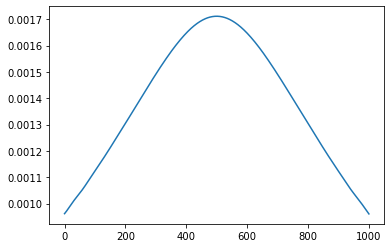

In [112]:
F_xc = sim.xcs[0].F_xc 
plot(F_xc)
#plot(sim.xcs[3].F_xc)
#plot(sim.xcs[25].F_xc)
#len(sim.xcs)
#fil_F = savgol_filter(F_xc,35,3)
#plot(fil_F)
#ceil(len(fil_F)/35)//2*2+1

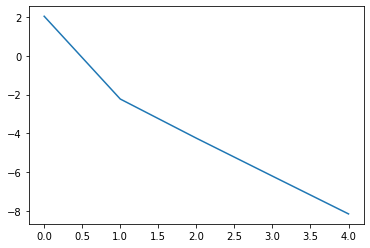

In [36]:
z = linspace(0,1,n)
total_dz = z - sim.z_arr
total_dz = total_dz #- total_dz[0]
plot(total_dz)

[0.50143446 0.50127506 0.50111564 0.50095621 0.50079694 0.50063758
 0.50047819 0.50031875 0.50015933 0.5       ]


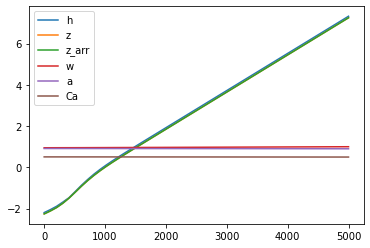

In [122]:
x = linspace(0,5000,n)
#z = linspace(0,1,n)

xmid = (x[1:] + x[:-1])/2.
plot(x, sim.h)
plot(x,z)
plot(x,sim.z_arr)

#plot(xmid,sim.fd_mids)
plot(x,sim.CO2_w)
plot(x,sim.CO2_a)
plot(x,sim.Ca)
legend(['h','z','z_arr','w','a','Ca'])
print(sim.Ca[-10:])

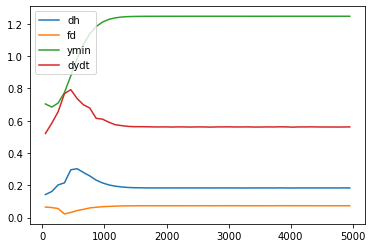

In [123]:
xmid = (x[1:] + x[:-1])/2.
plot(xmid, sim.h[1:]-sim.h[:-1])
plot(xmid,sim.fd_mids)

ymins = []
dydt = []
for i in arange(n-1):
    #print('i=',i, '  ymin=',sim.xcs[i].y.min())
    ymins.append(sim.xcs[i].ymin)
    dydt.append(sim.xcs[i].dr.max())
    
plot(xmid,array(ymins)+4.)
plot(xmid,array(dydt)*100)
legend(['dh','fd','ymin','dydt'])

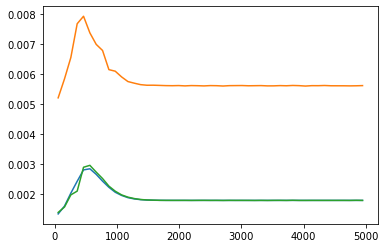

In [124]:
plot(xmid,sim.slopes)
#print('slopes=',sim.slopes)
plot(xmid, abs(sim.dz))
#plot(xmid, sim.fd_mids/500)

T_bs = []
As = []
ws = []
eslopes = []
for i in arange(n-1):
    #T_bs.append(sim.xcs[i].calcT_b())
    As.append(sim.xcs[i].calcA(wantidx=sim.xcs[i].wetidx))
    #L,R = sim.xcs[i].findLR(sim.fd_mids[i])
    ws.append(sim.xcs[i].x[R] - sim.xcs[i].x[L] )
    eslopes.append((sim.h[i+1] - sim.h[i])/sim.L_arr[i-1])
#plot(xmid,array(As)/200.)
#plot(xmid,array(ws)/400.)
plot(xmid,eslopes)
#ylim([0,0.002])
#print('eslopes=',eslopes)

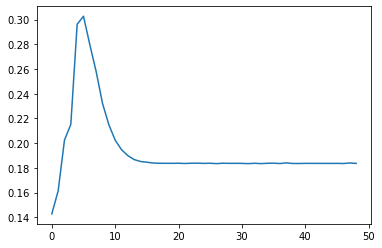

In [125]:
plot(sim.h[1:] - sim.h[:-1])


In [126]:
sim.flow_type

array(['norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm',
       'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm',
       'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm',
       'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm',
       'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm',
       'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm',
       'norm'], dtype=object)

In [ ]:
from scipy.interpolate import splprep,splev,interp1d

In [ ]:
splprep()
splev()
interp1d()

In [ ]:
print(sim.flow_type)
print(sim.A_a)
print(sim.A_w)
print(sim.fd_mids)
for i in arange(n-1):
    print('i=',i, '  ymin=',sim.xcs[i].y.min())

Q residual for 0.07355170239834449  = 9.906166686224349e-06
norm_fd= -2.679034837313624


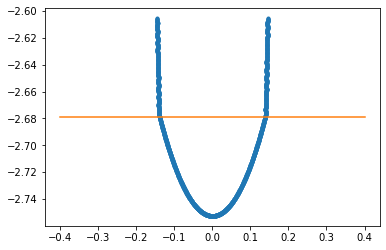

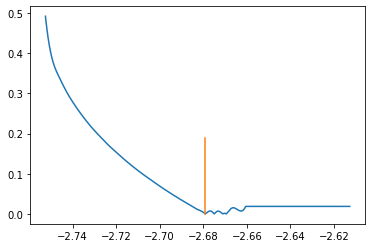

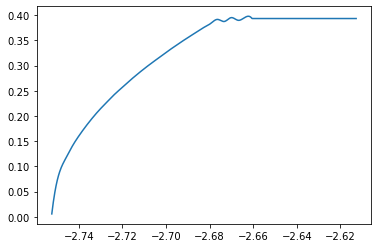

In [128]:
from scipy.signal import savgol_filter

i=48

g=9.8
f=0.1
x=sim.xcs[i].x
y=sim.xcs[i].y
xp=sim.xcs[i].xp
yp=sim.xcs[i].yp
xm=sim.xcs[i].xm
ym=sim.xcs[i].ym
plot(x,y,'.')
wl = sim.fd_mids[i] + y.min()
#wl_old = fd_old + y.min()
plot([-.4,.4],[wl,wl])
#plot([-.4,.4],[wl_old,wl_old],'--')
#xlim([-2.8,2.8])
#ylim([-1.4,-1.35])
maxdepth = y.max() - y.min()
fds=maxdepth*linspace(0.001,0.95,1000)
res=[]
res_alt=[]
res2 = []
As = []
Pws = []
for fd in fds:
    A = sim.xcs[i].A_interp(fd)
    P = sim.xcs[i].P_interp(fd)
    D_H = 4.*A/P
    Q = sign(sim.slopes[i])*A*sqrt(2.*g*abs(sim.slopes[i])*D_H/f)
    res_alt.append(A*sqrt(D_H)-sim.Q_w/(sign(sim.slopes[i])*sqrt(2.*g*abs(sim.slopes[i])/f)))#(abs(sim.Q_w - Q)))
    
    res.append(sim.xcs[i].abs_normal_discharge_residual(fd,sim.slopes[i],0.1,sim.Q_w))
    As.append(sim.xcs[i].calcA(wantidx=y-y.min()<fd))
    Pws.append(sim.xcs[i].calcP(wantidx=y-y.min()<fd))
    res2.append(sim.xcs[i].abs_crit_flow_depth_residual(fd,sim.Q_w))

As = array(As)
fil_As = savgol_filter(As,35,1)


figure()
plot(fds+y.min(),res)
norm_fd_y = sim.xcs[i].calcNormalFlowDepth(sim.Q_w,sim.slopes[i],f=f,old_fd=sim.fd_mids[i]) + y.min()
plot([norm_fd_y,norm_fd_y], [0.0,0.19])
print('norm_fd=',norm_fd_y)
#plot(fds*maxdepth+y.min(),res2)

#plot(fds*maxdepth+y.min(),res_alt)
#plot(fil_As,res_alt)
#xlim([-4,-3])

#ylim([-.05,.2])
#ylim([-0.05,0.05])
#figure()
#plot(fds+y.min(),res2)
#crit_fd_y = sim.xcs[i].calcCritFlowDepth(sim.Q_w)+y.min()
#print('crit fd, y=',crit_fd_y)
#plot([crit_fd_y,crit_fd_y],[0.001,0.003])
#xlim([-4,-3])
#print(res[0]-res[1])


figure()
#sim.xcs[i].create_A_interp()
#A_spline=sim.xcs[i].AfromSpline(fds*maxdepth)
#sim.xcs[i].create_P_interp()


#plot(fds*maxdepth+y.min(),As)
#plot(fds*maxdepth+y.min(),fil_As)
plot(fds+y.min(),sim.xcs[i].A_interp(fds))

#figure()
#plot(fds*maxdepth+y.min(),Pws)
#plot(fds*maxdepth+y.min(),sim.xcs[i].P_interp(fds))

#figure()

#Pws = array(Pws)
#Qs = fil_As*sqrt(4*fil_As/Pws)
#plot(fds*maxdepth+y.min(),Qs)

#print(Pws[0])
#sim.fd_mids[i]+y.min()
#sim.xcs[i].abs_normal_discharge_residual(-3.4-y.min(), sim.slopes[i], 0.1, sim.Q_w)
#-3.67486-y.min()

In [ ]:
fds

In [ ]:
Tb=sim.xcs[-1].T_b
ywet = y[sim.xcs[-1].wetidx]
xwet = x[sim.xcs[-1].wetidx]
#plot(xwet[1:],Tb[1:]-Tb[:-1])
#plot(xwet,Tb)
dr=sim.xcs[-1].dr
#plot(xwet[1:],dr[1:]-dr[:-1])
plot(xwet,dr)

In [ ]:
from scipy.signal import savgol_filter

fil_dr = savgol_filter(dr,15,3,mode='wrap')
plot(xwet,dr,xwet,fil_dr)
figure()
plot(fil_dr[1:]-fil_dr[:-1])

In [ ]:
diff_bnd=0
diff_bnd2=1

V_w = sim.V_w
V_w_mean = sim.V_w_mean
dx = sim.dx_ad
dt = sim.dt_ad
CO2_w = sim.CO2_w
CO2_a = sim.CO2_a
print((1./dt -(np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2.*dx))*CO2_w[diff_bnd])

print(((np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2*dx))*CO2_w[diff_bnd2])

In [ ]:
sim.

In [ ]:
np.sign(V_w[0])*(V_w[diff_bnd]/V_w_mean)

In [ ]:
V_w_mean

In [ ]:
from olm.calcite import concCaEqFromPCO2,solutionFromCaPCO2,palmerFromSolution,pwpFromSolution,pwp_to_mm_yr

In [ ]:
concCaEqFromPCO2()

In [ ]:
from olm.calcite import concCaEqFromPCO2,solutionFromCaPCO2,palmerFromSolution,calc_K_H
g=9.8#m/s^2
rho_limestone = 2.6#g/cm^3
rho_w = 998.2#kg/m^3
D_Ca = 10**-9#m^2/s
nu = 1.3e-6#m^2/s at 10 C
Sc = nu/D_Ca
g_mol_CaCO3 = 100.09
L_per_m3 = 1000.
secs_per_year =  3.154e7
secs_per_hour = 60.*60.


#print(Sc)

In [ ]:
sim.update_dimnless_params()
sim.initialize_conc_arrays()

K_w = sim.gas_transf_vel*sim.W/sim.A_w
K_a = sim.gas_transf_vel*sim.W/sim.A_a
        

F = np.zeros(sim.n_nodes - 1)
F_palmer = np.zeros(sim.n_nodes - 1)

mm_yr_to_mols_sec = 100.*rho_limestone/g_mol_CaCO3/secs_per_year/100./(sim.D_H_w/2.)

i=sim.n_nodes-1
this_CO2_w = sim.CO2_w[i]*sim.pCO2_high
this_CO2_a = sim.CO2_a[i]*sim.pCO2_high
this_Ca = sim.Ca[i]*sim.Ca_eq_0
#if palmer:
sol = solutionFromCaPCO2(this_Ca, this_CO2_w, T_C=sim.T_cave)
F_pwp = pwp_to_mm_yr(pwpFromSolution(sol,PCO2=this_CO2_w))
F_palmer[i-1] = palmerFromSolution(sol, PCO2=this_CO2_w)
R_palmer = F_palmer[i-1]*mm_yr_to_mols_sec[i-1]
this_xc = sim.xcs[i-1]
eSlope = (sim.h[i] - sim.h[i-1])/sim.L_arr[i-1]
this_xc.setEnergySlope(eSlope)
this_xc.setMaxVelPoint(sim.fd_mids[i-1])
this_xc.calcUmax(sim.Q_w)
T_b = this_xc.calcT_b()
eps = 5*nu*Sc**(-1./3.)/np.sqrt(T_b/rho_w)
#print(eps)
Ca_Eq = concCaEqFromPCO2(this_CO2_w, T_C=sim.T_cave)
#print(this_Ca,Ca_Eq)
F_xc = (D_Ca/eps)*(Ca_Eq - this_Ca)*L_per_m3
P_w = this_xc.wet_ls.sum()
A_w = this_xc.calcA(this_xc.wetidx)
F[i-1] = np.sum(F_xc*this_xc.wet_ls)/P_w #Units of F are mols/m^2/sec
R = F[i-1]*P_w*sim.L_arr[i-1]#4.*F[i-1]/sim.D_H_w[i-1]
sim.F = F
R_CO2 = R/sim.K_H
#dx is negative, so signs on dC terms flip
dCO2_a = -sim.L_arr[i-1]*K_a[i-1]/sim.V_a[i-1]*(this_CO2_w - this_CO2_a)
dCO2_w = sim.L_arr[i-1]*K_w[i-1]/sim.V_w[i-1]*(this_CO2_w - this_CO2_a) - R_CO2/sim.Q_w/L_per_m3#sim.L_arr[i-1]*R_CO2/sim.V_w[i-1]
dCa = R/sim.Q_w/L_per_m3#-sim.L_arr[i-1]*R/sim.V_w[i-1]/(sim.L_arr[i-1]*A_w)/L_per_m3
print(dCO2_a,dCO2_w,dCa)
sim.CO2_a[i-1] = (this_CO2_a + dCO2_a)/sim.pCO2_high
sim.CO2_w[i-1] = (this_CO2_w + dCO2_w)/sim.pCO2_high
sim.Ca[i-1] = (this_Ca + dCa)/sim.Ca_eq_0


In [ ]:
print(sim.Q_w)
print(A_w*sim.V_w[i-1])
sim.L_arr[i-1]*R_CO2/sim.V_w[i-1]
R_CO2/sim.Q_w/L_per_m3

In [ ]:
this_xc.x[this_xc.wetidx].shape
F_xc.

In [ ]:
Re = abs(sim.V_w[i-1])*sim.D_H_w[i-1]/nu
print(Re)
f = 0.1
Sh = (f/8)*(Re-1000)*Sc/(1+12.7*sqrt(f/8)*(Sc**(2./3.) - 1))
print(Sh)
eps_test = sim.D_H_w[i-1]/Sh
print(eps_test)

In [ ]:
D_Ca/eps_test

In [ ]:
sim.D_H_w[i-1]

In [ ]:
eSlope

In [ ]:
cm_m=100.
F_to_m_yr = g_mol_CaCO3*secs_per_year/rho_limestone/cm_m**3
print(F_to_m_yr*sim.xcs[0].F_xc)